In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
os.chdir('..')

In [3]:
import warnings
warnings.filterwarnings('ignore', '', UserWarning)

In [4]:
import torch
import torchvision

torch.manual_seed(1)
torch.cuda.manual_seed(1)
device = 'gpu'

In [103]:
latent_size = 200
batch_size = 32
hidden_size = '1200,1200'
alpha = 0.001
learning_rate = 0.001
epochs = 30
dataset = 'dsprites'
device = 'cuda'
log_interval = 4000
report_interval = 100
reload_model = False
sample_size = 64
normalize = False

In [6]:
from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    dataset, batch_size, device, root='data')

Loading dsprites dataset...
Done!



In [104]:
from src.models.vsc import VariationalSparseCoding
vsc = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval, normalize)

In [105]:
%%time
# 1200,1200 hidden size, 200 latent size, 10 epochs, 0.001 alpha
vsc.run_training(train_loader, test_loader, 10, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4206.720703
Train Epoch: 1 [128000/600000 (21%)]	Loss: 399.171448
Train Epoch: 1 [256000/600000 (43%)]	Loss: 185.506256
Train Epoch: 1 [384000/600000 (64%)]	Loss: 116.309906
Train Epoch: 1 [512000/600000 (85%)]	Loss: 46.951134
====> Epoch: 1 Average loss: 203.0836
====> Test set loss: 39.7486 - VLB-VSC : 1271.9547
Train Epoch: 2 [0/600000 (0%)]	Loss: 39.645176
Train Epoch: 2 [128000/600000 (21%)]	Loss: 25.371387
Train Epoch: 2 [256000/600000 (43%)]	Loss: 12.072600
Train Epoch: 2 [384000/600000 (64%)]	Loss: 12.055475
Train Epoch: 2 [512000/600000 (85%)]	Loss: 4.429080
====> Epoch: 2 Average loss: 15.1925
====> Test set loss: 5.0342 - VLB-VSC : 161.0950
Train Epoch: 3 [0/600000 (0%)]	Loss: 5.166841
Train Epoch: 3 [128000/600000 (21%)]	Loss: 5.089270
Train Epoch: 3 [256000/600000 (43%)]	Loss: 5.406382
Train Epoch: 3 [384000/600000 (64%)]	Loss: 5.267651
Train Epoch: 3 [512000/600000 (85%)]	Loss: 5.275261
====> Epoch: 3 Average loss

In [106]:
torch.save(vsc.model.state_dict(), 
           'dsprites_1200_1200_200_latent_10_epochs_1e-3.pth')

In [107]:
%%time
# 1200,1200 hidden size, 200 latent size, 10 epochs, 0.001 alpha (20 epochs total)
vsc.run_training(train_loader, test_loader, 10, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5.022141
Train Epoch: 1 [128000/600000 (21%)]	Loss: 5.505758
Train Epoch: 1 [256000/600000 (43%)]	Loss: 4.673602
Train Epoch: 1 [384000/600000 (64%)]	Loss: 5.272847
Train Epoch: 1 [512000/600000 (85%)]	Loss: 4.774715
====> Epoch: 1 Average loss: 4.9853
====> Test set loss: 4.9743 - VLB-VSC : 159.1779
Train Epoch: 2 [0/600000 (0%)]	Loss: 5.020216
Train Epoch: 2 [128000/600000 (21%)]	Loss: 5.319544
Train Epoch: 2 [256000/600000 (43%)]	Loss: 4.531000
Train Epoch: 2 [384000/600000 (64%)]	Loss: 5.378222
Train Epoch: 2 [512000/600000 (85%)]	Loss: 4.767884
====> Epoch: 2 Average loss: 4.9854
====> Test set loss: 4.9818 - VLB-VSC : 159.4187
Train Epoch: 3 [0/600000 (0%)]	Loss: 5.112857
Train Epoch: 3 [128000/600000 (21%)]	Loss: 4.537479
Train Epoch: 3 [256000/600000 (43%)]	Loss: 4.727321
Train Epoch: 3 [384000/600000 (64%)]	Loss: 5.174637
Train Epoch: 3 [512000/600000 (85%)]	Loss: 5.047017
====> Epoch: 3 Average loss: 4.9857
====> Test

In [81]:
%%time
# 1200,1200 hidden size, 32 latent size, 10 epochs, 0.001 alpha
vsc.run_training(train_loader, test_loader, 10, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 3064.339355
Train Epoch: 1 [128000/600000 (21%)]	Loss: 54.208618
Train Epoch: 1 [256000/600000 (43%)]	Loss: 25.370852
Train Epoch: 1 [384000/600000 (64%)]	Loss: 27.049978
Train Epoch: 1 [512000/600000 (85%)]	Loss: 25.761477
====> Epoch: 1 Average loss: 37.8375
====> Test set loss: 26.2088 - VLB-VSC : 838.6804
Train Epoch: 2 [0/600000 (0%)]	Loss: 25.668905
Train Epoch: 2 [128000/600000 (21%)]	Loss: 25.830505
Train Epoch: 2 [256000/600000 (43%)]	Loss: 19.438557
Train Epoch: 2 [384000/600000 (64%)]	Loss: 18.970110
Train Epoch: 2 [512000/600000 (85%)]	Loss: 19.714254
====> Epoch: 2 Average loss: 21.7272
====> Test set loss: 19.2067 - VLB-VSC : 614.6140
Train Epoch: 3 [0/600000 (0%)]	Loss: 19.084547
Train Epoch: 3 [128000/600000 (21%)]	Loss: 13.070105
Train Epoch: 3 [256000/600000 (43%)]	Loss: 12.687153
Train Epoch: 3 [384000/600000 (64%)]	Loss: 12.784584
Train Epoch: 3 [512000/600000 (85%)]	Loss: 12.242184
====> Epoch: 3 Average lo

In [97]:
torch.save(vsc.model.state_dict(), 
           'dsprites_1200_1200_32_latent_10_epochs_1e-3.pth')

In [77]:
%%time
# 1200,1200 hidden size, 32 latent size, 10 epochs, 0.1 alpha
# bad results
vsc.run_training(train_loader, test_loader, 10, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 2915.020996
Train Epoch: 1 [128000/600000 (21%)]	Loss: 30.623201
Train Epoch: 1 [256000/600000 (43%)]	Loss: 31.702950
Train Epoch: 1 [384000/600000 (64%)]	Loss: 31.897938
Train Epoch: 1 [512000/600000 (85%)]	Loss: 30.863644
====> Epoch: 1 Average loss: 31.9432
====> Test set loss: 31.3688 - VLB-VSC : 1003.8024
Train Epoch: 2 [0/600000 (0%)]	Loss: 30.782467
Train Epoch: 2 [128000/600000 (21%)]	Loss: 31.294128
Train Epoch: 2 [256000/600000 (43%)]	Loss: 31.833094
Train Epoch: 2 [384000/600000 (64%)]	Loss: 31.773041
Train Epoch: 2 [512000/600000 (85%)]	Loss: 30.954338
====> Epoch: 2 Average loss: 31.3790
====> Test set loss: 31.3711 - VLB-VSC : 1003.8740
Train Epoch: 3 [0/600000 (0%)]	Loss: 31.550648
Train Epoch: 3 [128000/600000 (21%)]	Loss: 31.216173
Train Epoch: 3 [256000/600000 (43%)]	Loss: 31.877468
Train Epoch: 3 [384000/600000 (64%)]	Loss: 31.335522
Train Epoch: 3 [512000/600000 (85%)]	Loss: 31.418070
====> Epoch: 3 Average 

In [58]:
%%time
# 1200,1200 hidden size, 32 latent size, 3 epochs, part 1
vsc.run_training(train_loader, test_loader, 3, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 2988.429443
Train Epoch: 1 [128000/600000 (21%)]	Loss: 46.723969
Train Epoch: 1 [256000/600000 (43%)]	Loss: 38.643585
Train Epoch: 1 [384000/600000 (64%)]	Loss: 38.586971
Train Epoch: 1 [512000/600000 (85%)]	Loss: 24.725182
====> Epoch: 1 Average loss: 39.9183
====> Test set loss: 24.4633 - VLB-VSC : 782.8262
Train Epoch: 2 [0/600000 (0%)]	Loss: 24.797157
Train Epoch: 2 [128000/600000 (21%)]	Loss: 24.693447
Train Epoch: 2 [256000/600000 (43%)]	Loss: 19.557983
Train Epoch: 2 [384000/600000 (64%)]	Loss: 18.500870
Train Epoch: 2 [512000/600000 (85%)]	Loss: 21.332558
====> Epoch: 2 Average loss: 20.6114
====> Test set loss: 15.0826 - VLB-VSC : 482.6425
Train Epoch: 3 [0/600000 (0%)]	Loss: 14.897198
Train Epoch: 3 [128000/600000 (21%)]	Loss: 16.310493
Train Epoch: 3 [256000/600000 (43%)]	Loss: 10.326365
Train Epoch: 3 [384000/600000 (64%)]	Loss: 10.361855
Train Epoch: 3 [512000/600000 (85%)]	Loss: 6.293534
====> Epoch: 3 Average los

In [62]:
%%time
# 1200,1200 hidden size, 32 latent size, 3 epochs, part 2
vsc.run_training(train_loader, test_loader, 3, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5.280366
Train Epoch: 1 [128000/600000 (21%)]	Loss: 5.807628
Train Epoch: 1 [256000/600000 (43%)]	Loss: 4.600801
Train Epoch: 1 [384000/600000 (64%)]	Loss: 4.807838
Train Epoch: 1 [512000/600000 (85%)]	Loss: 5.068504
====> Epoch: 1 Average loss: 5.6699
====> Test set loss: 5.6172 - VLB-VSC : 179.7509
Train Epoch: 2 [0/600000 (0%)]	Loss: 5.355652
Train Epoch: 2 [128000/600000 (21%)]	Loss: 5.239240
Train Epoch: 2 [256000/600000 (43%)]	Loss: 5.531152
Train Epoch: 2 [384000/600000 (64%)]	Loss: 6.537056
Train Epoch: 2 [512000/600000 (85%)]	Loss: 5.352526
====> Epoch: 2 Average loss: 5.6118
====> Test set loss: 5.5934 - VLB-VSC : 178.9891
Train Epoch: 3 [0/600000 (0%)]	Loss: 6.317214
Train Epoch: 3 [128000/600000 (21%)]	Loss: 6.012022
Train Epoch: 3 [256000/600000 (43%)]	Loss: 5.141720
Train Epoch: 3 [384000/600000 (64%)]	Loss: 6.349794
Train Epoch: 3 [512000/600000 (85%)]	Loss: 5.887856
====> Epoch: 3 Average loss: 5.5878
====> Test

In [66]:
torch.save(vsc.model.state_dict(), 
           'dsprites_1200_1200_32_latent_6_epochs.pth')

In [67]:
%%time
# 1200,1200 hidden size, 32 latent size, 4 epochs, part 3 (total 10)
vsc.run_training(train_loader, test_loader, 4, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5.157537
Train Epoch: 1 [128000/600000 (21%)]	Loss: 4.749960
Train Epoch: 1 [256000/600000 (43%)]	Loss: 5.929109
Train Epoch: 1 [384000/600000 (64%)]	Loss: 5.981205
Train Epoch: 1 [512000/600000 (85%)]	Loss: 5.717909
====> Epoch: 1 Average loss: 5.5738
====> Test set loss: 5.5603 - VLB-VSC : 177.9309
Train Epoch: 2 [0/600000 (0%)]	Loss: 5.060275
Train Epoch: 2 [128000/600000 (21%)]	Loss: 6.077619
Train Epoch: 2 [256000/600000 (43%)]	Loss: 4.906686
Train Epoch: 2 [384000/600000 (64%)]	Loss: 6.251547
Train Epoch: 2 [512000/600000 (85%)]	Loss: 4.970484
====> Epoch: 2 Average loss: 5.5659
====> Test set loss: 5.5552 - VLB-VSC : 177.7652
Train Epoch: 3 [0/600000 (0%)]	Loss: 5.713568
Train Epoch: 3 [128000/600000 (21%)]	Loss: 4.876720
Train Epoch: 3 [256000/600000 (43%)]	Loss: 6.111830
Train Epoch: 3 [384000/600000 (64%)]	Loss: 5.184627
Train Epoch: 3 [512000/600000 (85%)]	Loss: 6.168949
====> Epoch: 3 Average loss: 5.5584
====> Test

In [68]:
torch.save(vsc.model.state_dict(), 
           'dsprites_1200_1200_32_latent_10_epochs.pth')

In [8]:
vsc.model.load_state_dict(torch.load('dsprites_1200_1200_32_latent_10_epochs.pth'))

In [9]:
%%time
# 1200,1200 hidden size, 32 latent size, 10 epochs, part 4 (total 20)
vsc.run_training(train_loader, test_loader, 10, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 5.614028
Train Epoch: 1 [128000/600000 (21%)]	Loss: 5.728605
Train Epoch: 1 [256000/600000 (43%)]	Loss: 5.434280
Train Epoch: 1 [384000/600000 (64%)]	Loss: 6.227962
Train Epoch: 1 [512000/600000 (85%)]	Loss: 5.320219
====> Epoch: 1 Average loss: 5.5509
====> Test set loss: 5.5391 - VLB-VSC : 177.2518
Train Epoch: 2 [0/600000 (0%)]	Loss: 4.707374
Train Epoch: 2 [128000/600000 (21%)]	Loss: 6.040775
Train Epoch: 2 [256000/600000 (43%)]	Loss: 5.336545
Train Epoch: 2 [384000/600000 (64%)]	Loss: 6.322642
Train Epoch: 2 [512000/600000 (85%)]	Loss: 5.242685
====> Epoch: 2 Average loss: 5.5461
====> Test set loss: 5.5403 - VLB-VSC : 177.2890
Train Epoch: 3 [0/600000 (0%)]	Loss: 4.991739
Train Epoch: 3 [128000/600000 (21%)]	Loss: 6.011477
Train Epoch: 3 [256000/600000 (43%)]	Loss: 6.090943
Train Epoch: 3 [384000/600000 (64%)]	Loss: 5.284278
Train Epoch: 3 [512000/600000 (85%)]	Loss: 4.842293
====> Epoch: 3 Average loss: 5.5440
====> Test

In [10]:
torch.save(vsc.model.state_dict(), 
           'dsprites_1200_1200_32_latent_20_epochs.pth')

In [50]:
%%time
# 1200,1200 hidden size, 32 latent size, 10 epochs, part 5 (total 30)
vsc.run_training(train_loader, test_loader, 10, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 4.997151
Train Epoch: 1 [128000/600000 (21%)]	Loss: 4.753632
Train Epoch: 1 [256000/600000 (43%)]	Loss: 5.492848
Train Epoch: 1 [384000/600000 (64%)]	Loss: 5.395320
Train Epoch: 1 [512000/600000 (85%)]	Loss: 5.780374
====> Epoch: 1 Average loss: 5.5324
====> Test set loss: 5.5209 - VLB-VSC : 176.6690
Train Epoch: 2 [0/600000 (0%)]	Loss: 5.059986
Train Epoch: 2 [128000/600000 (21%)]	Loss: 5.303476
Train Epoch: 2 [256000/600000 (43%)]	Loss: 5.307715
Train Epoch: 2 [384000/600000 (64%)]	Loss: 5.818175
Train Epoch: 2 [512000/600000 (85%)]	Loss: 5.895711
====> Epoch: 2 Average loss: 5.5311
====> Test set loss: 5.5197 - VLB-VSC : 176.6319
Train Epoch: 3 [0/600000 (0%)]	Loss: 4.766979
Train Epoch: 3 [128000/600000 (21%)]	Loss: 5.745220
Train Epoch: 3 [256000/600000 (43%)]	Loss: 5.580044
Train Epoch: 3 [384000/600000 (64%)]	Loss: 5.065128
Train Epoch: 3 [512000/600000 (85%)]	Loss: 5.968129
====> Epoch: 3 Average loss: 5.5316
====> Test

In [51]:
torch.save(vsc.model.state_dict(), 
           'dsprites_1200_1200_32_latent_30_epochs.pth')

## Other

In [52]:
%%time
# 100,100 hidden size, 10 latent size
vsc.run_training(train_loader, test_loader, 3, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 2886.912598
Train Epoch: 1 [128000/600000 (21%)]	Loss: 24.512230
Train Epoch: 1 [256000/600000 (43%)]	Loss: 23.905338
Train Epoch: 1 [384000/600000 (64%)]	Loss: 24.533796
Train Epoch: 1 [512000/600000 (85%)]	Loss: 24.467863
====> Epoch: 1 Average loss: 27.7718
====> Test set loss: 19.8570 - VLB-VSC : 635.4240
Train Epoch: 2 [0/600000 (0%)]	Loss: 20.301764
Train Epoch: 2 [128000/600000 (21%)]	Loss: 20.808319
Train Epoch: 2 [256000/600000 (43%)]	Loss: 20.312639
Train Epoch: 2 [384000/600000 (64%)]	Loss: 19.296425
Train Epoch: 2 [512000/600000 (85%)]	Loss: 20.180069
====> Epoch: 2 Average loss: 19.8603
====> Test set loss: 19.8525 - VLB-VSC : 635.2816
Train Epoch: 3 [0/600000 (0%)]	Loss: 19.534531
Train Epoch: 3 [128000/600000 (21%)]	Loss: 20.344349
Train Epoch: 3 [256000/600000 (43%)]	Loss: 20.042673
Train Epoch: 3 [384000/600000 (64%)]	Loss: 20.015194
Train Epoch: 3 [512000/600000 (85%)]	Loss: 19.418589
====> Epoch: 3 Average lo

In [19]:
%%time
# old
vsc.run_training(train_loader, test_loader, 10, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 3762.969971
Train Epoch: 1 [128000/600000 (21%)]	Loss: 282.120453
Train Epoch: 1 [256000/600000 (43%)]	Loss: 273.197510
Train Epoch: 1 [384000/600000 (64%)]	Loss: 250.236130
Train Epoch: 1 [512000/600000 (85%)]	Loss: 194.826813
====> Epoch: 1 Average loss: 249.3251
====> Test set loss: 162.6398 - VLB-VSC : 5204.4729
Train Epoch: 2 [0/600000 (0%)]	Loss: 162.748718
Train Epoch: 2 [128000/600000 (21%)]	Loss: 143.515182
Train Epoch: 2 [256000/600000 (43%)]	Loss: 121.322594
Train Epoch: 2 [384000/600000 (64%)]	Loss: 102.119415
Train Epoch: 2 [512000/600000 (85%)]	Loss: 84.404297
====> Epoch: 2 Average loss: 114.9166
====> Test set loss: 84.0615 - VLB-VSC : 2689.9686
Train Epoch: 3 [0/600000 (0%)]	Loss: 83.569191
Train Epoch: 3 [128000/600000 (21%)]	Loss: 83.337090
Train Epoch: 3 [256000/600000 (43%)]	Loss: 74.736099
Train Epoch: 3 [384000/600000 (64%)]	Loss: 74.640984
Train Epoch: 3 [512000/600000 (85%)]	Loss: 65.760803
====> Epoch:

Traceback (most recent call last):
  File "/home/raduviri/anaconda3/envs/chana/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/raduviri/anaconda3/envs/chana/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/raduviri/anaconda3/envs/chana/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/raduviri/anaconda3/envs/chana/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [43]:
vsc.model.load_state_dict(torch.load('dsprites_4_epochs.pth'))

In [21]:
torch.save(vsc.model.state_dict(), 'dsprites_4_epochs.pth')

In [59]:
torch.save(vsc.model.state_dict(), 'dsprites_1200_1200_32_latent_3_epochs.pth')

In [17]:
images, _ = iter(test_loader).next()

In [18]:
images_trn, _ = iter(train_loader).next()

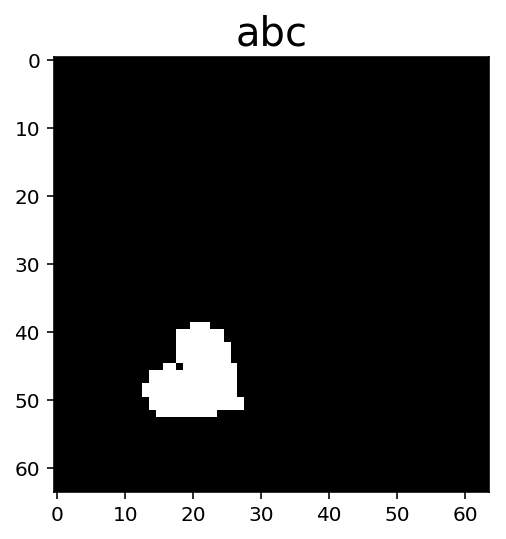

In [41]:
fig, ax = plt.subplots()
plot_image(a * 255, ax, 'abc')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, ax, title):
    ax.imshow(np.transpose(img, (1,2,0)) * 255, interpolation='nearest')
    ax.set_title(title, fontsize=20)
    
def to_numpy(image, vsc):
    return torchvision.utils.make_grid(
        image.view(1, vsc.channels, vsc.height, vsc.width)
    ).cpu().detach().numpy()
    
def plot_encoding(image, vsc, latent_sz, alpha, width=1/7):
    flattened_image = vsc.normalize(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(flattened_image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    img = vsc.denormalize(vsc.model.decode(z))
    z = z.cpu().detach().numpy()[0]
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
    
    plot_image(to_numpy(image, vsc), ax0, 'Input Image')
    
    ax1.bar(np.arange(latent_sz), height=z, width=width, align='center')
    ax1.scatter(np.arange(latent_sz), z, color='blue')
    ax1.set_title(r"Latent Dimension %d - $\alpha$ = %.2f " % \
                  (latent_sz, alpha), fontsize=20)
    
    plot_image(to_numpy(img, vsc), ax2, 'Decoded Image')
    plt.subplots_adjust(hspace=0.5)

In [ ]:
# 1200,1200 latent dimensions, alpha = 0.001, 200 hidden size, 10 epochs
for i in range(10):
    plot_encoding(images[-i][None,:], vsc, latent_size, alpha)

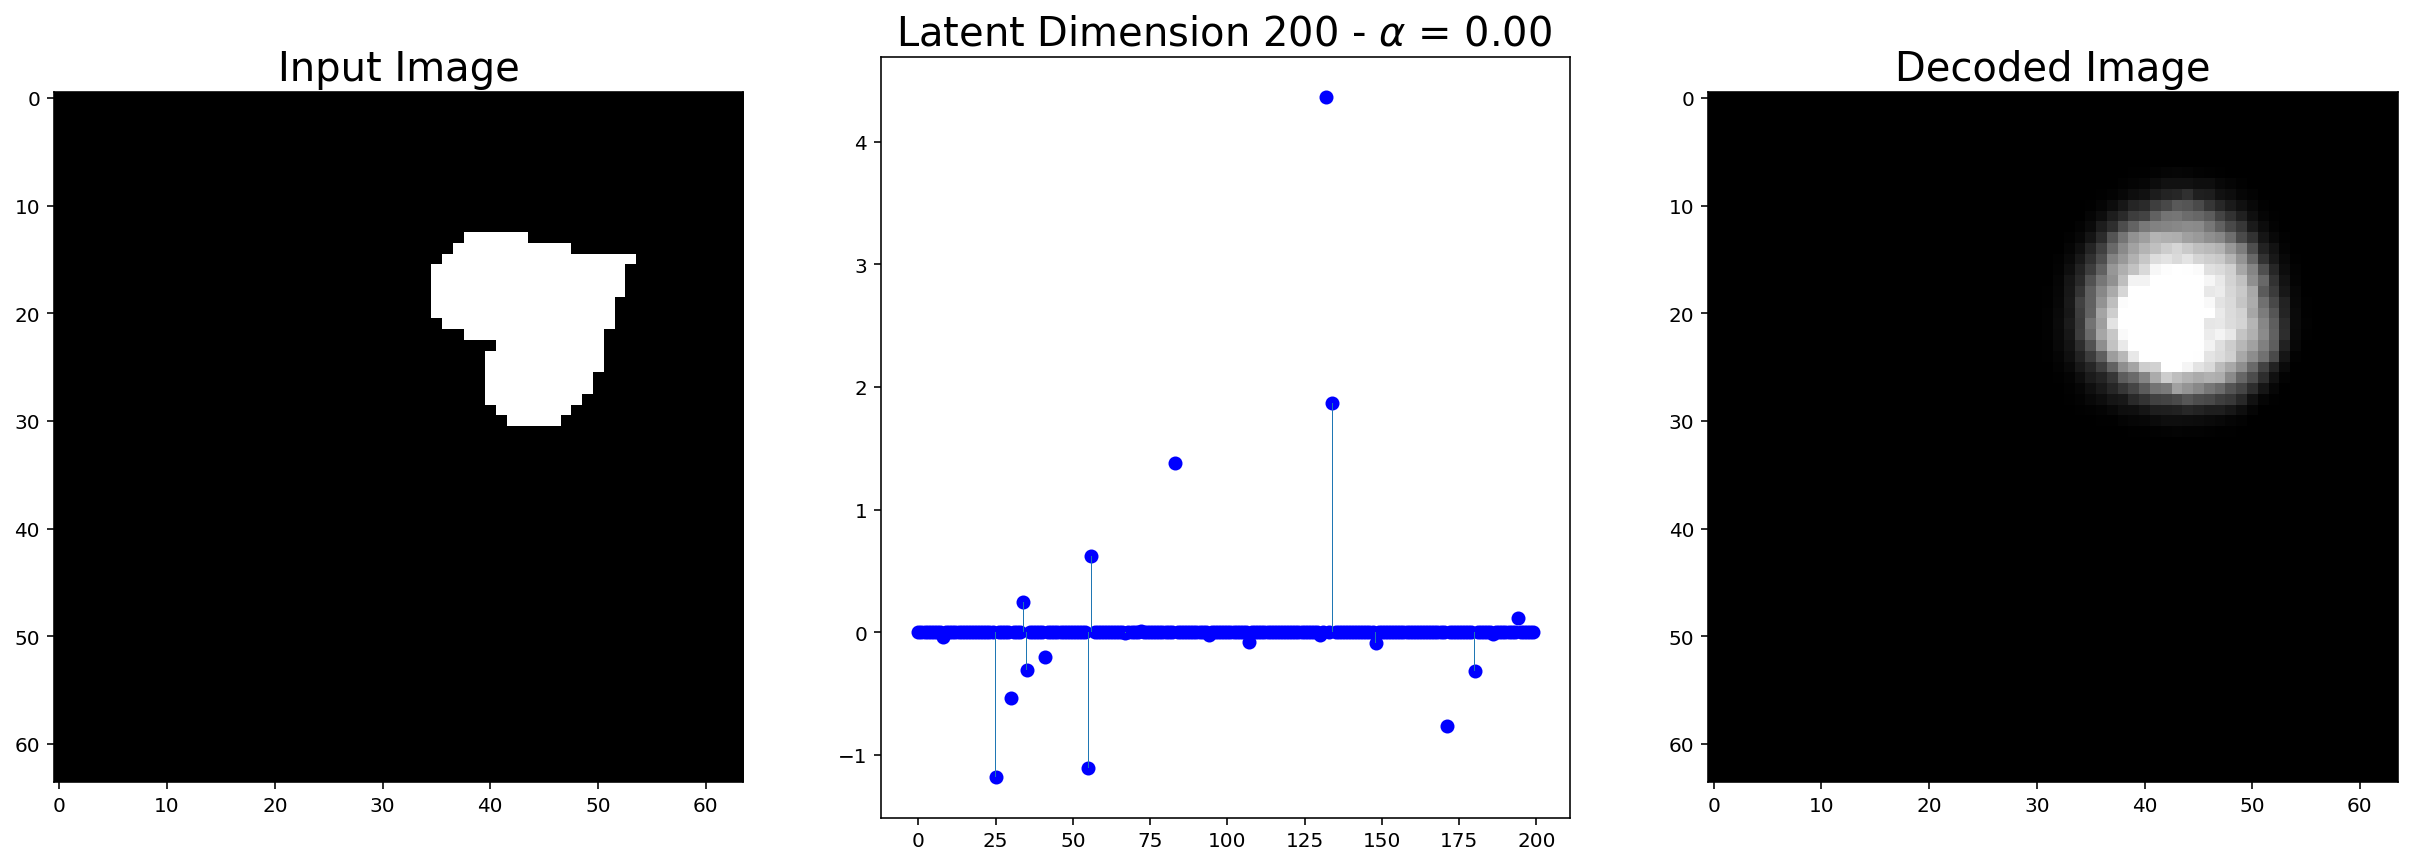

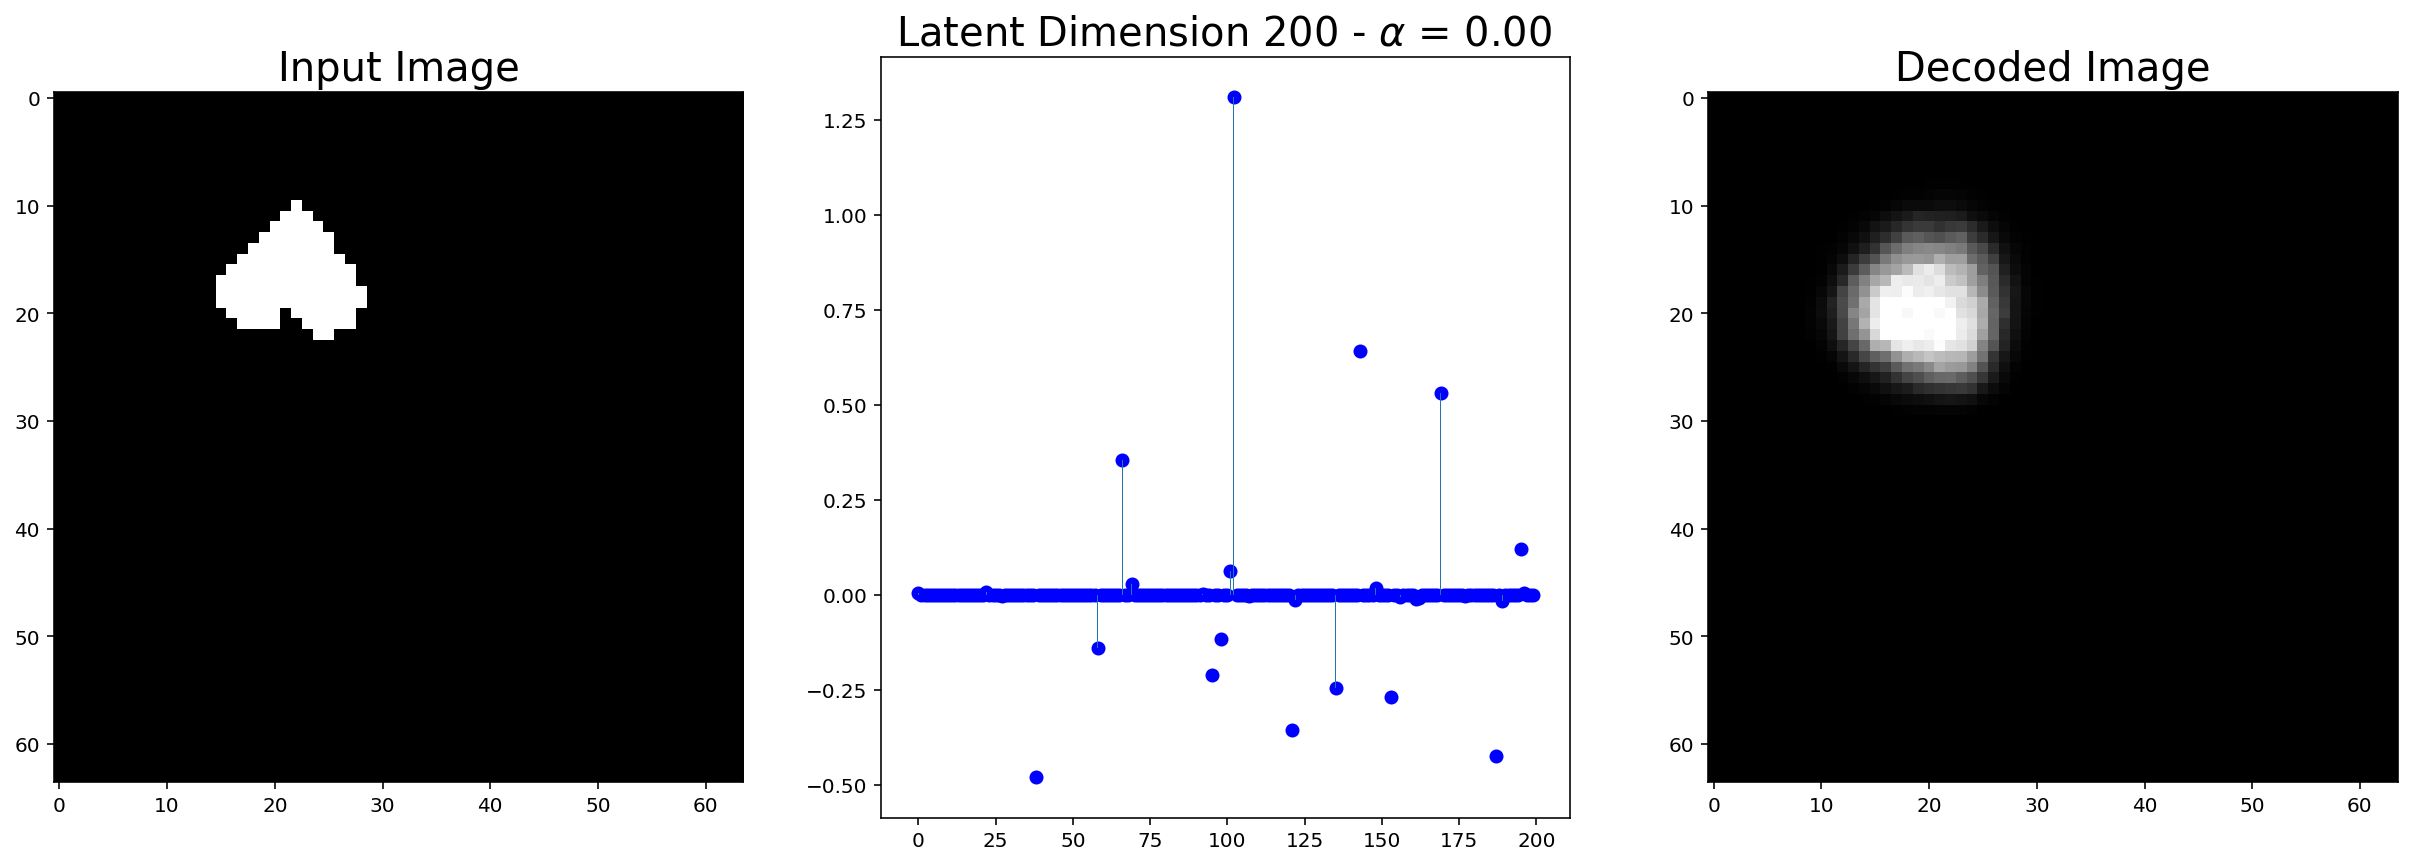

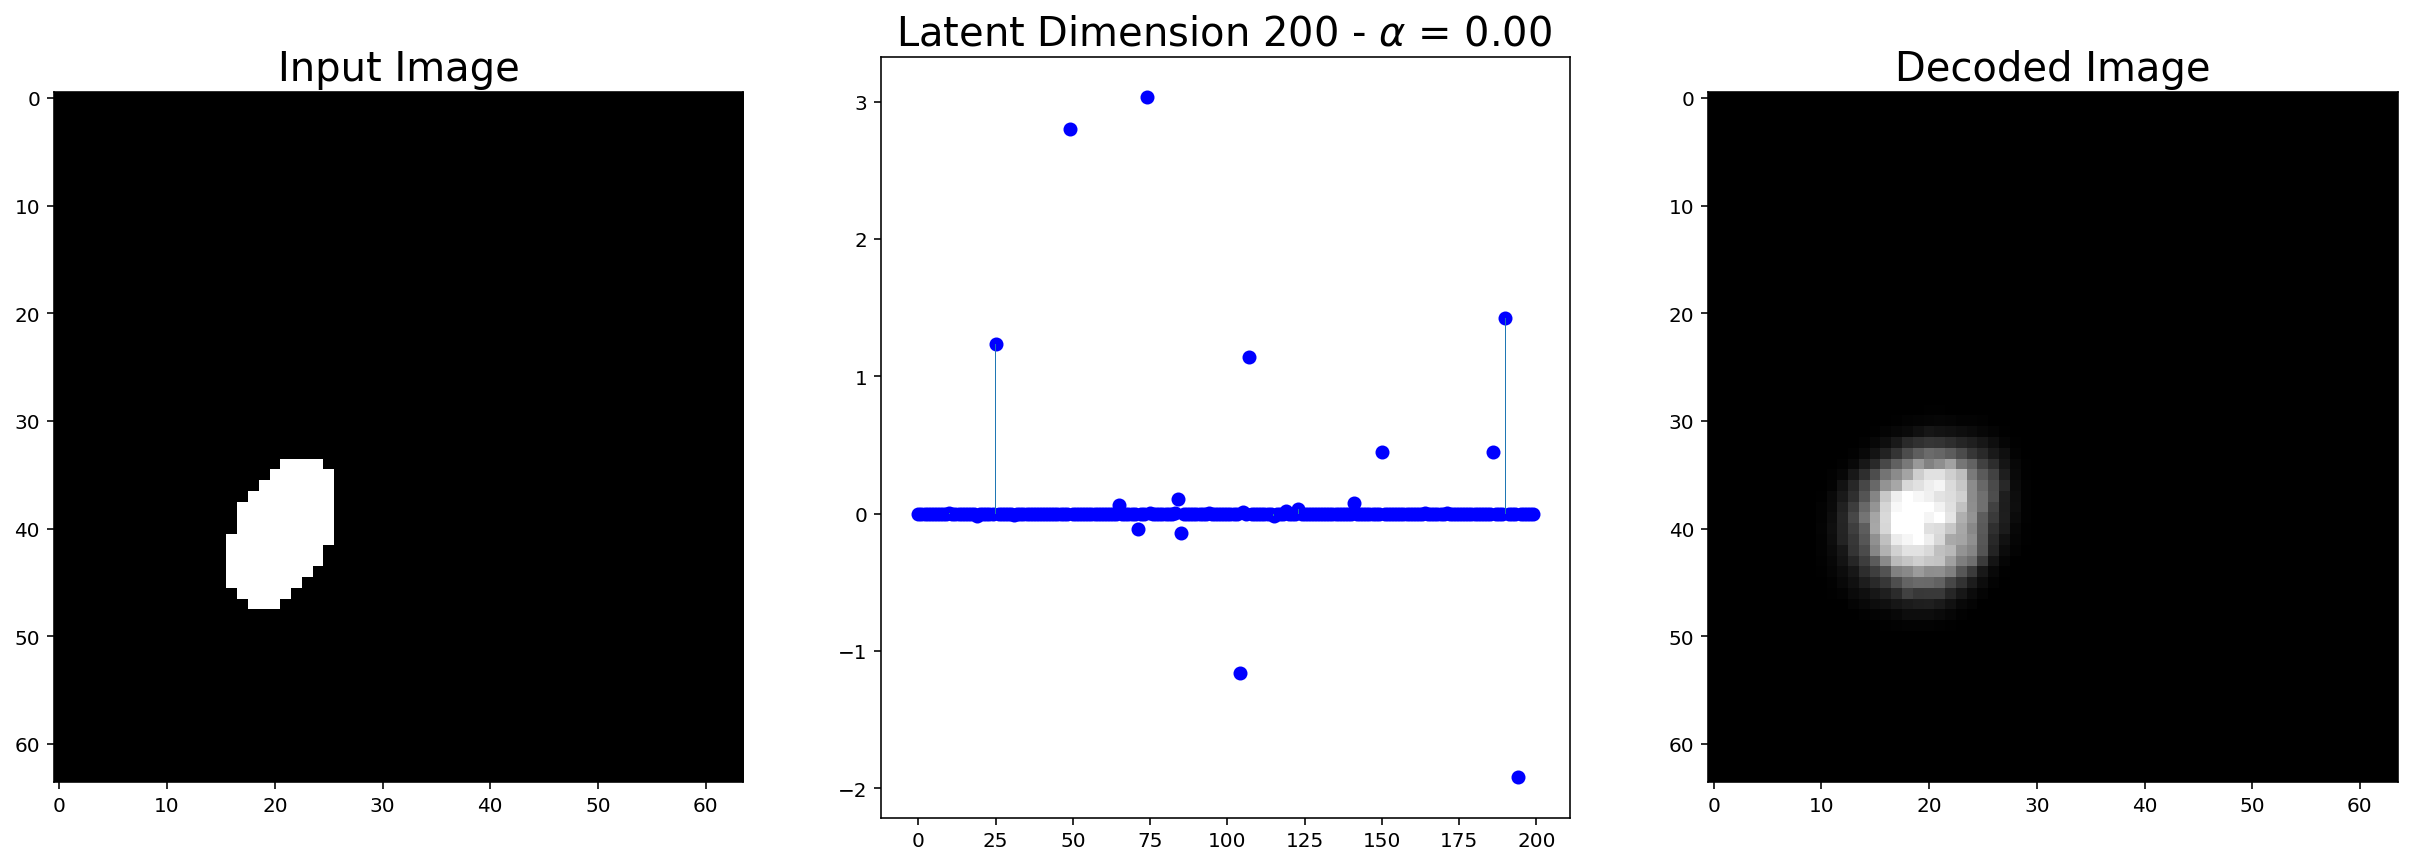

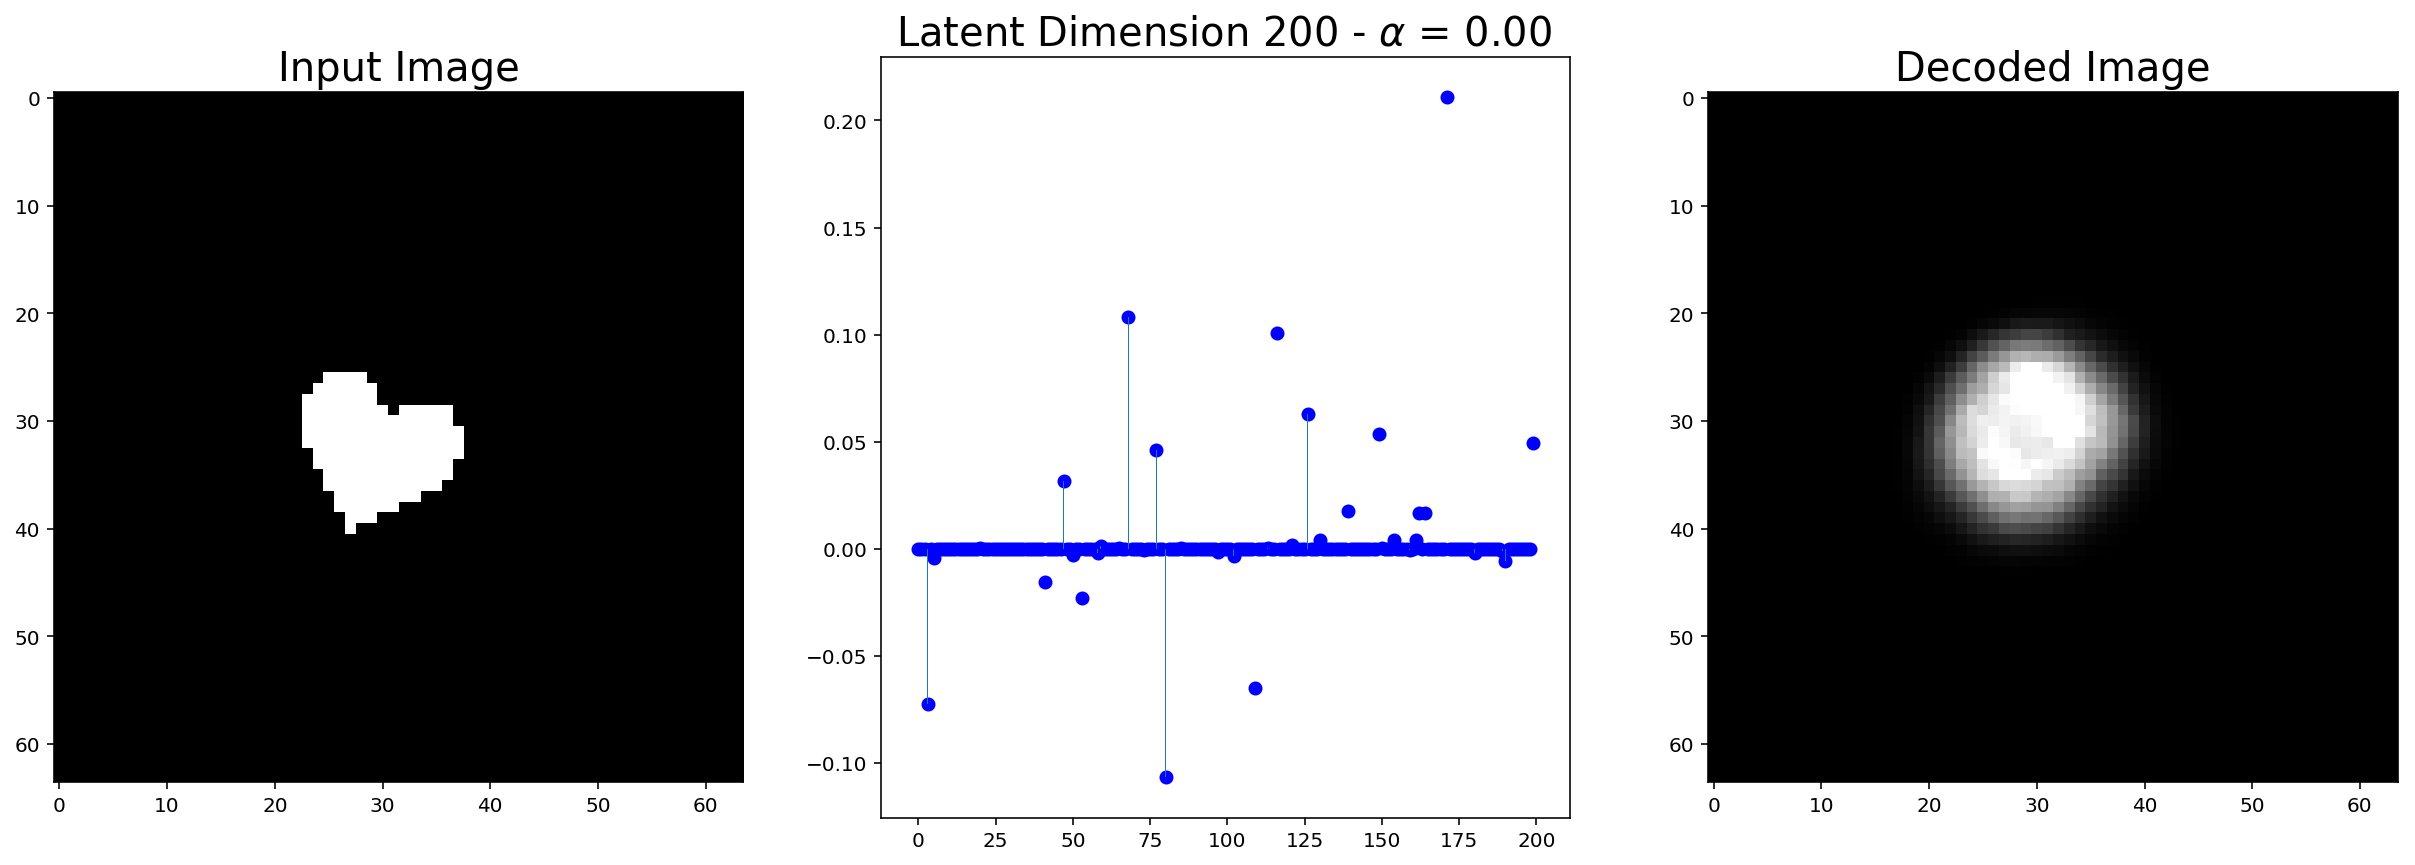

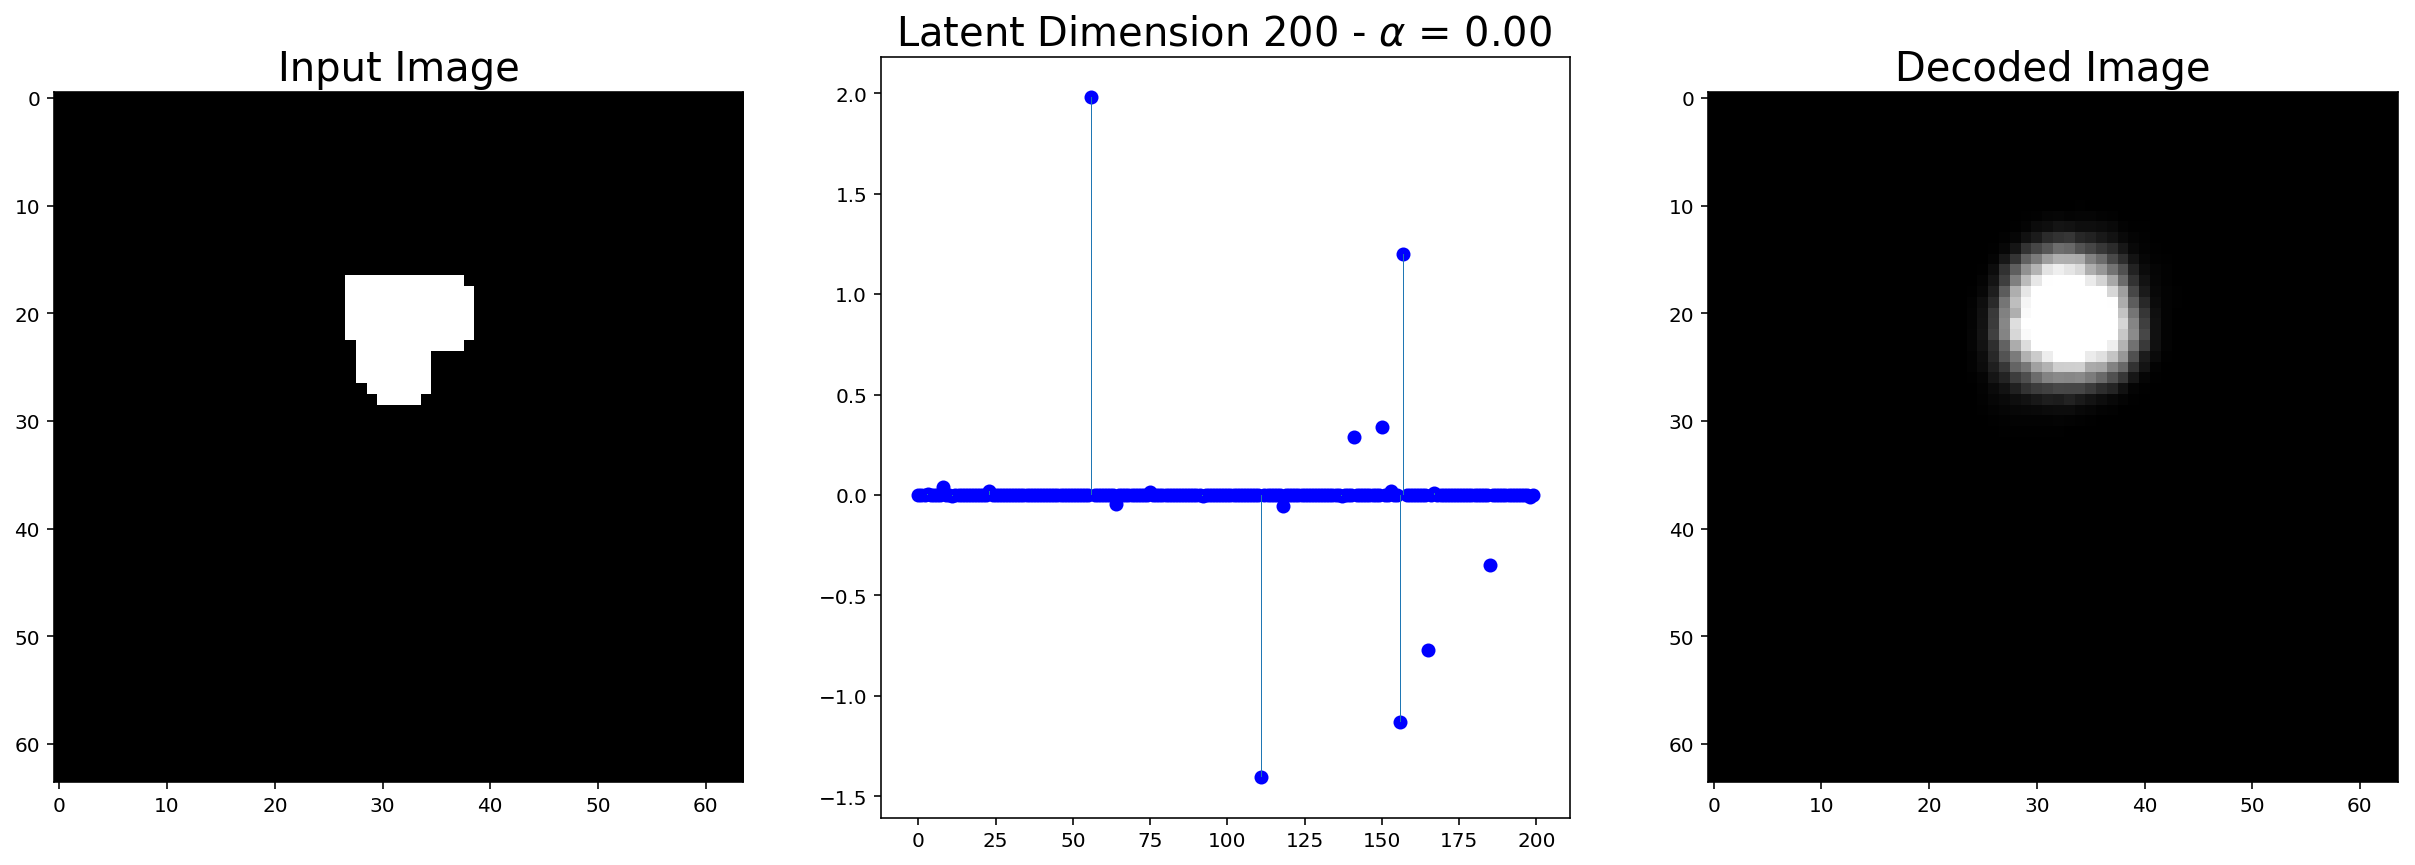

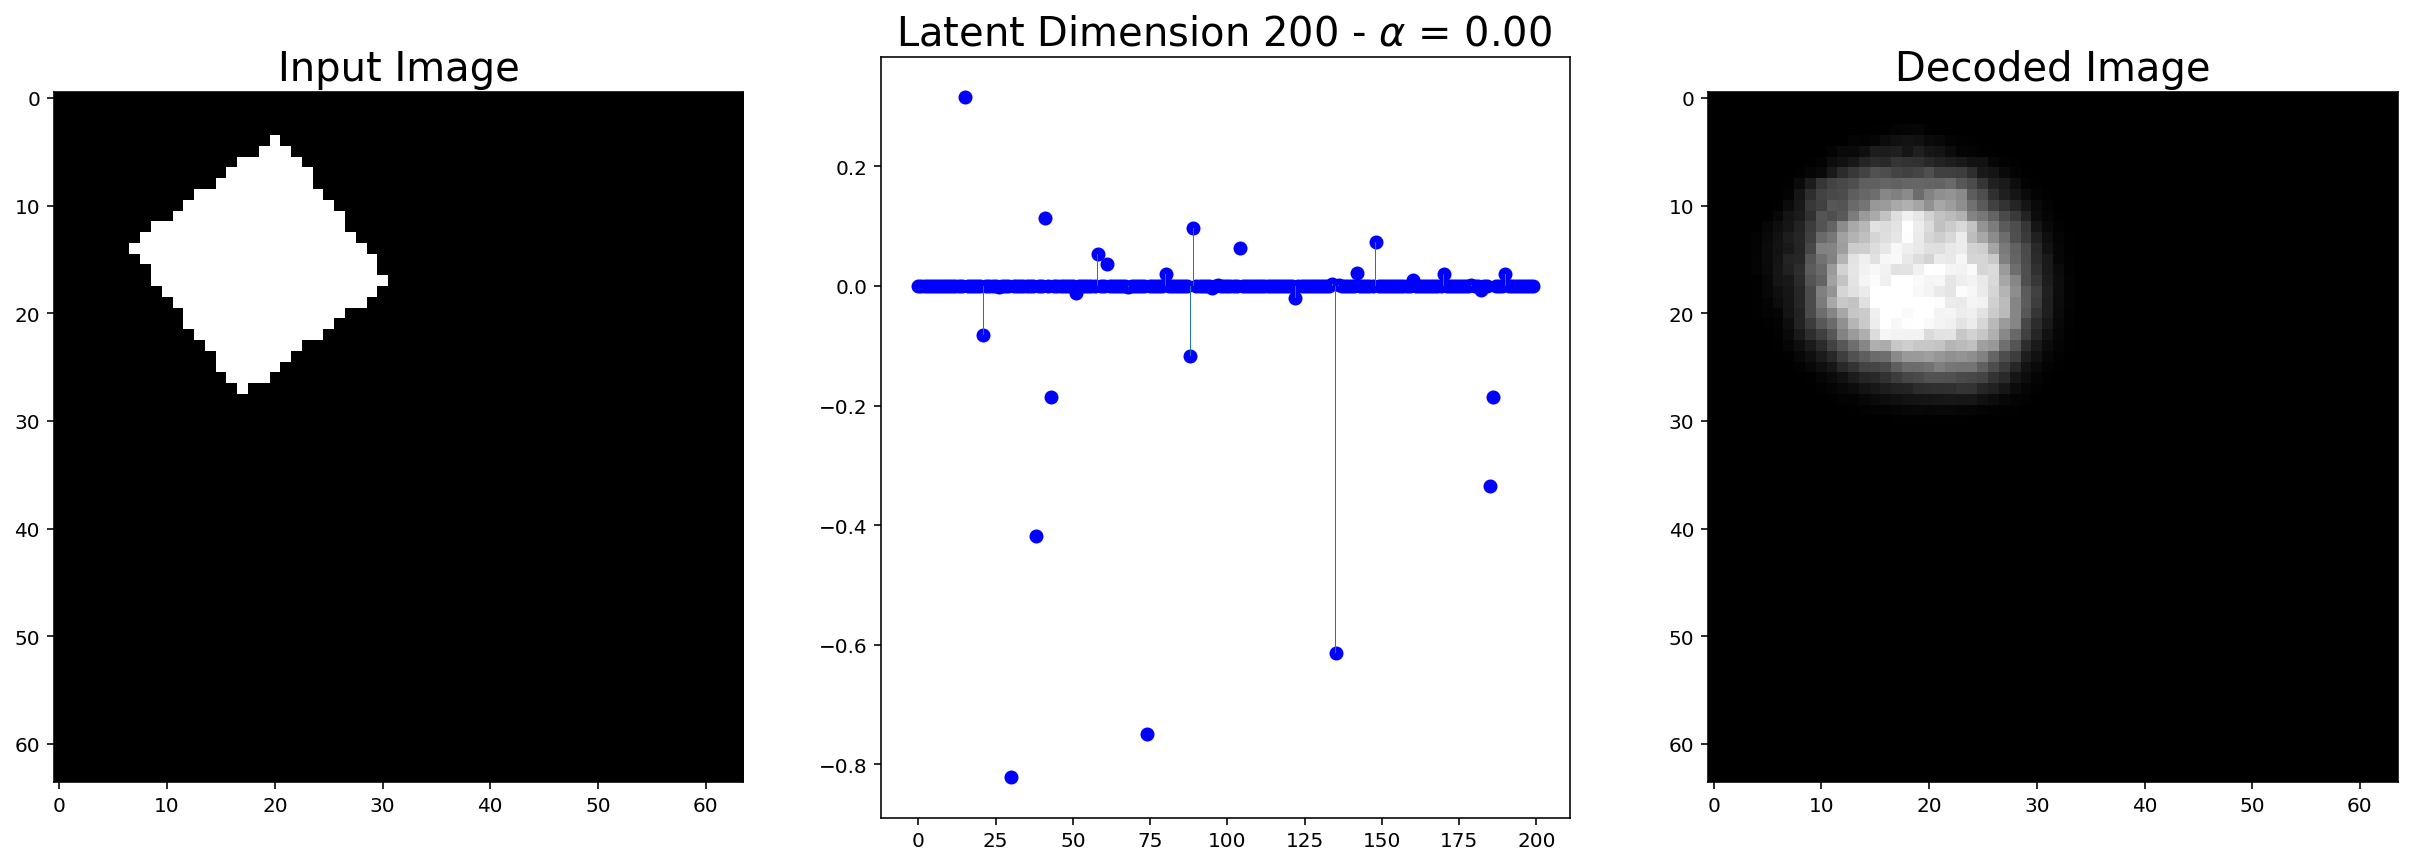

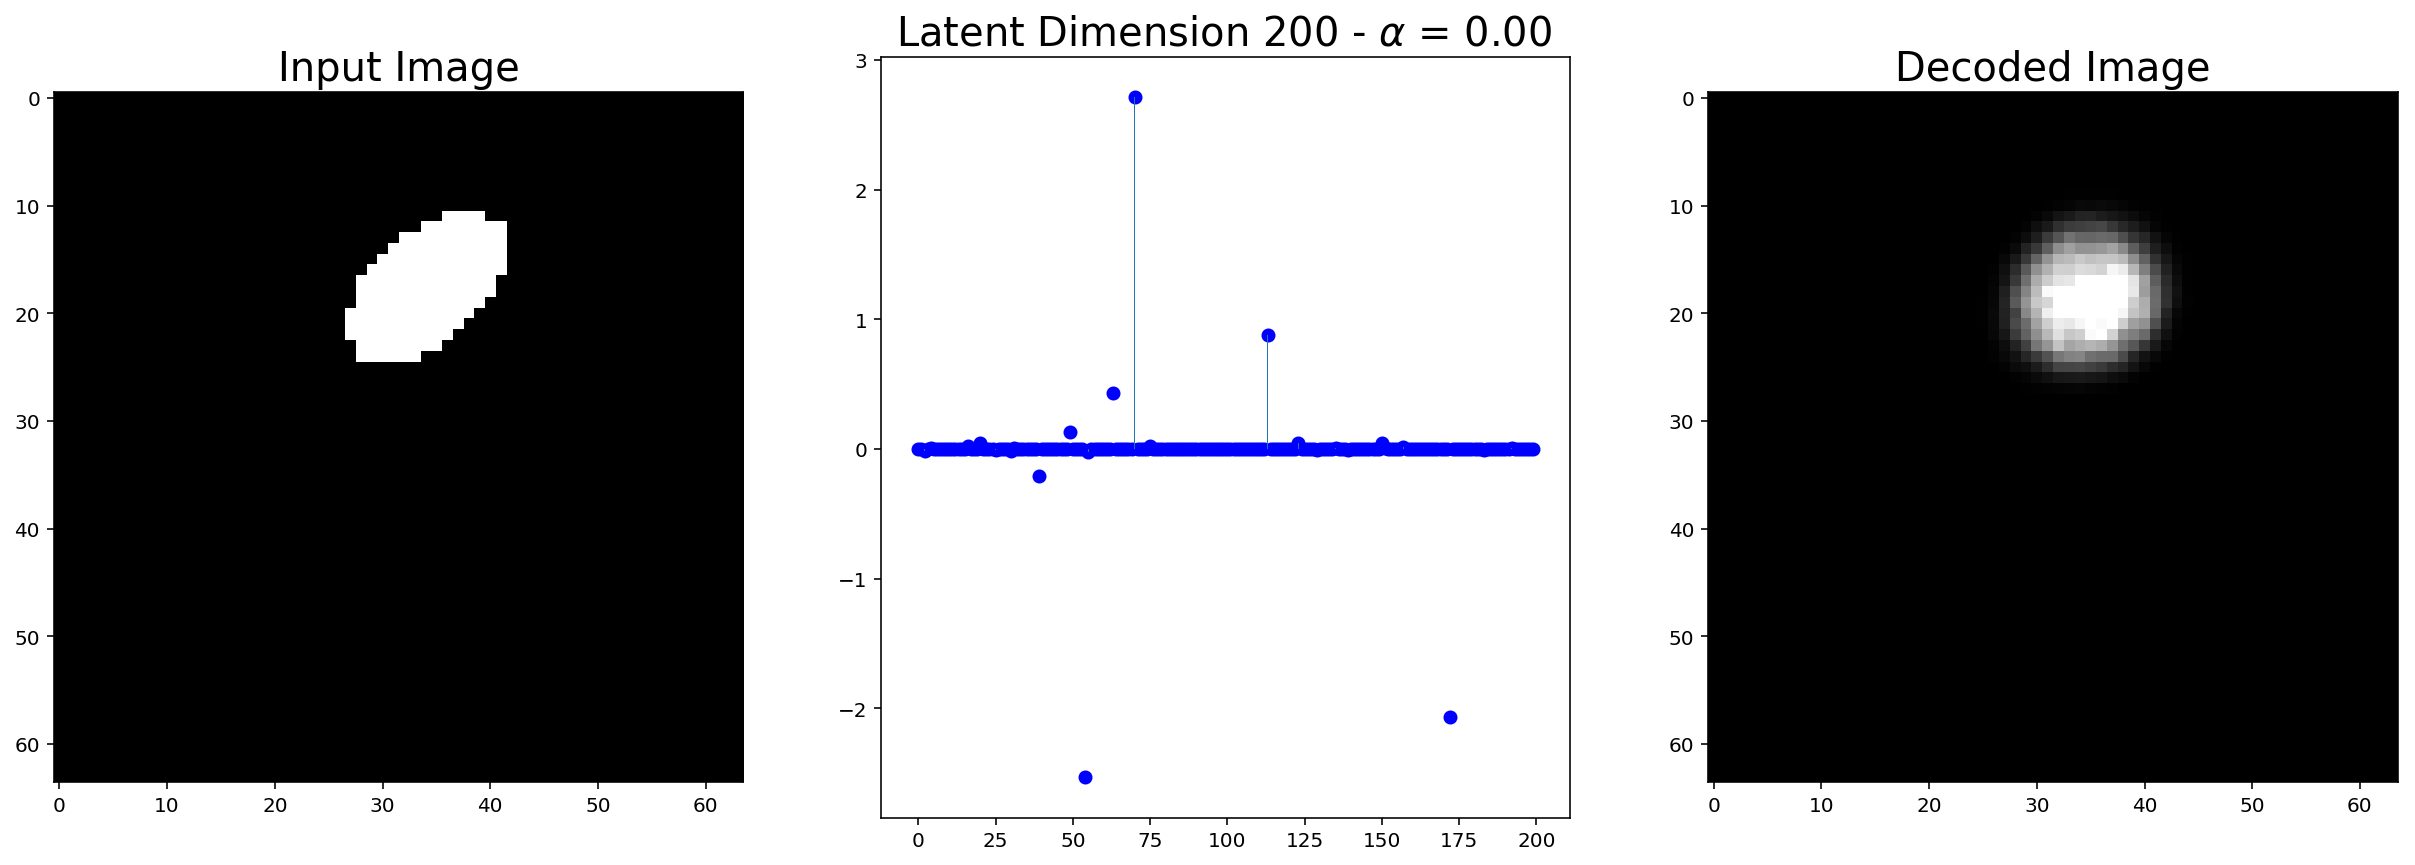

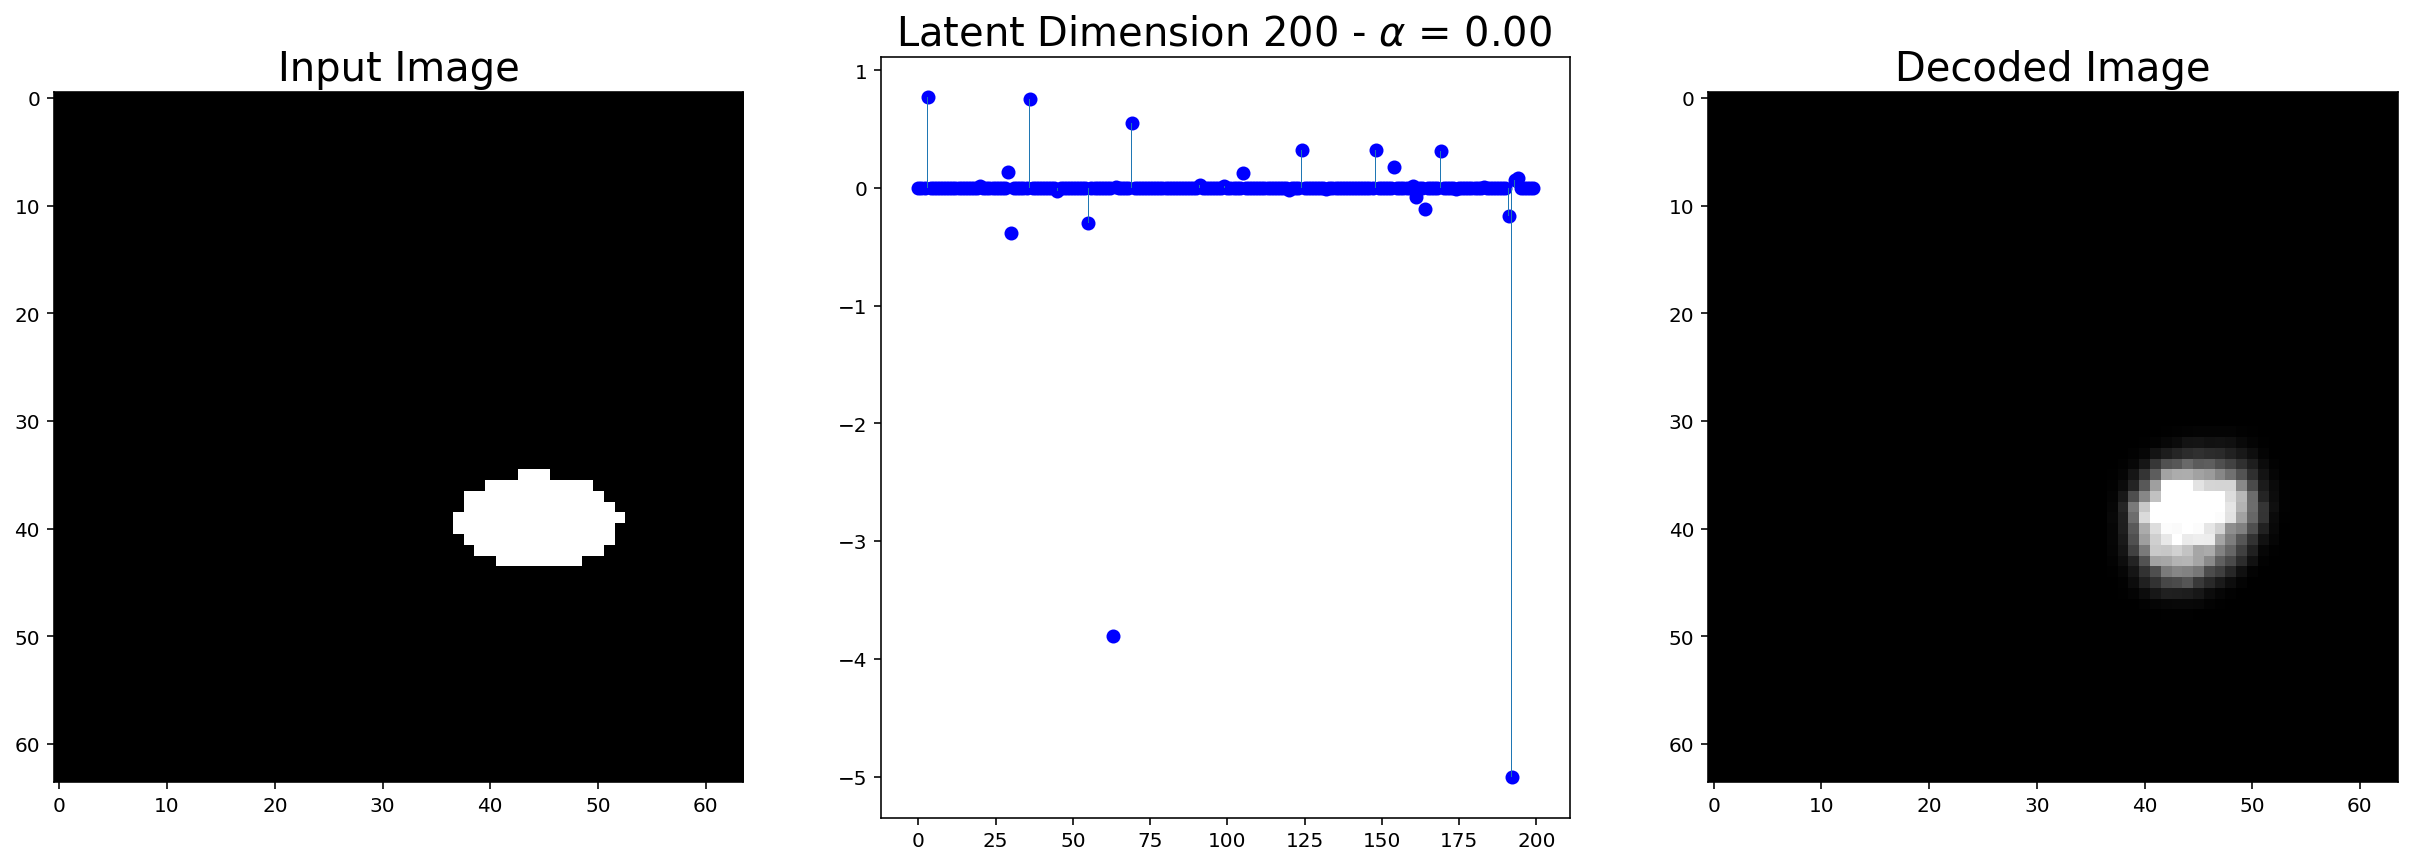

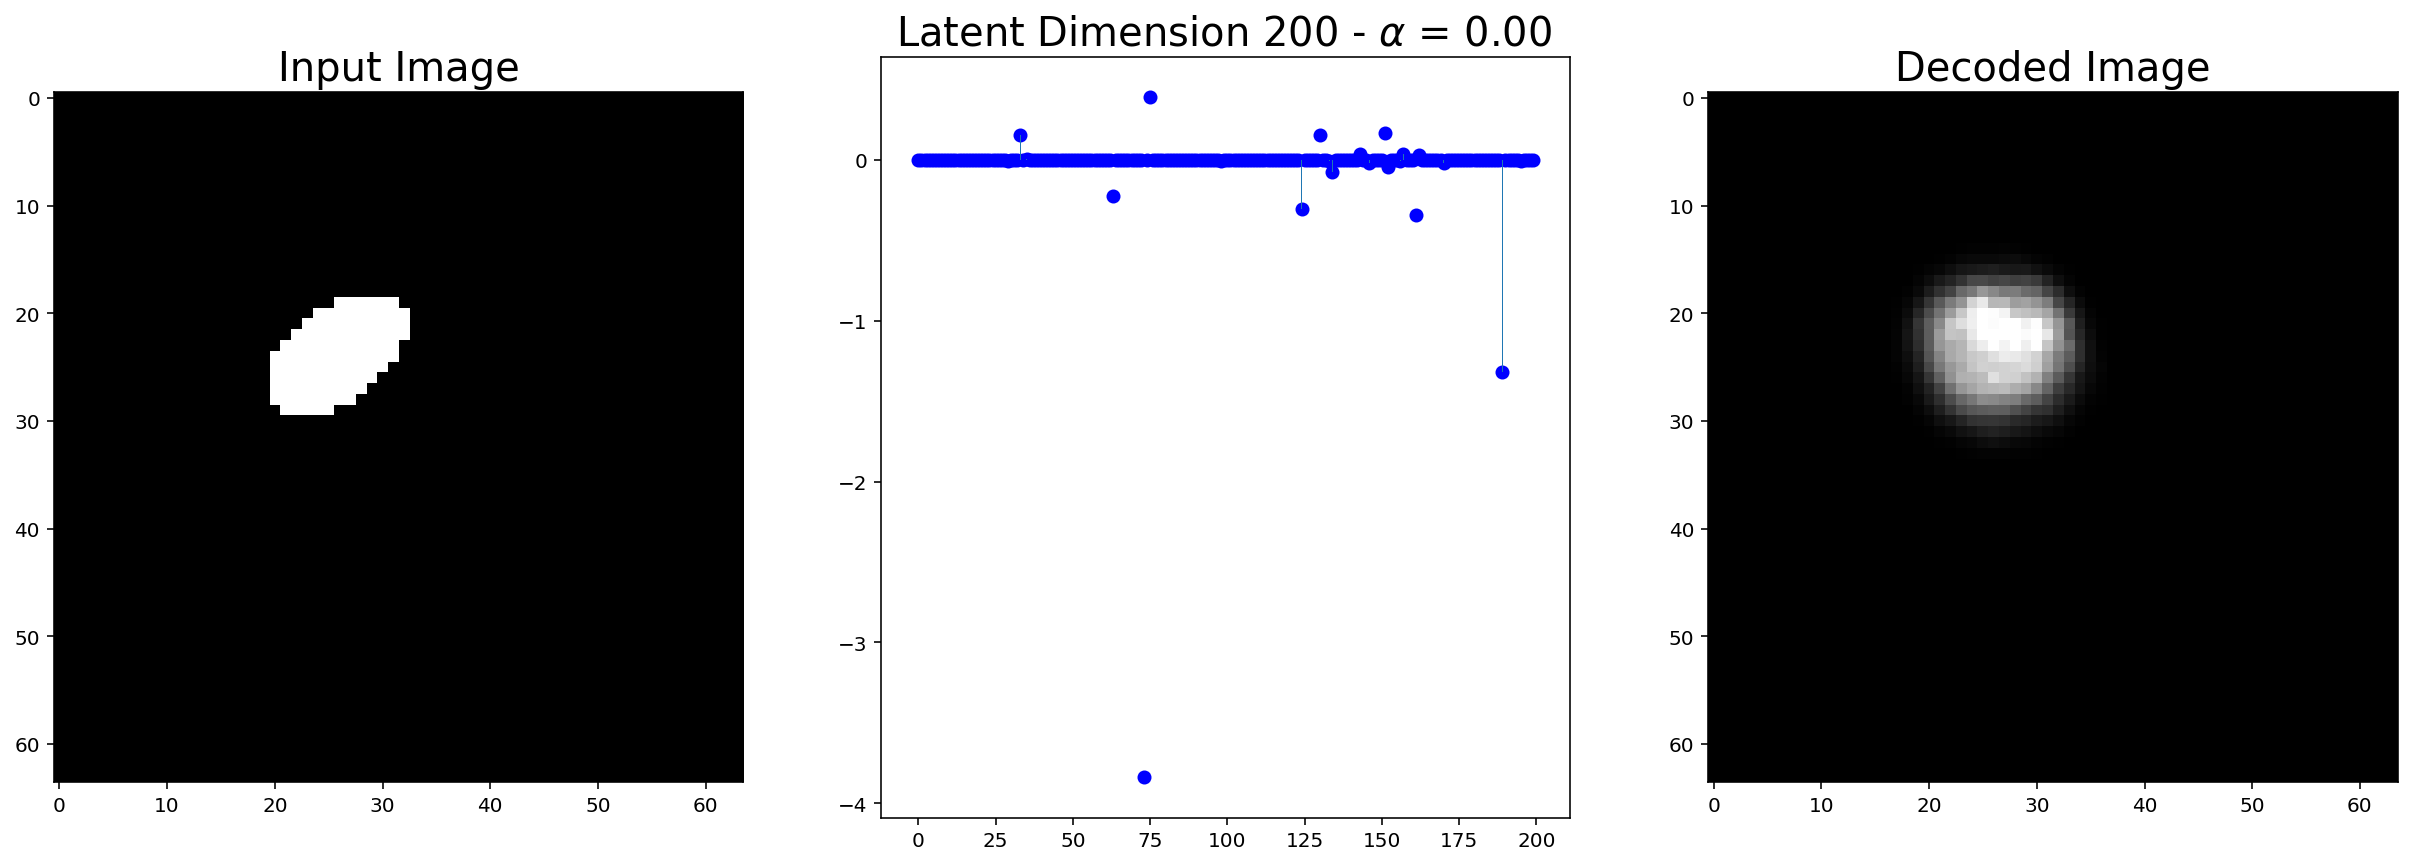

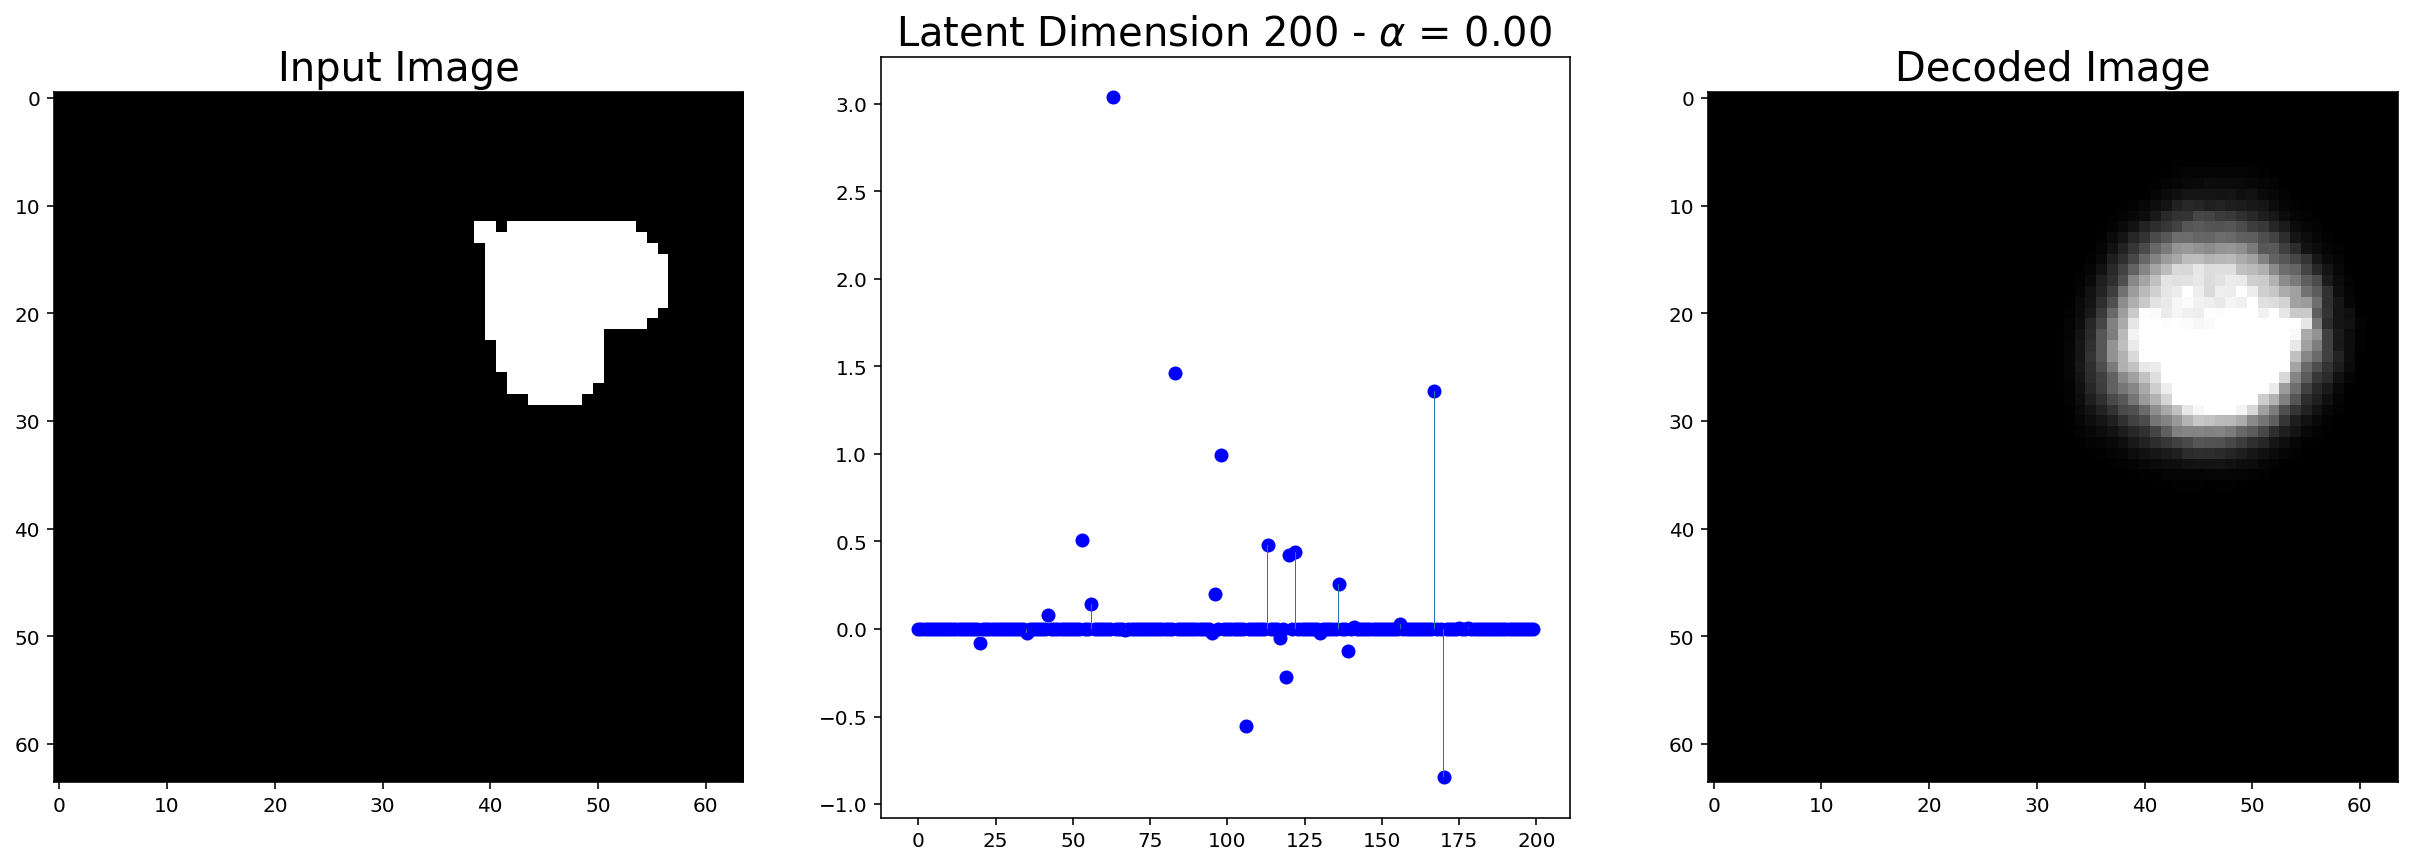

In [108]:
# 1200,1200 latent dimensions, alpha = 0.001, 200 hidden size, 10 epochs
for i in range(10):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


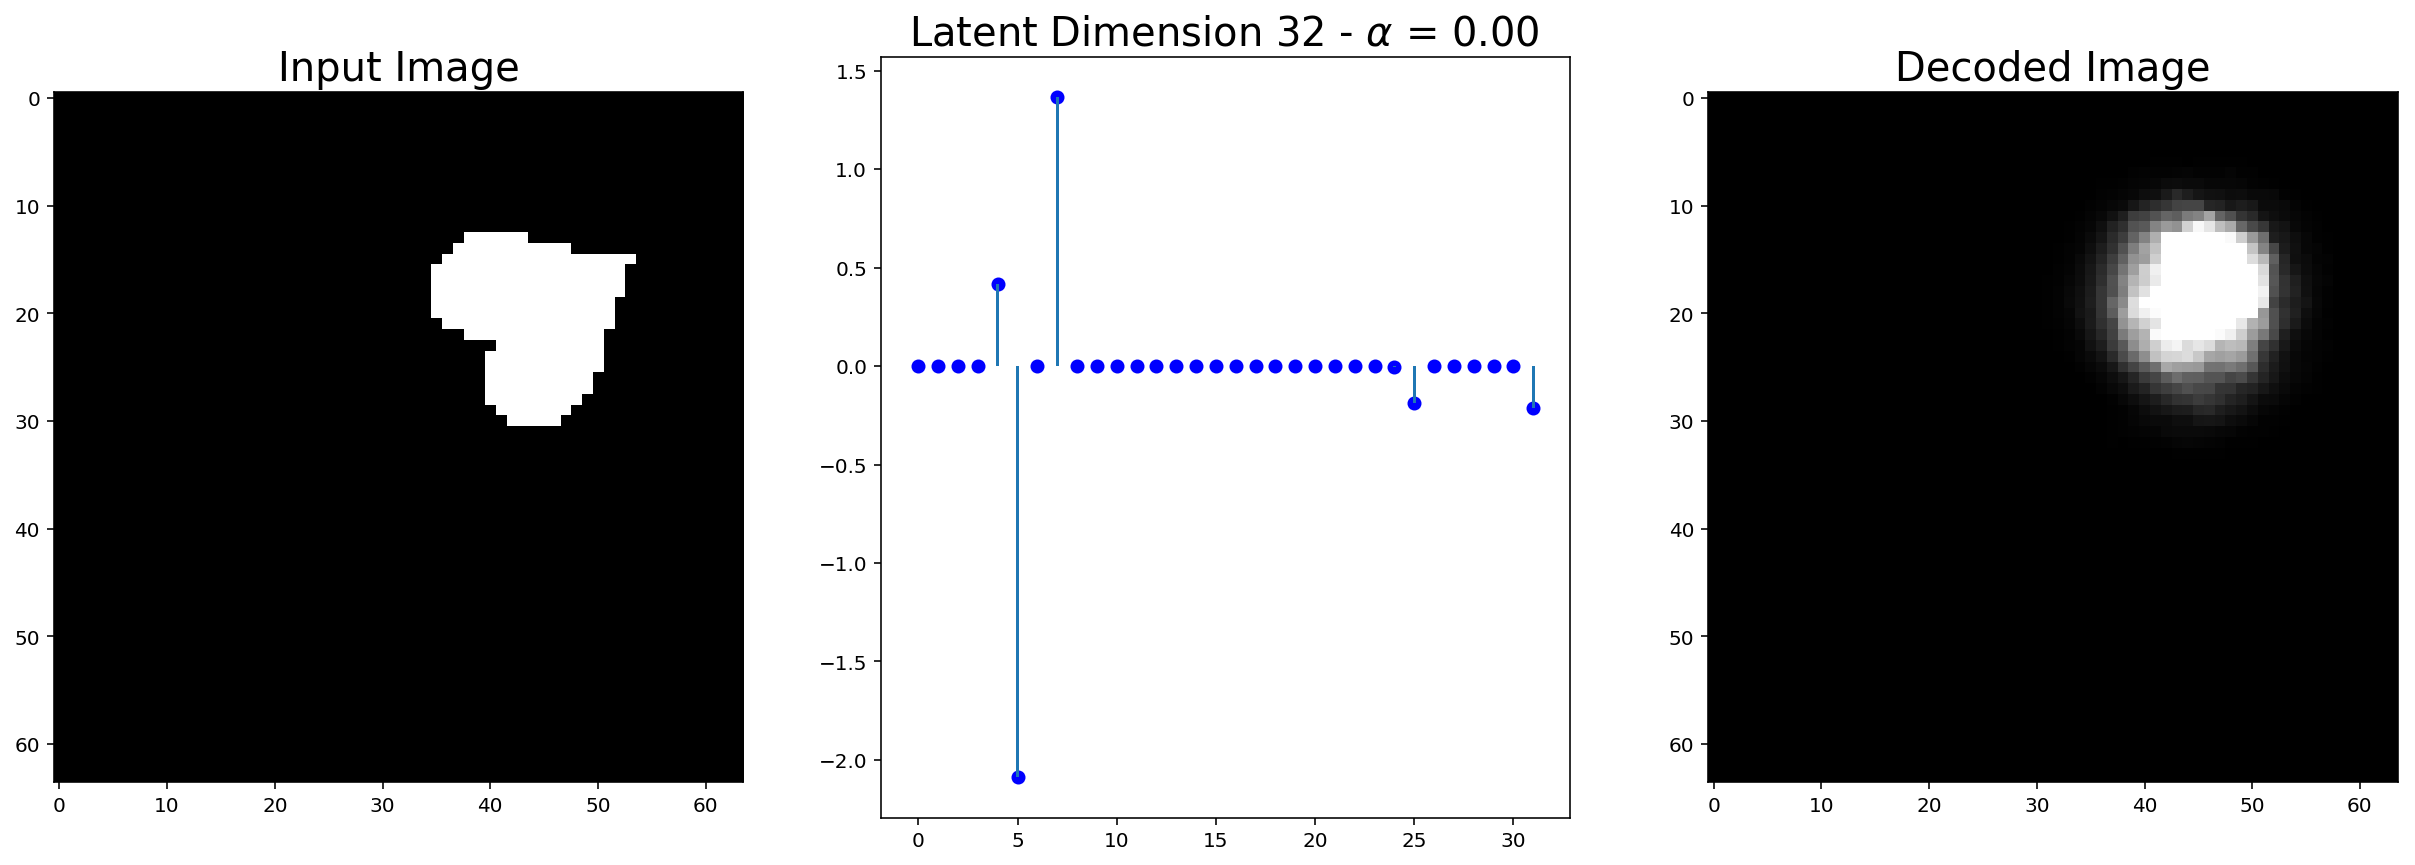

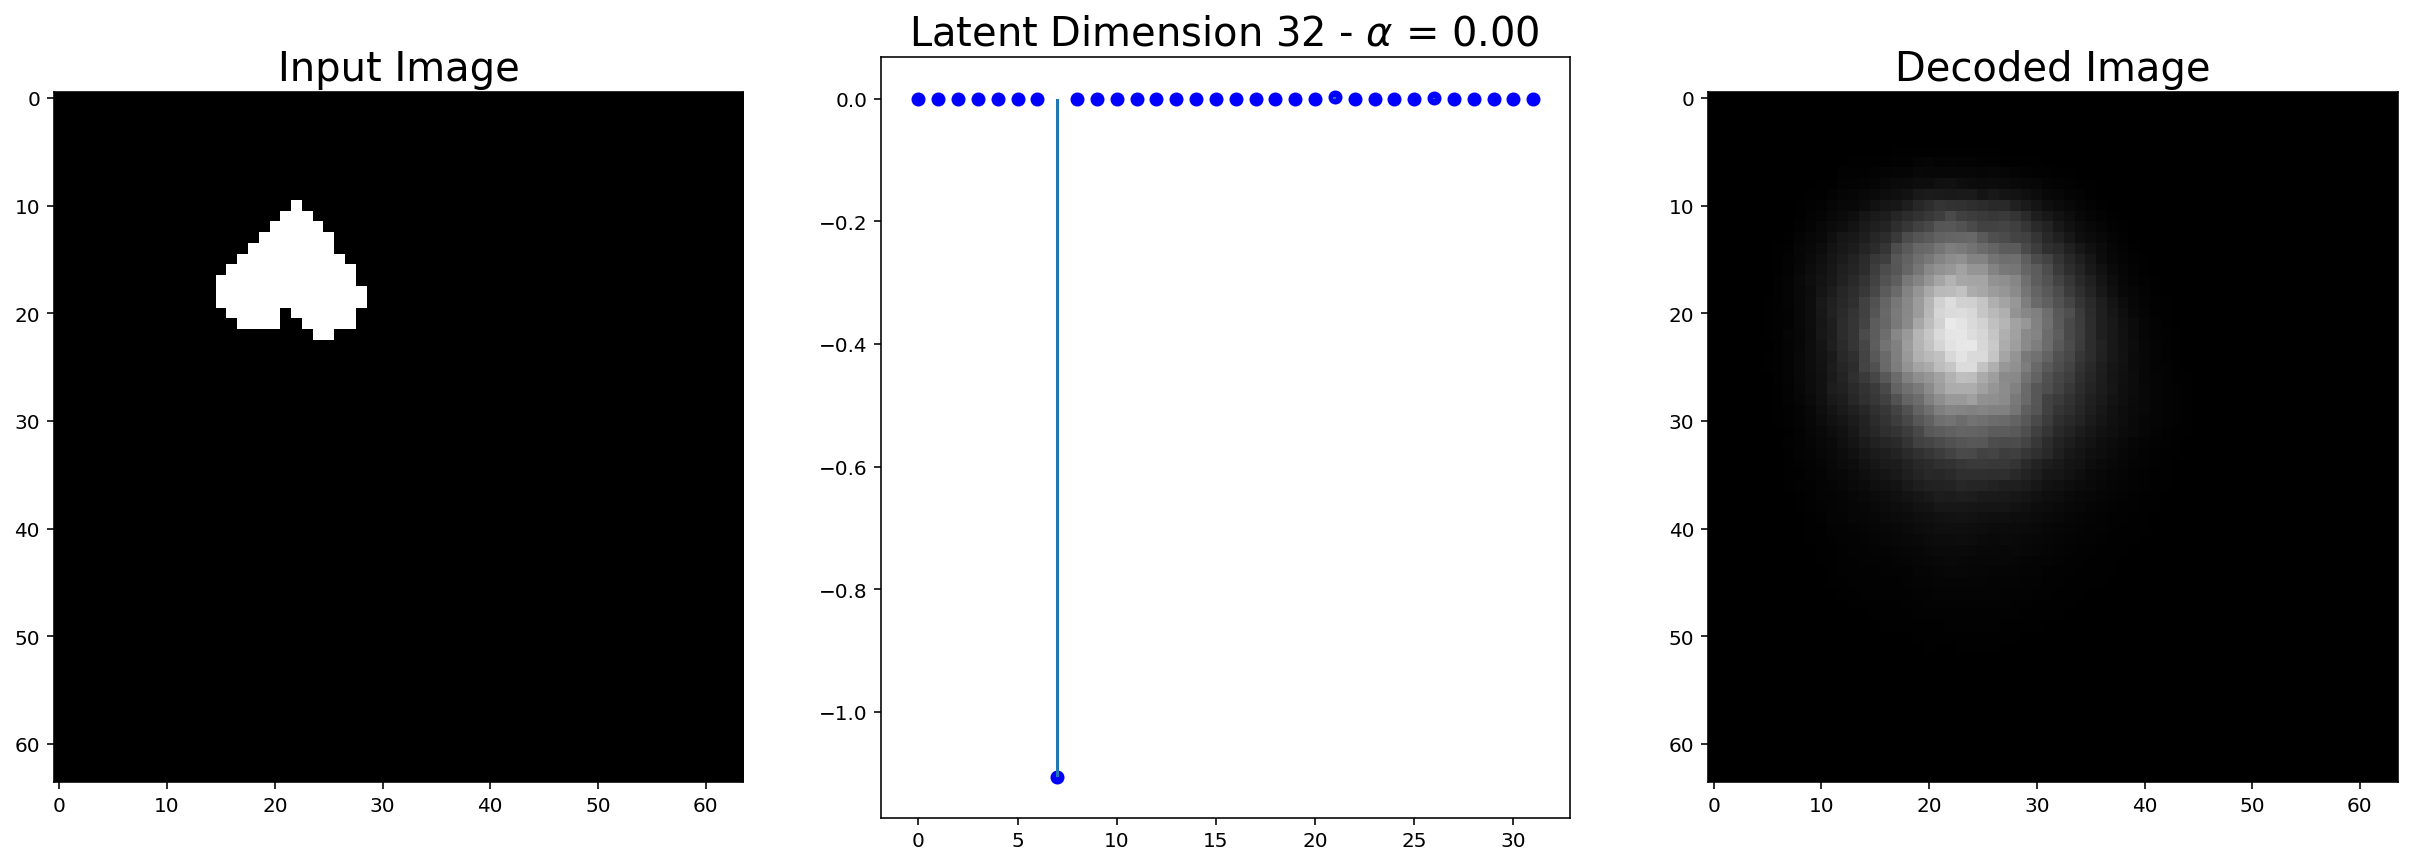

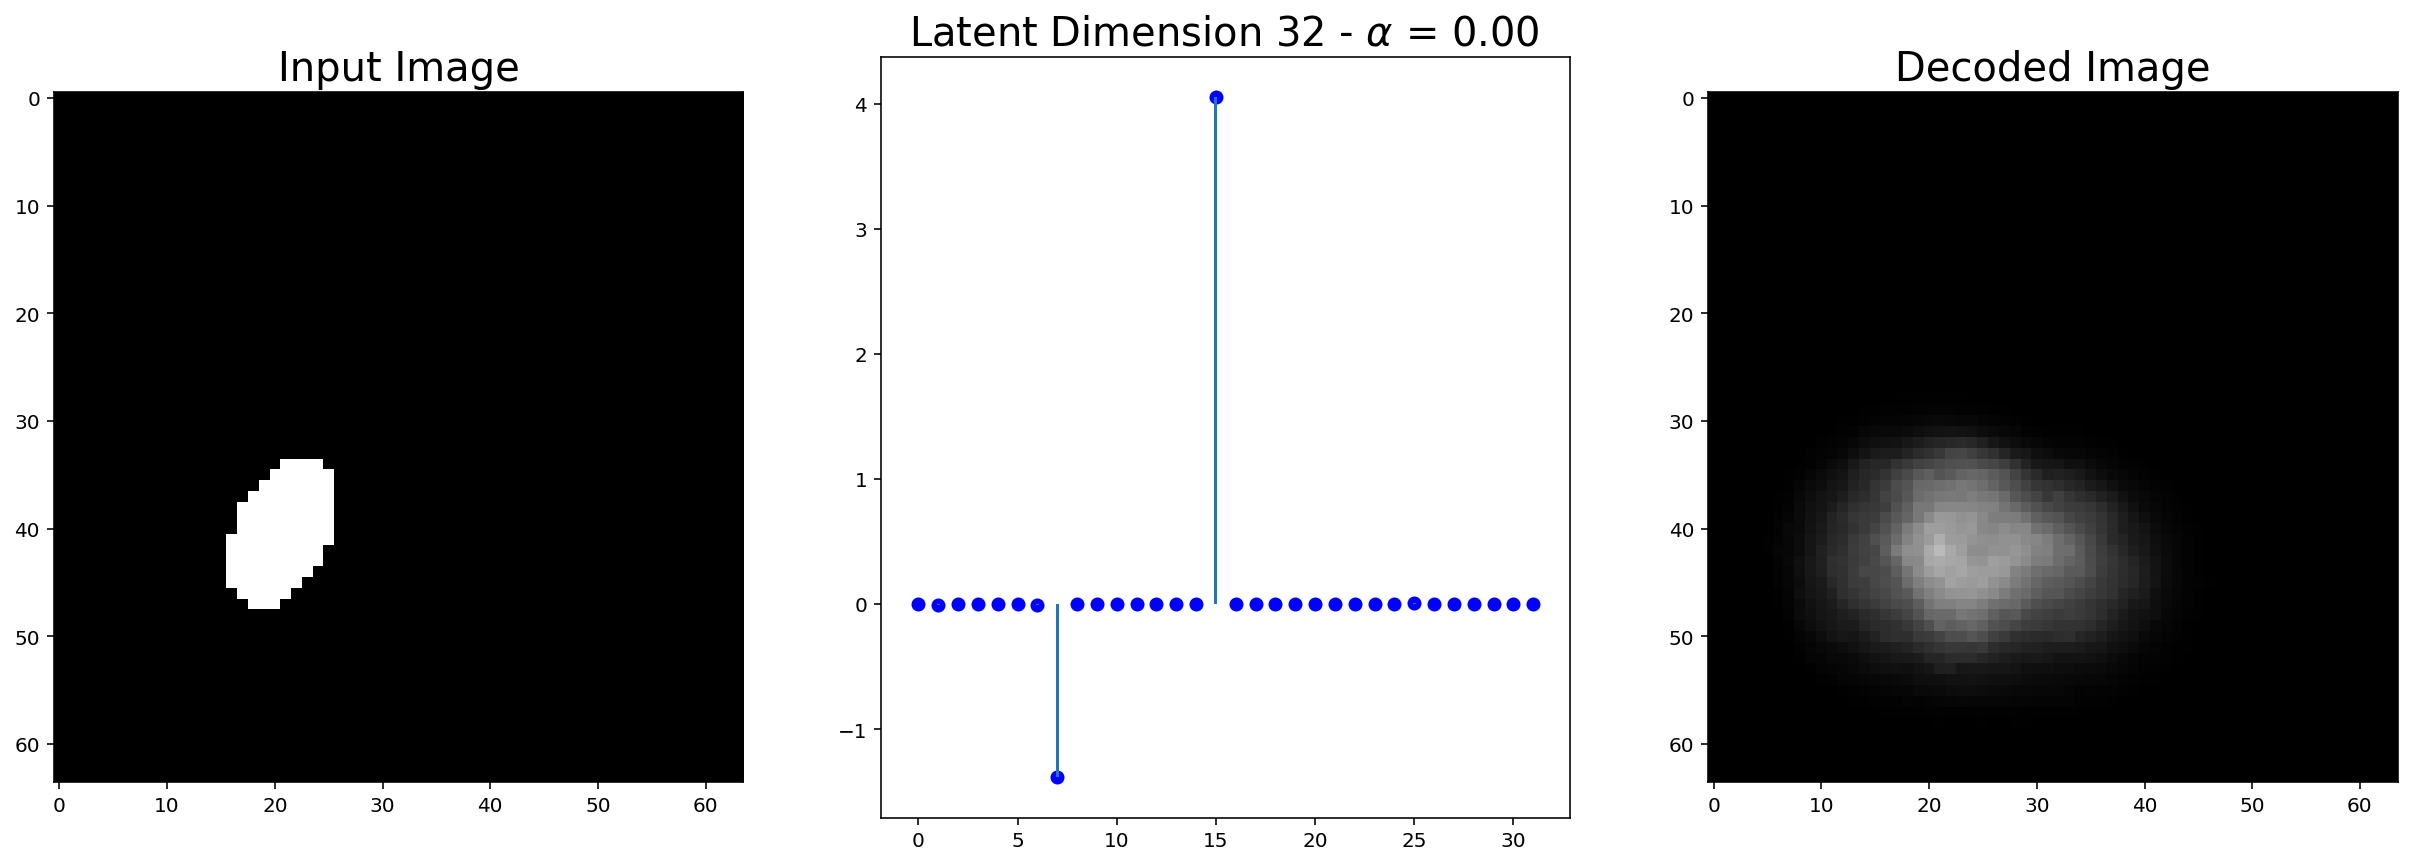

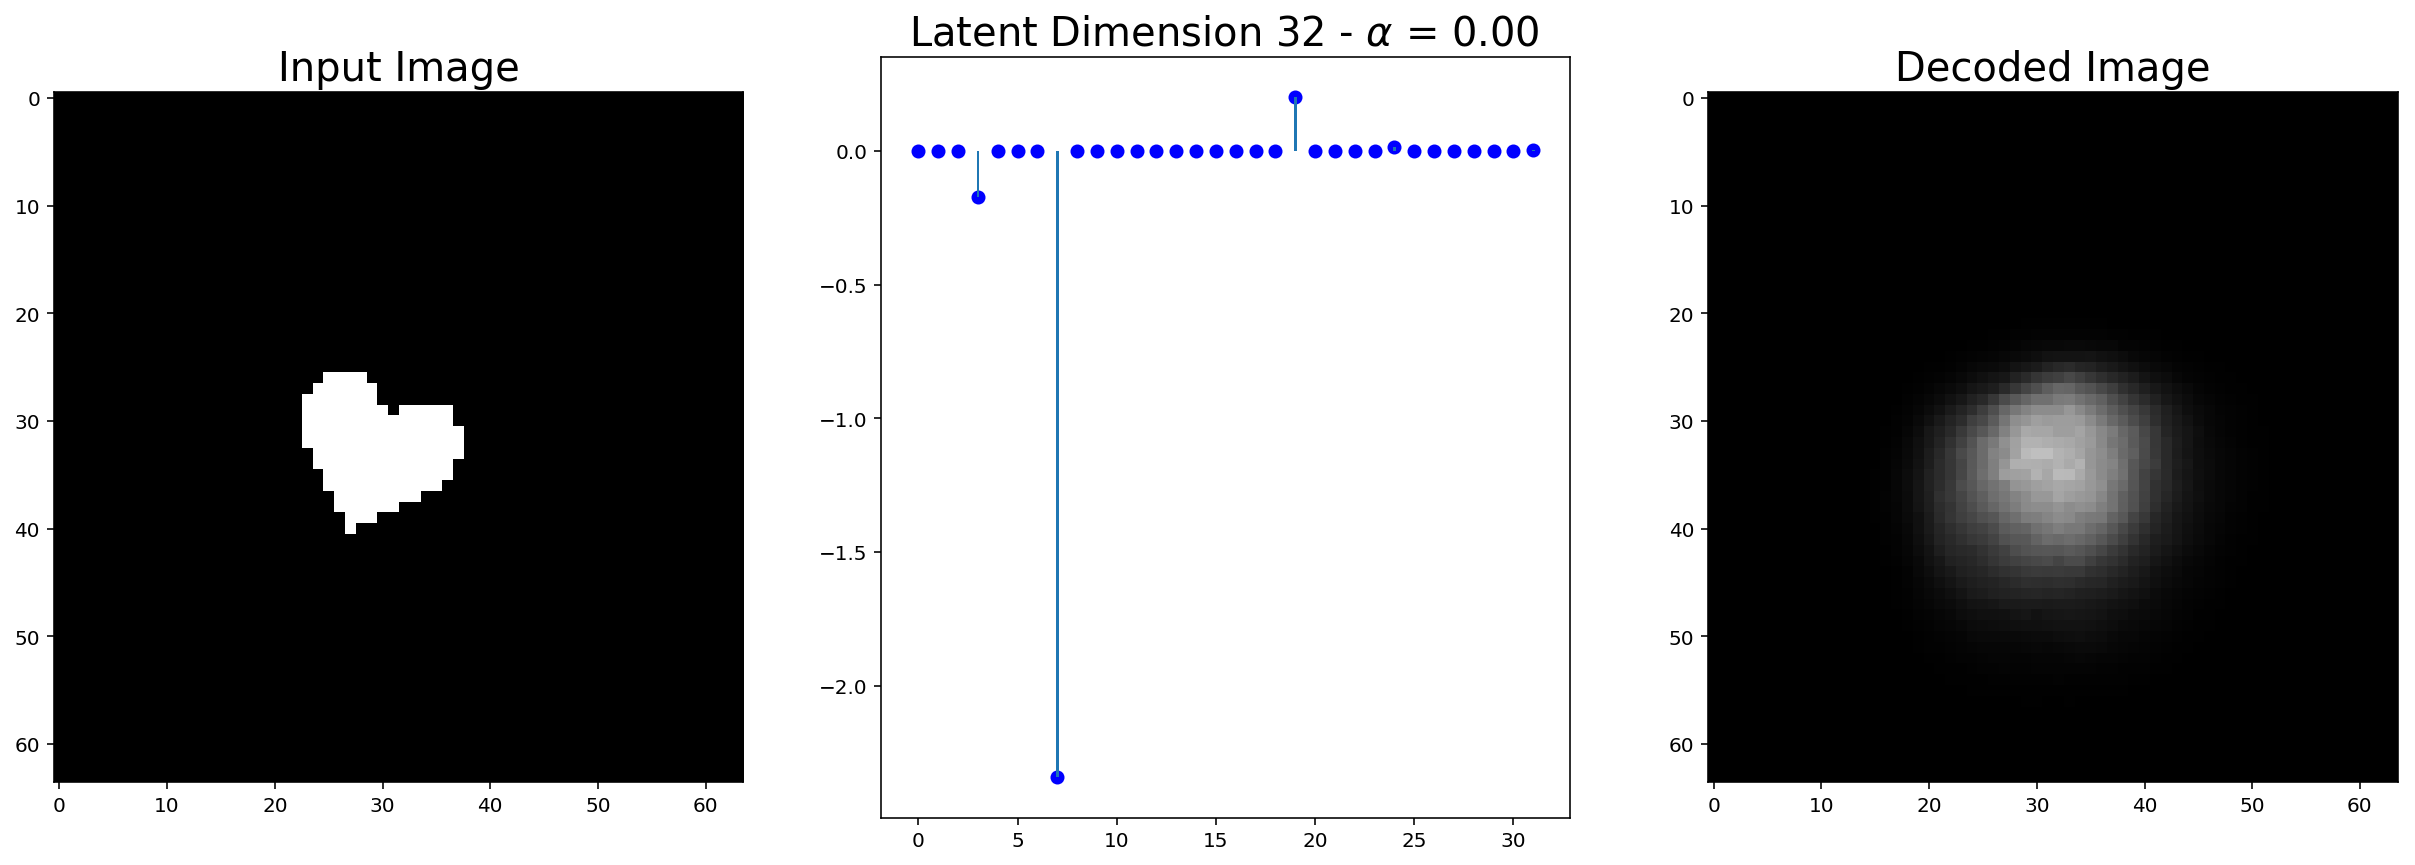

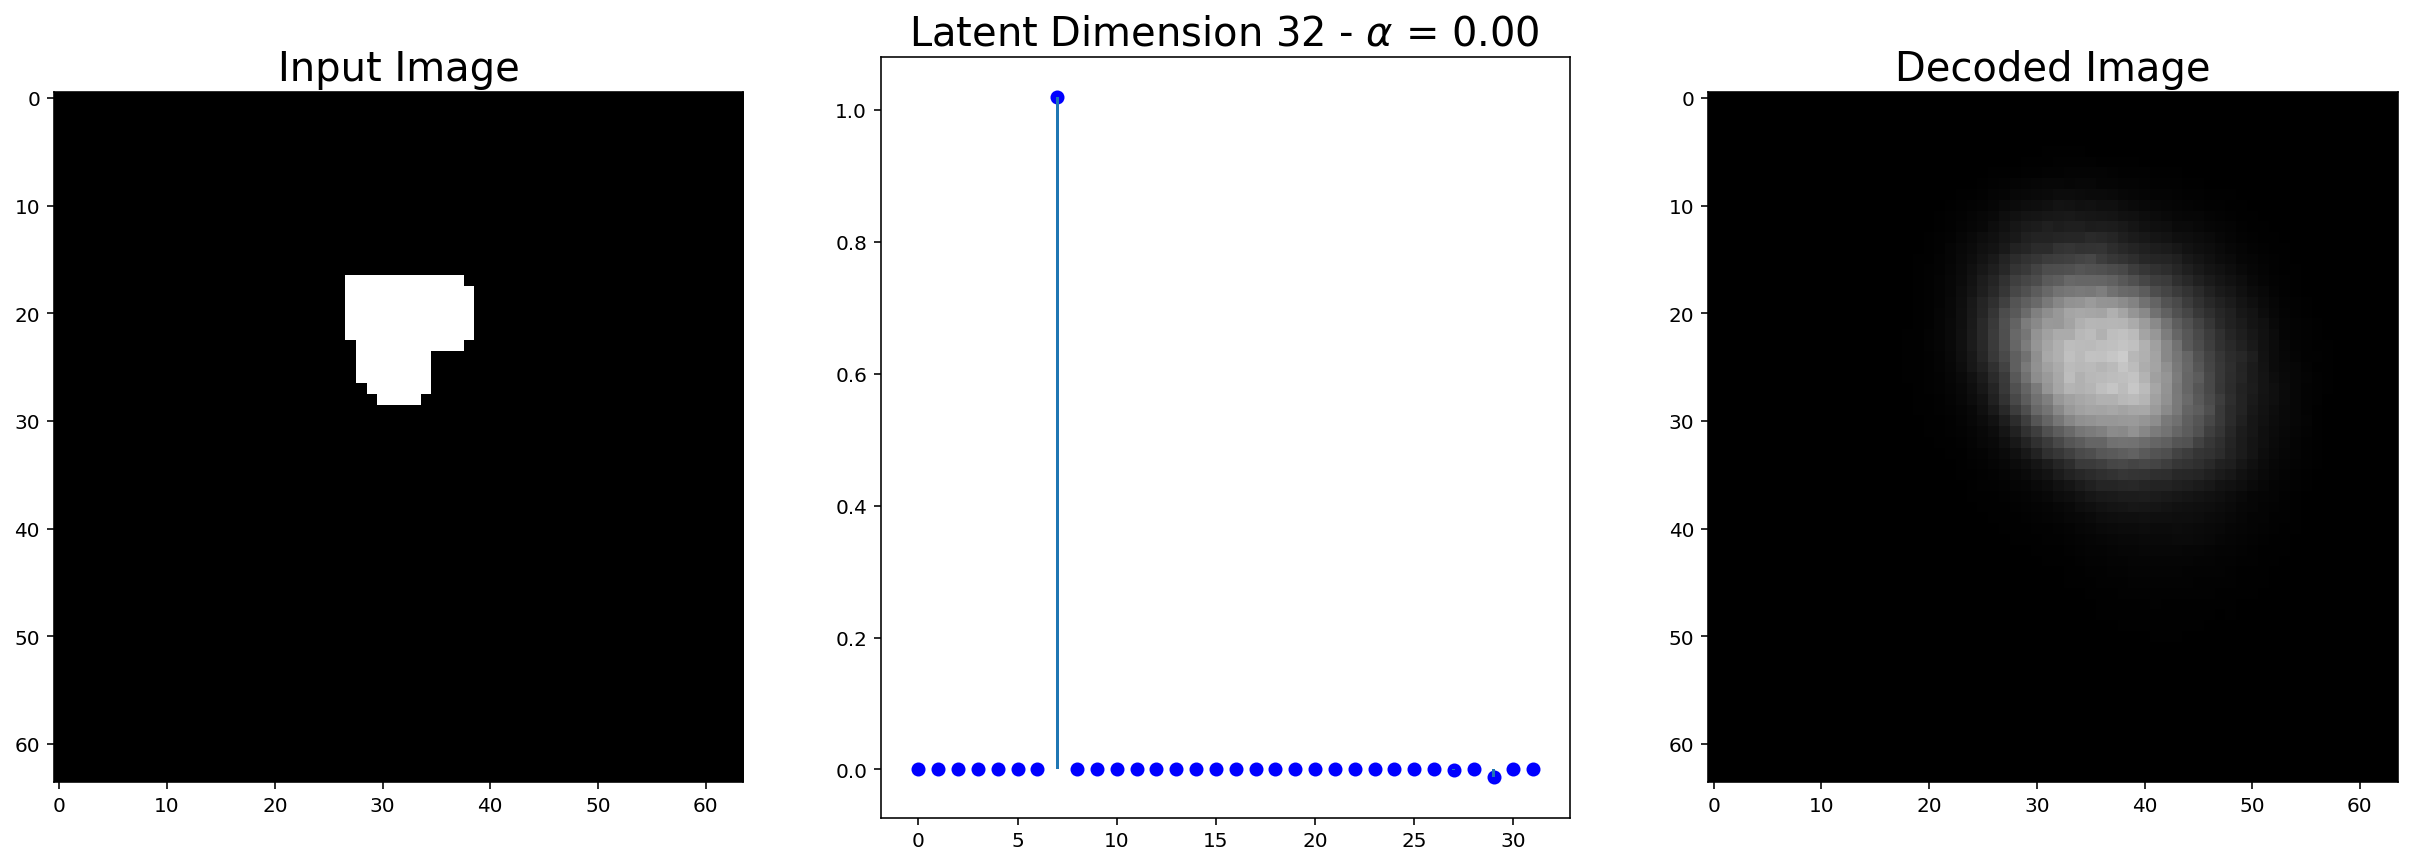

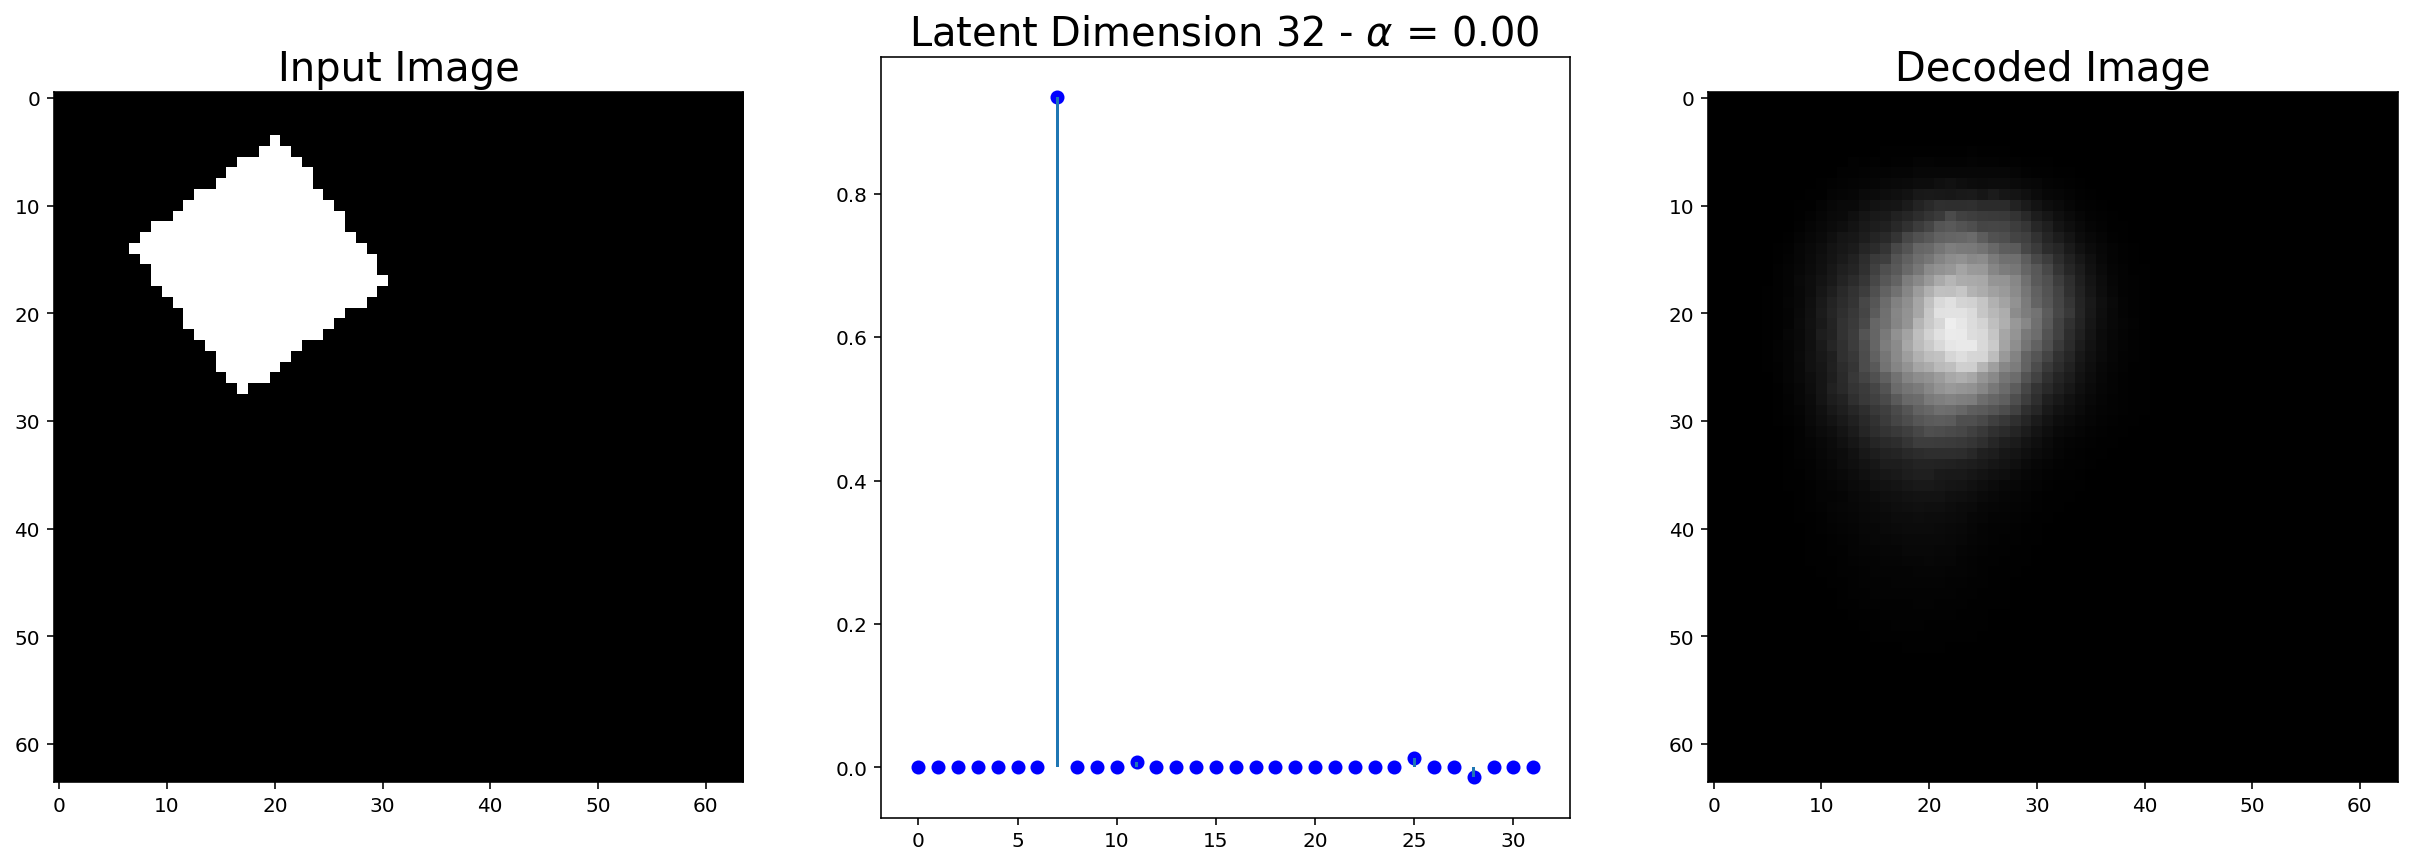

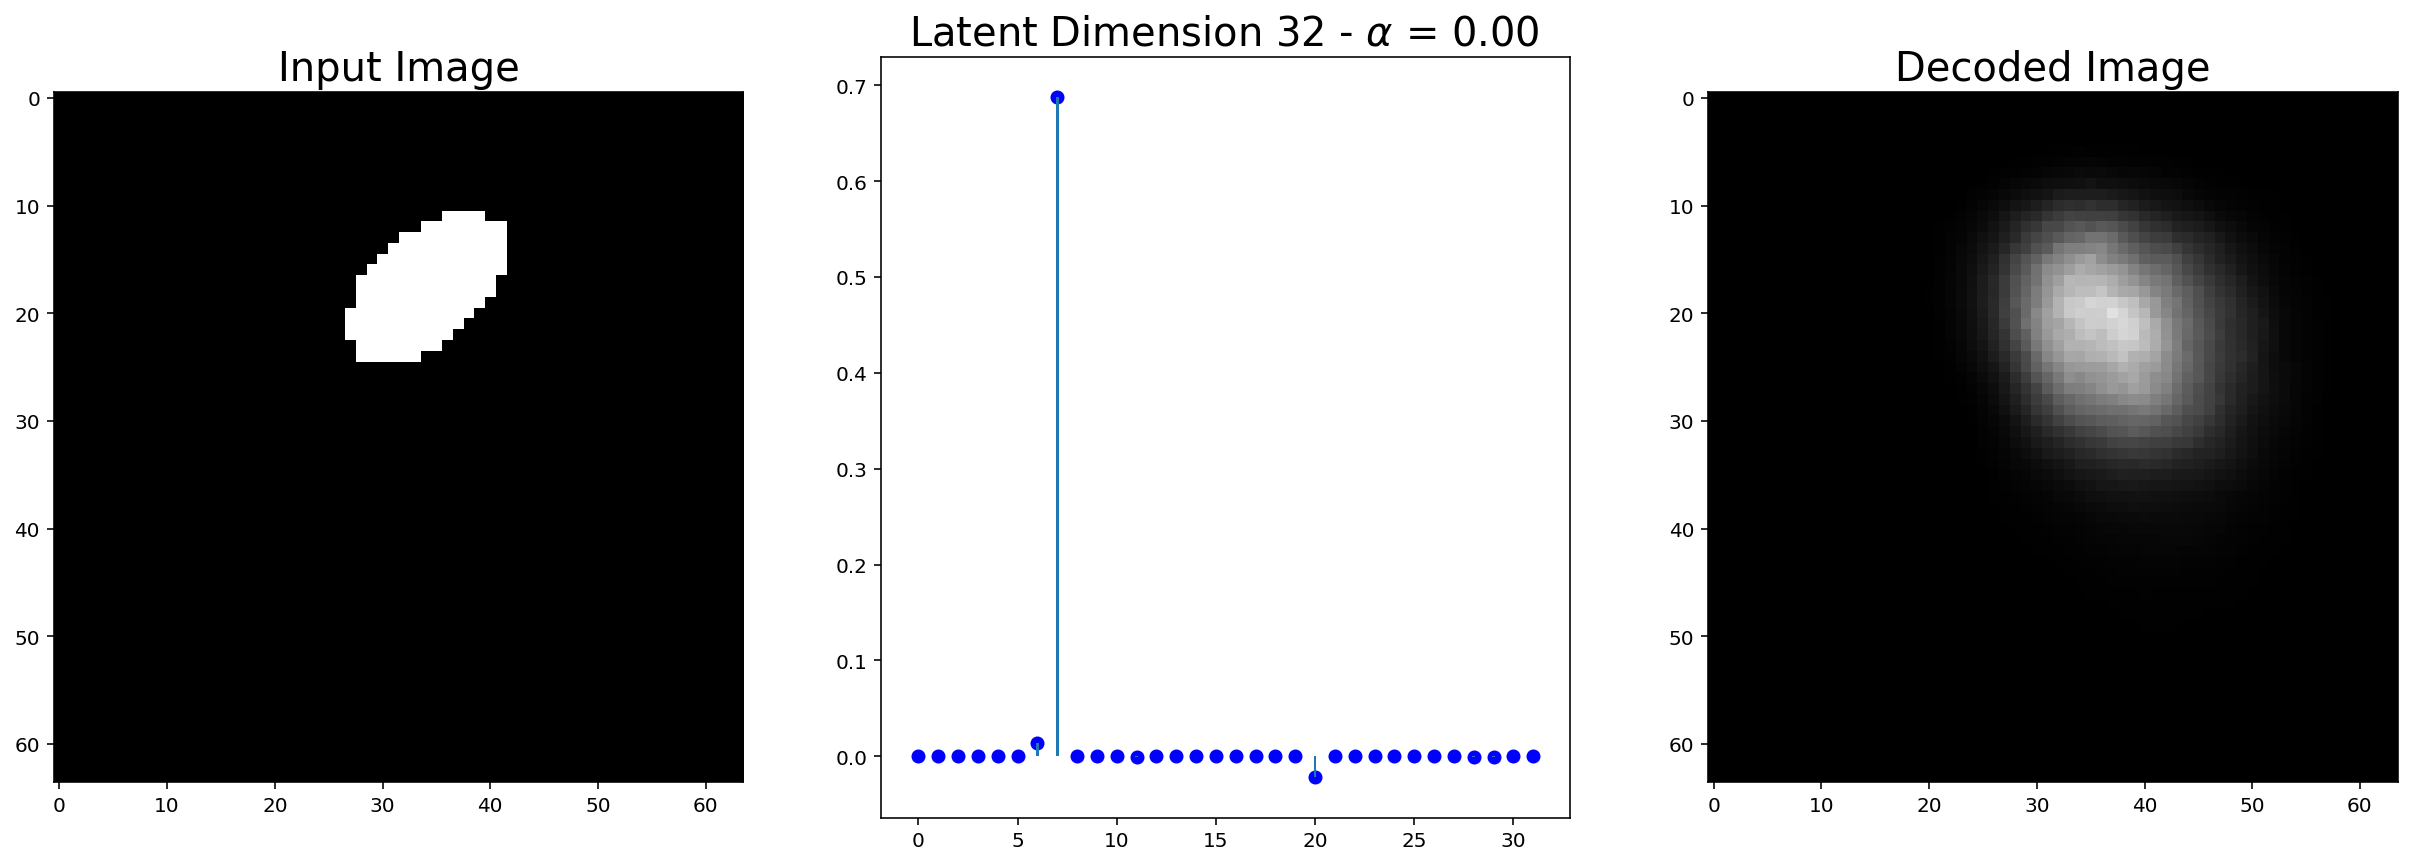

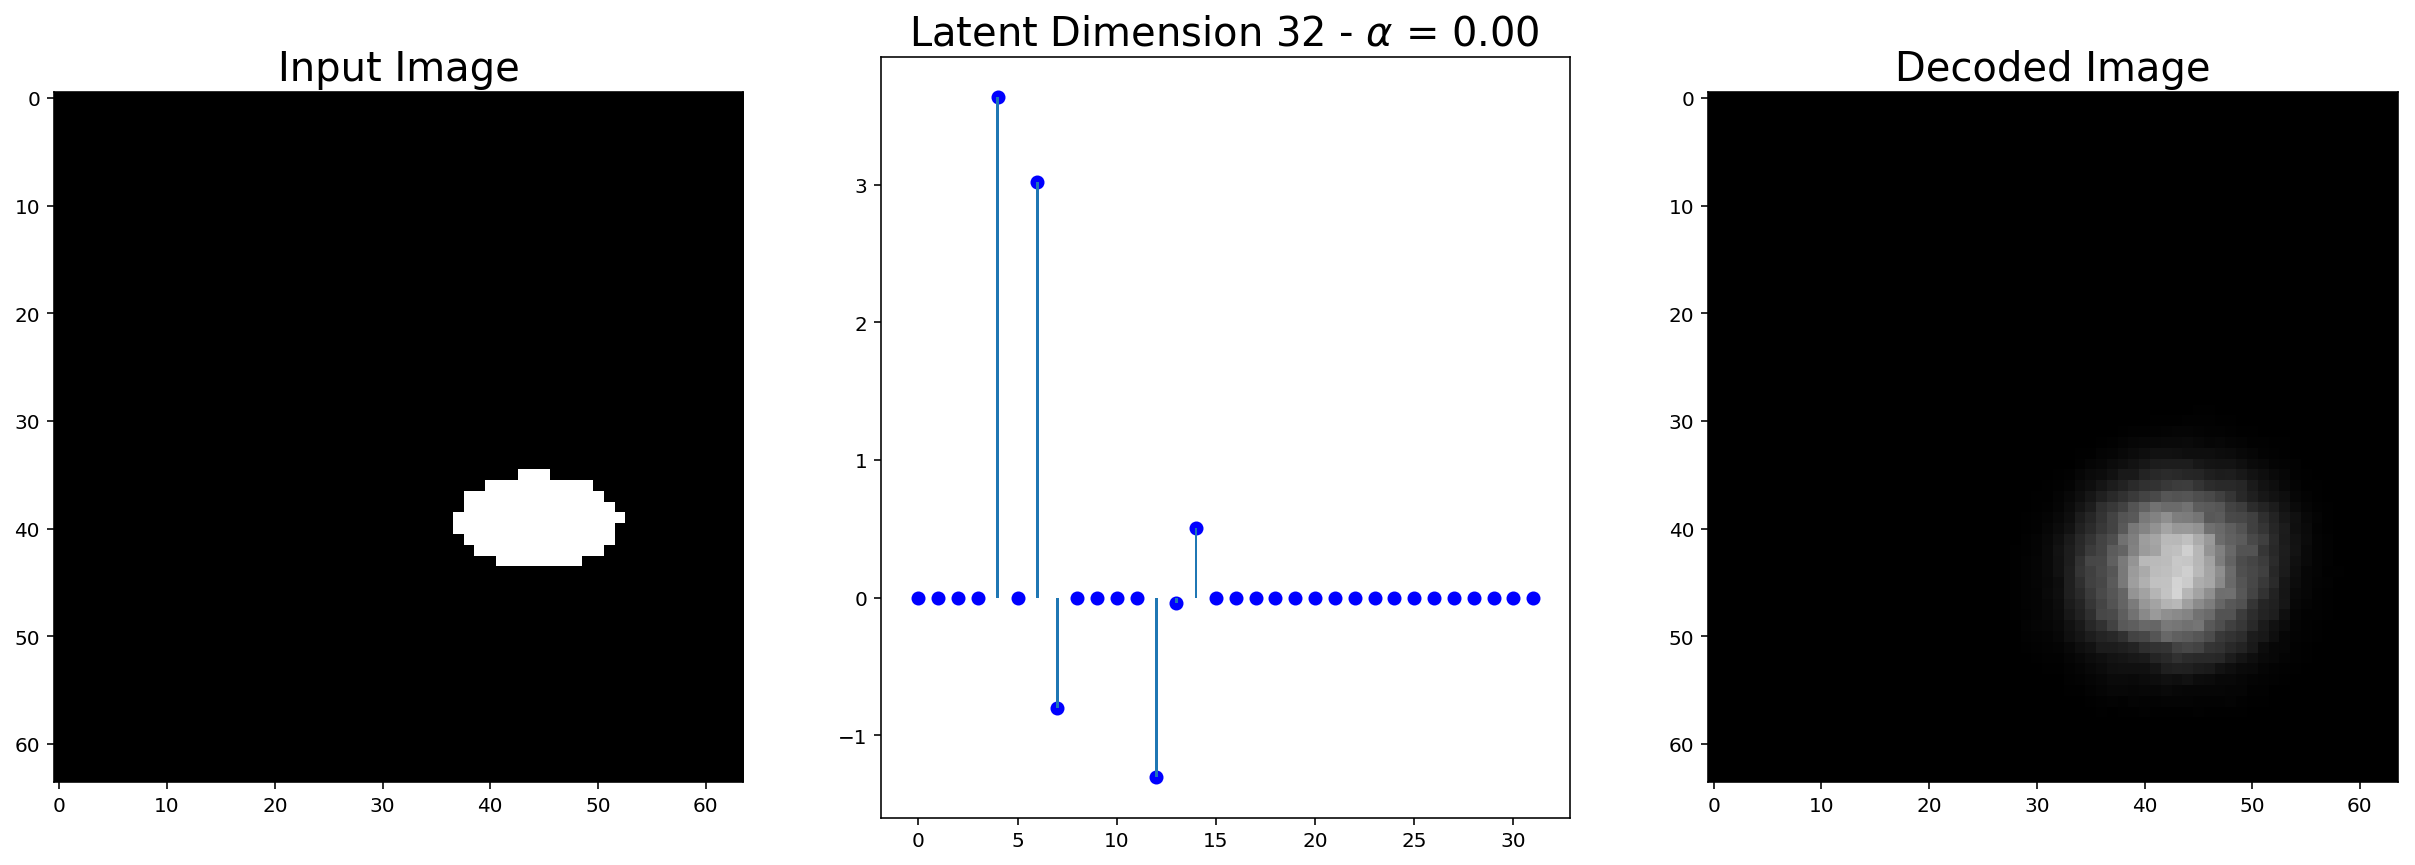

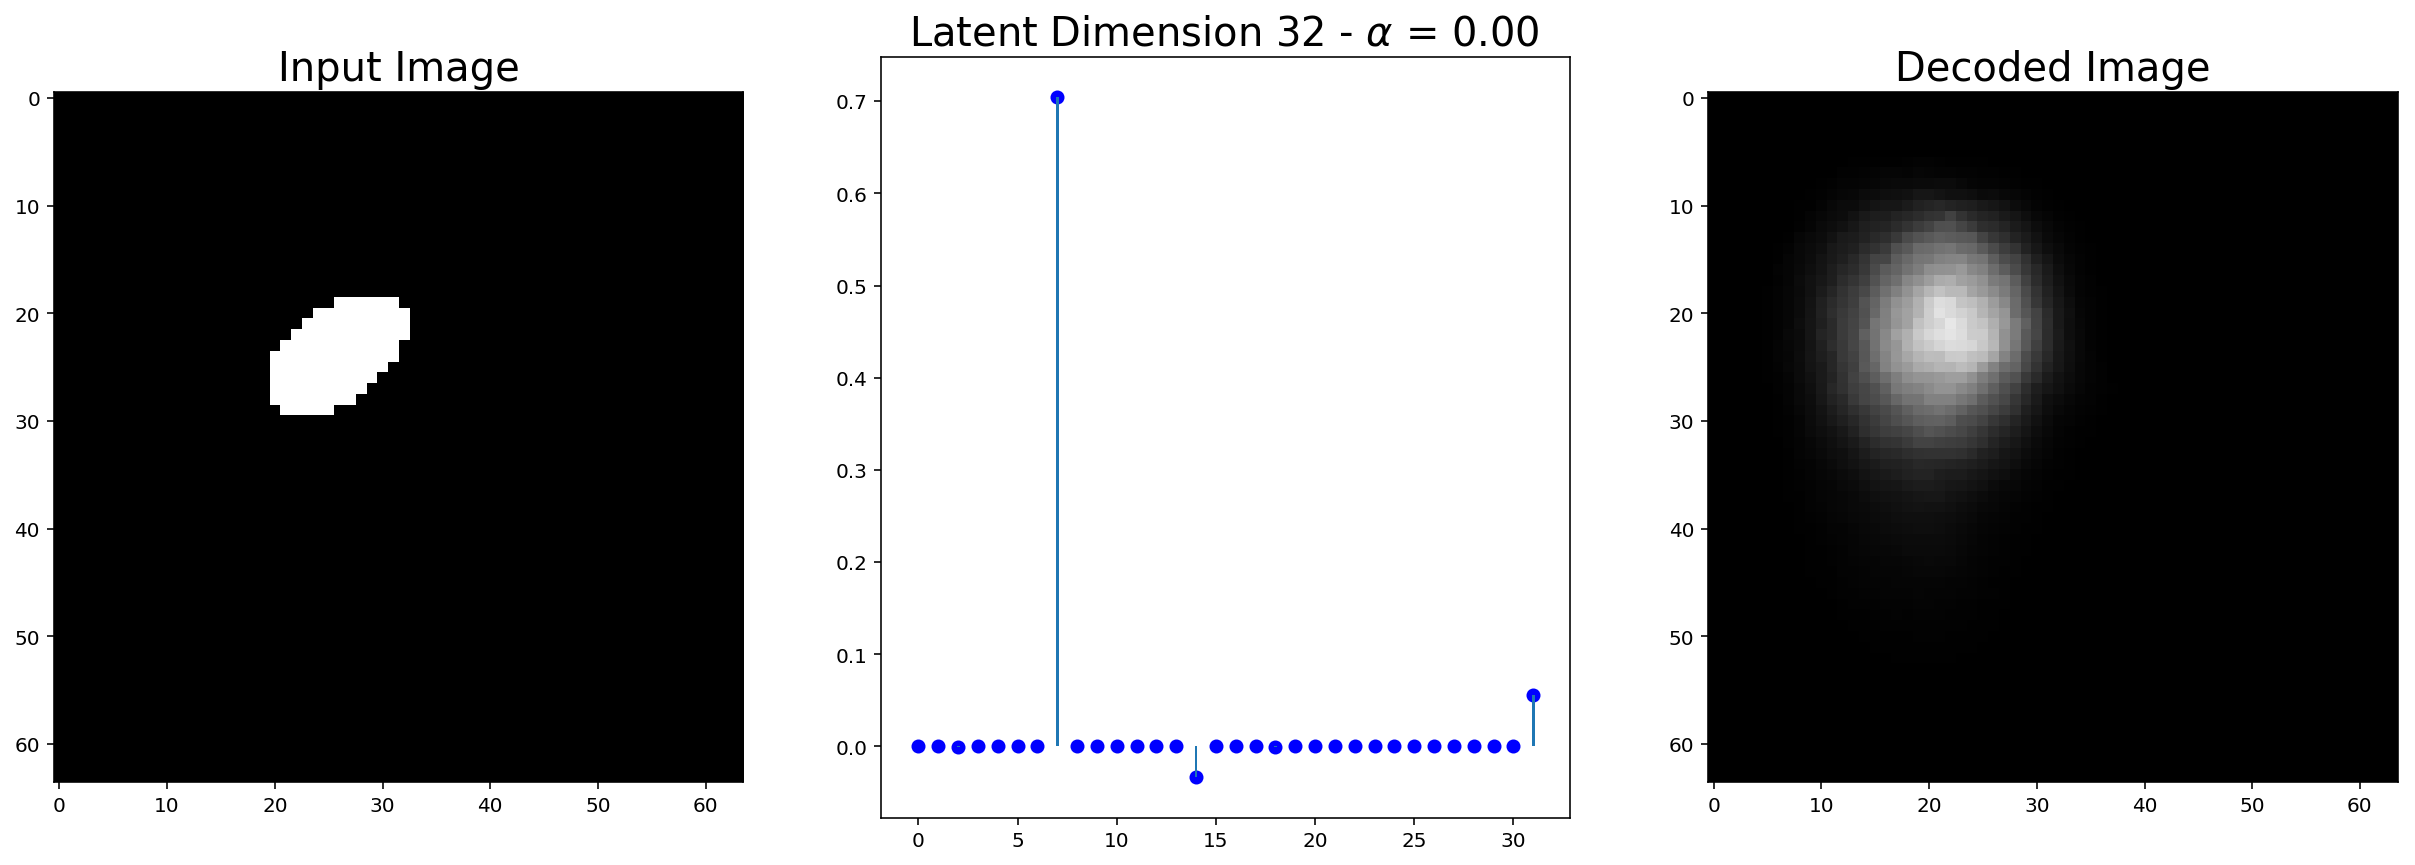

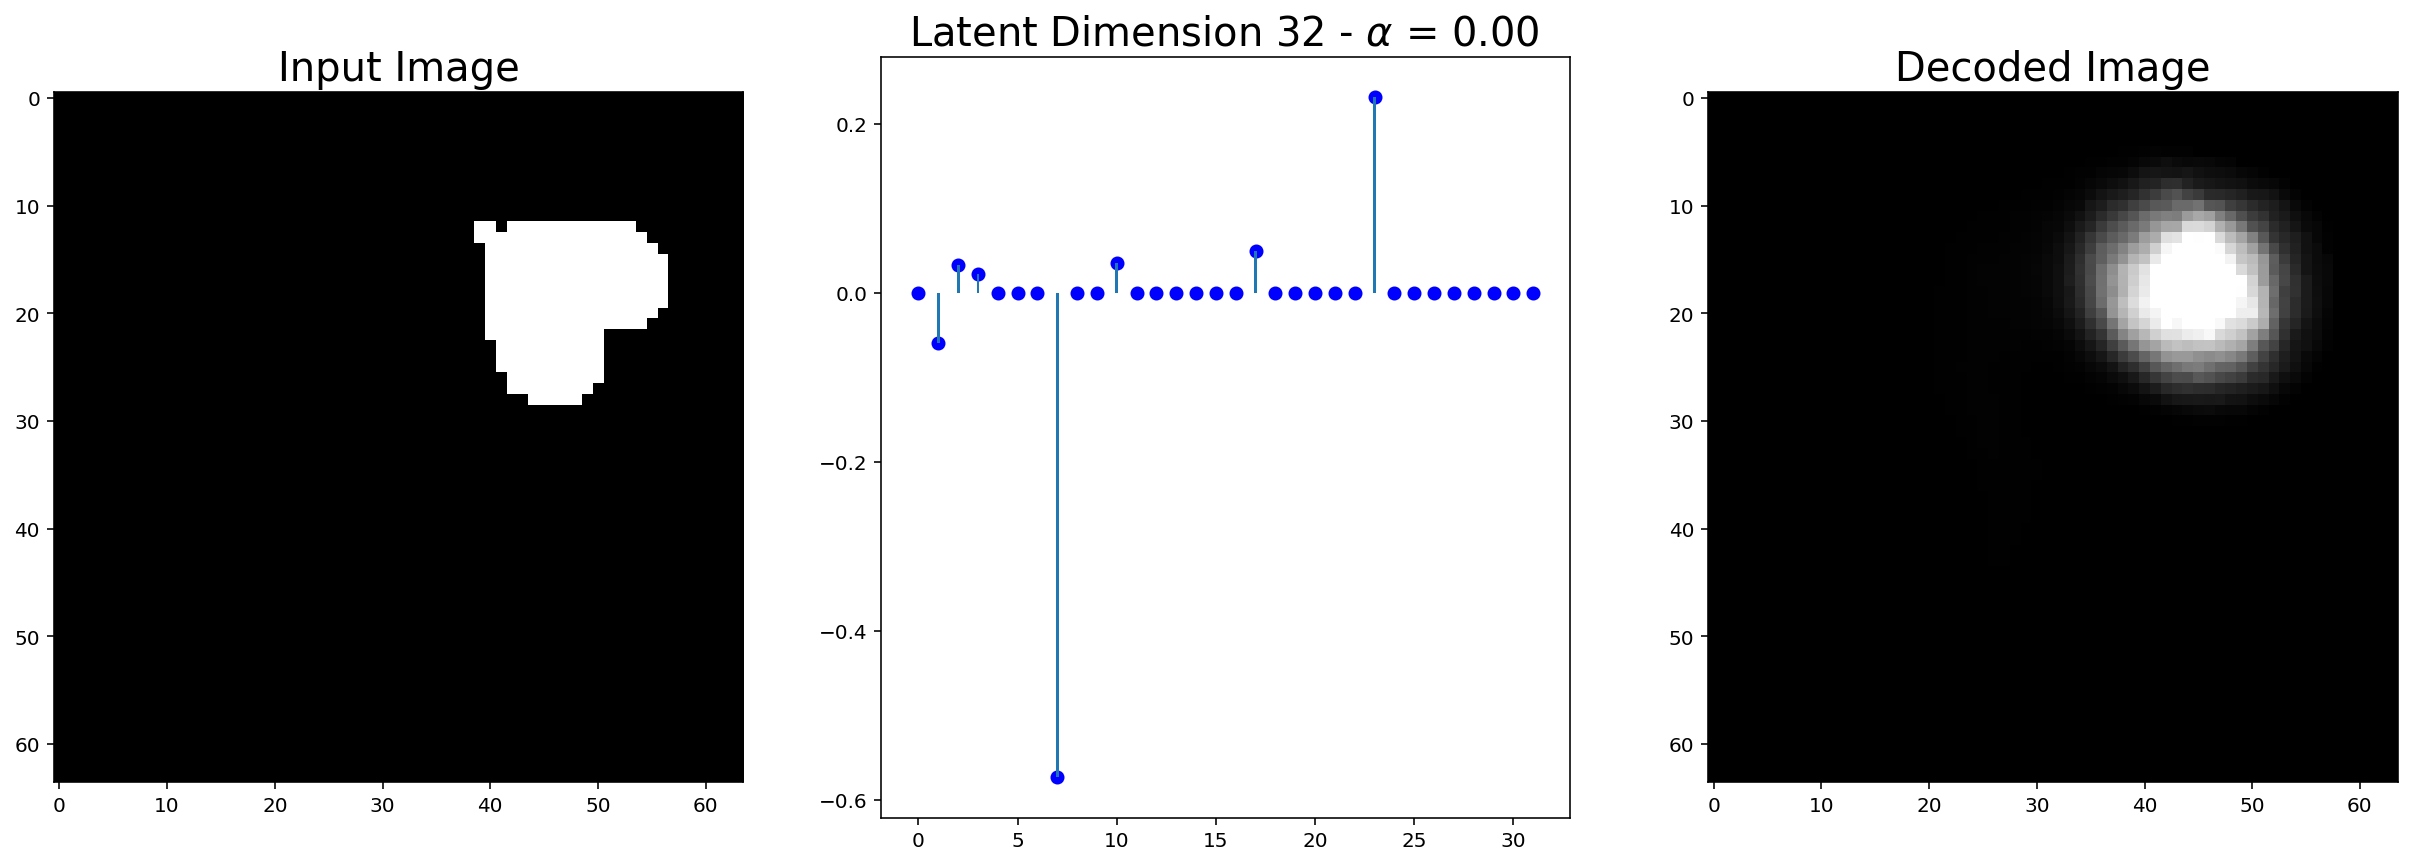

In [82]:
# 1200,1200 latent dimensions, alpha = 0.001, 32 hidden size, 30 epochs
for i in range(10):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

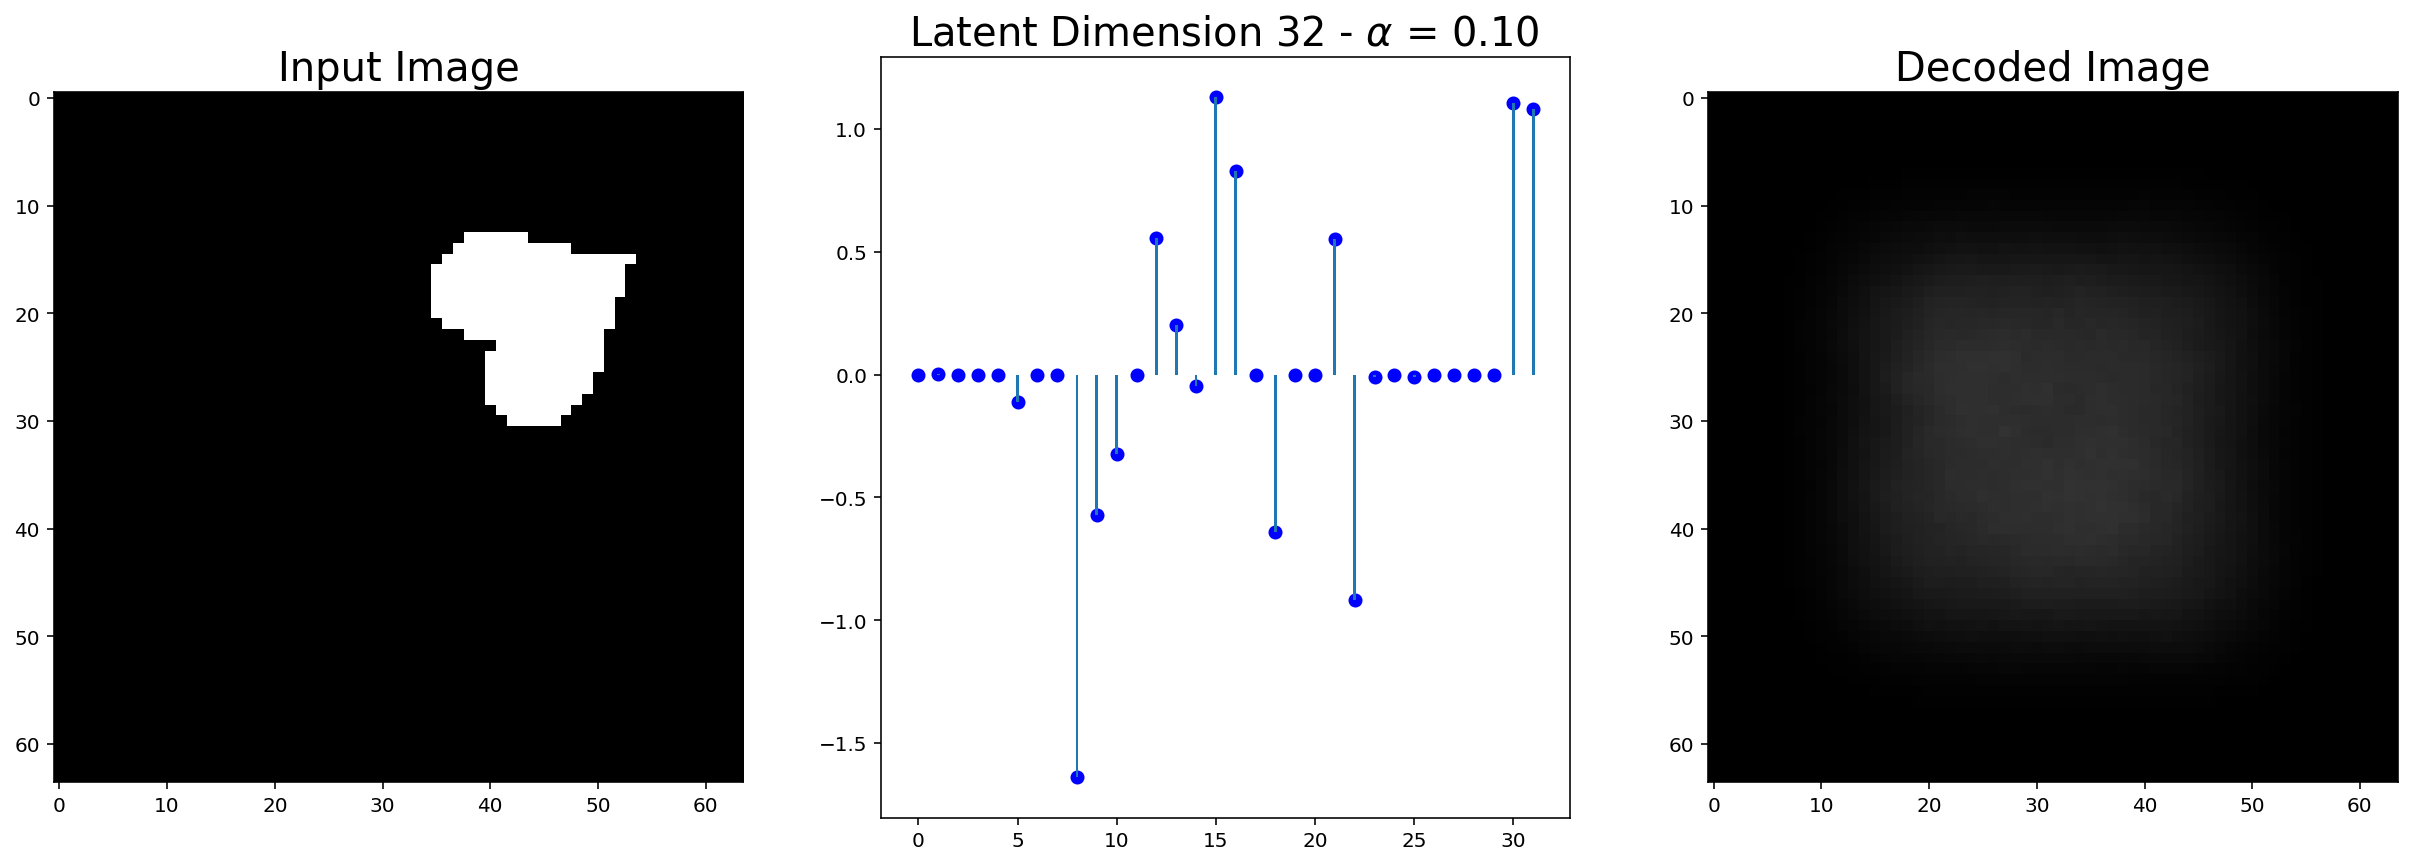

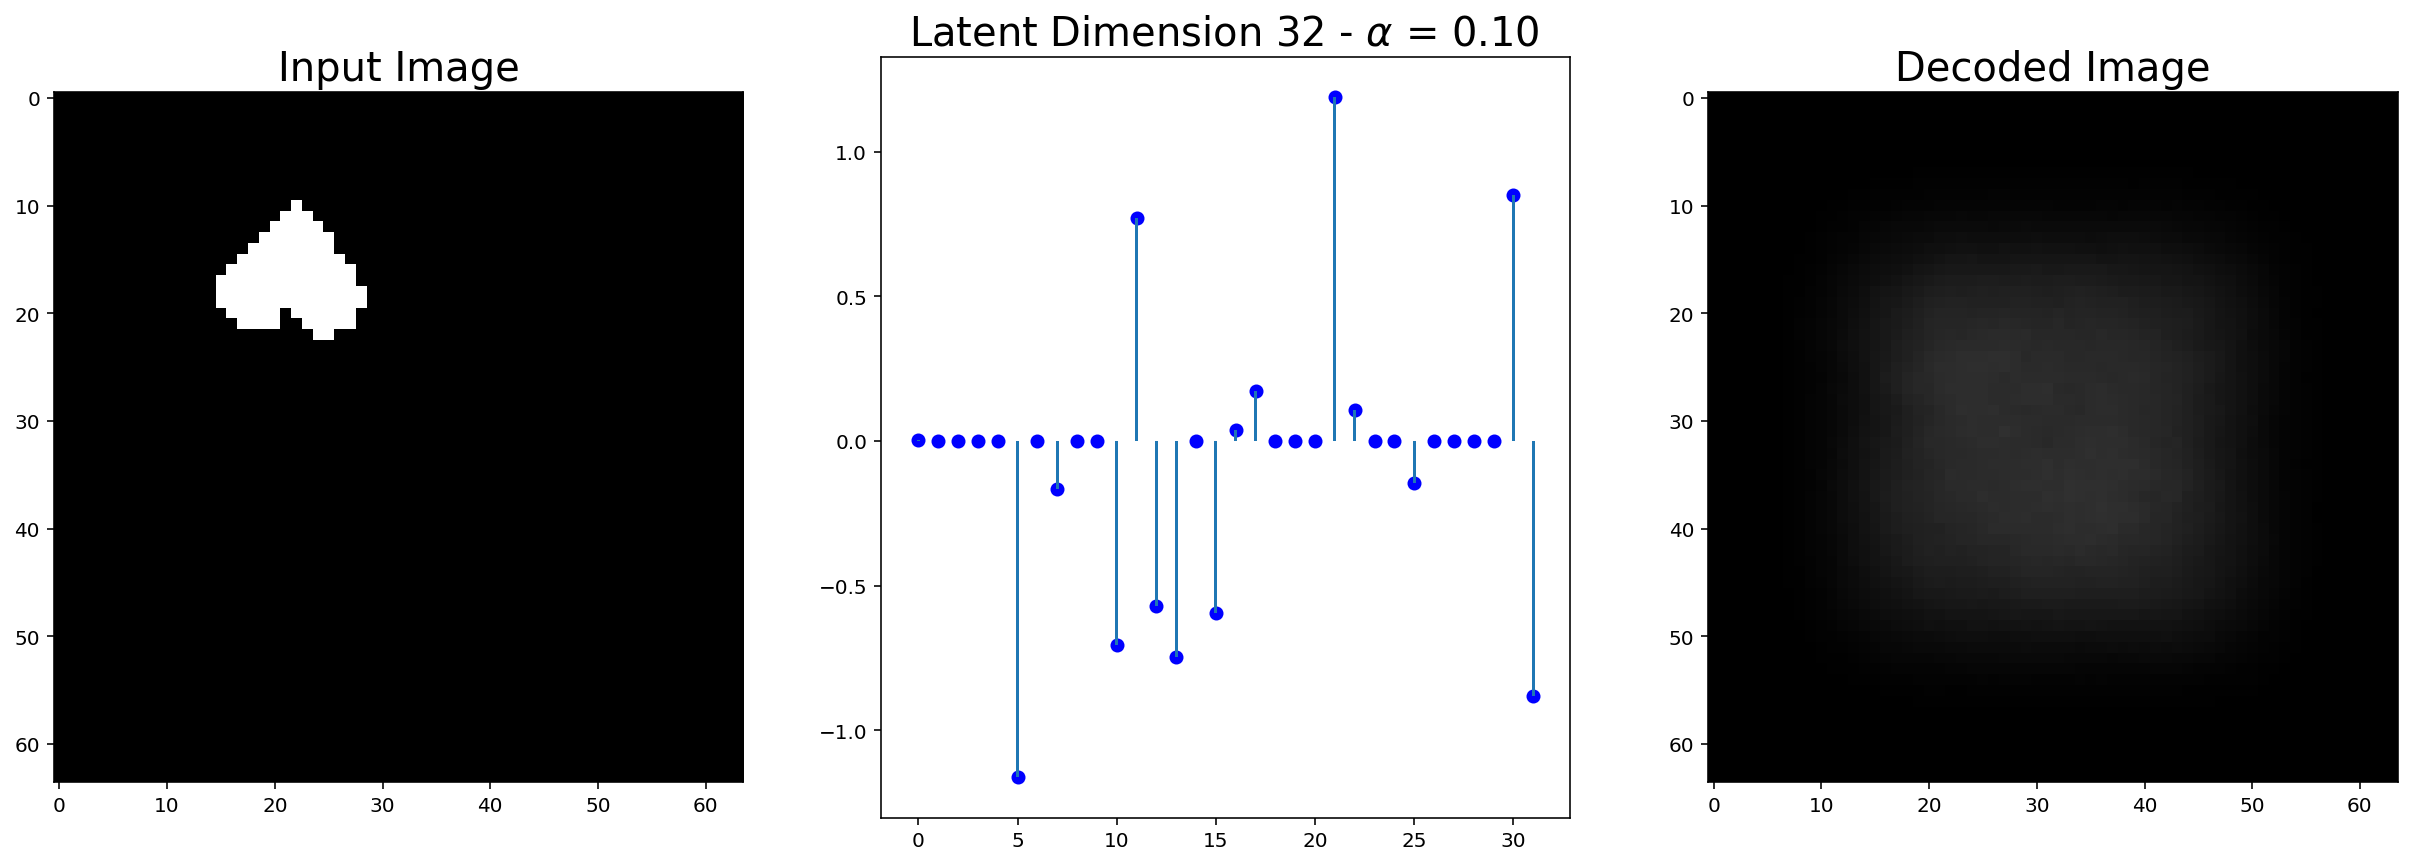

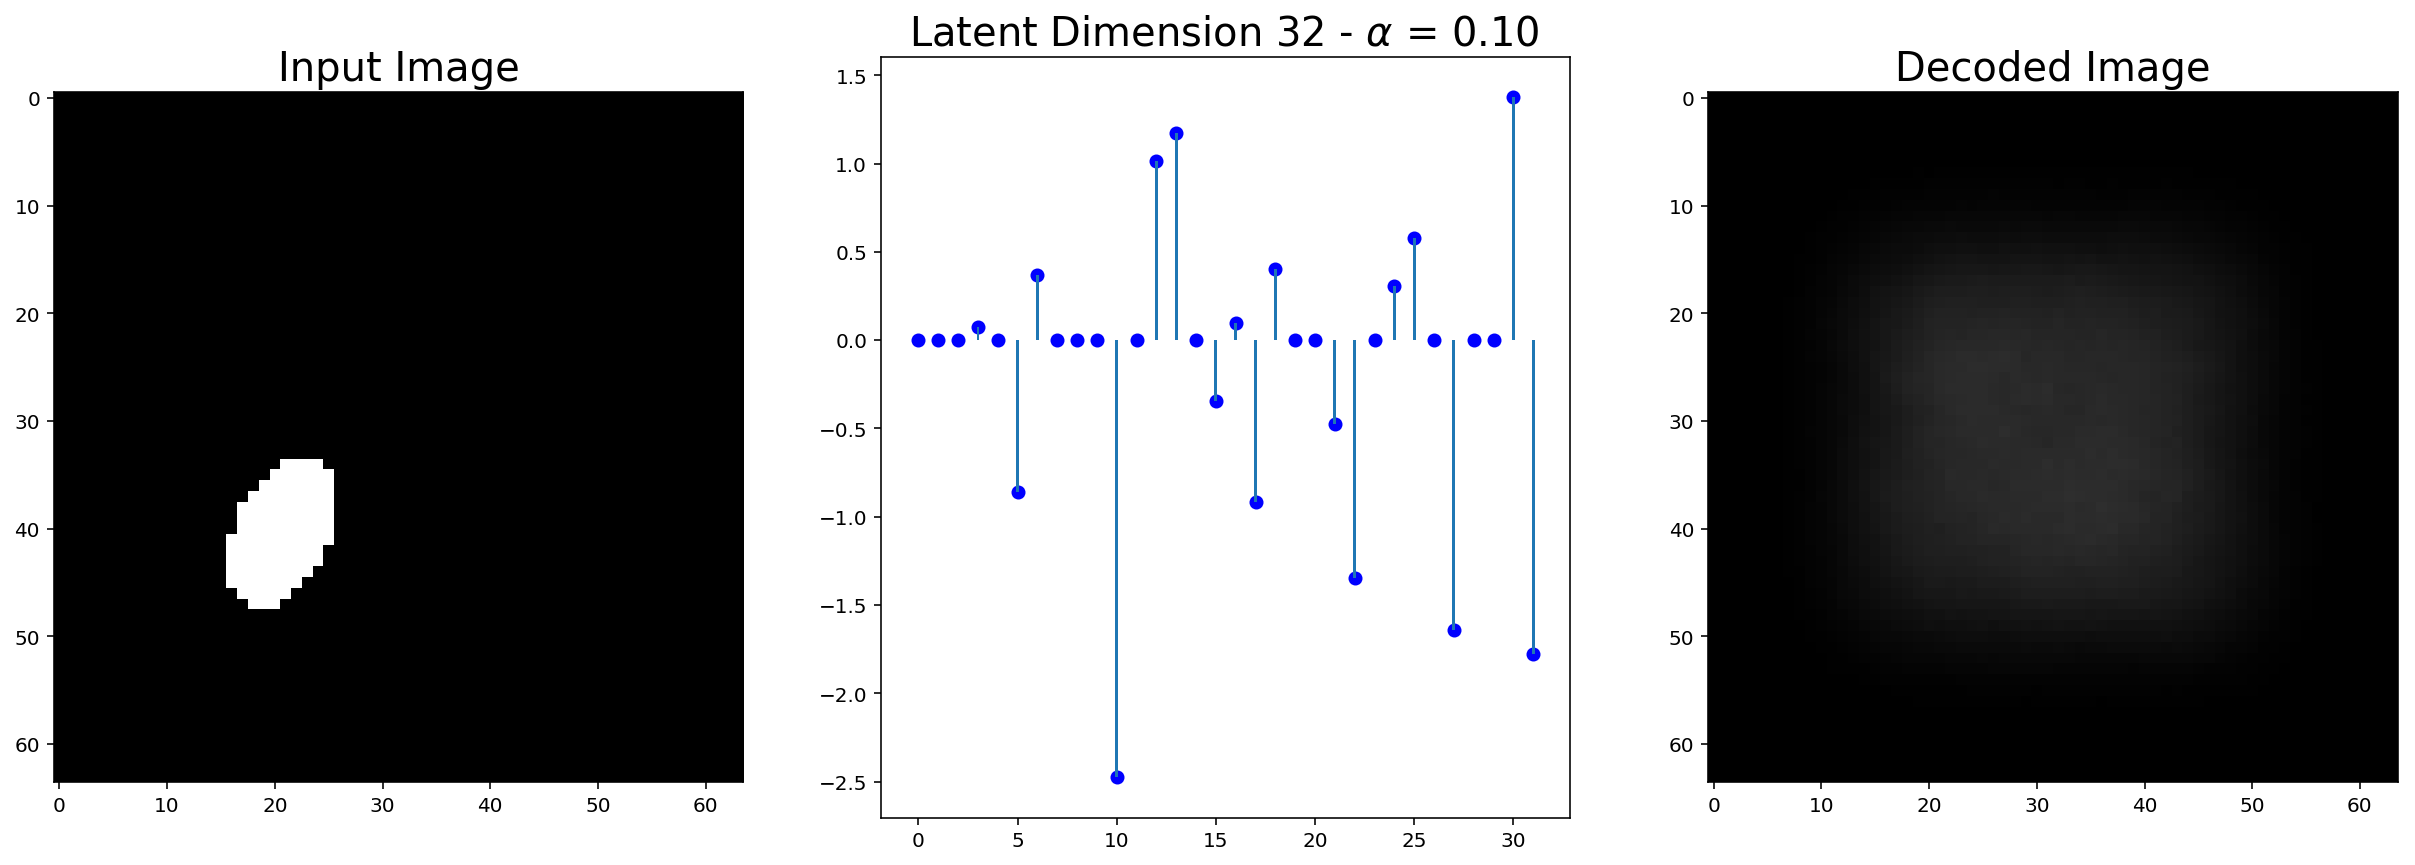

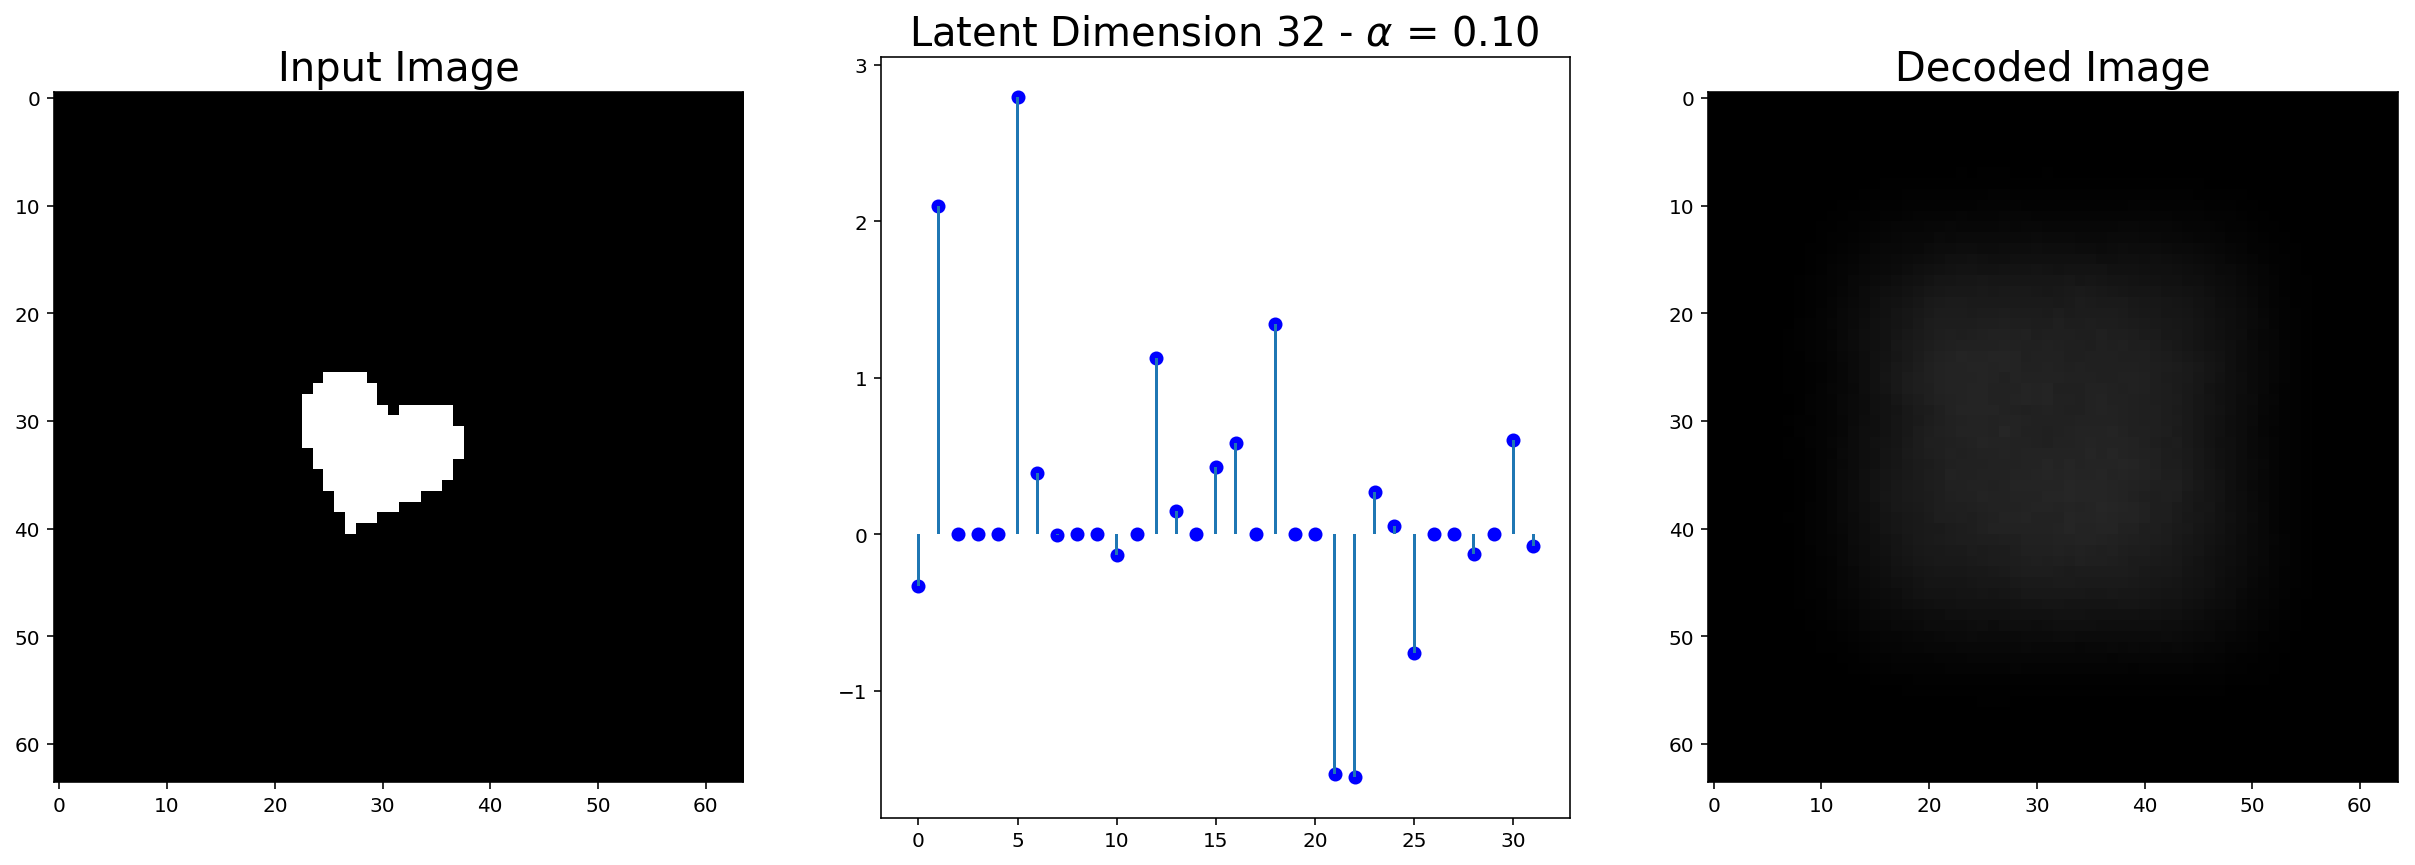

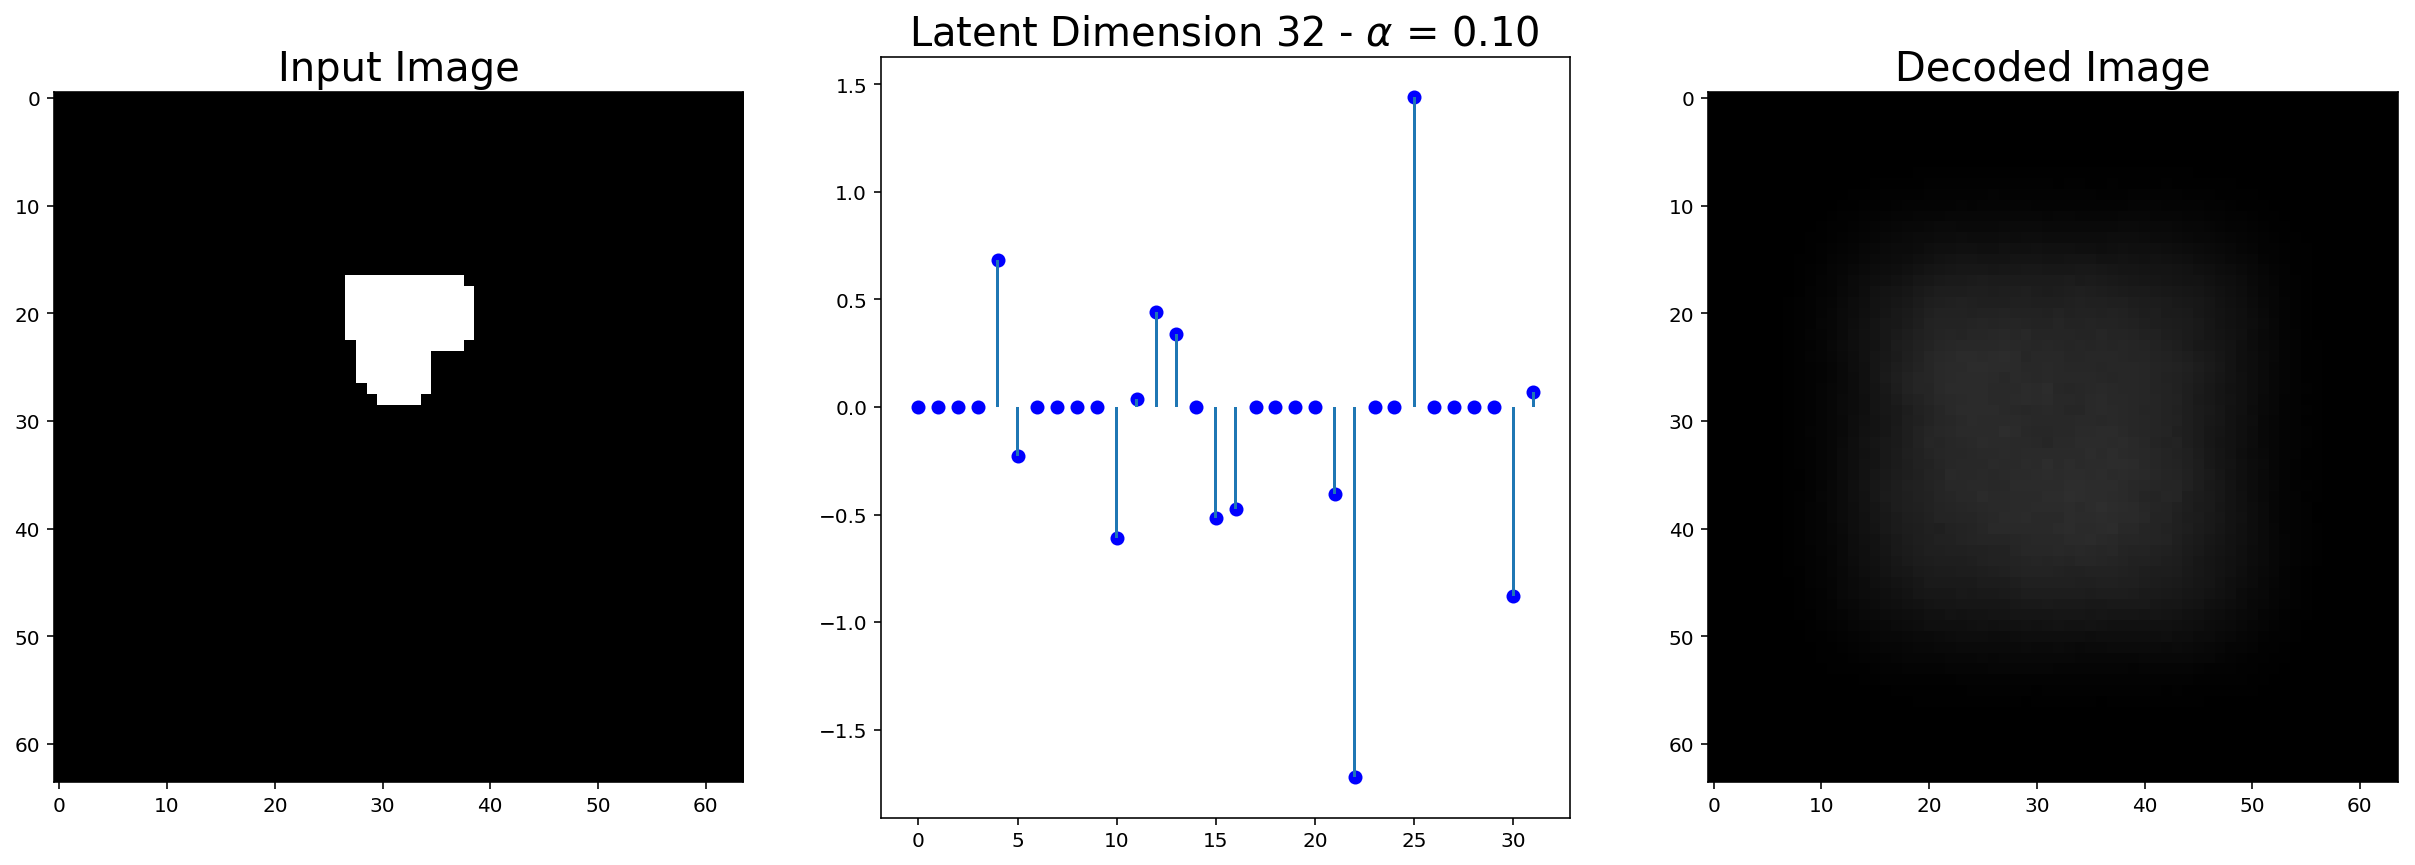

In [78]:
# 1200,1200 latent dimensions, alpha = 0.1, 32 hidden size, 30 epochs
for i in range(5):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

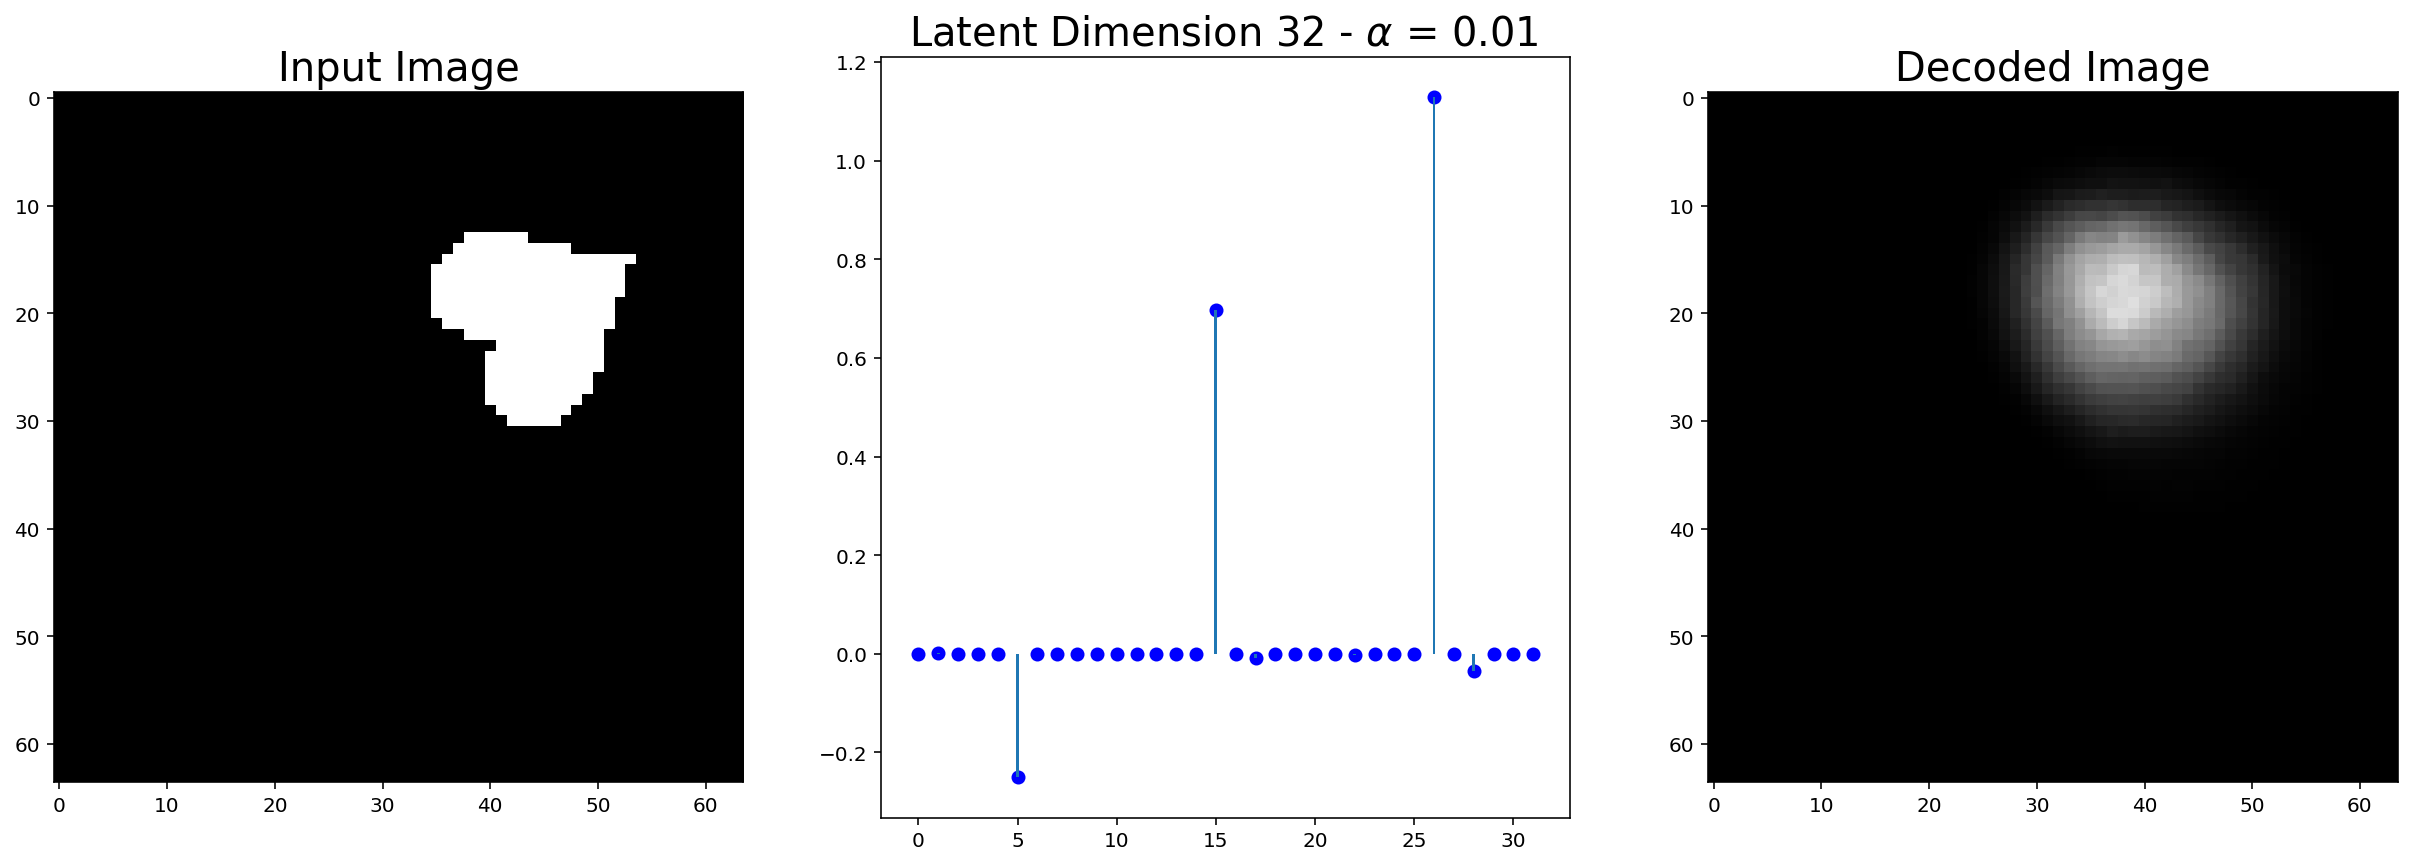

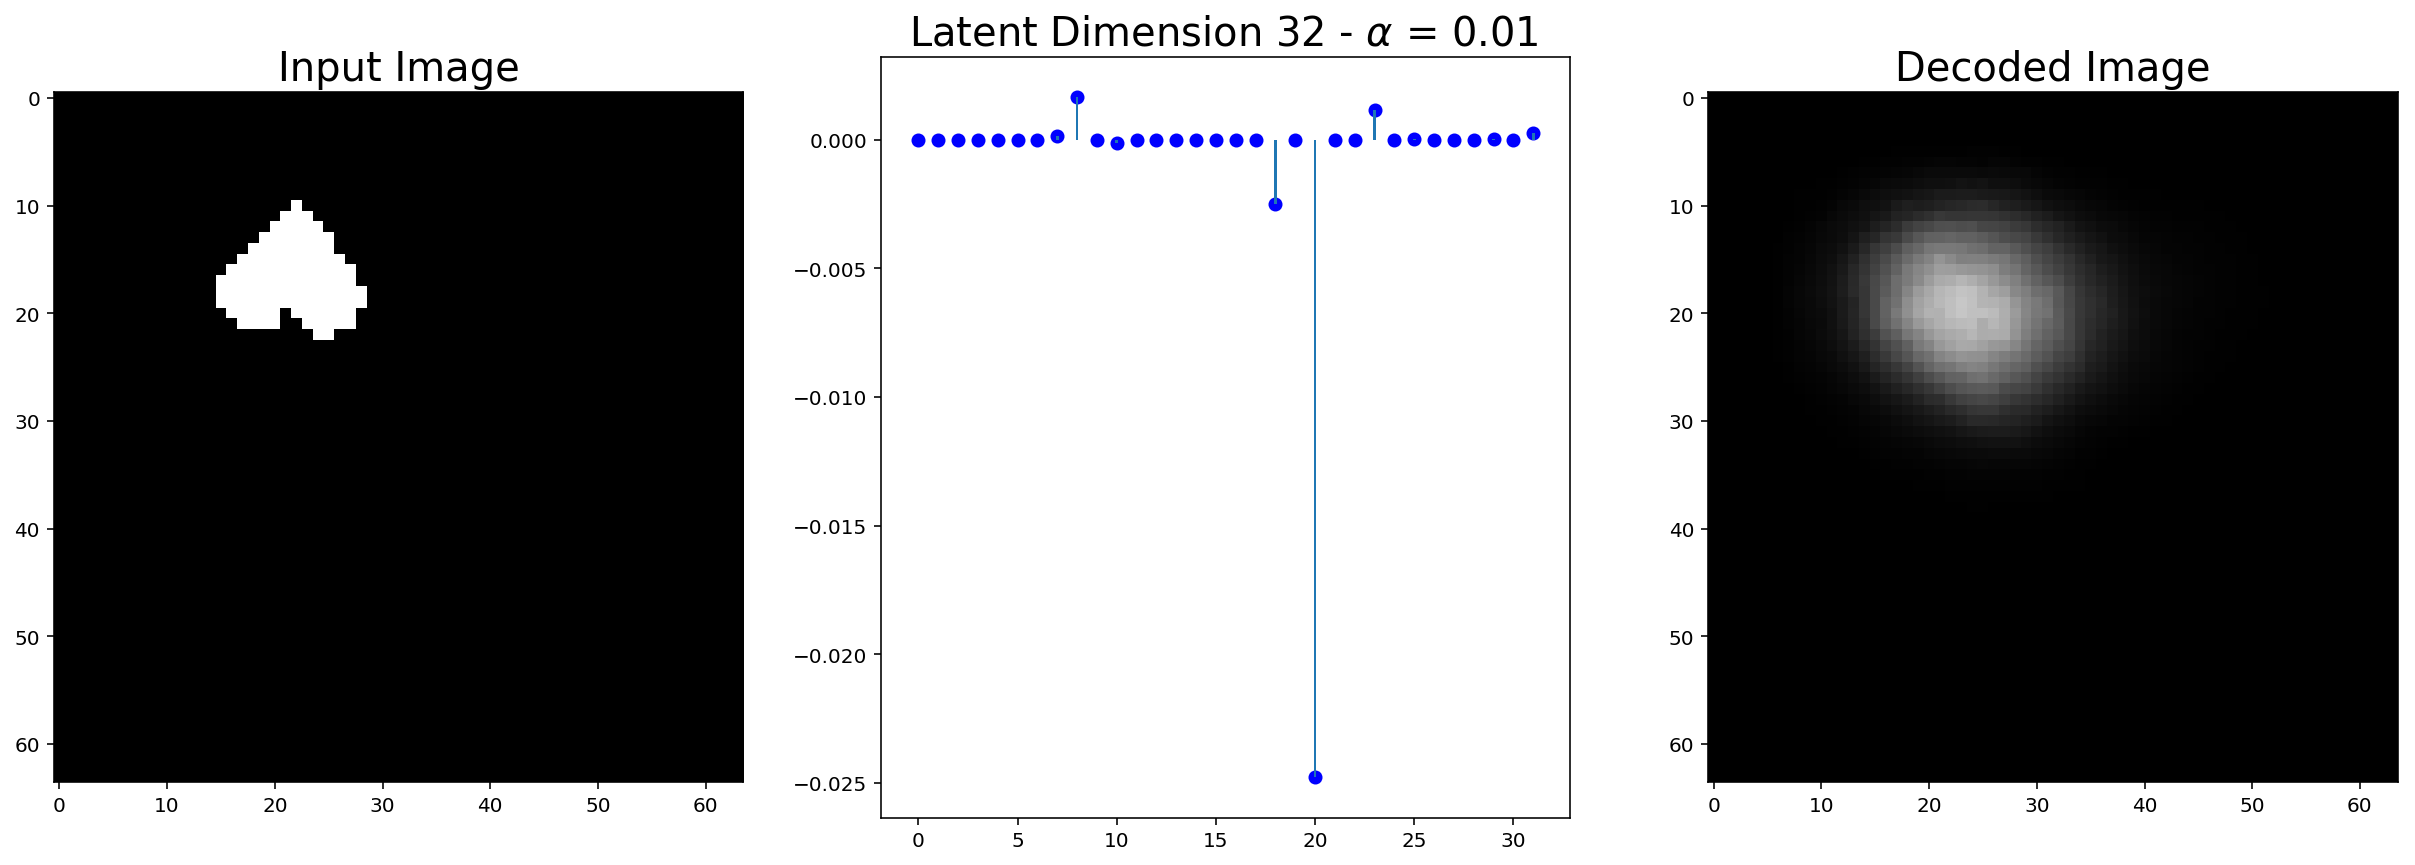

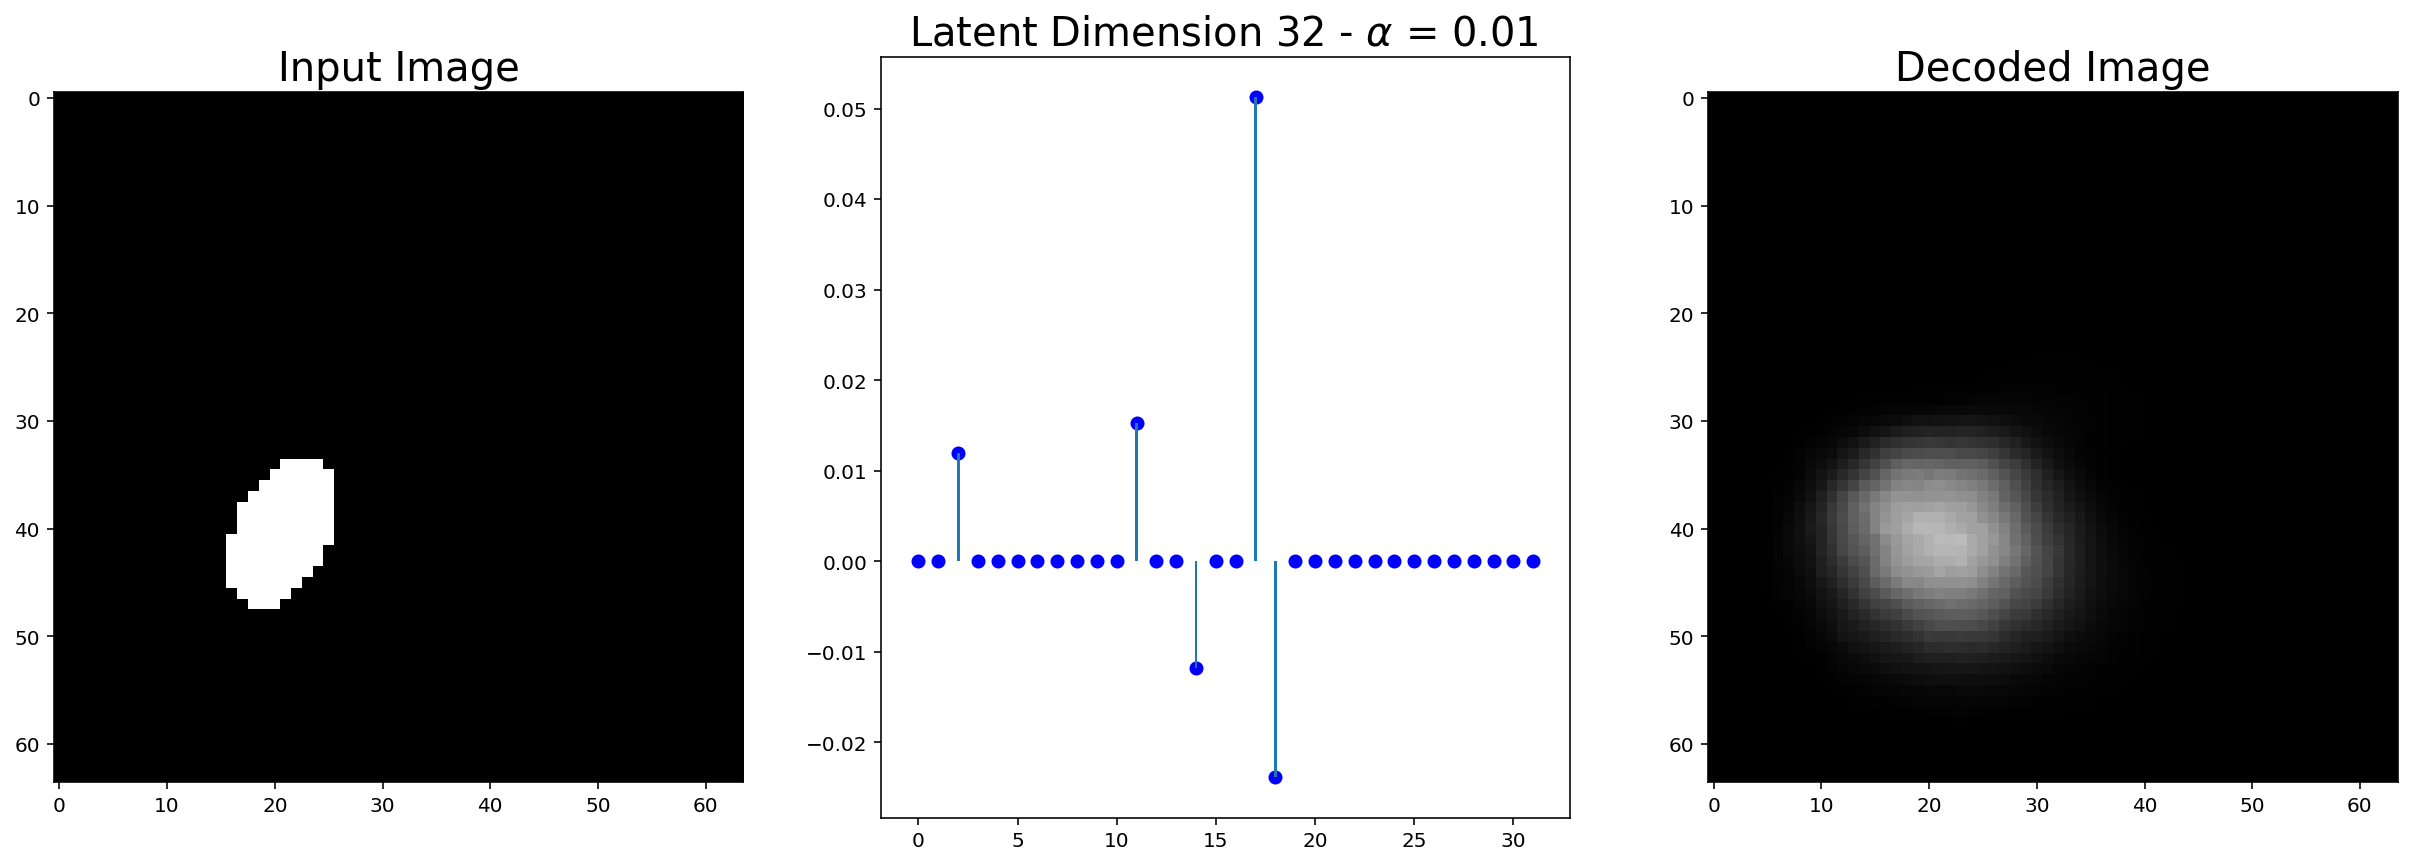

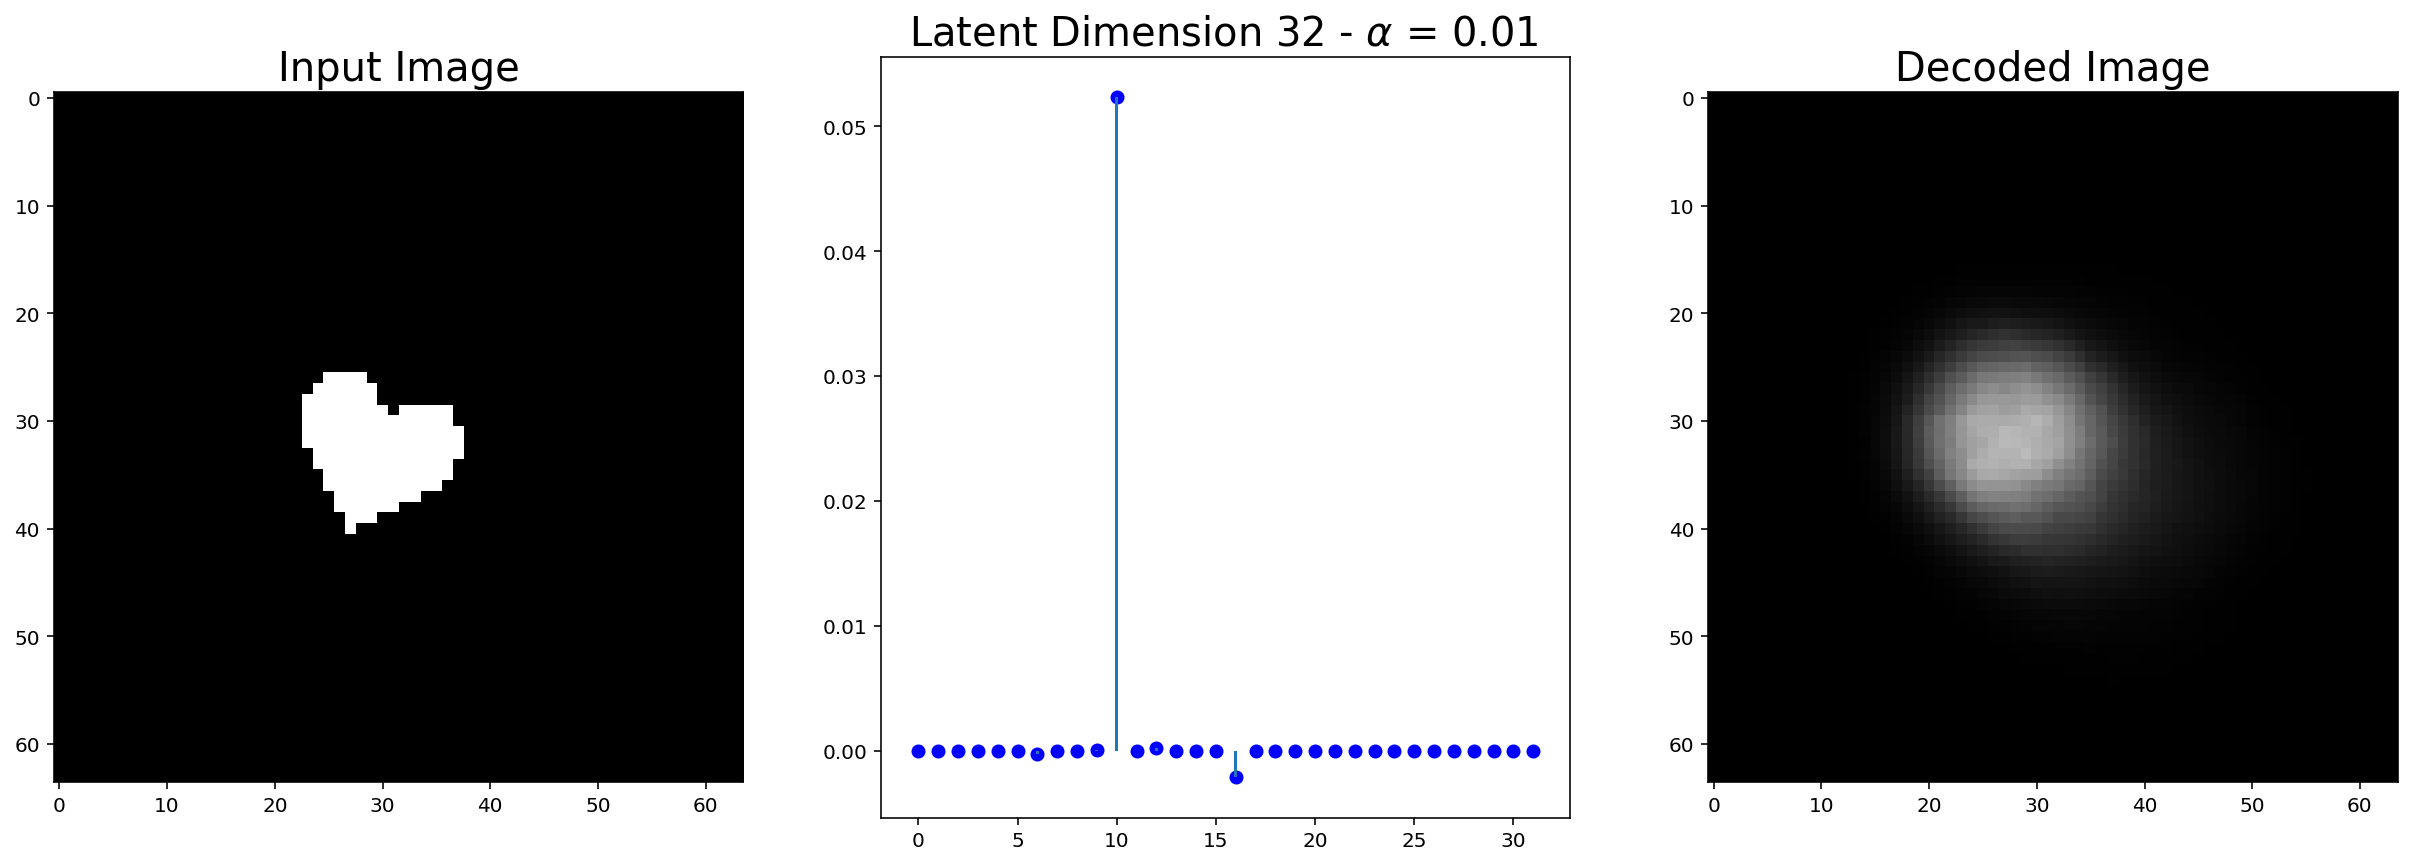

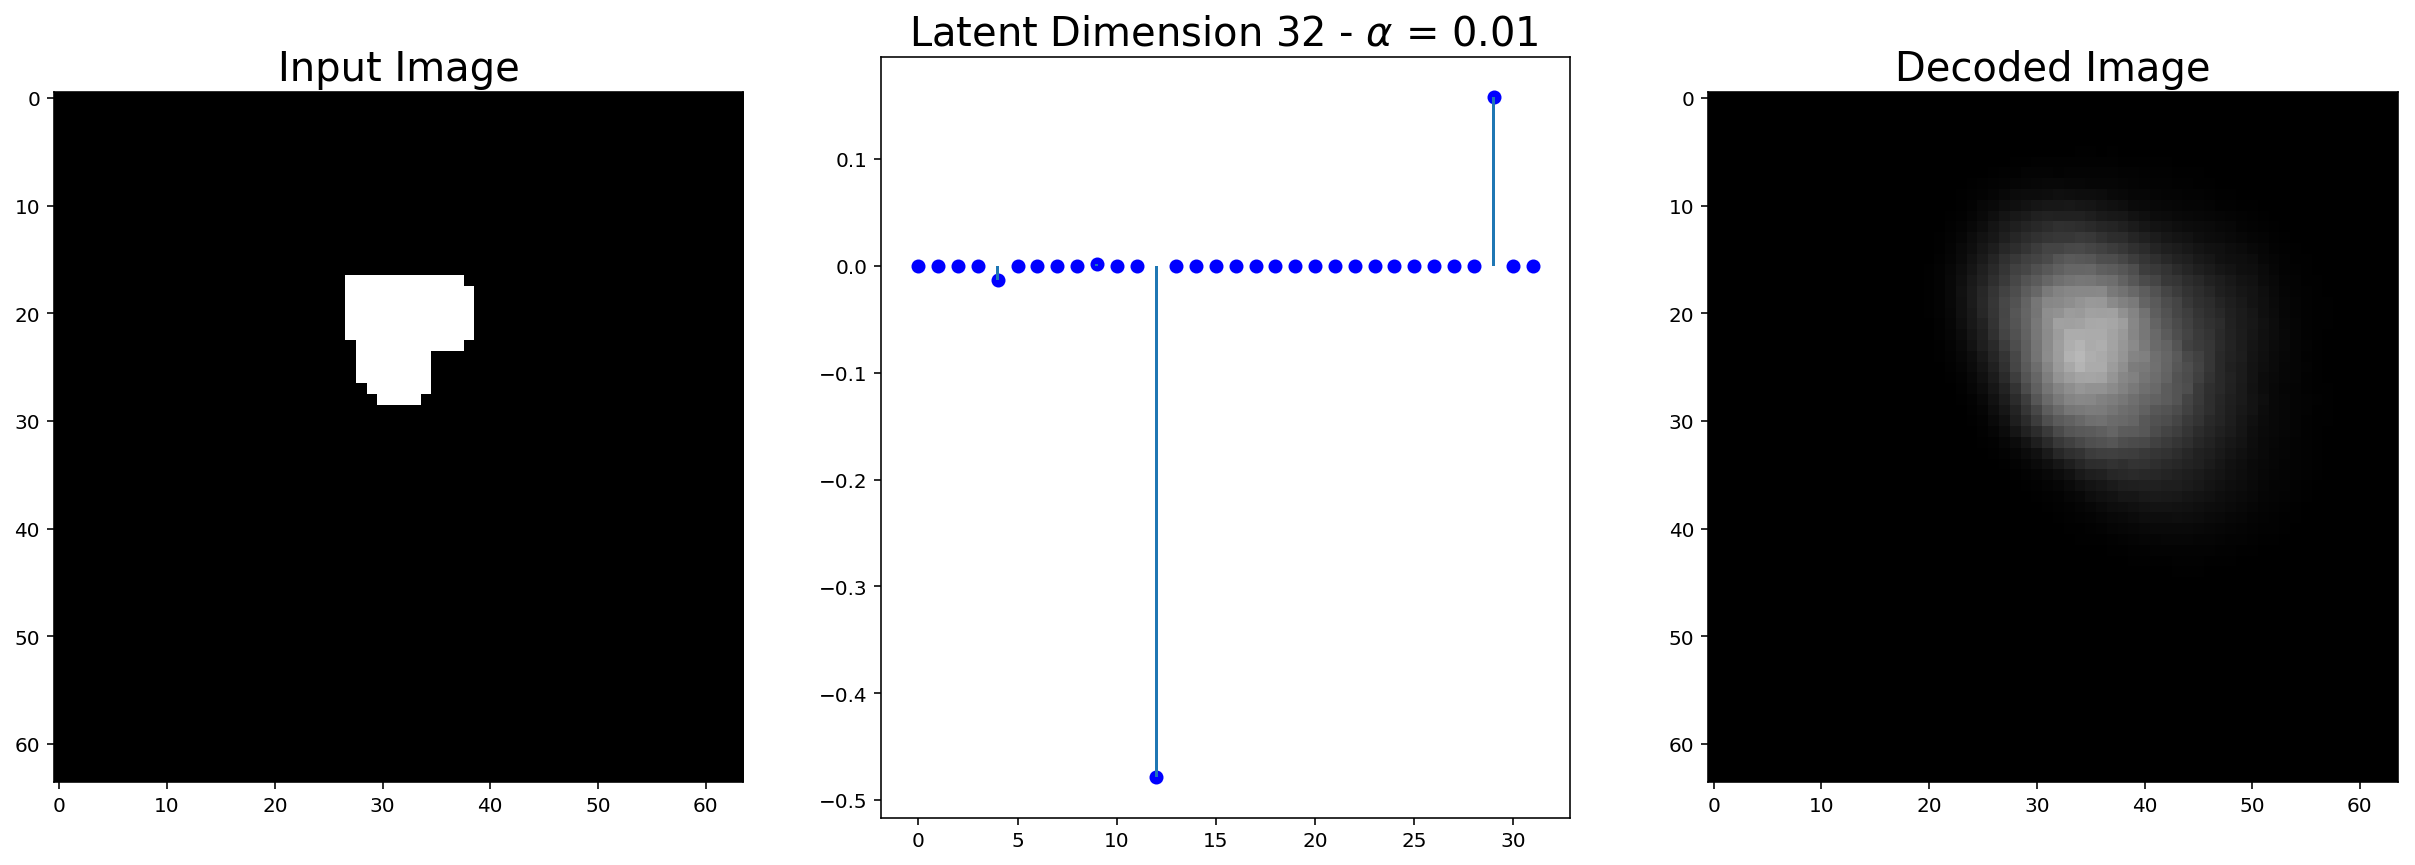

In [52]:
# 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 30 epochs
for i in range(5):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


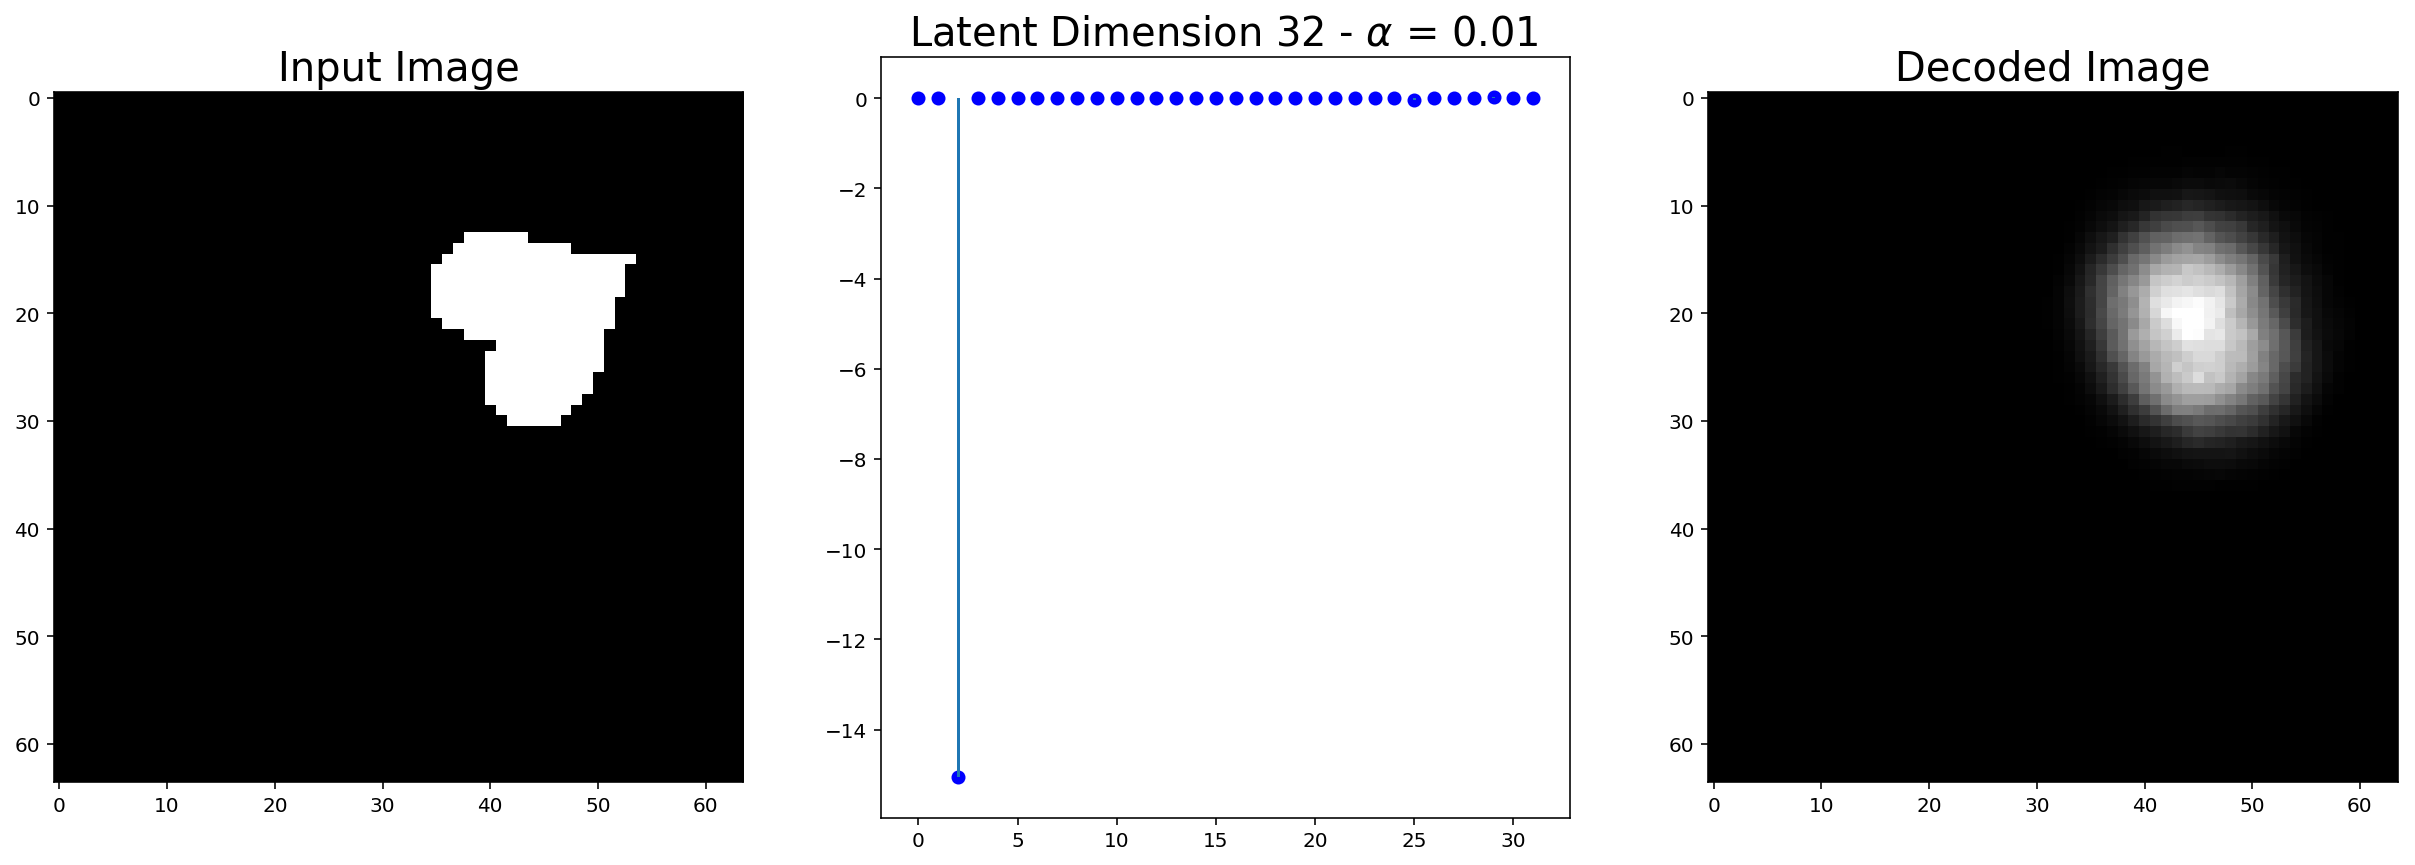

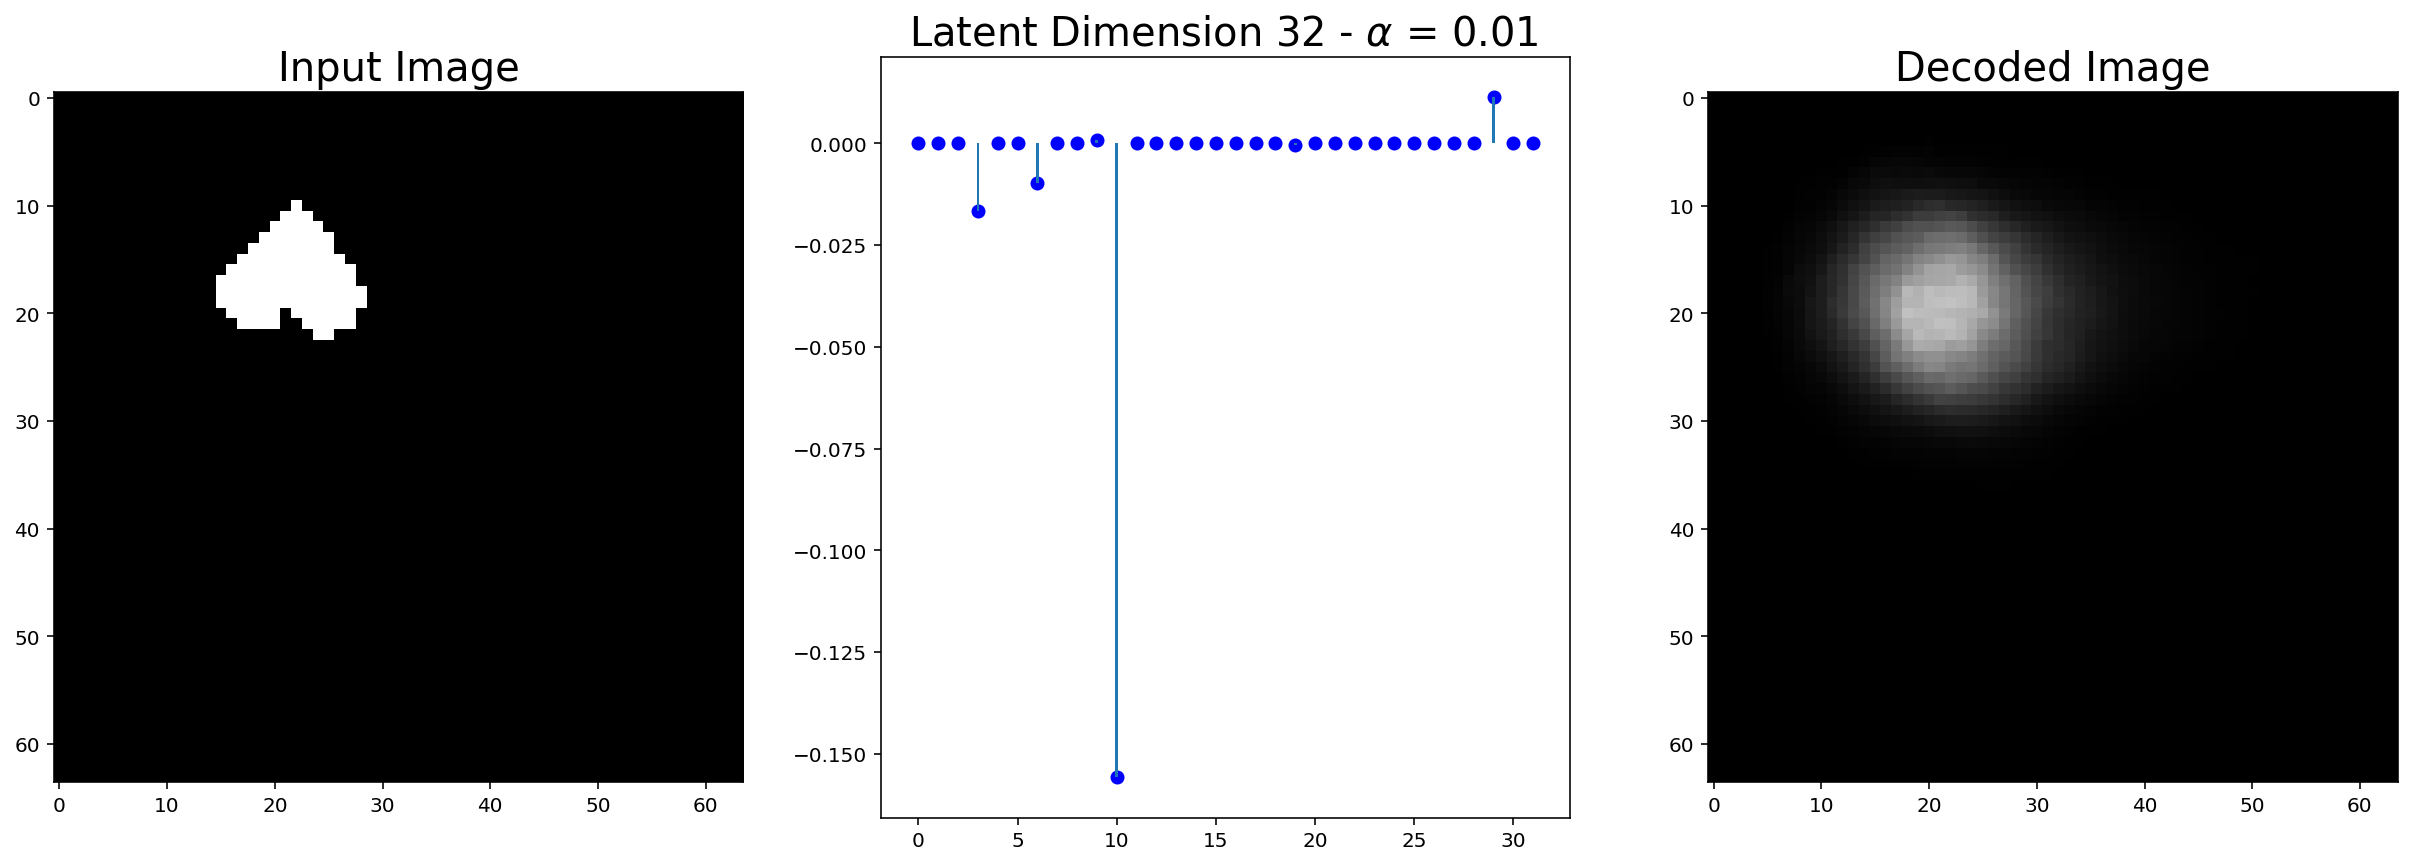

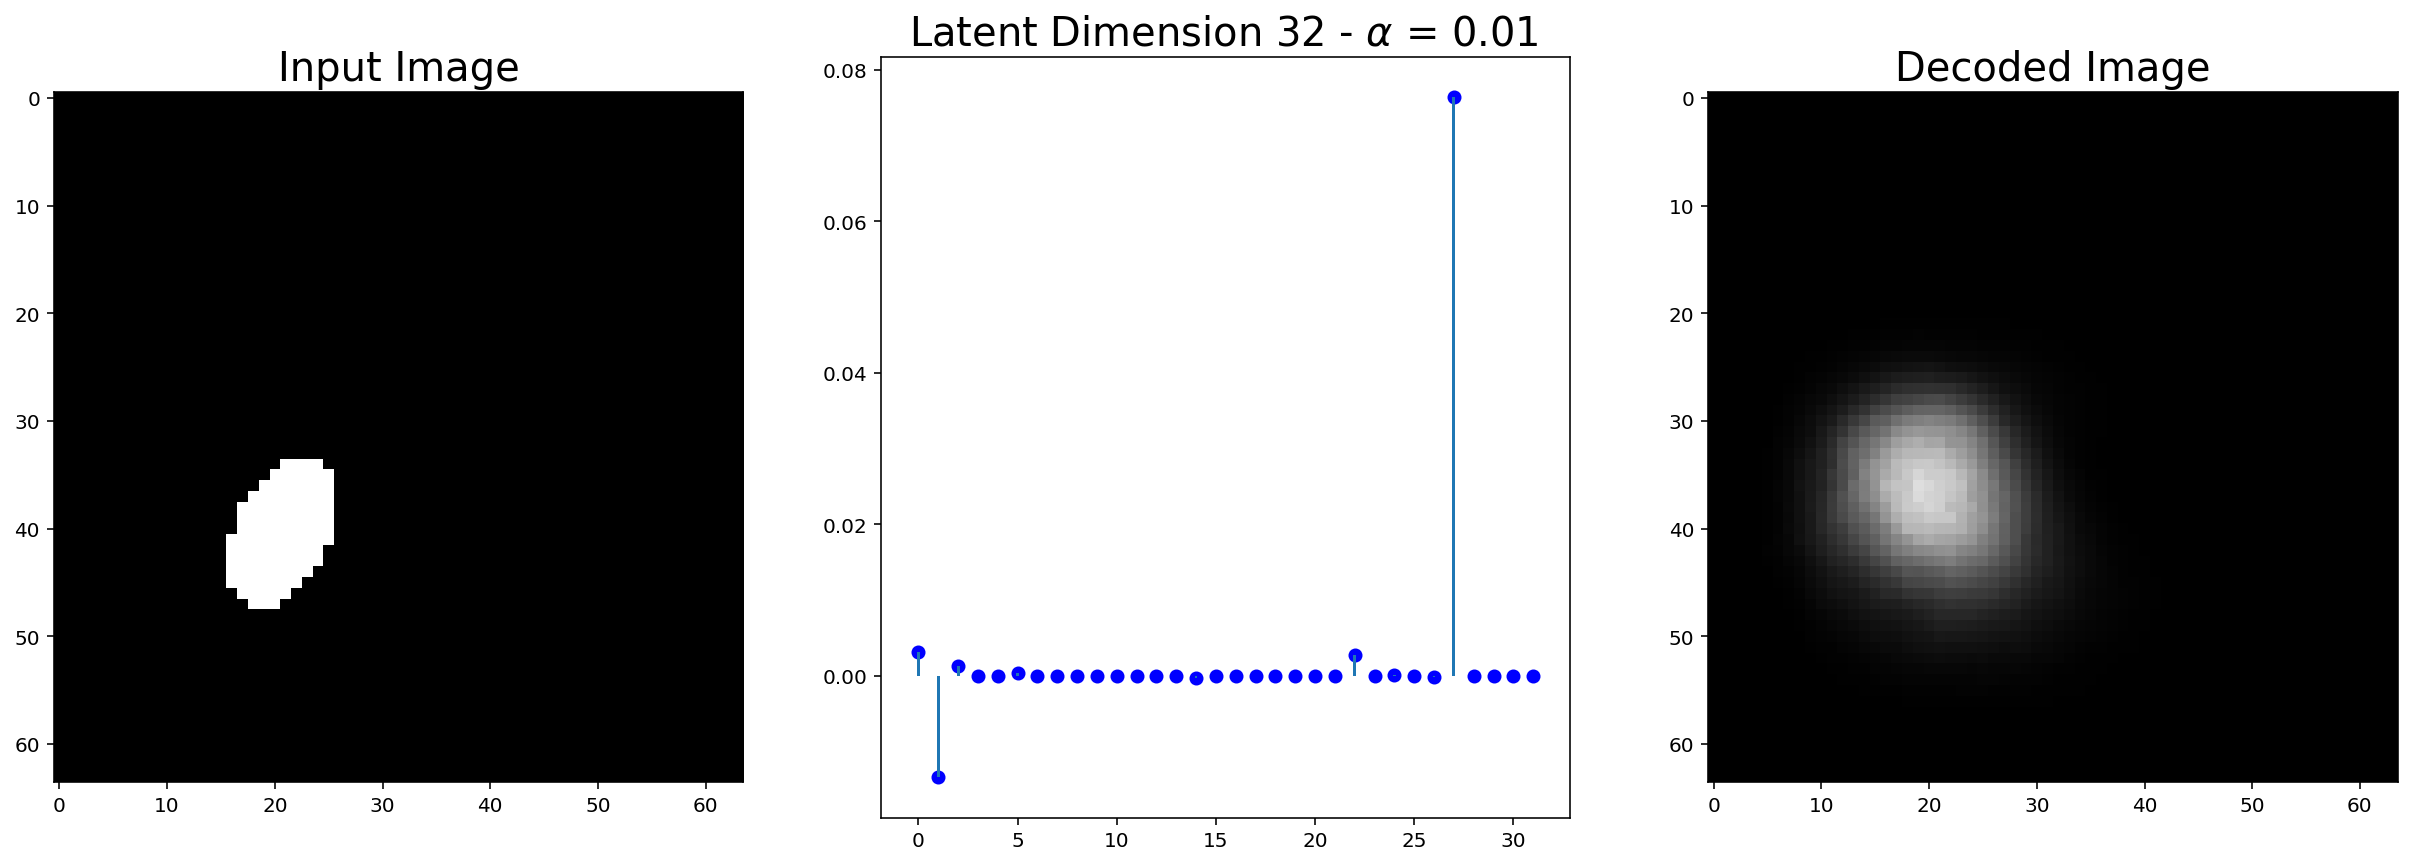

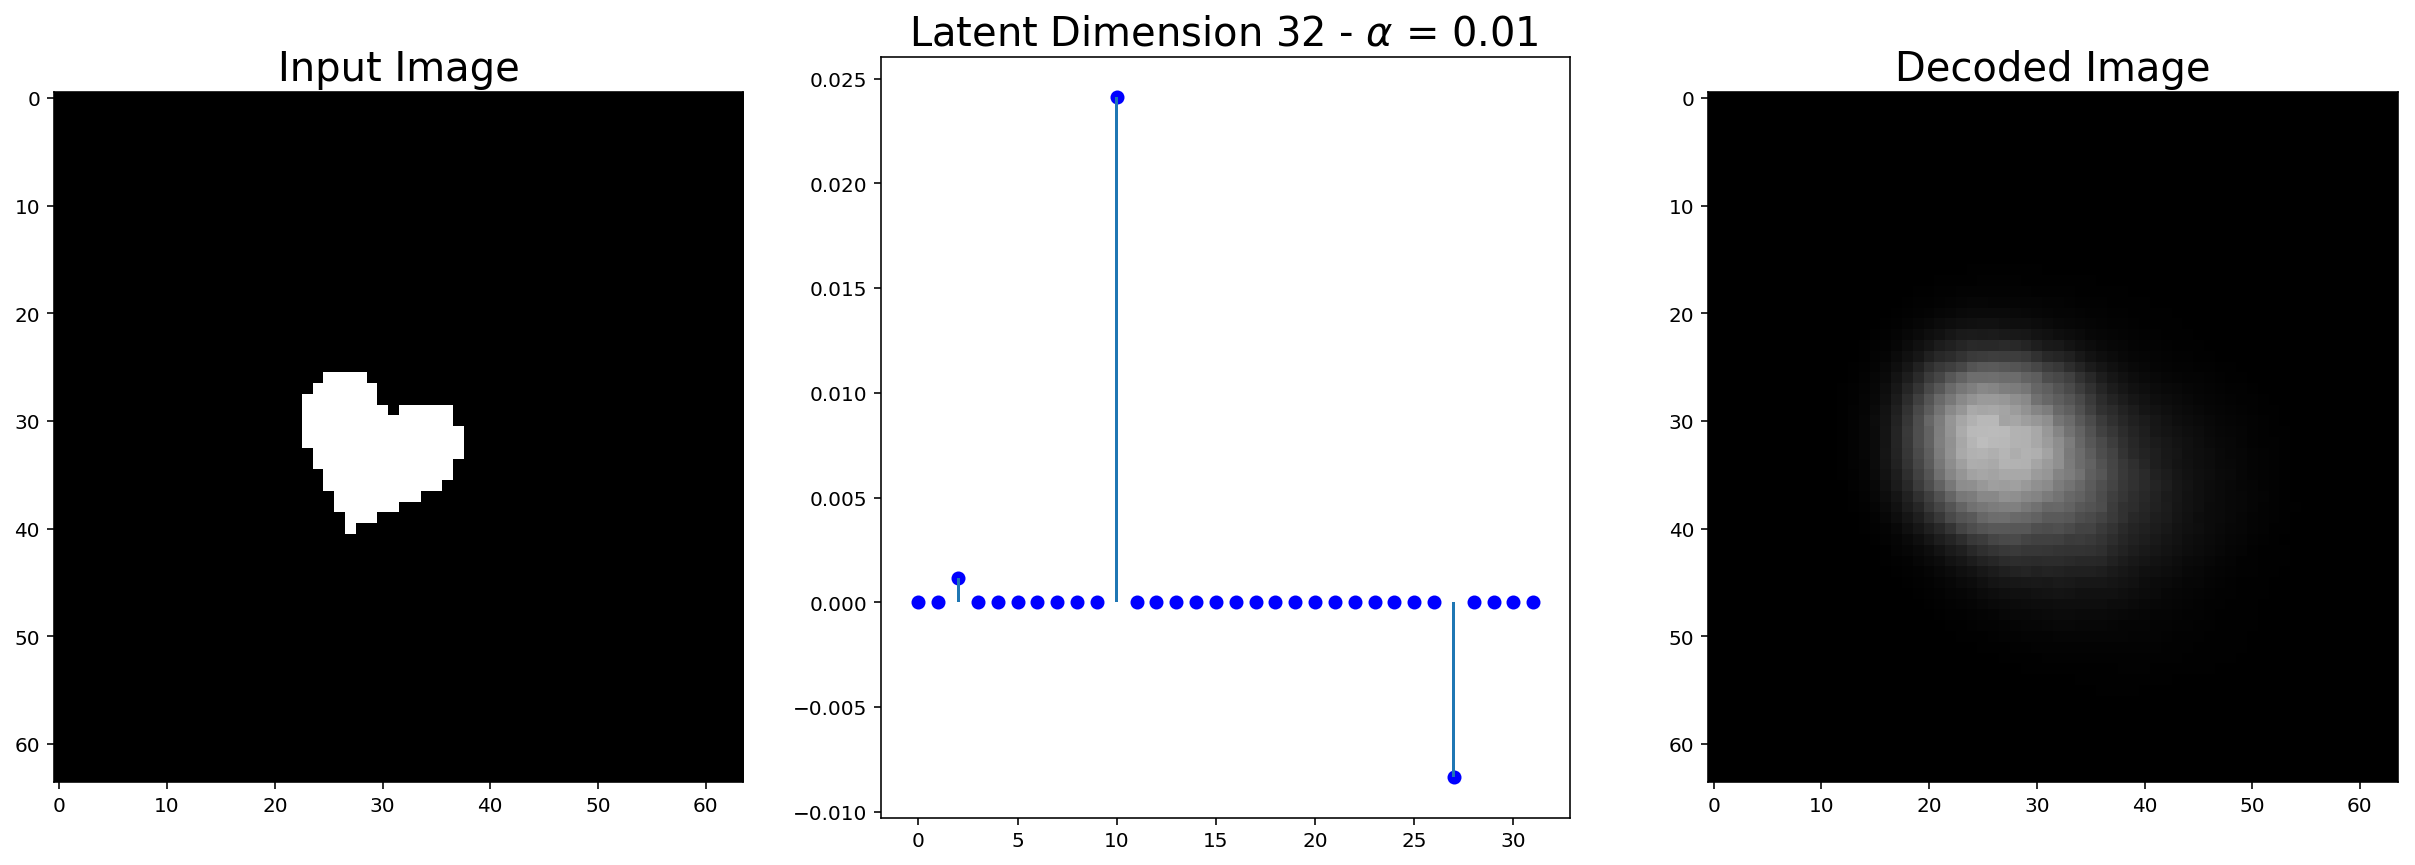

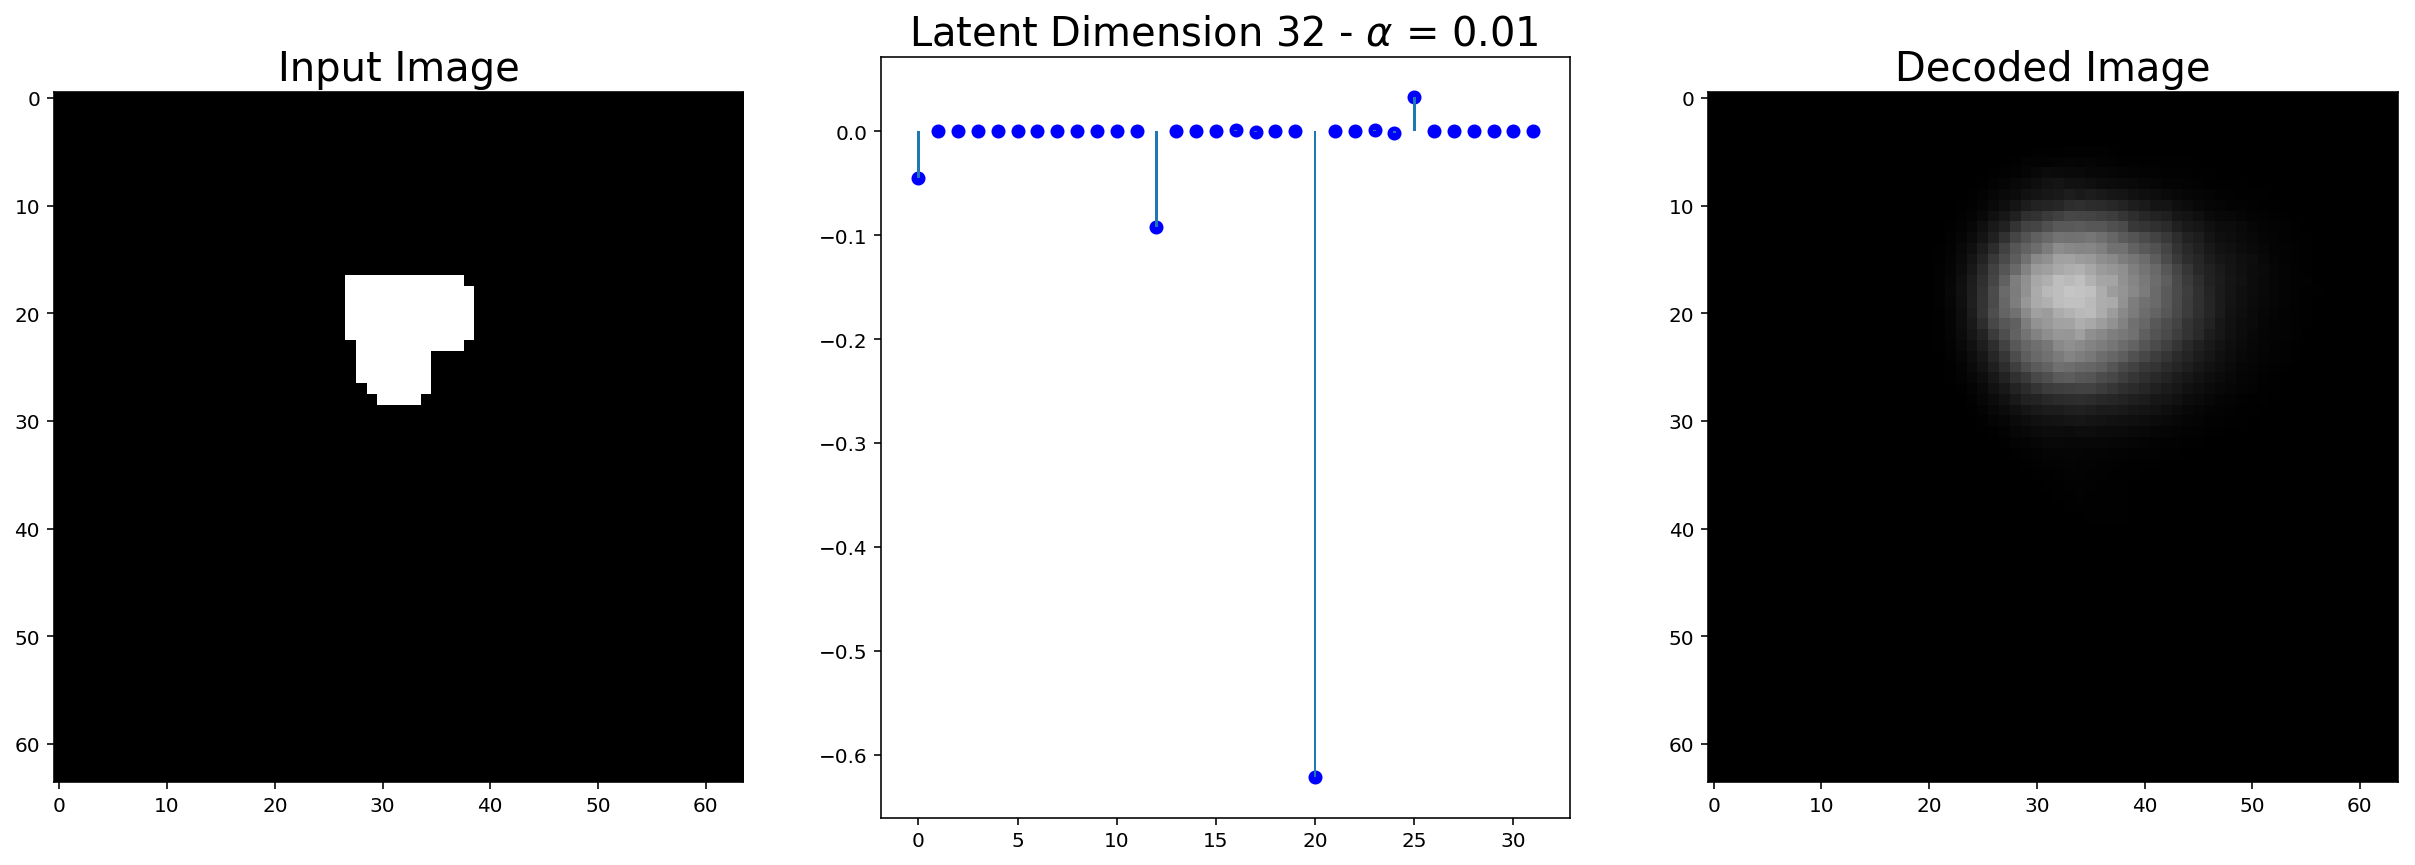

In [19]:
# 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 20 epochs
for i in range(5):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


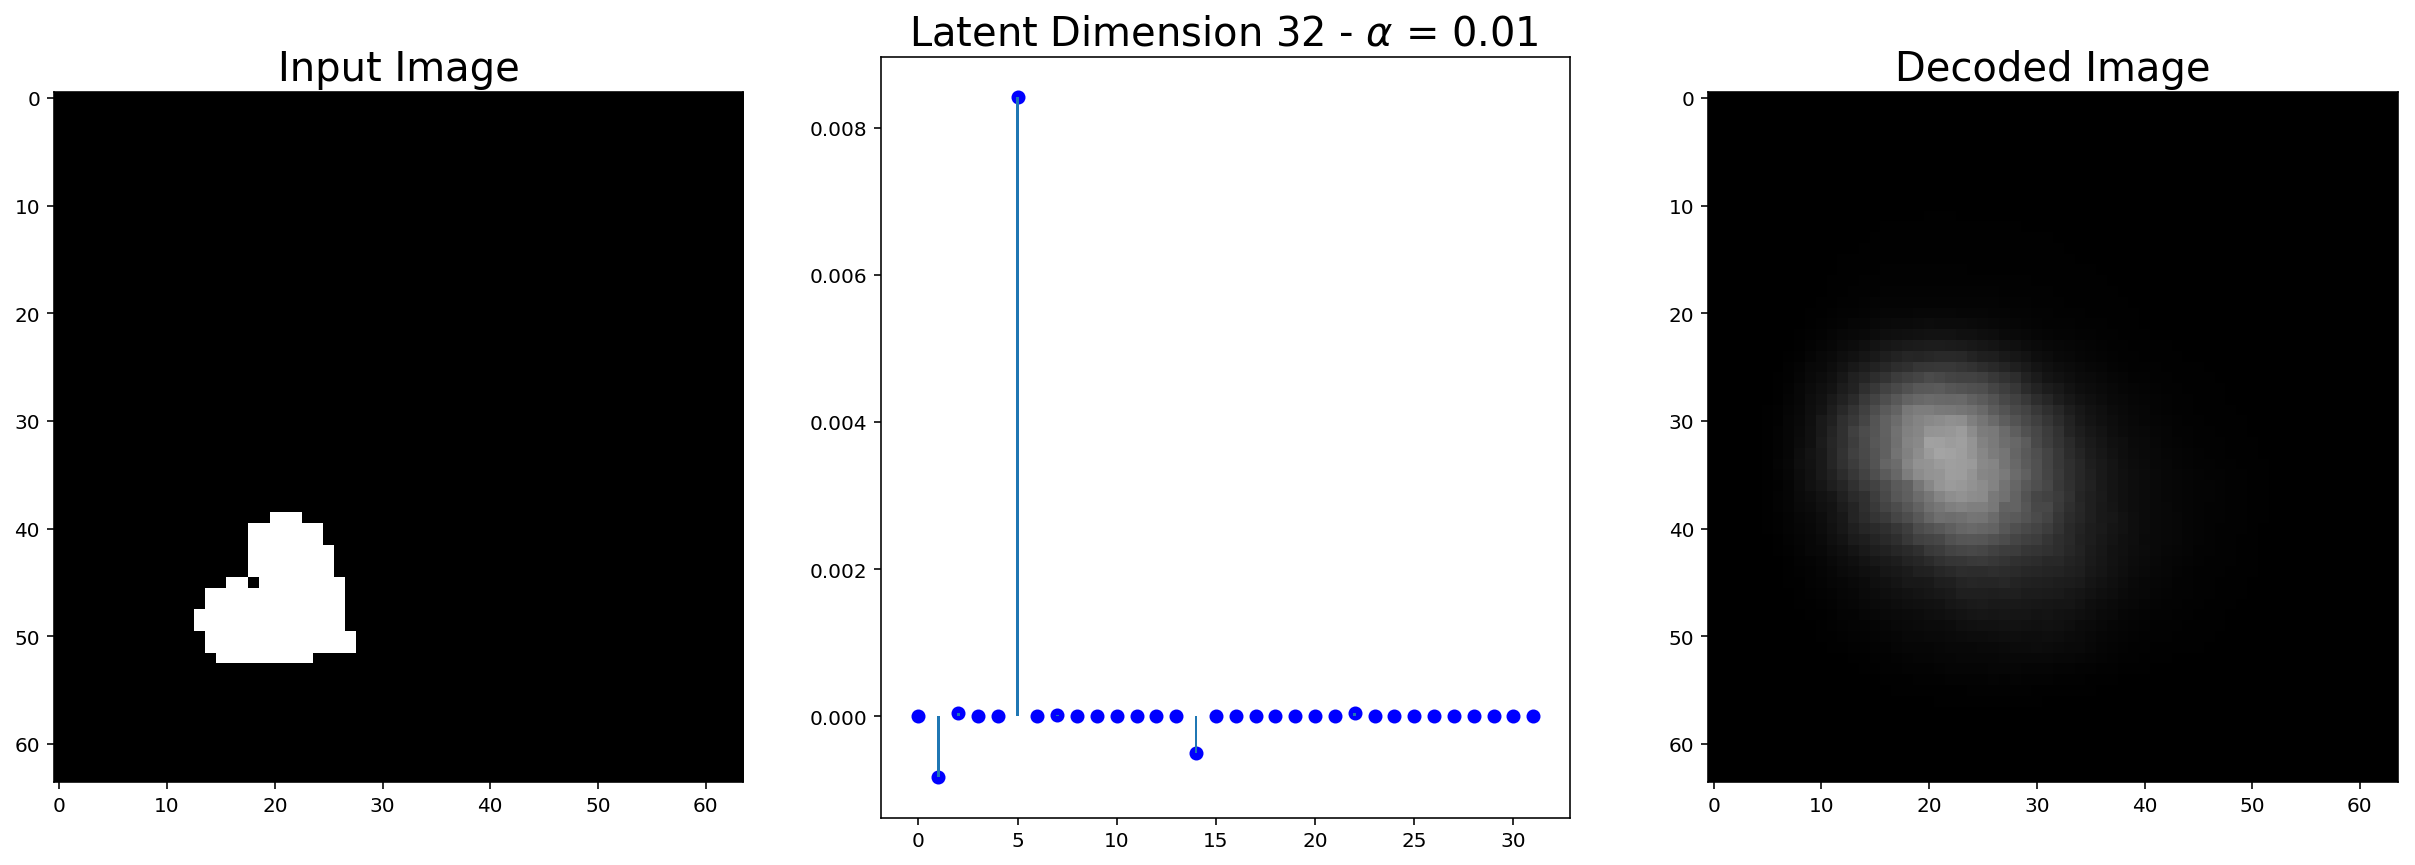

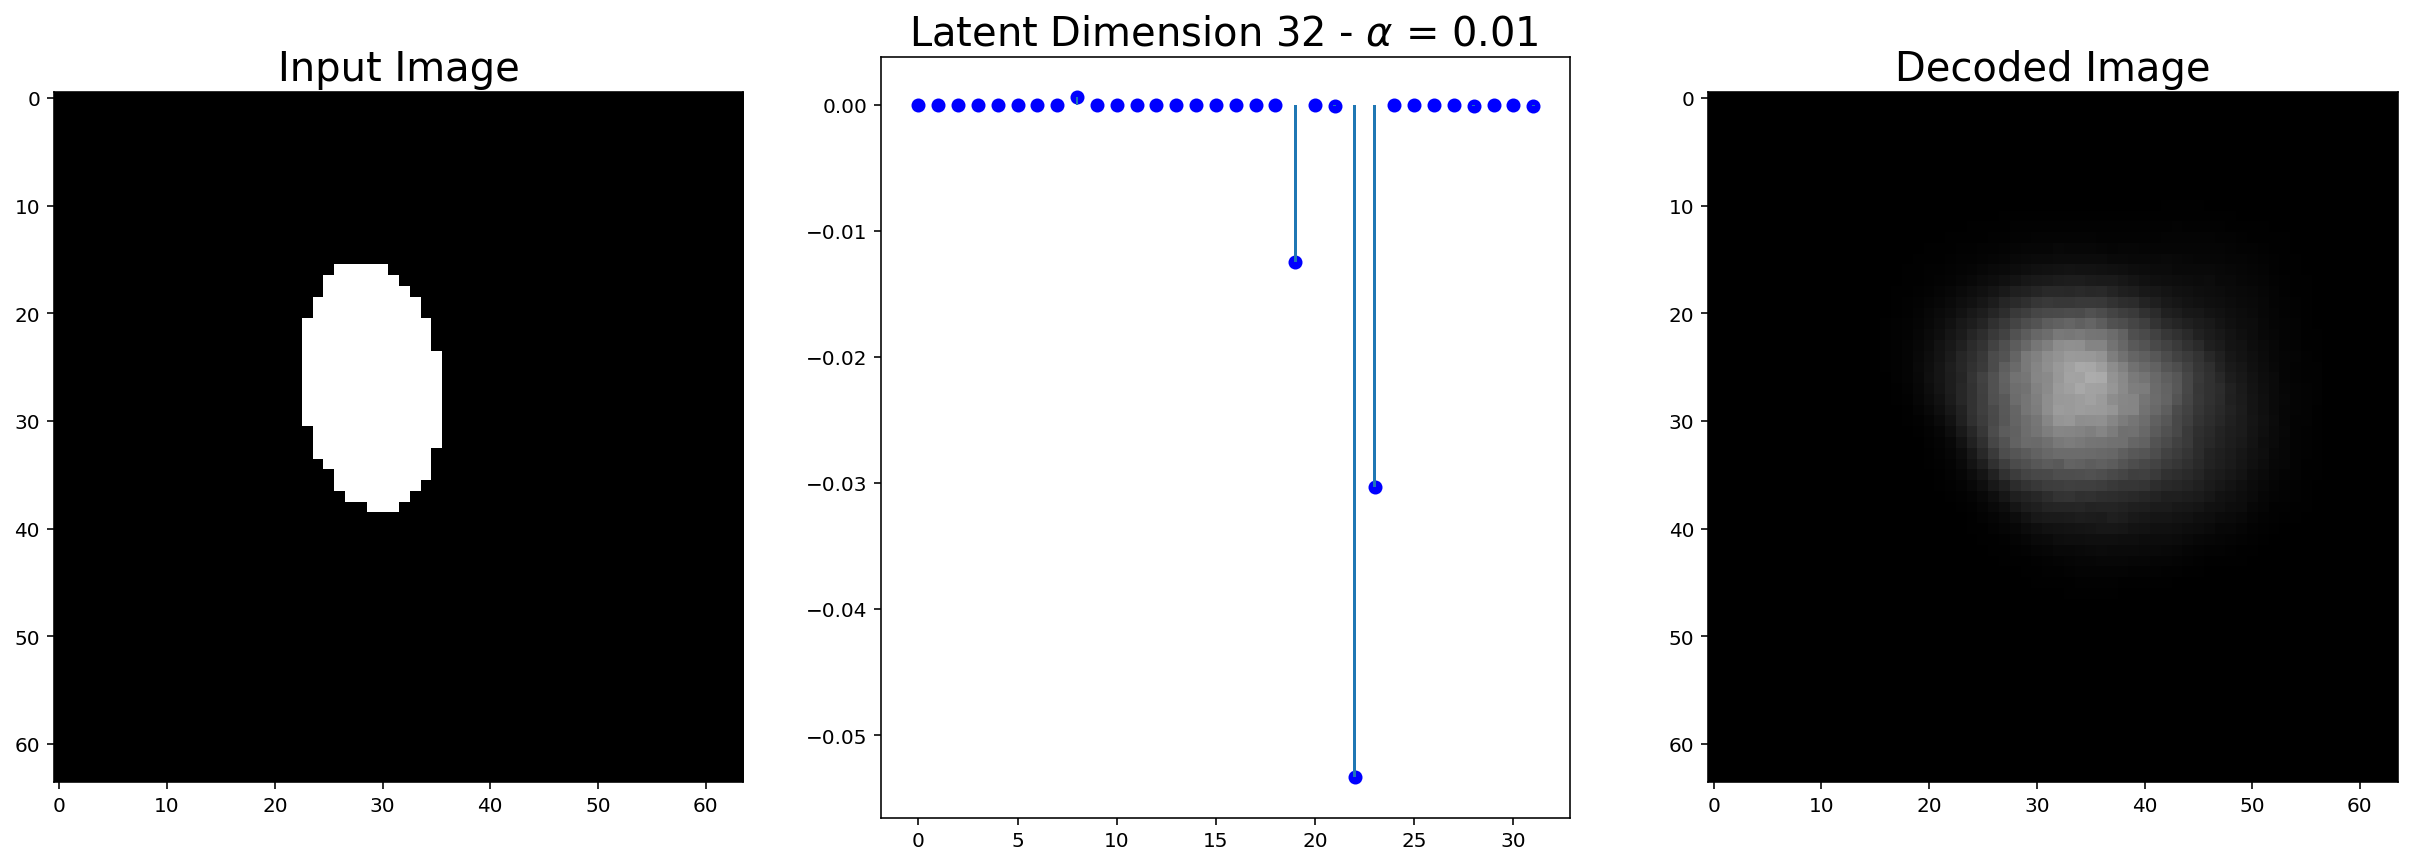

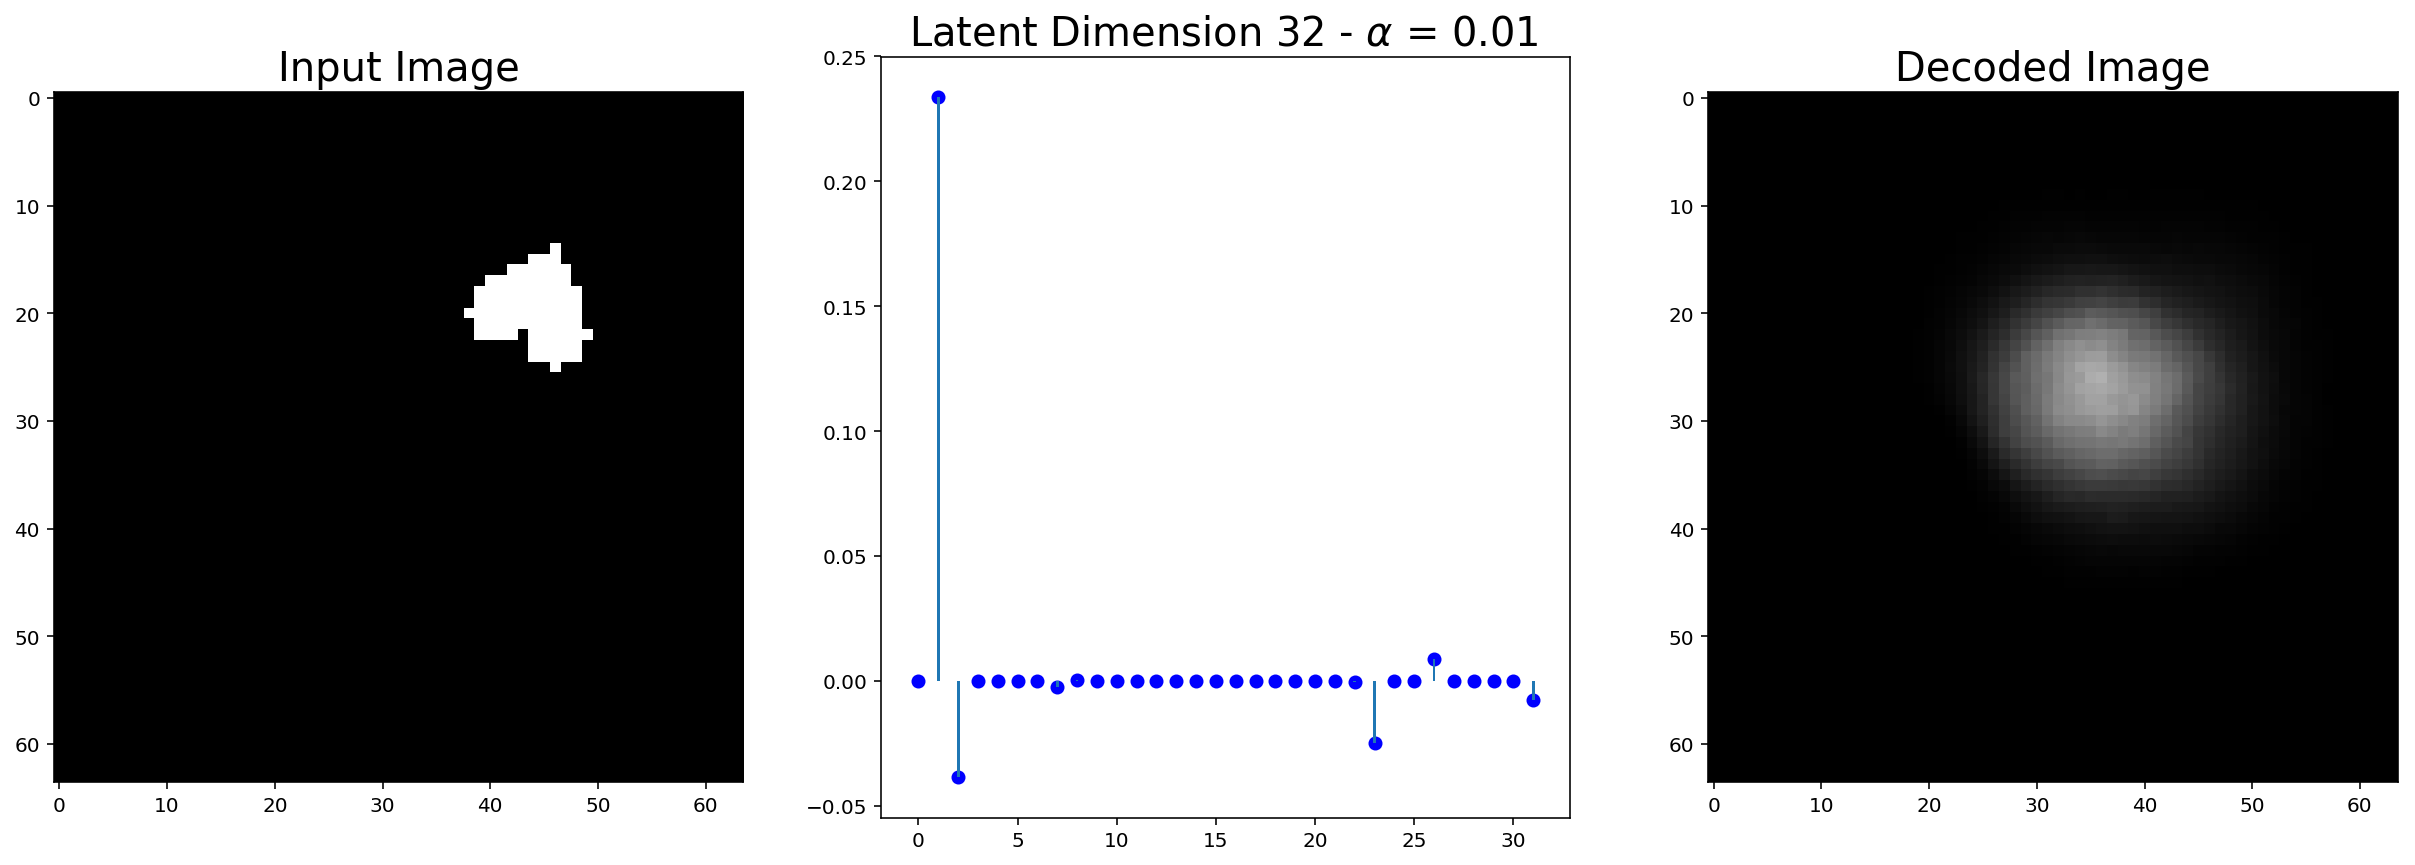

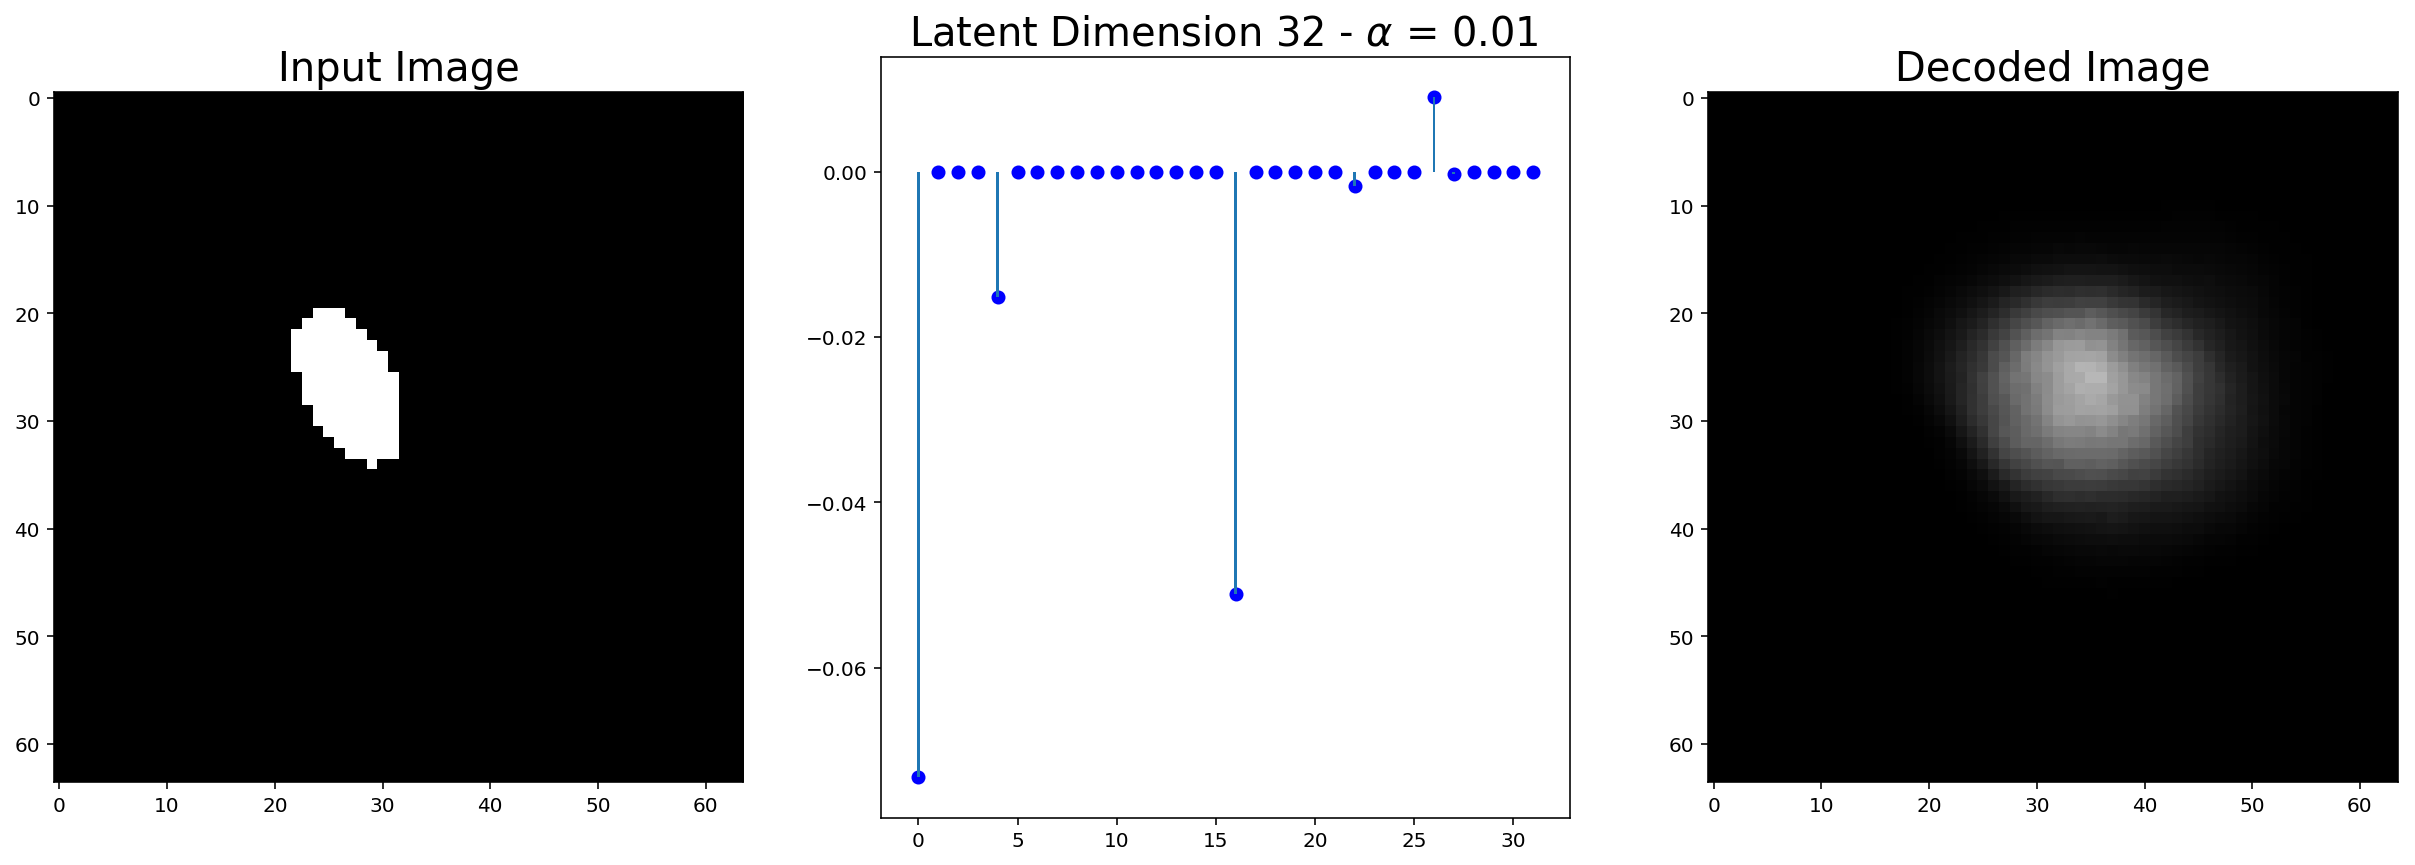

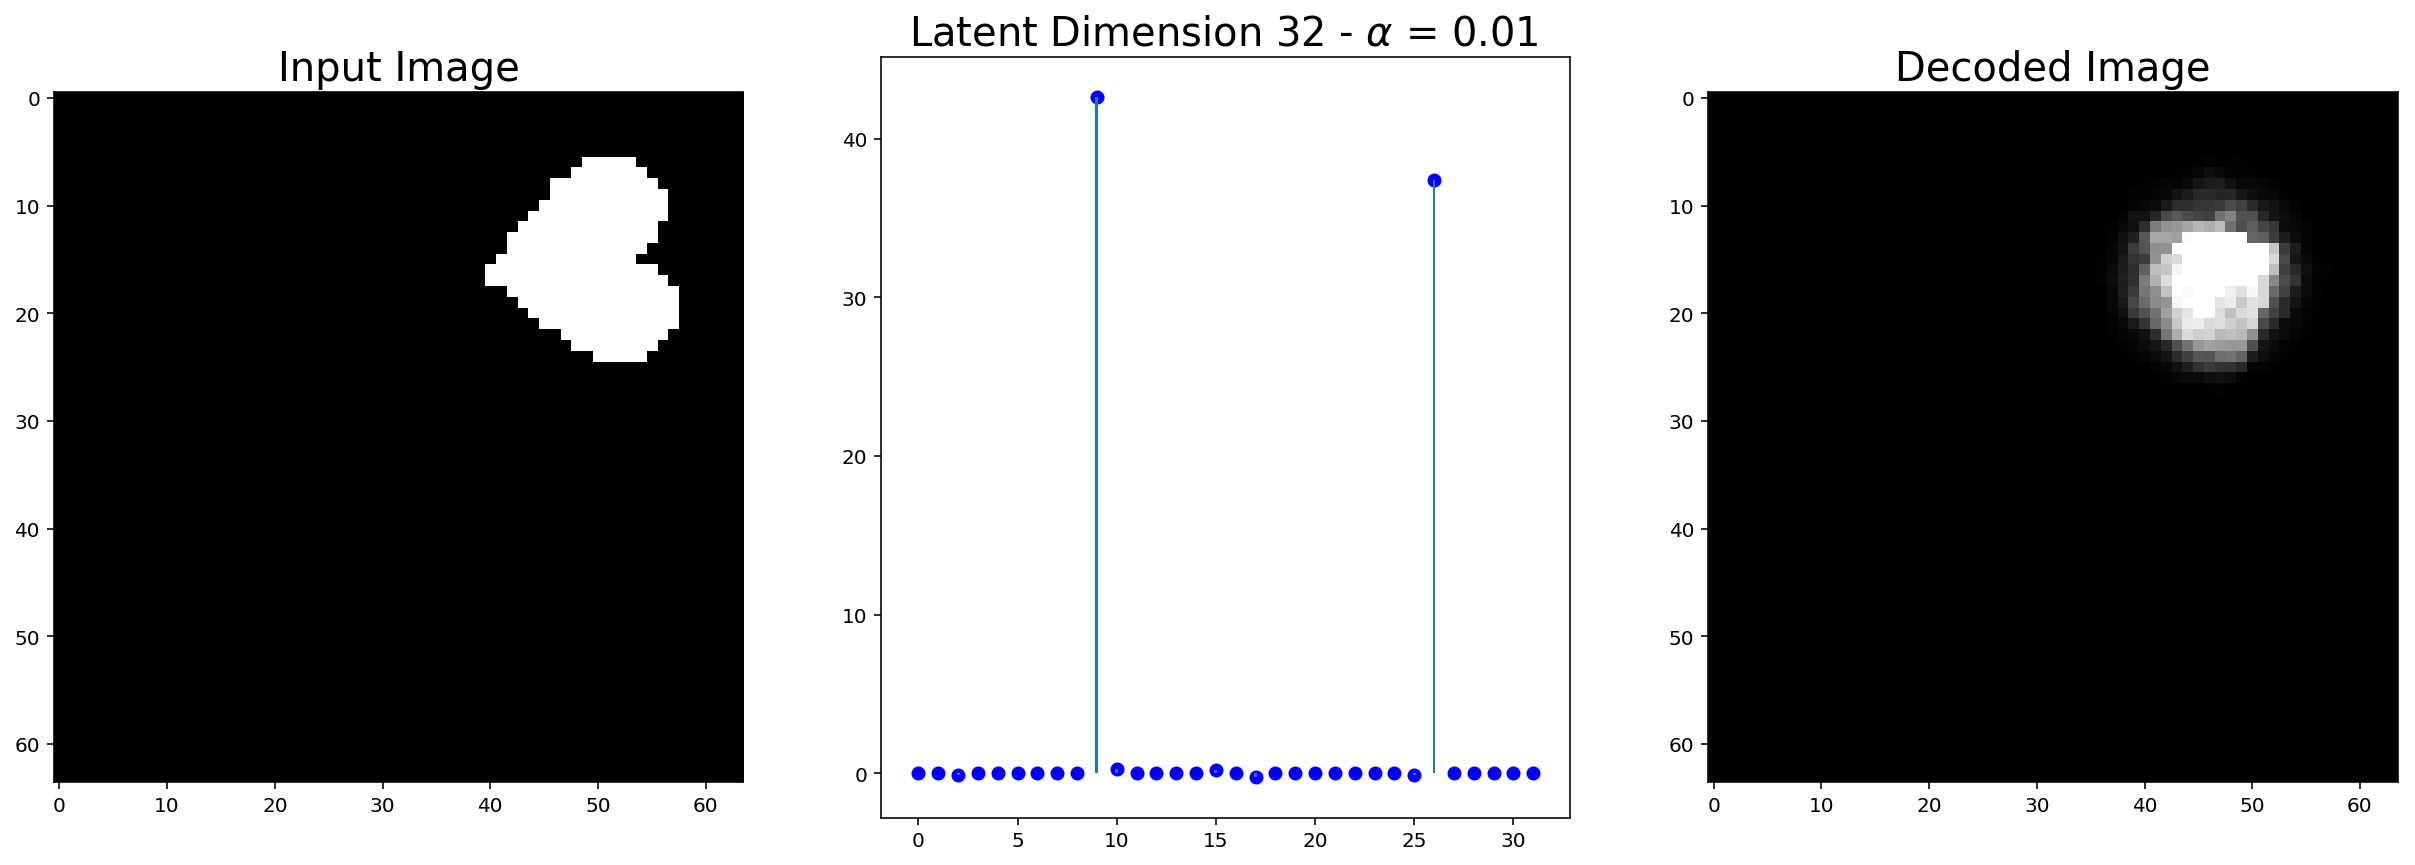

In [69]:
# 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 10 epochs
for i in range(5):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

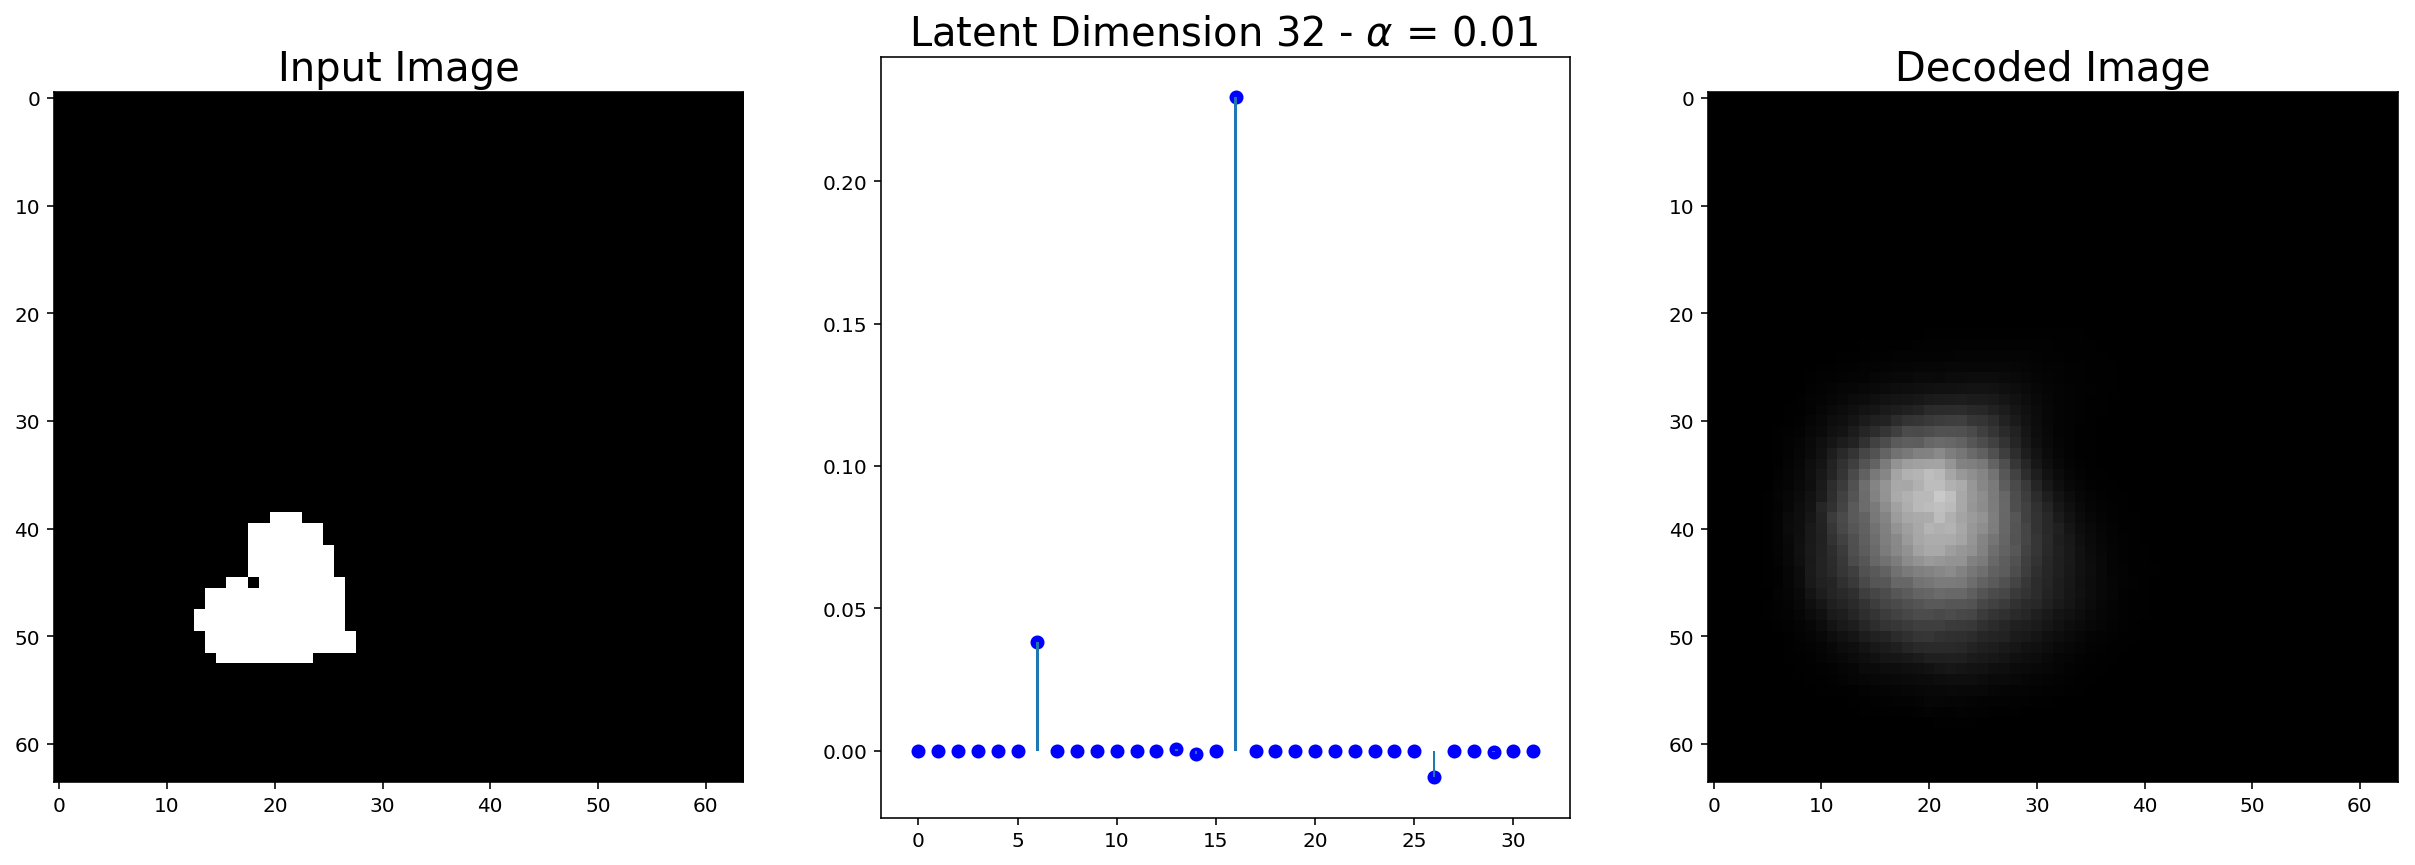

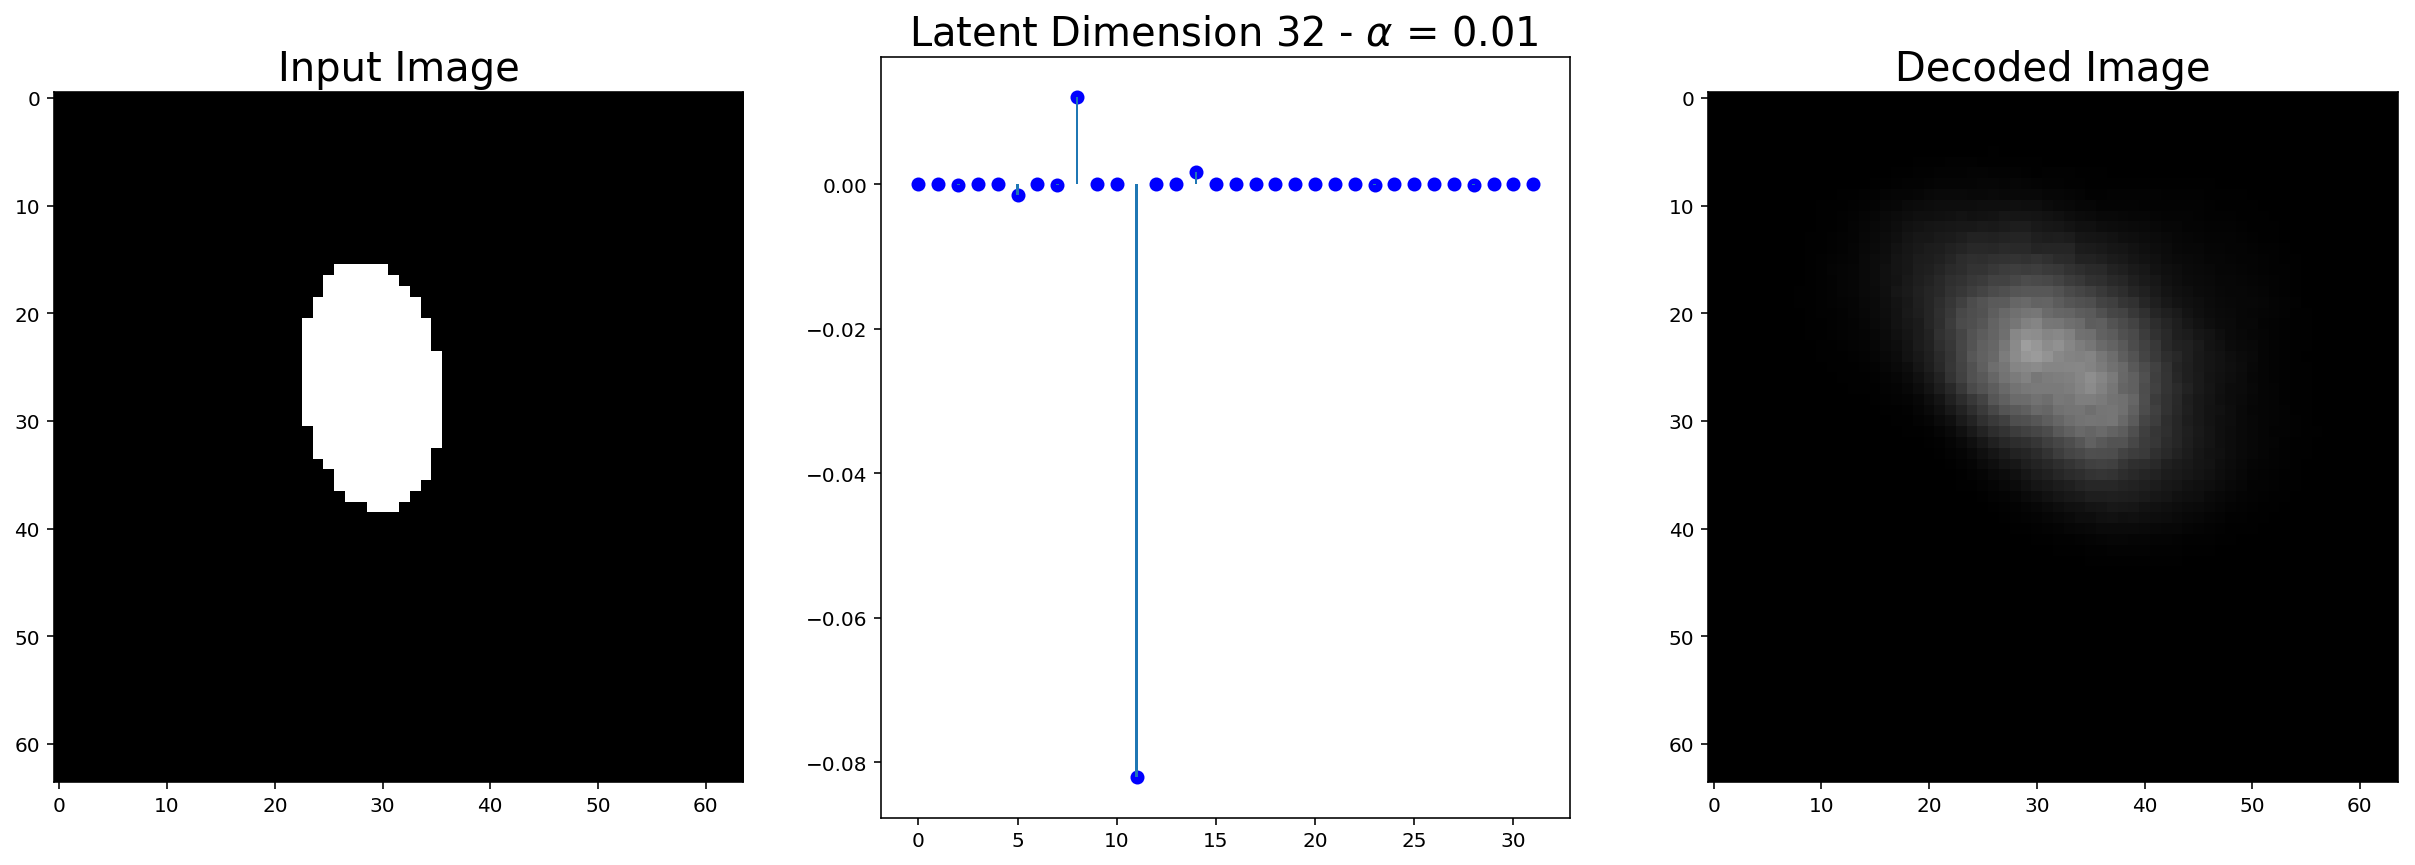

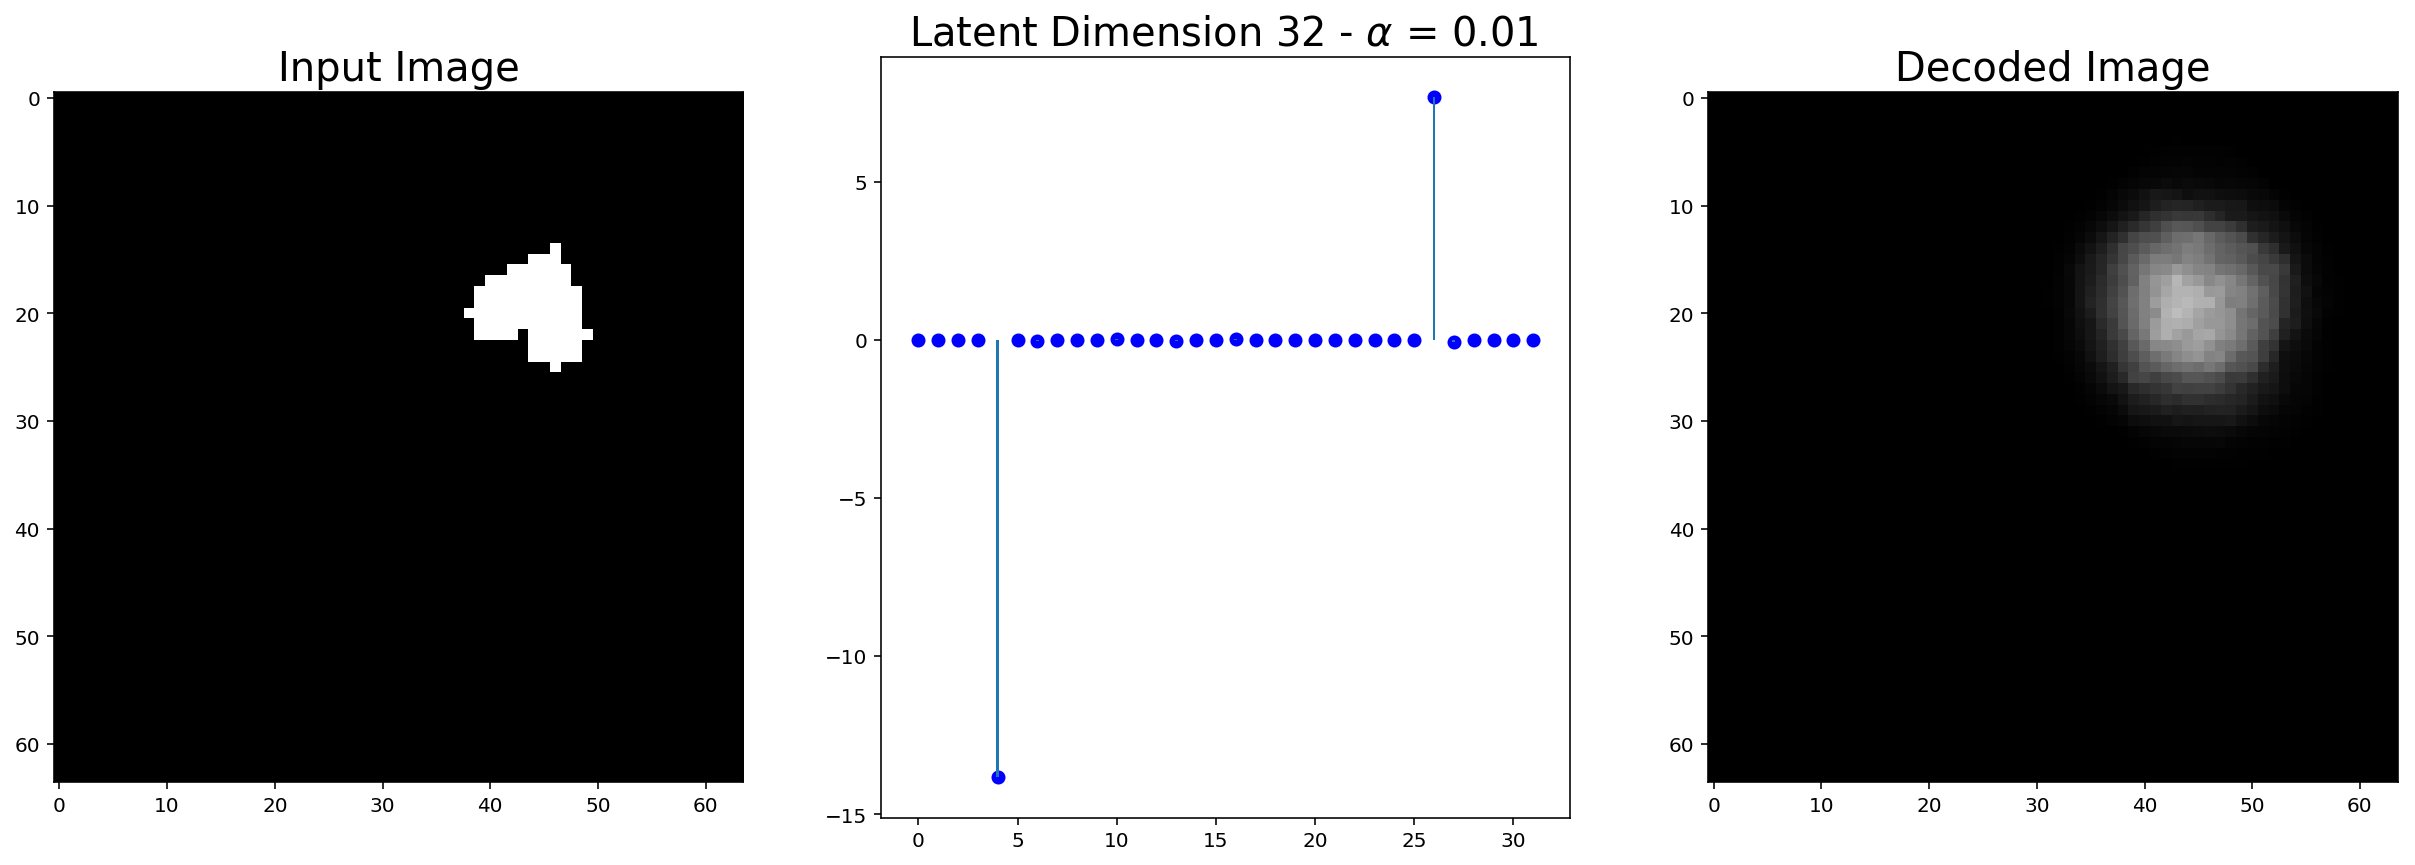

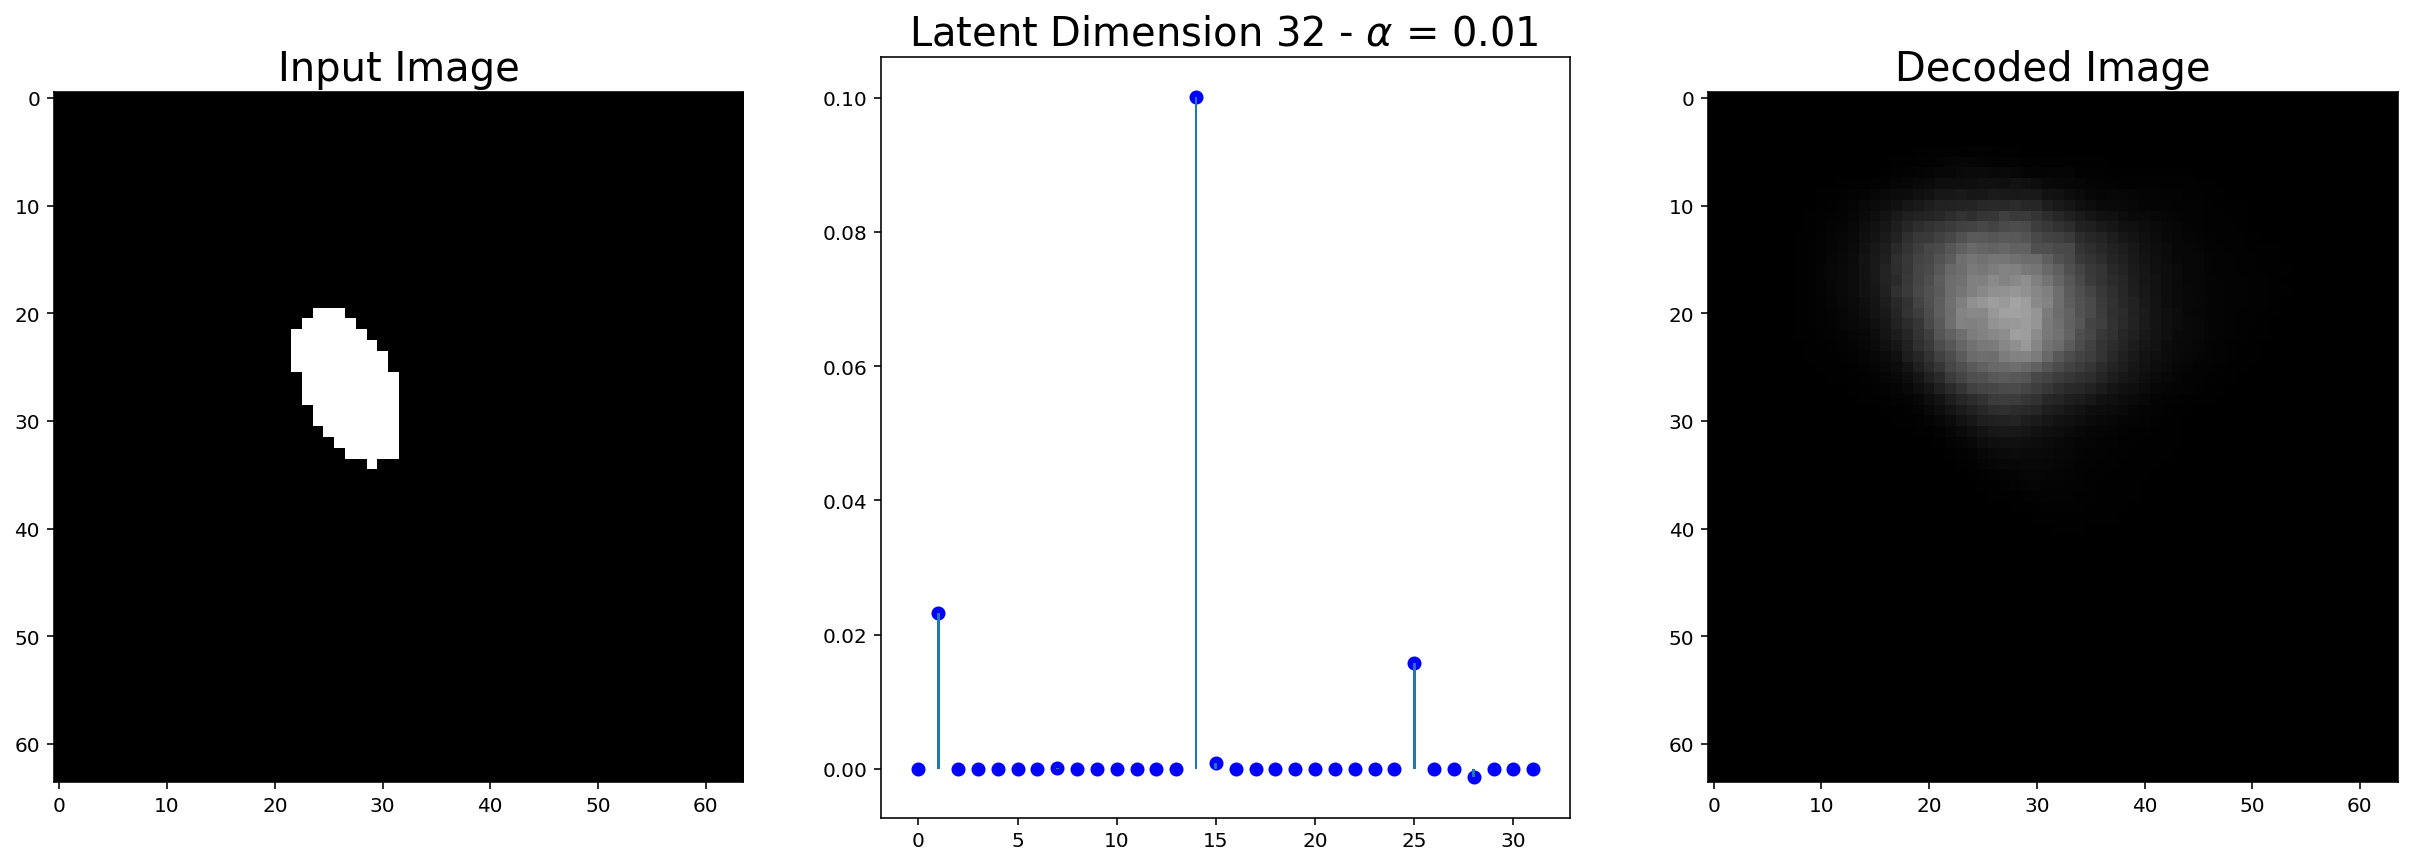

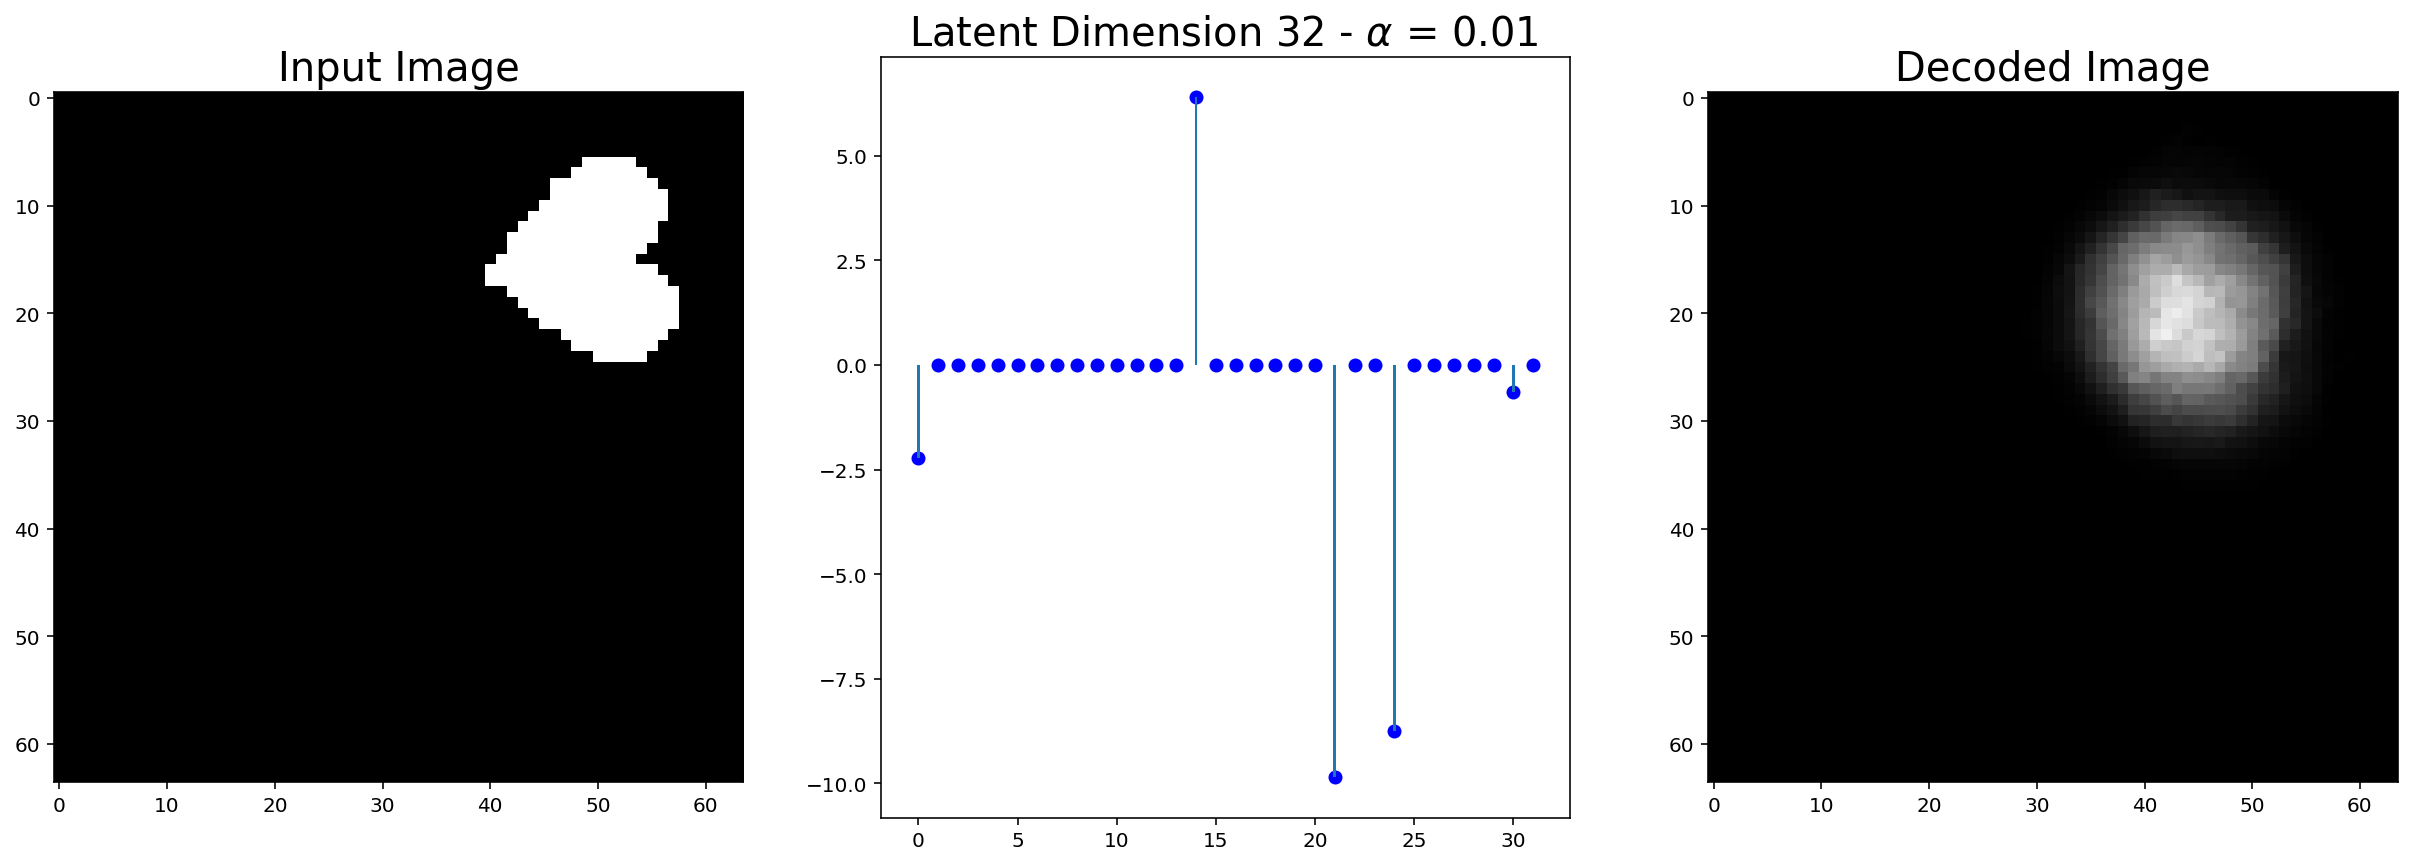

In [63]:
# 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 6 epochs
for i in range(5):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


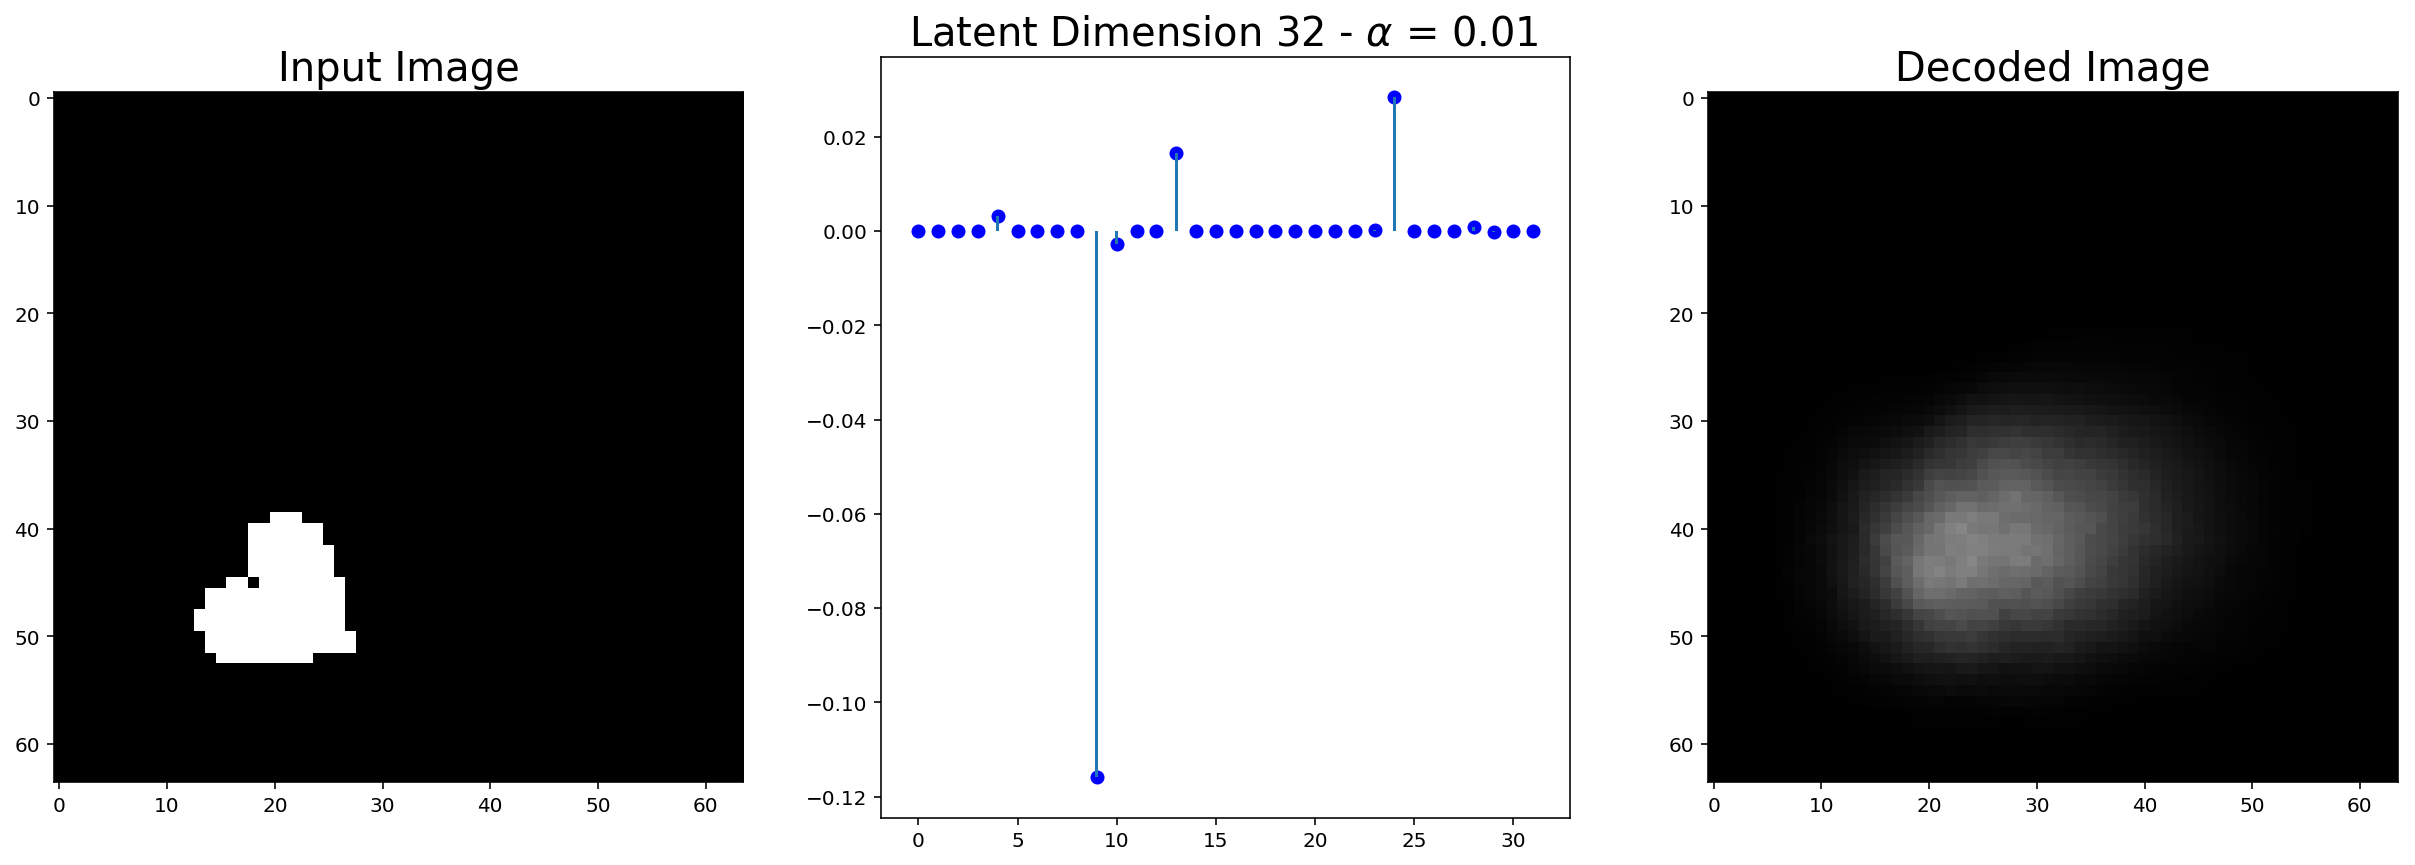

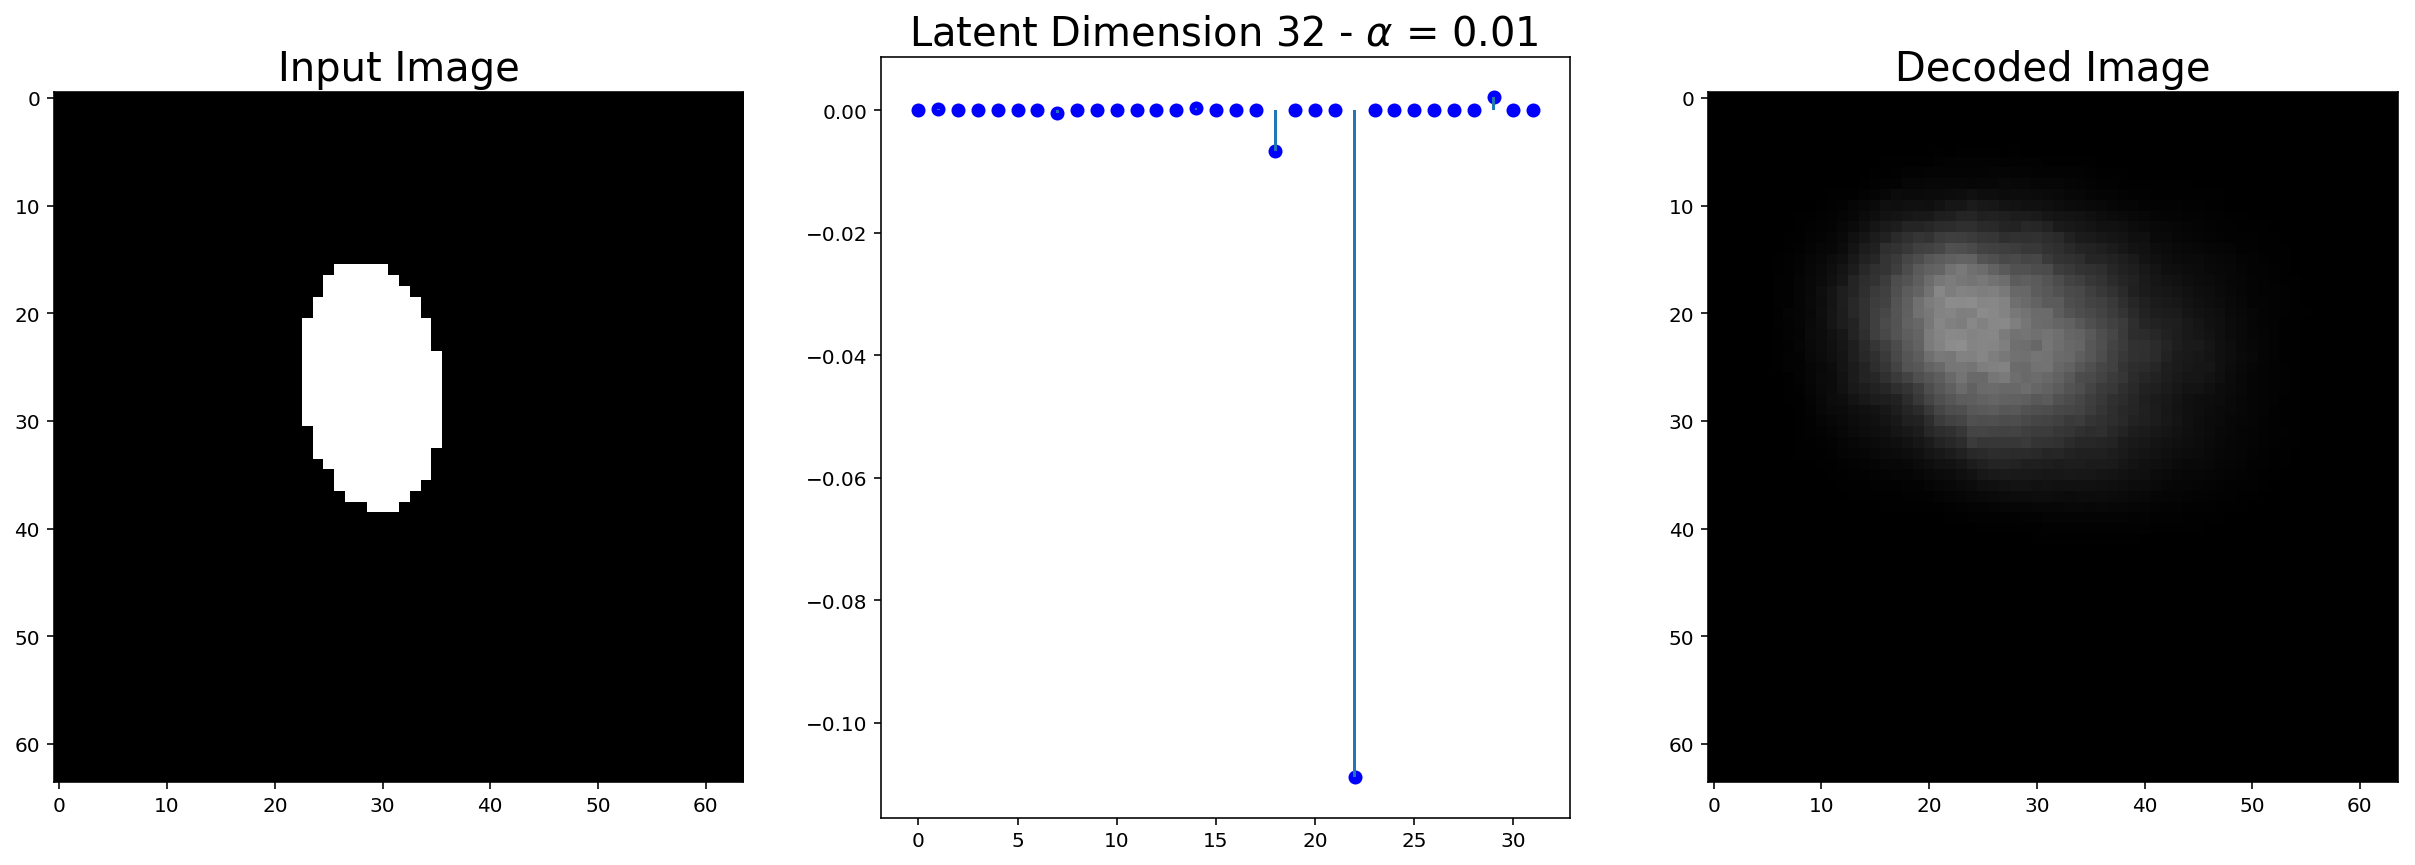

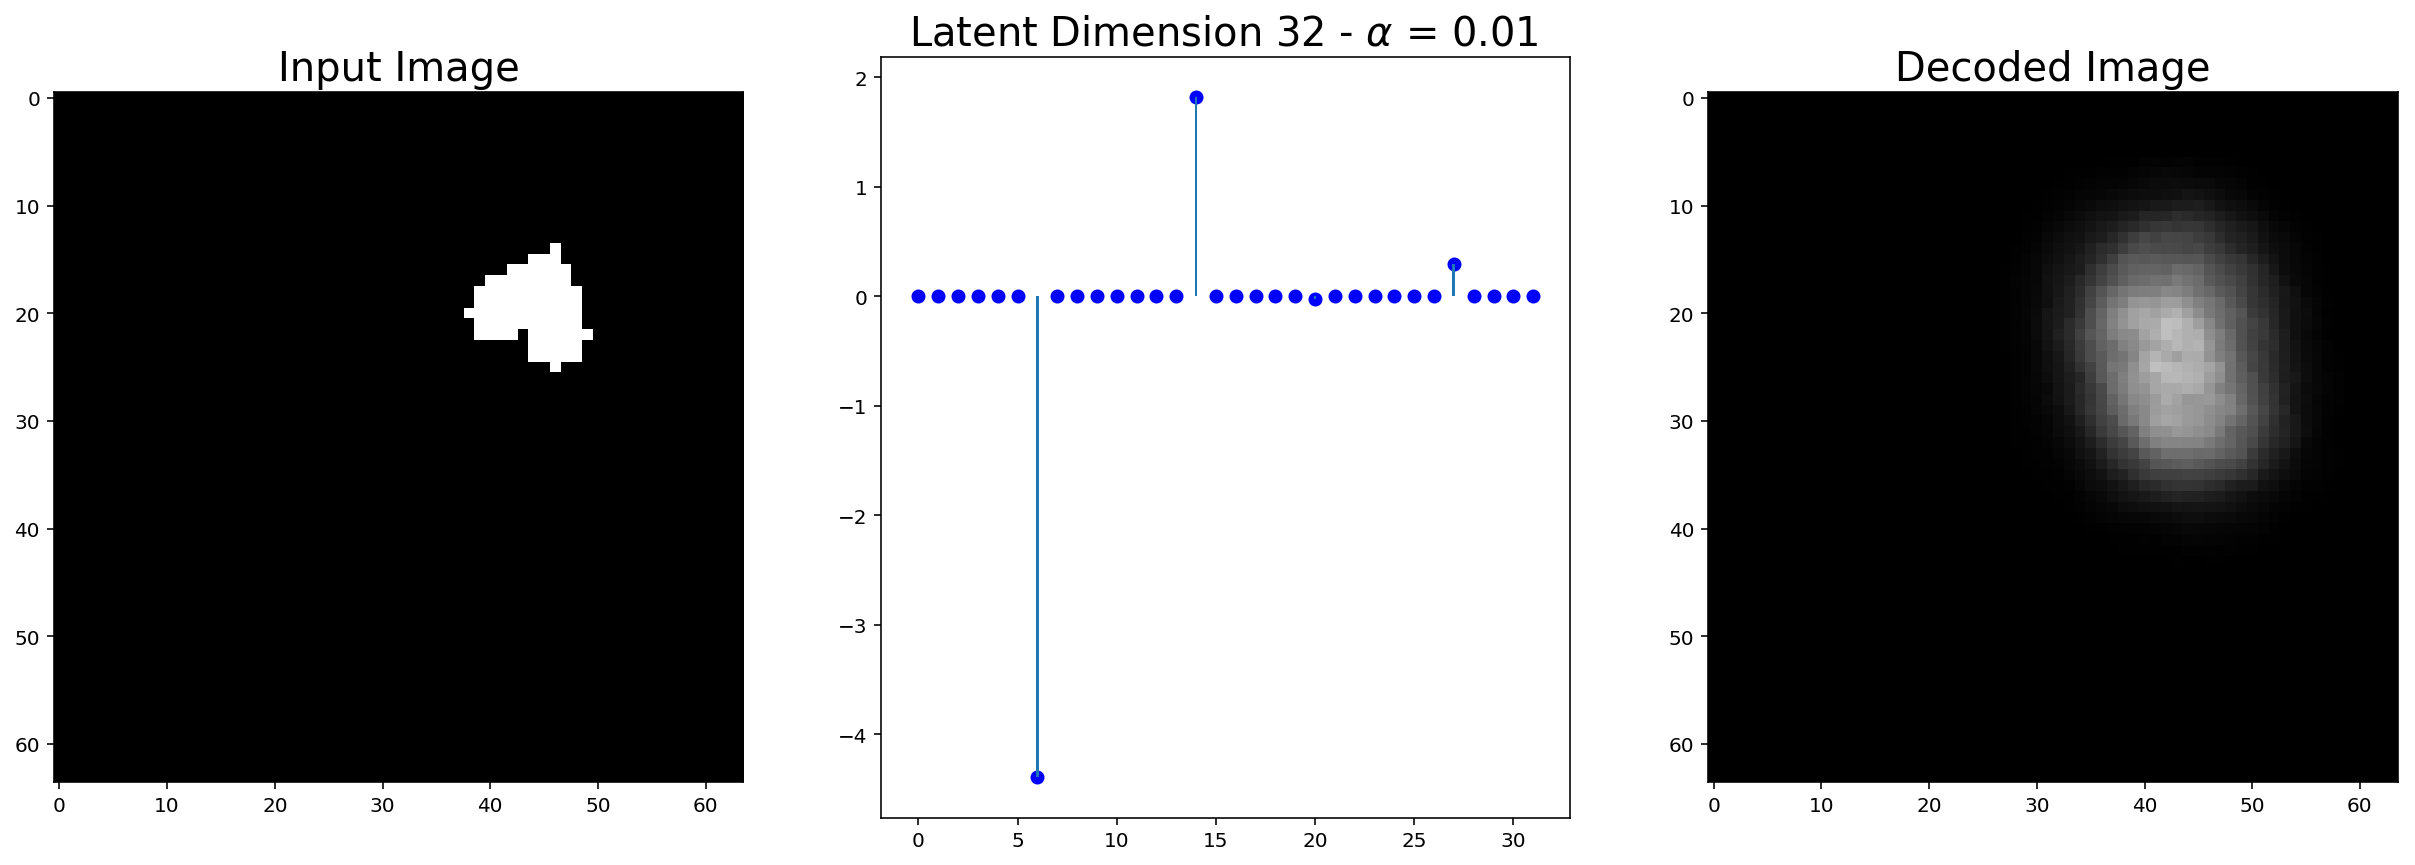

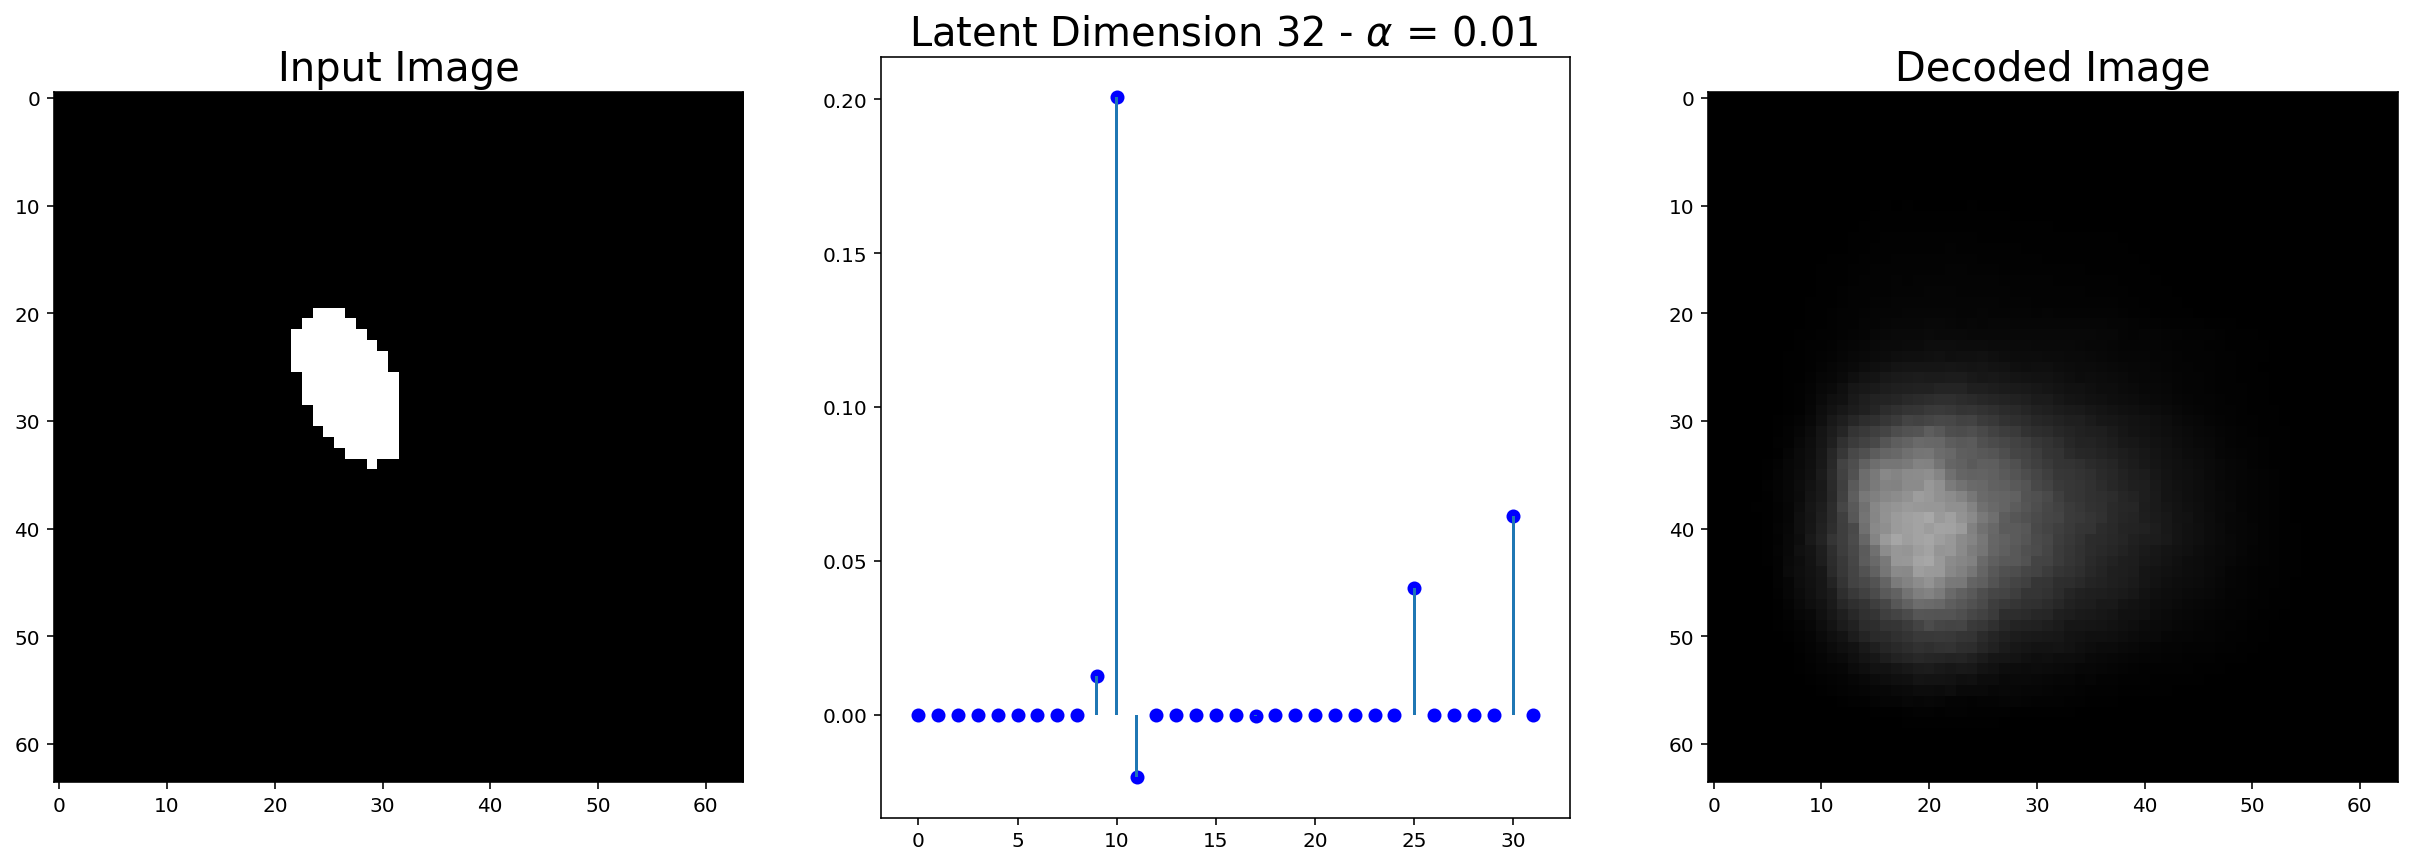

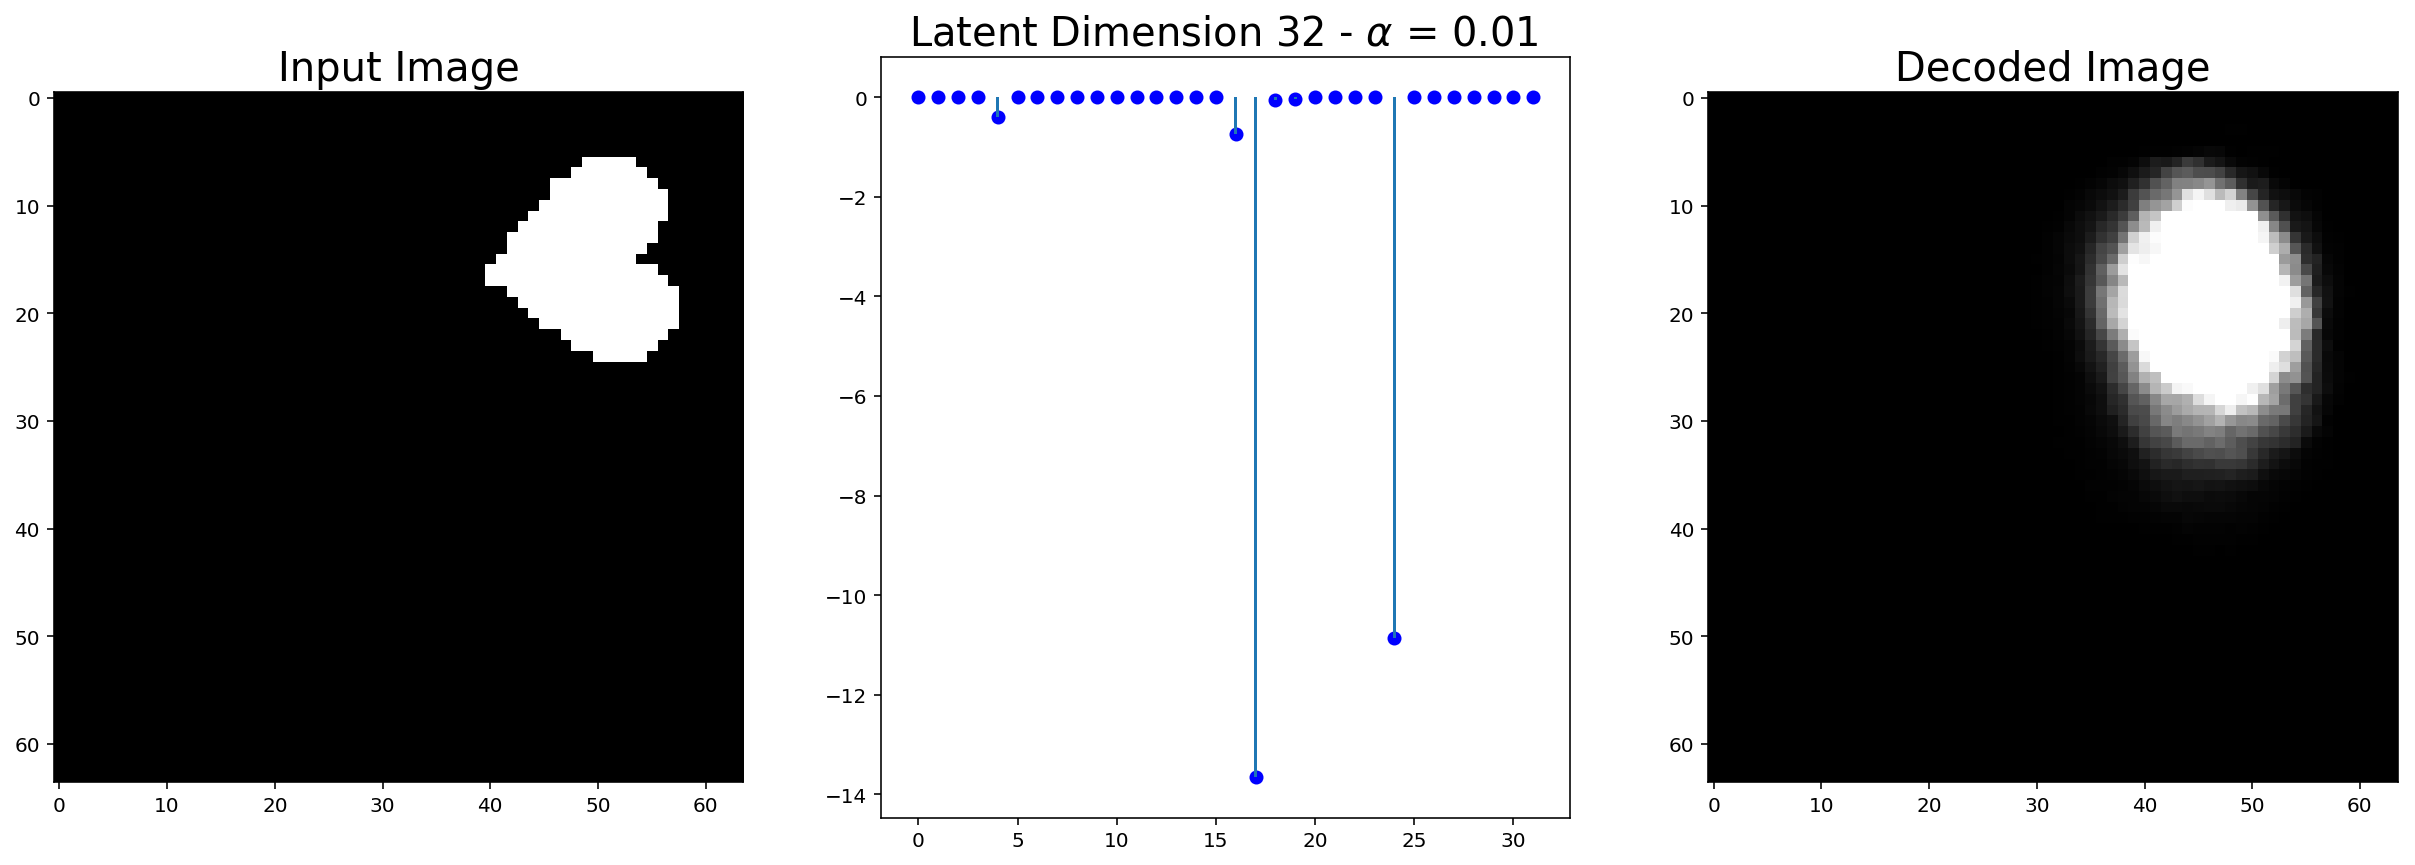

In [61]:
# 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 3 epochs
for i in range(5):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

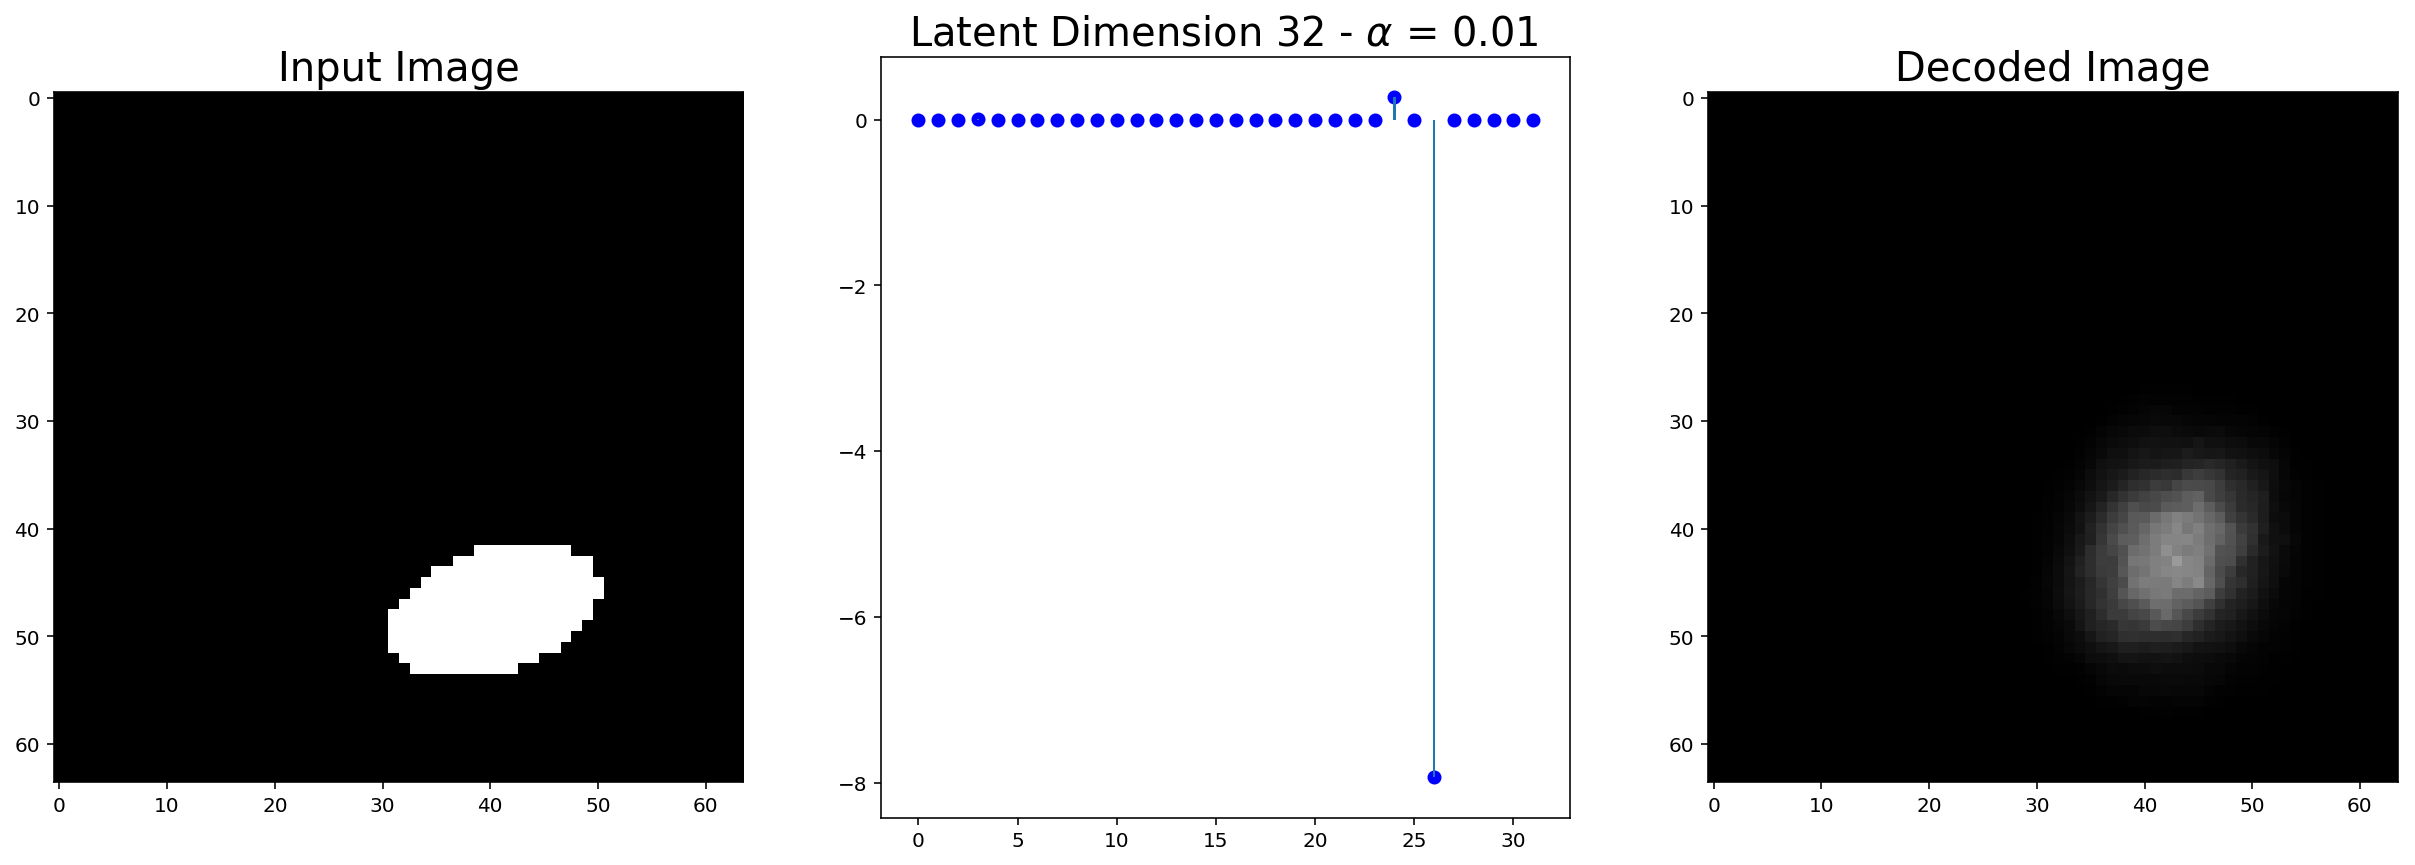

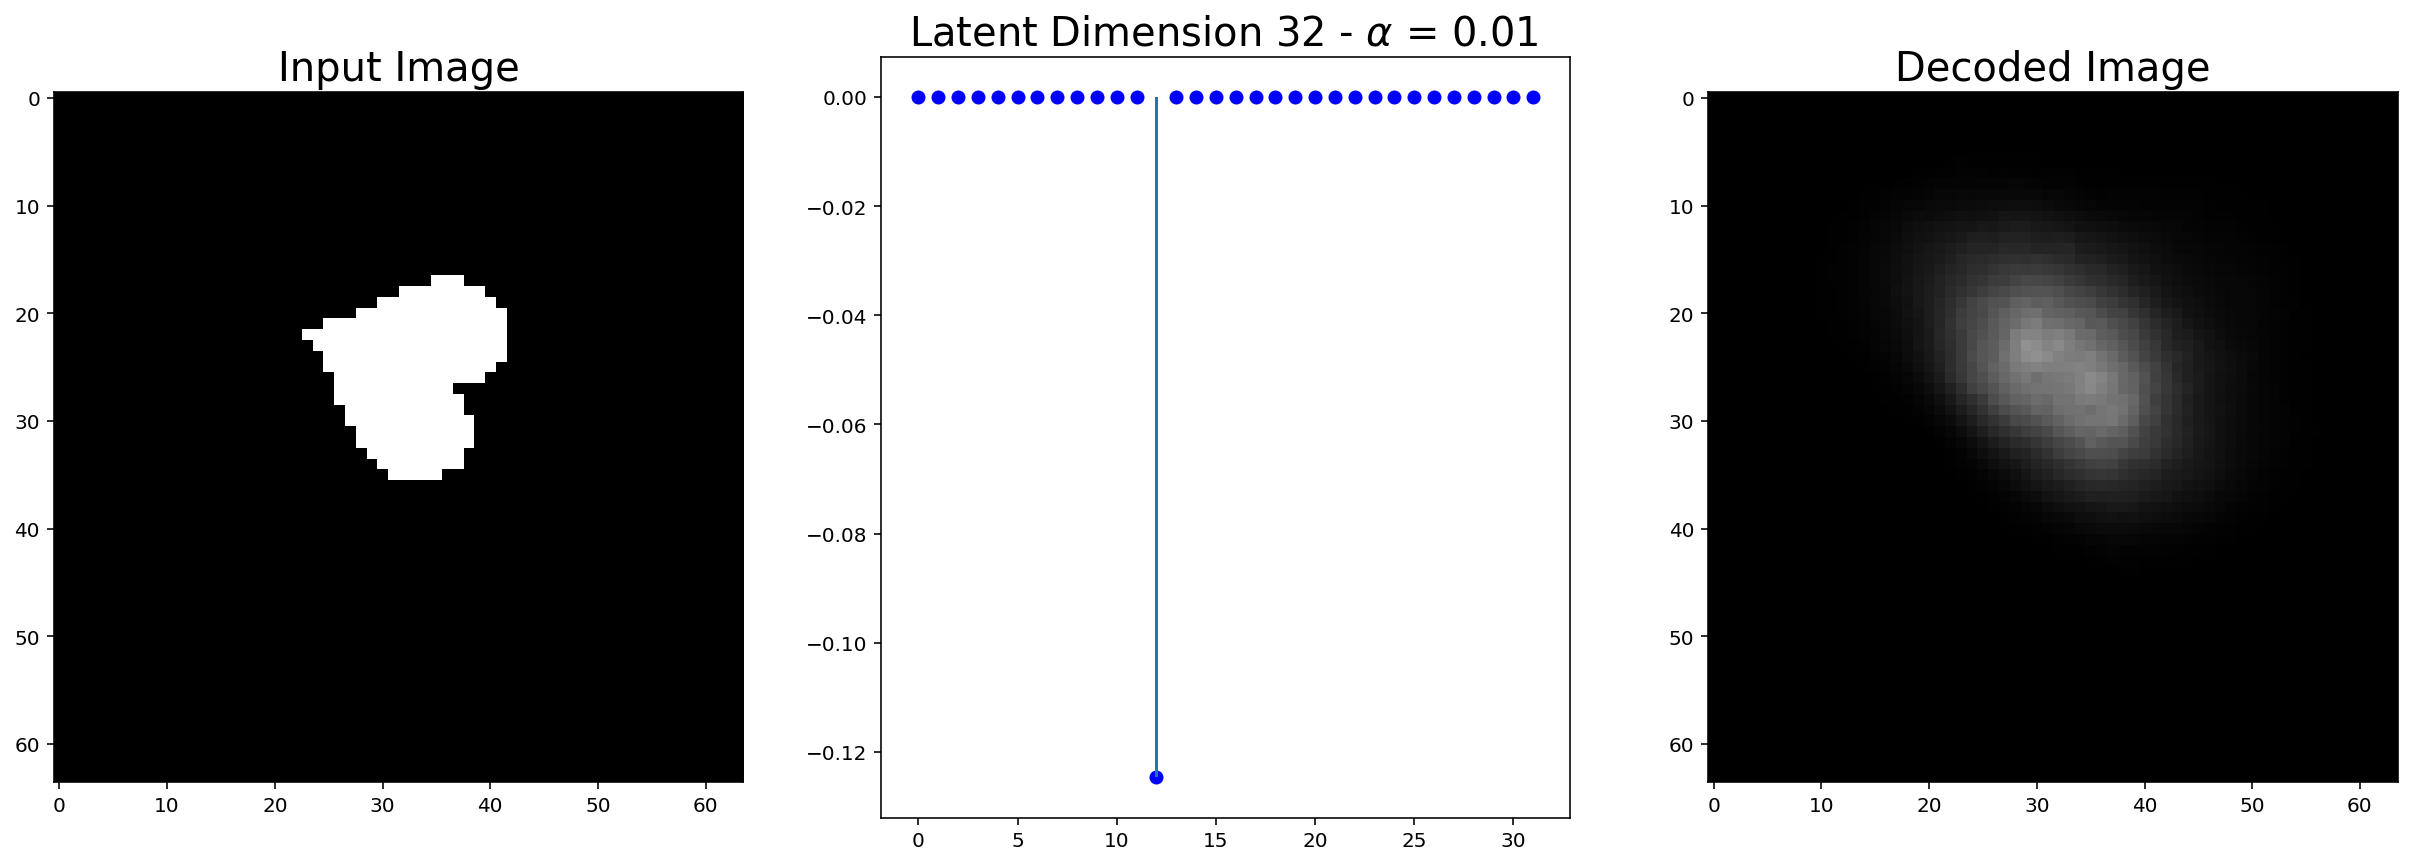

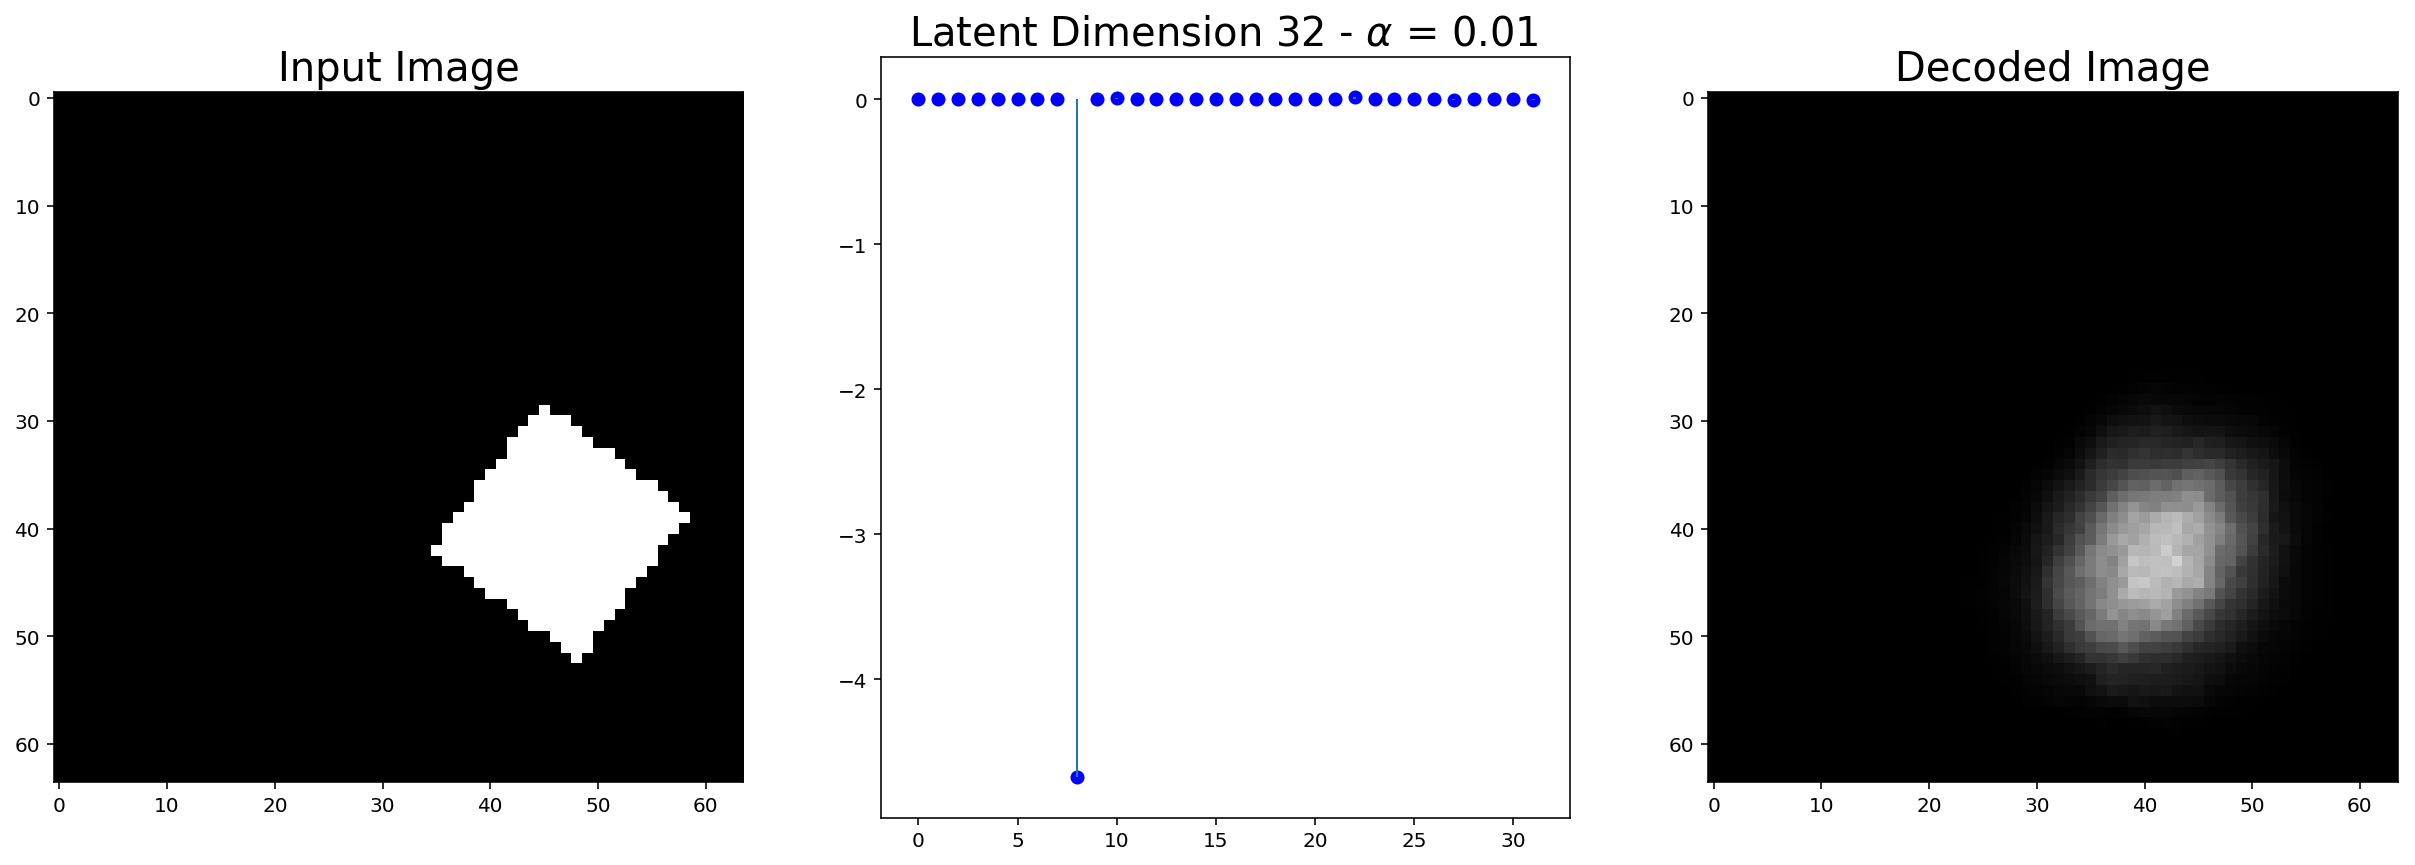

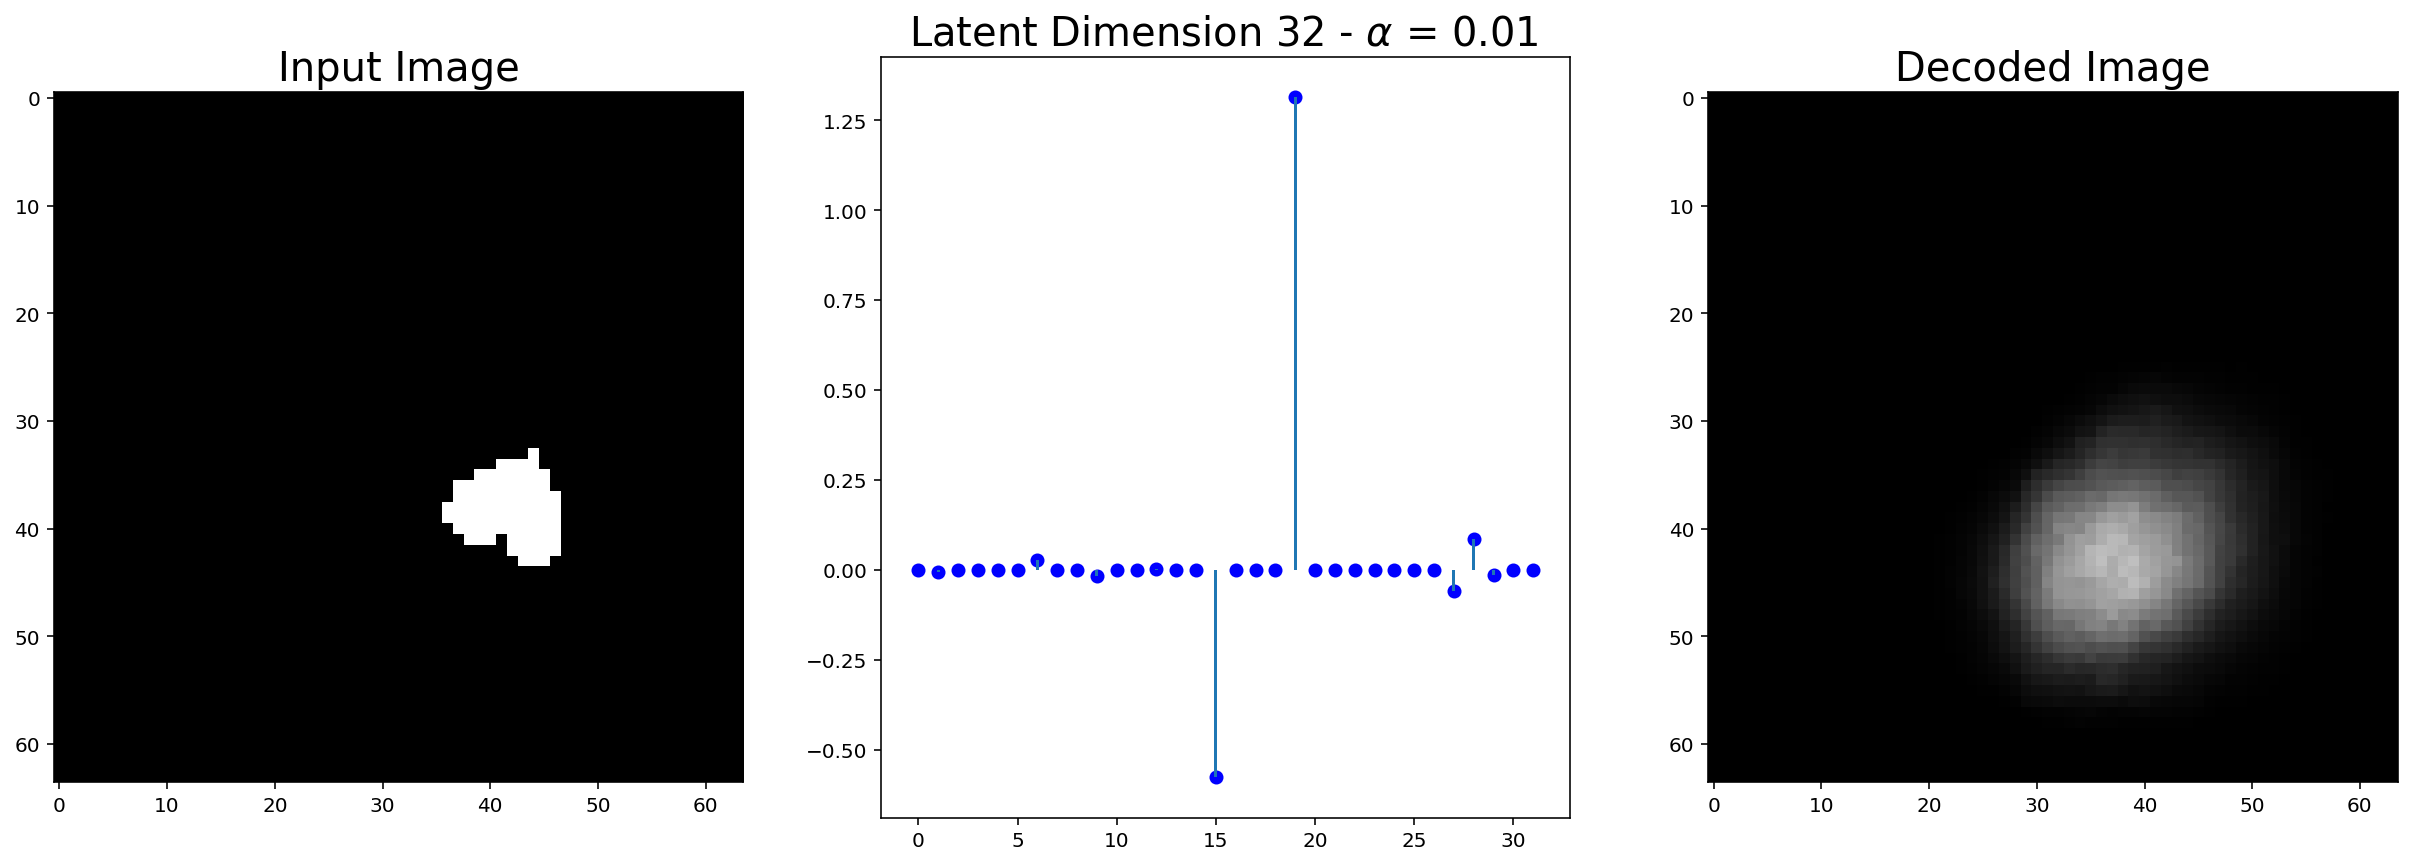

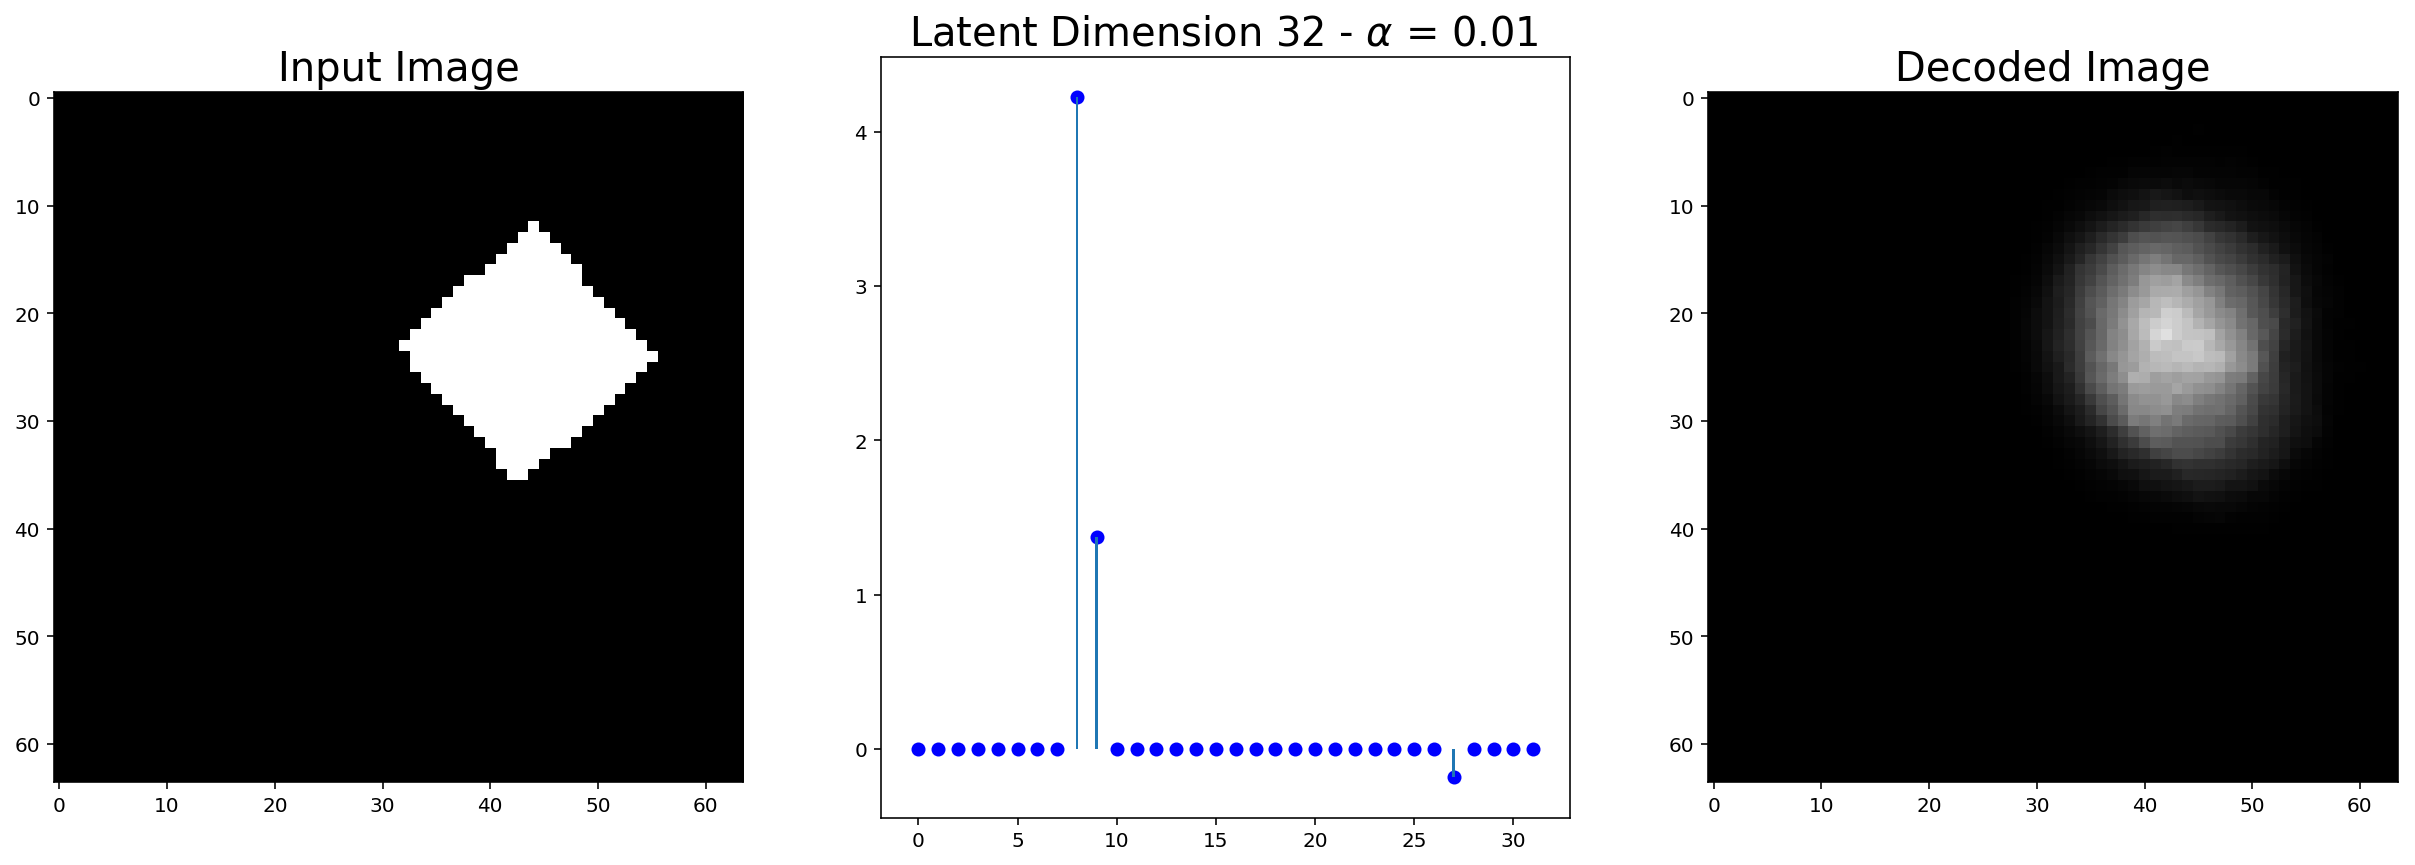

In [65]:
# TRAIN, 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 6 epochs
for i in range(5):
    plot_encoding(images_trn[i][None,:], vsc, latent_size, alpha)

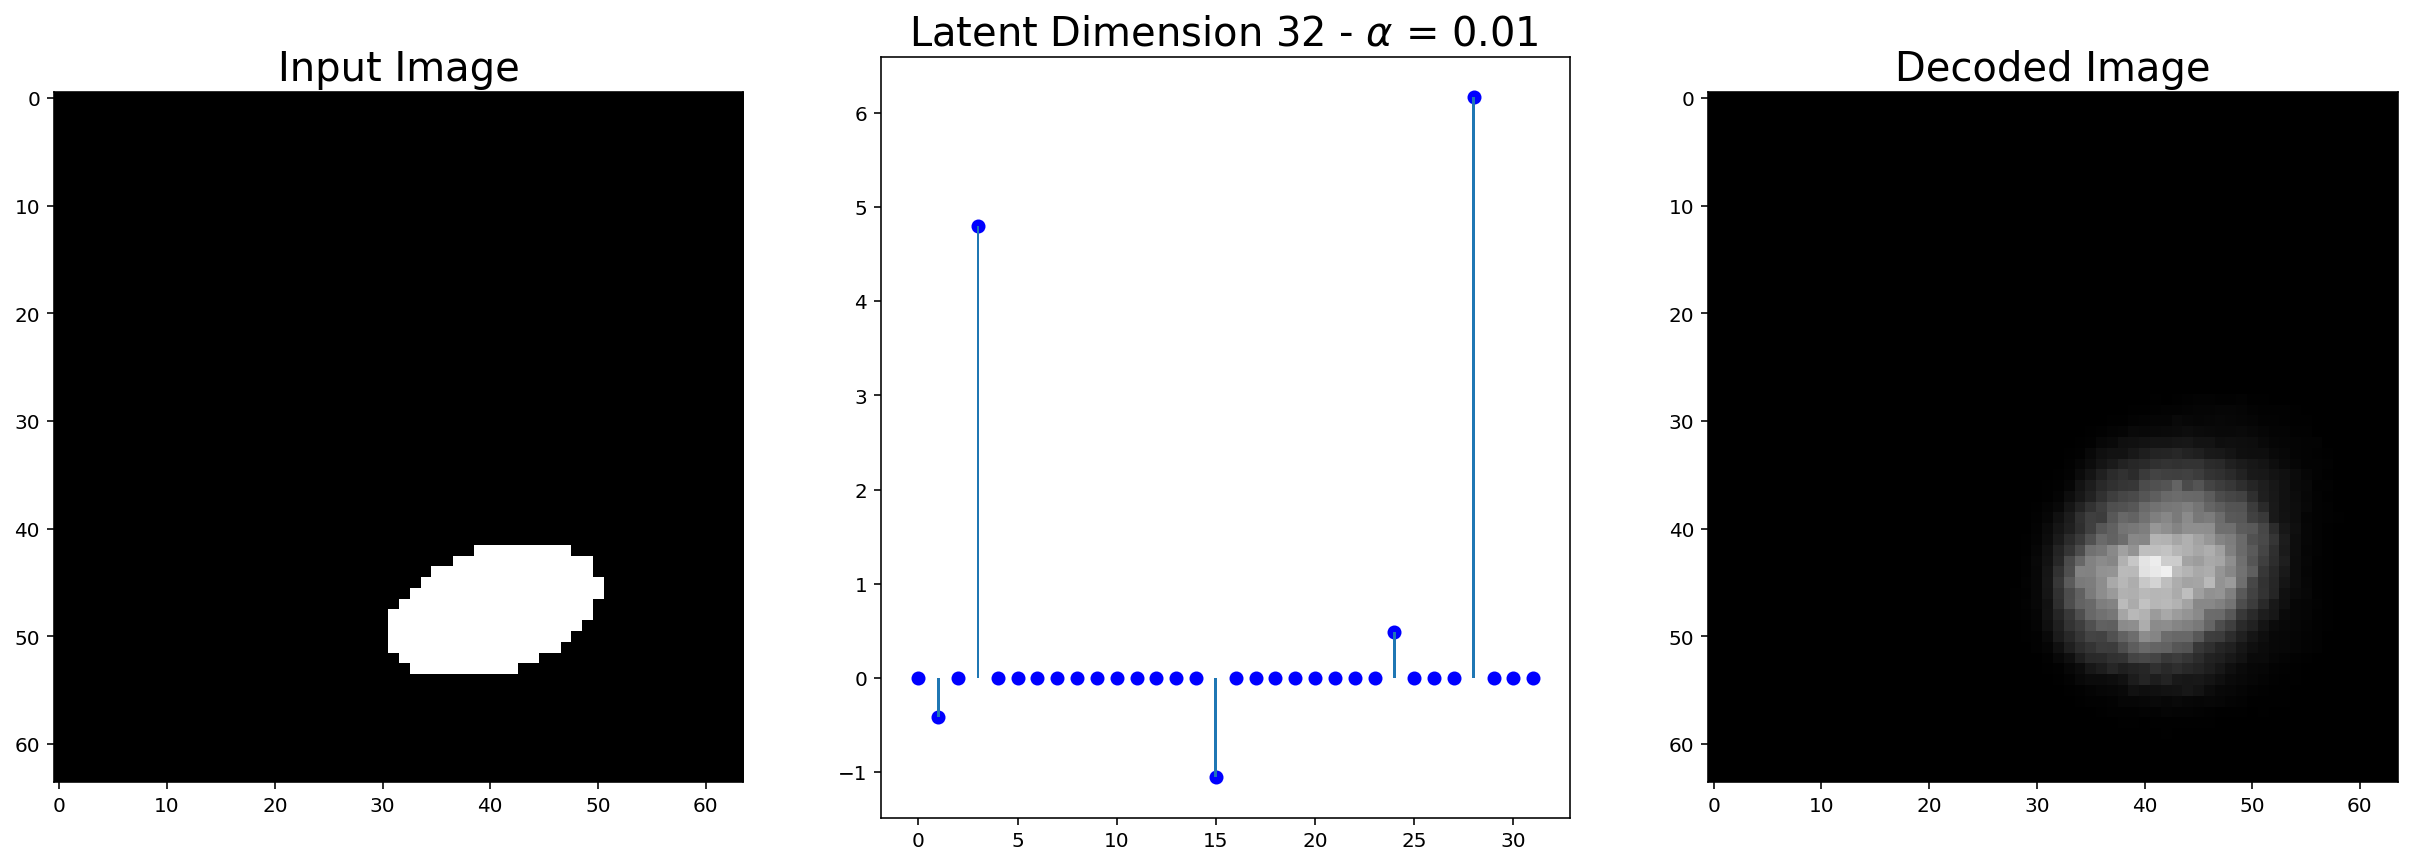

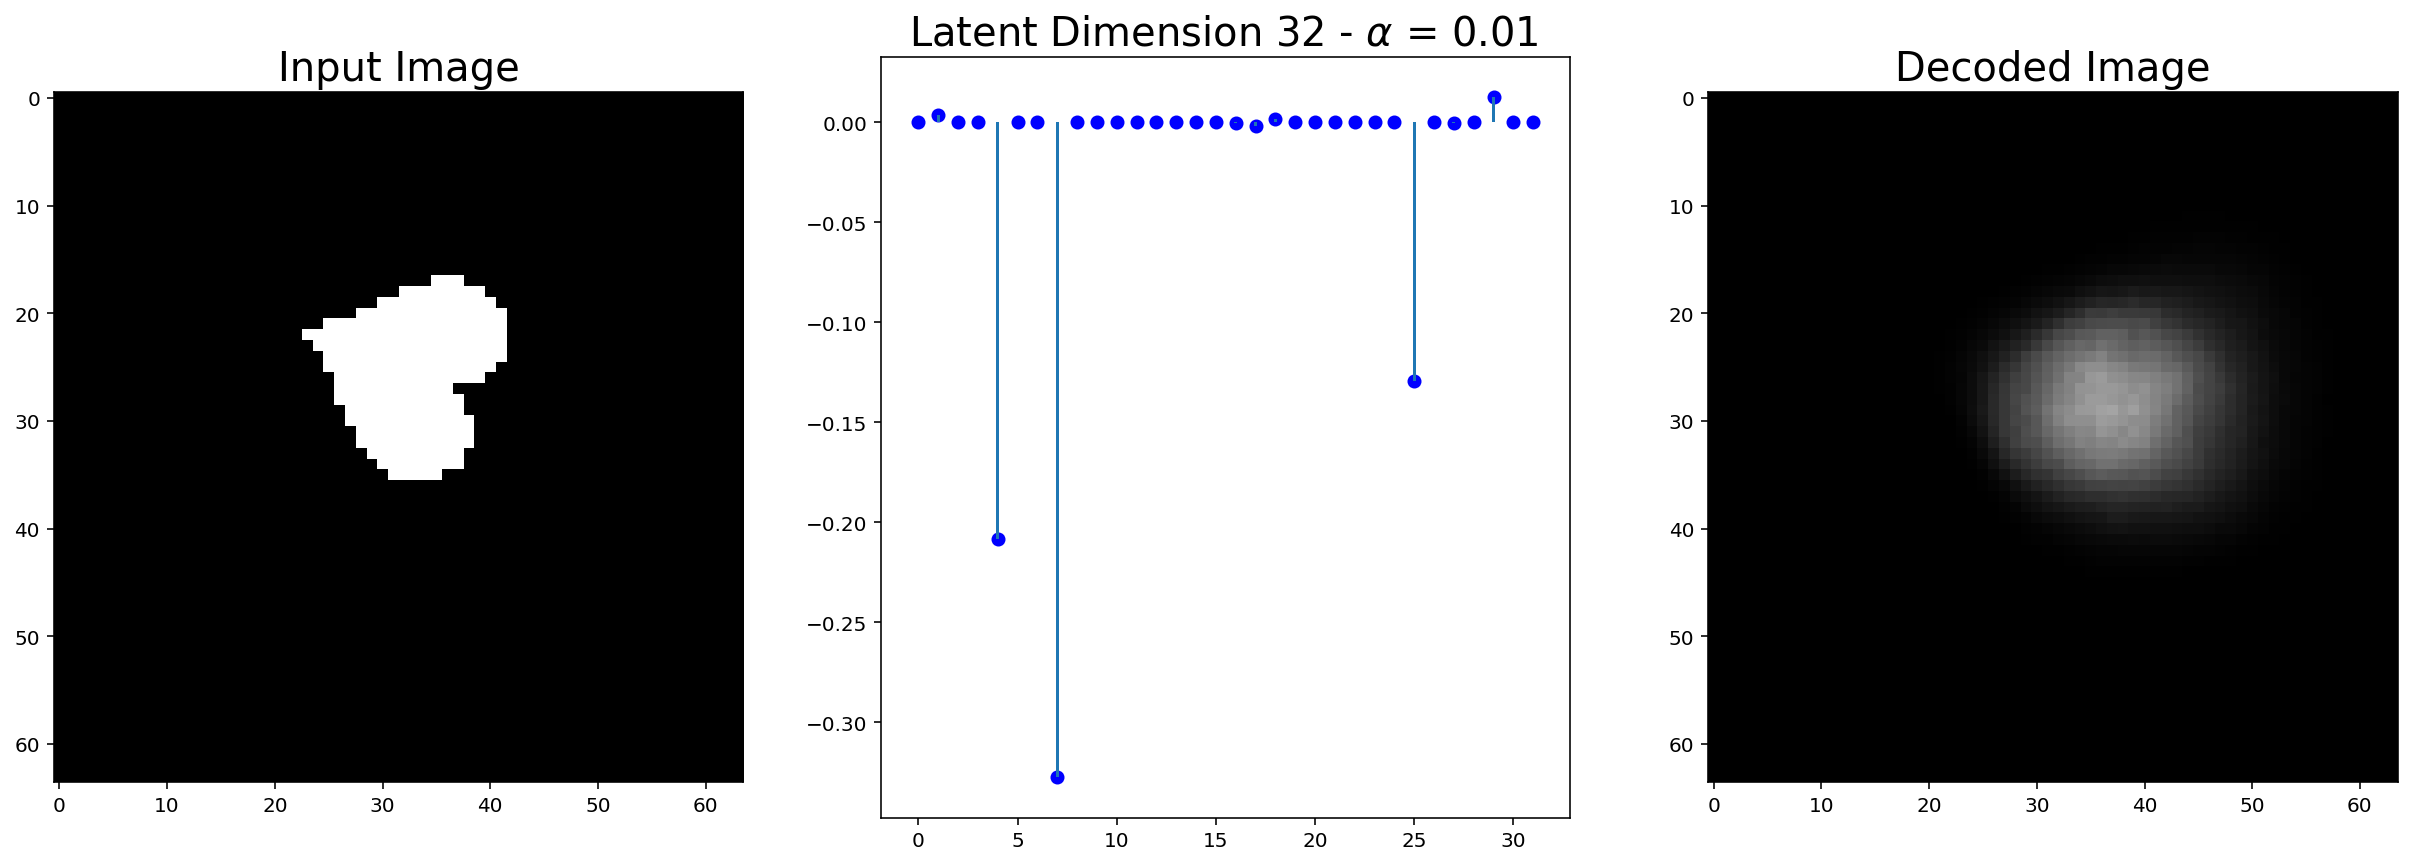

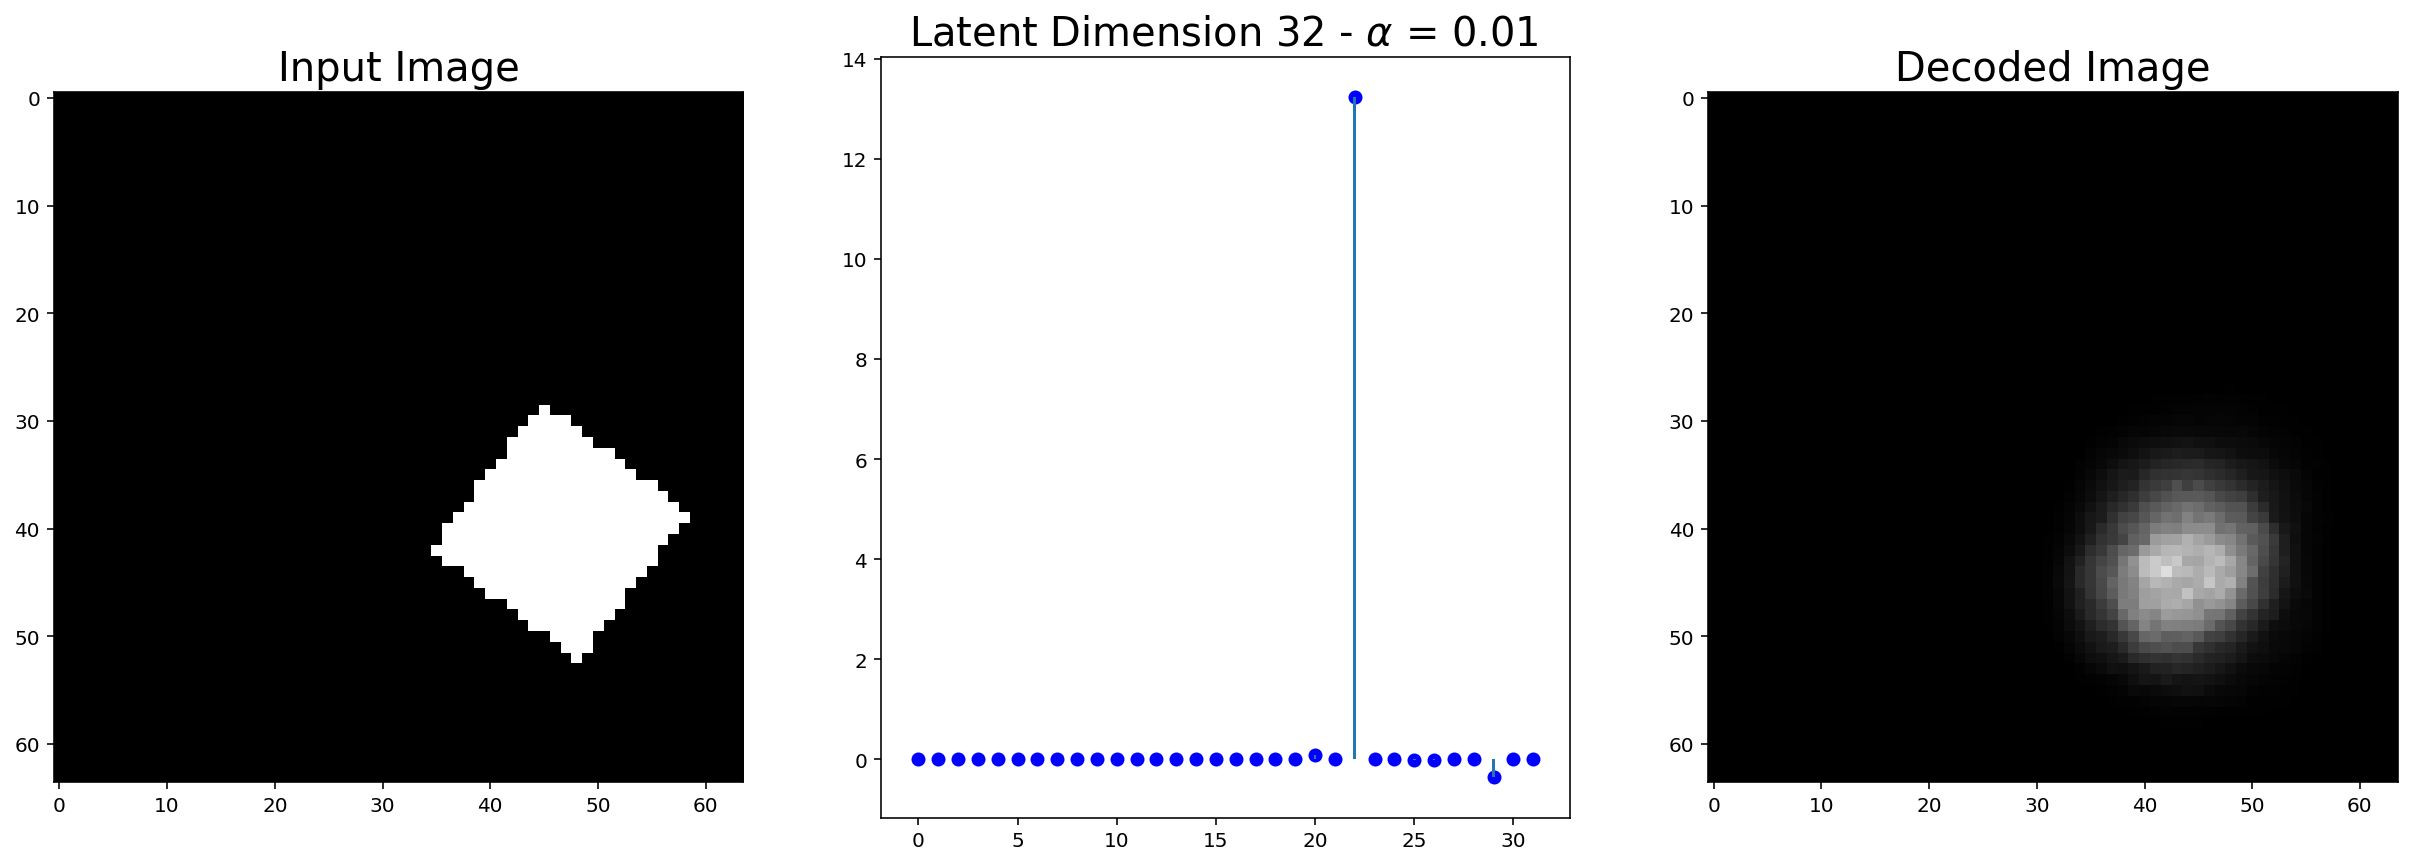

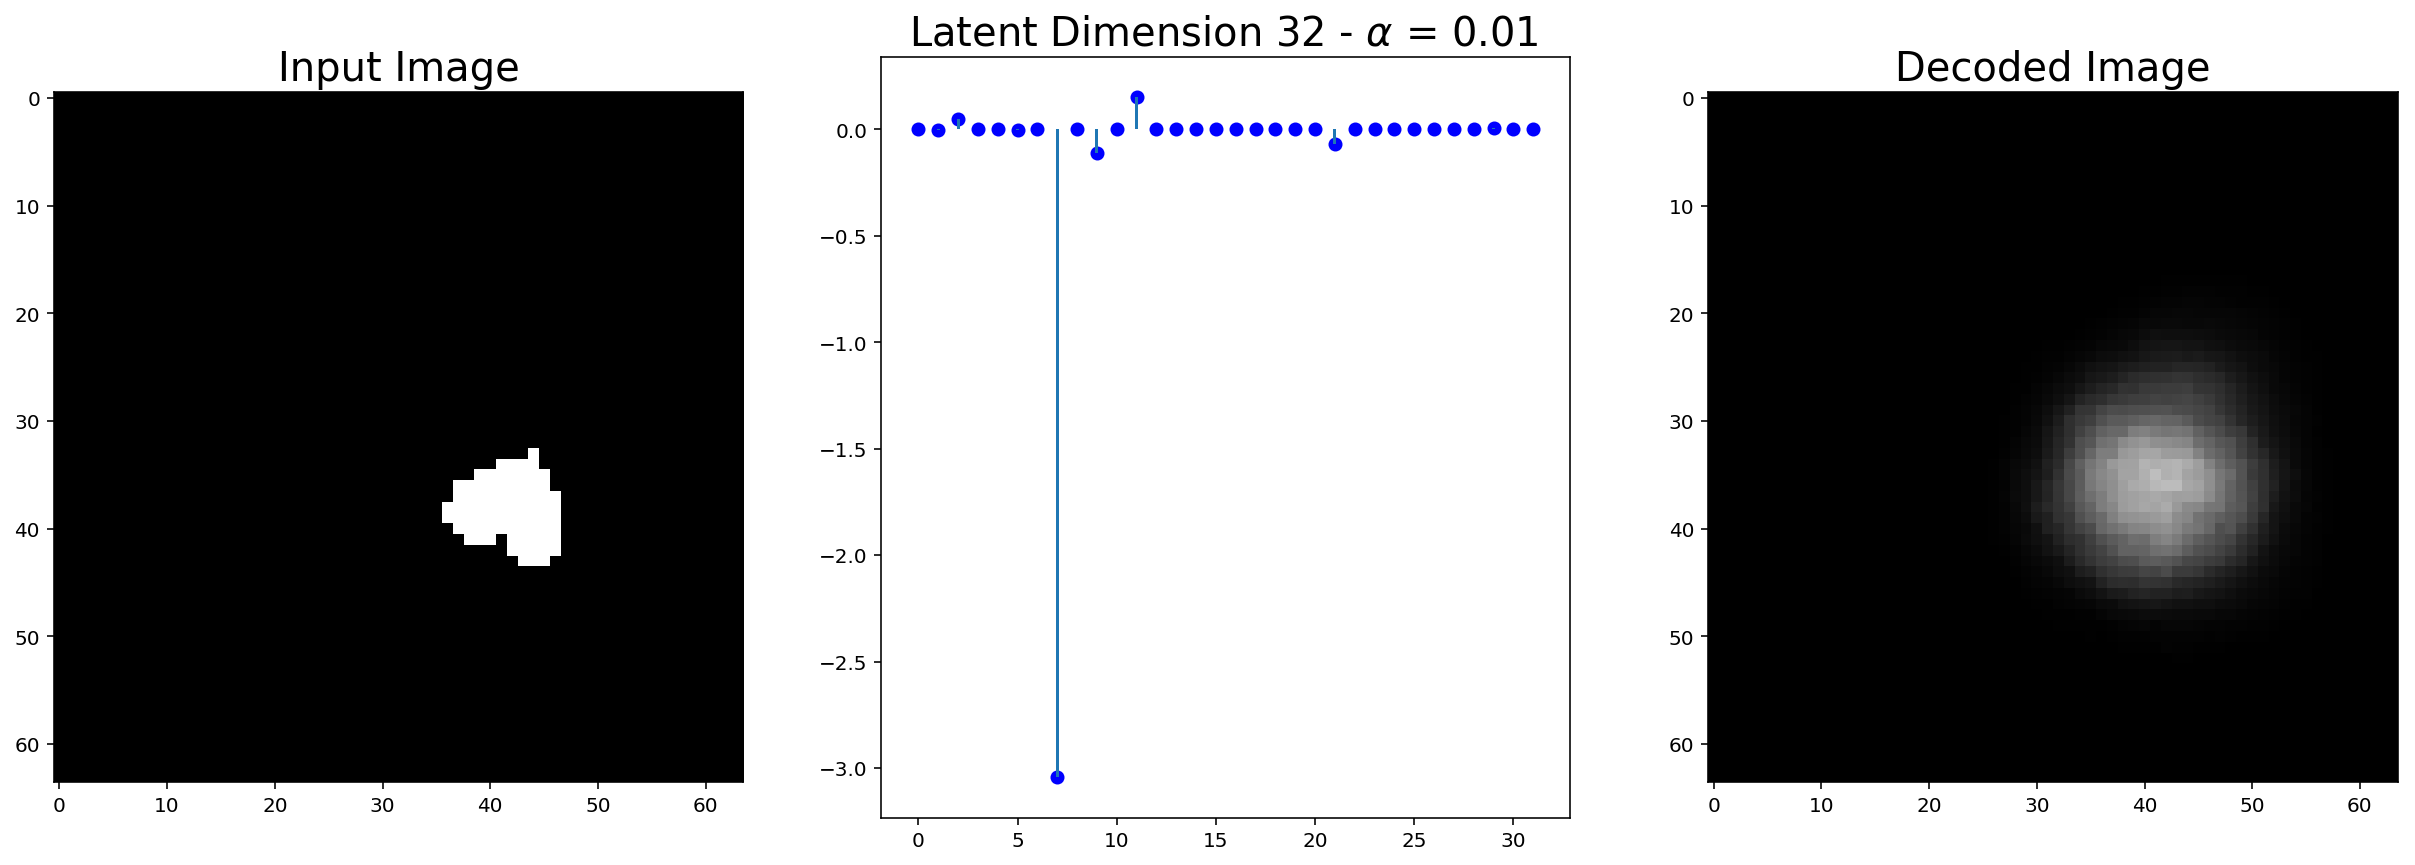

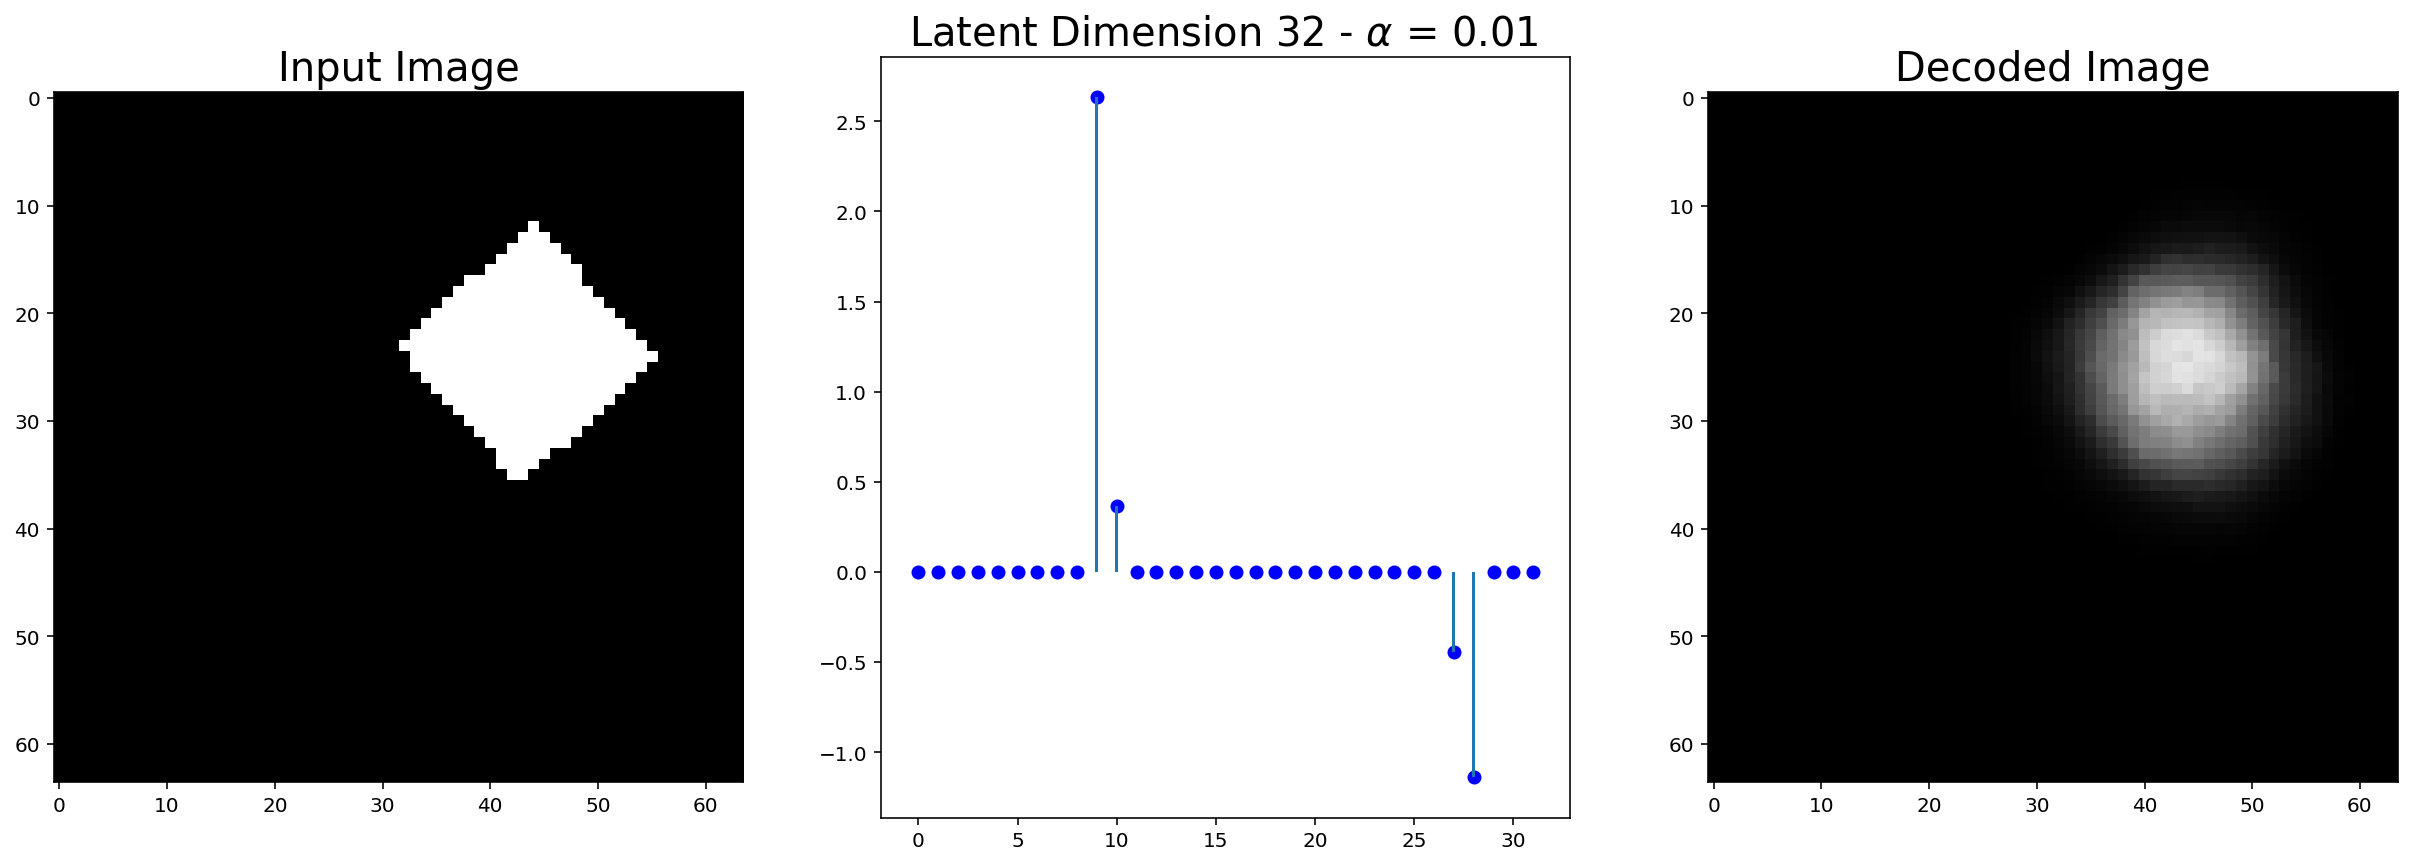

In [70]:
# TRAIN, 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 10 epochs
for i in range(5):
    plot_encoding(images_trn[i][None,:], vsc, latent_size, alpha)

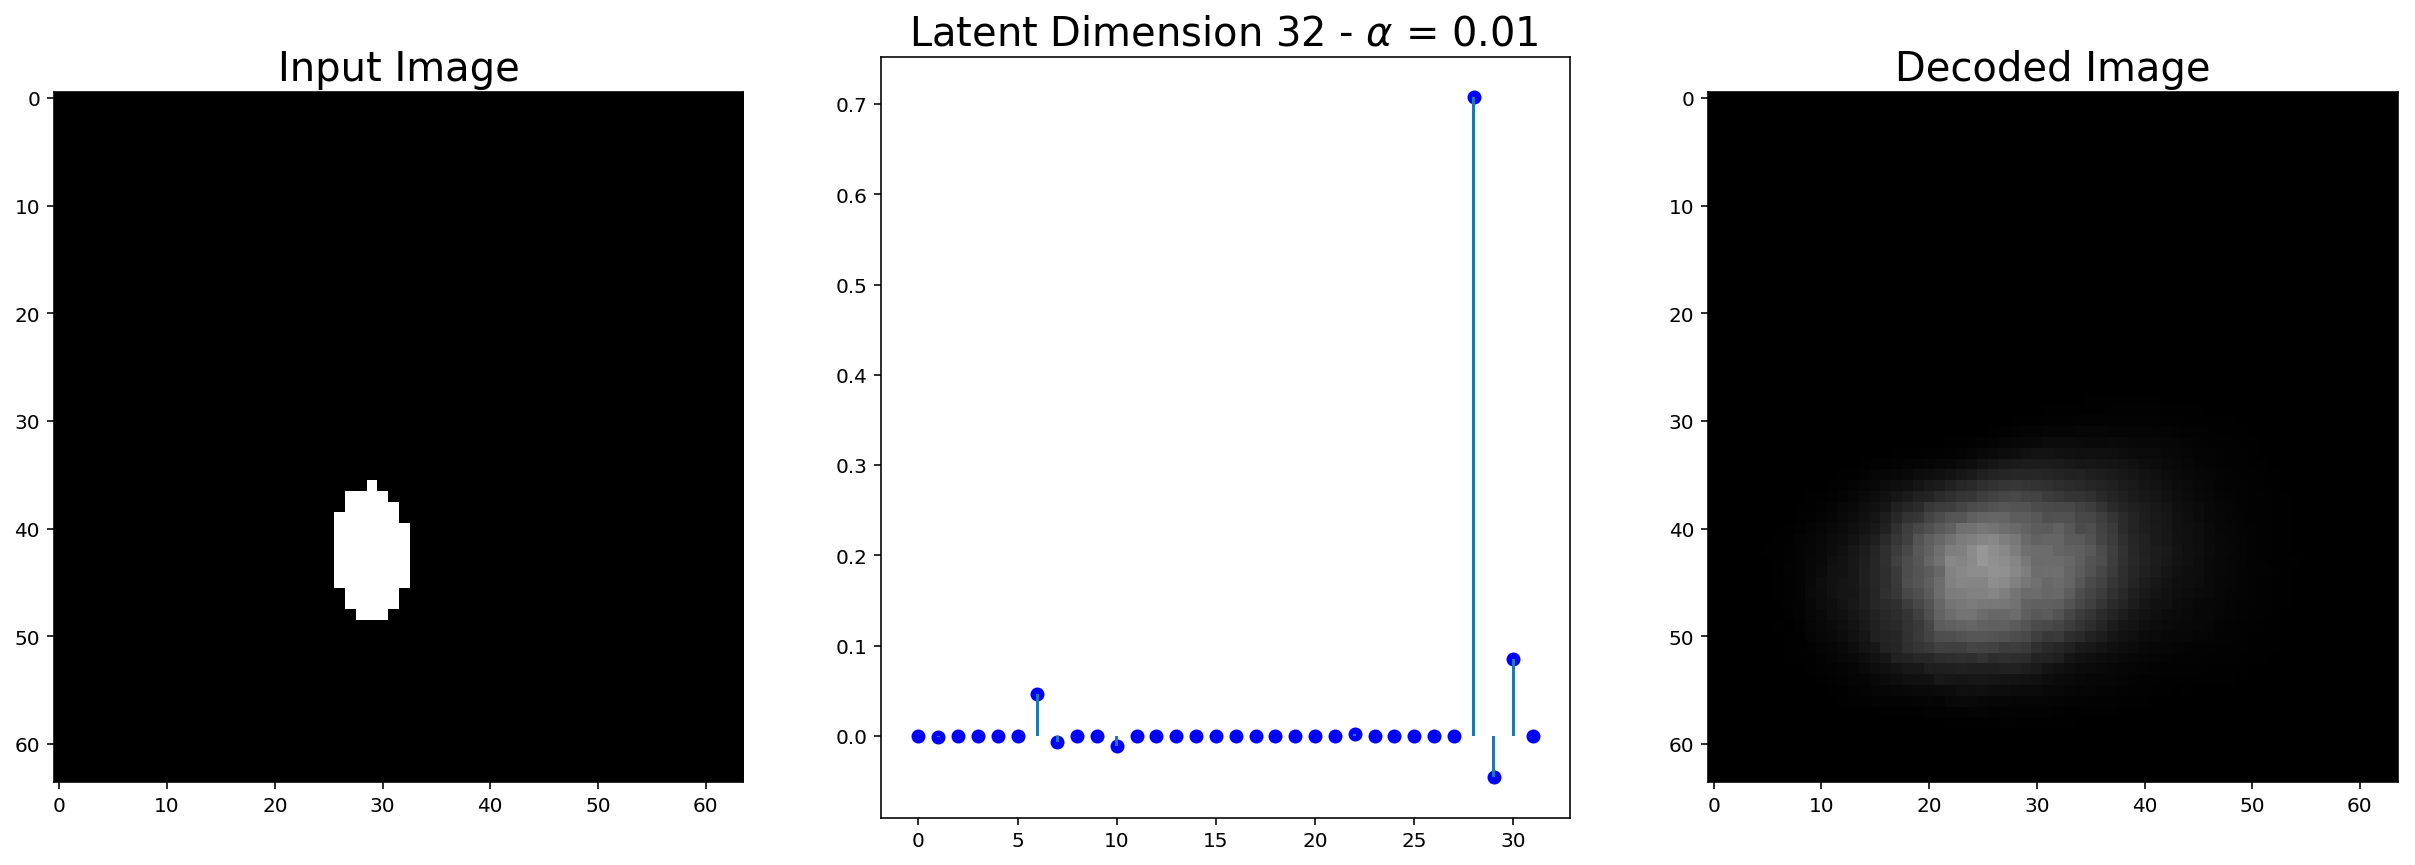

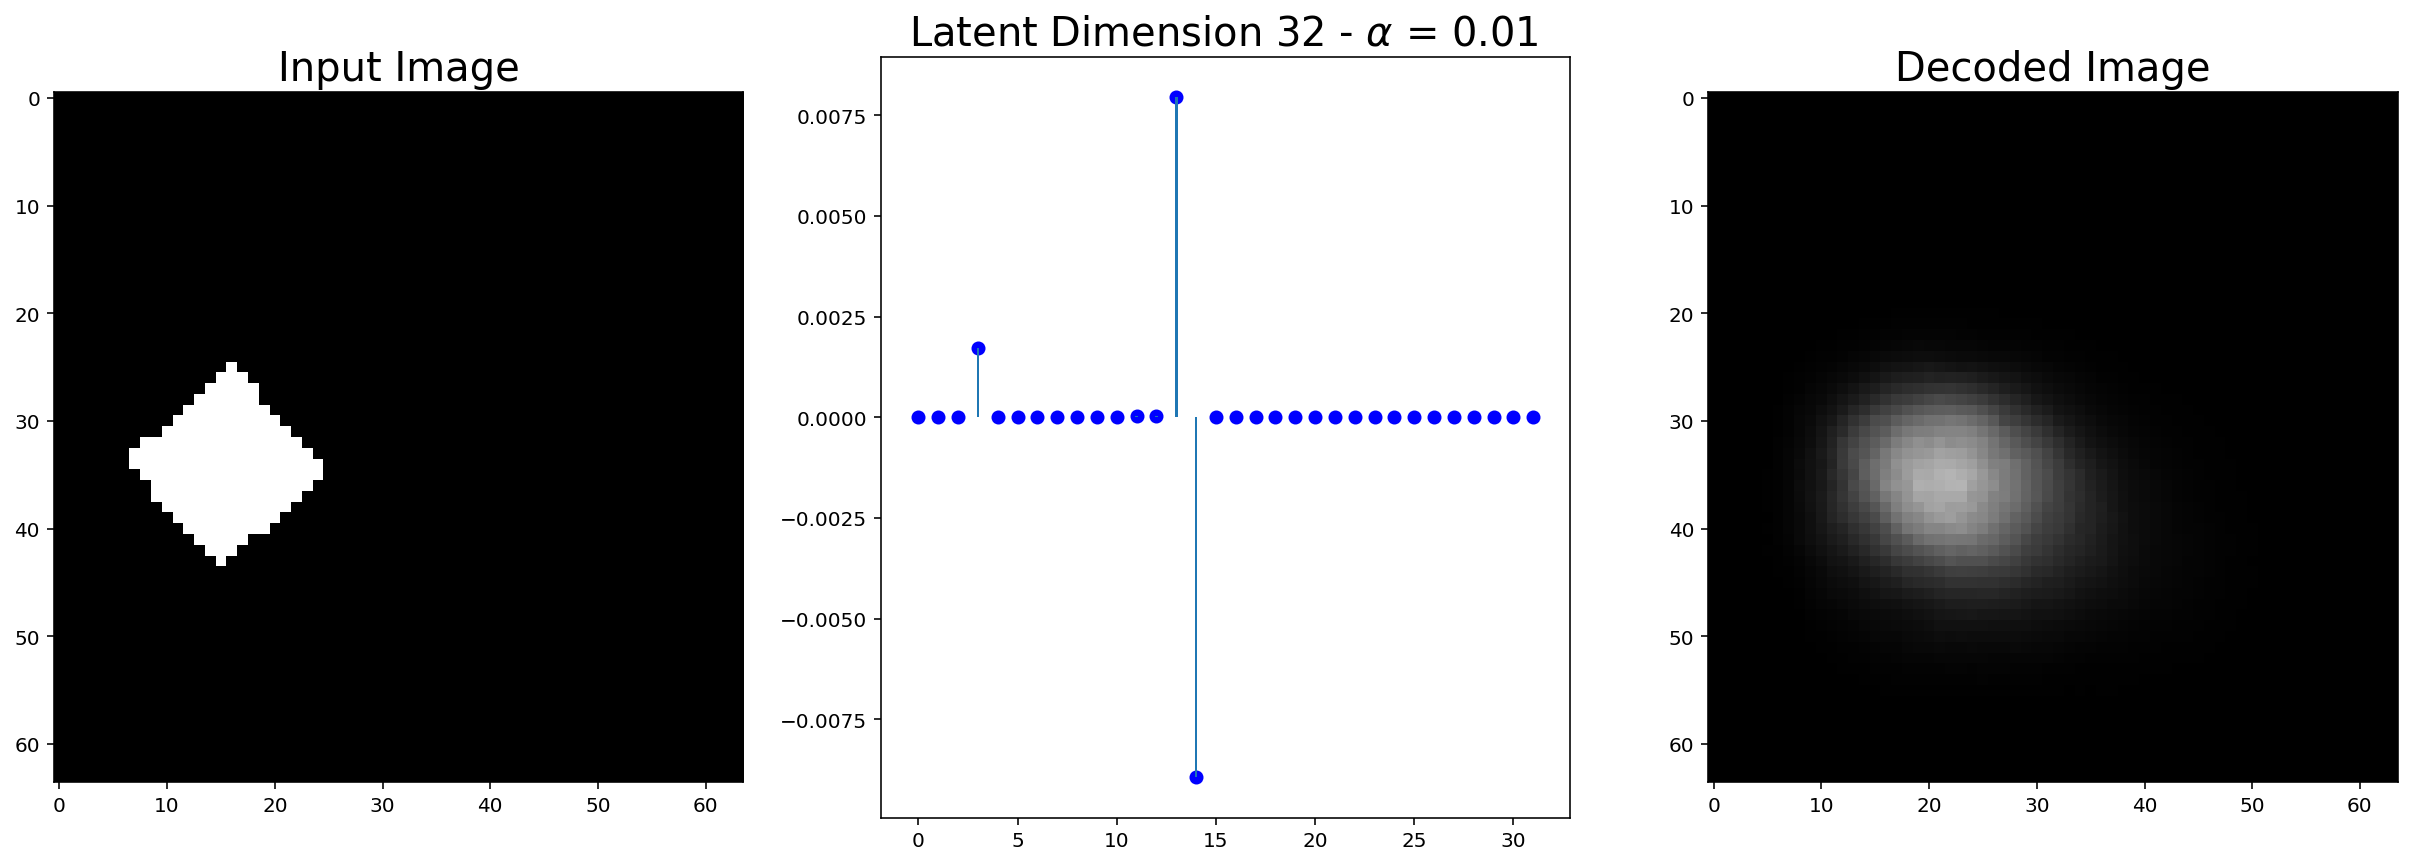

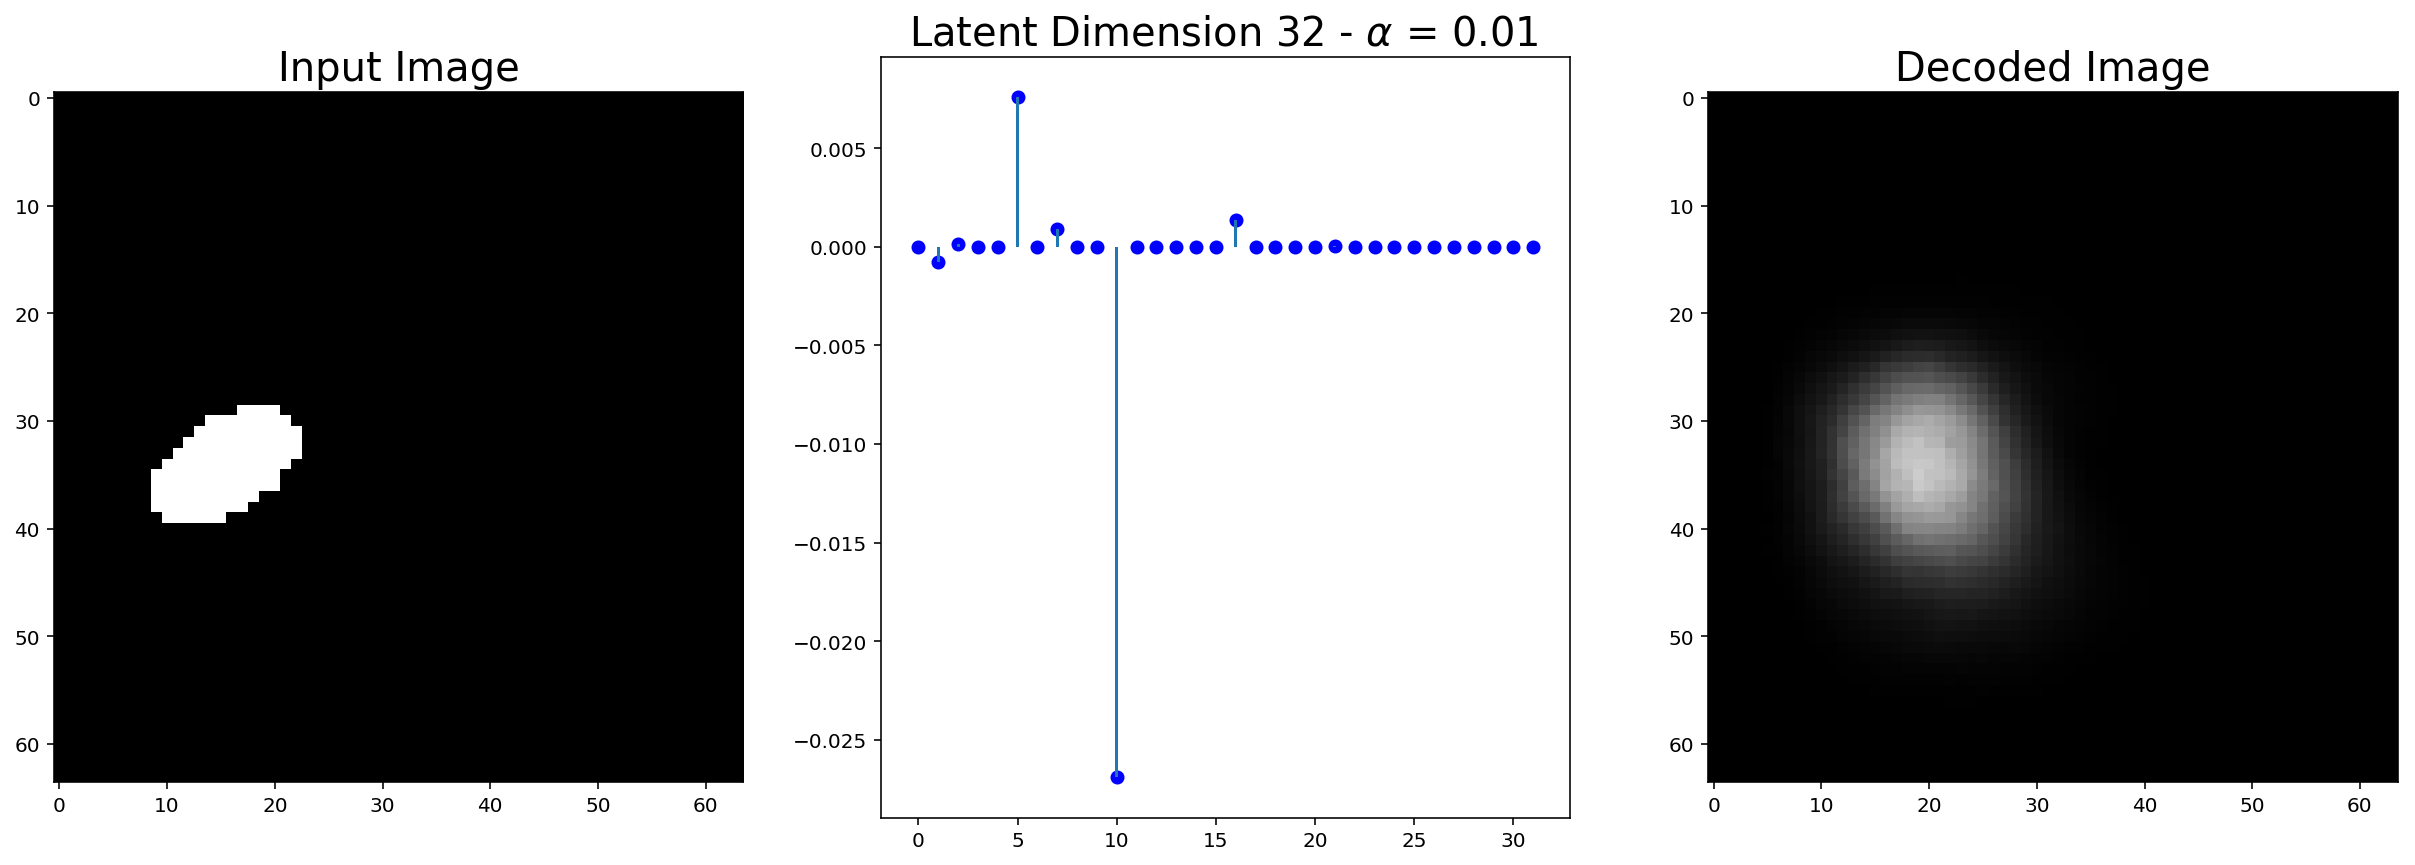

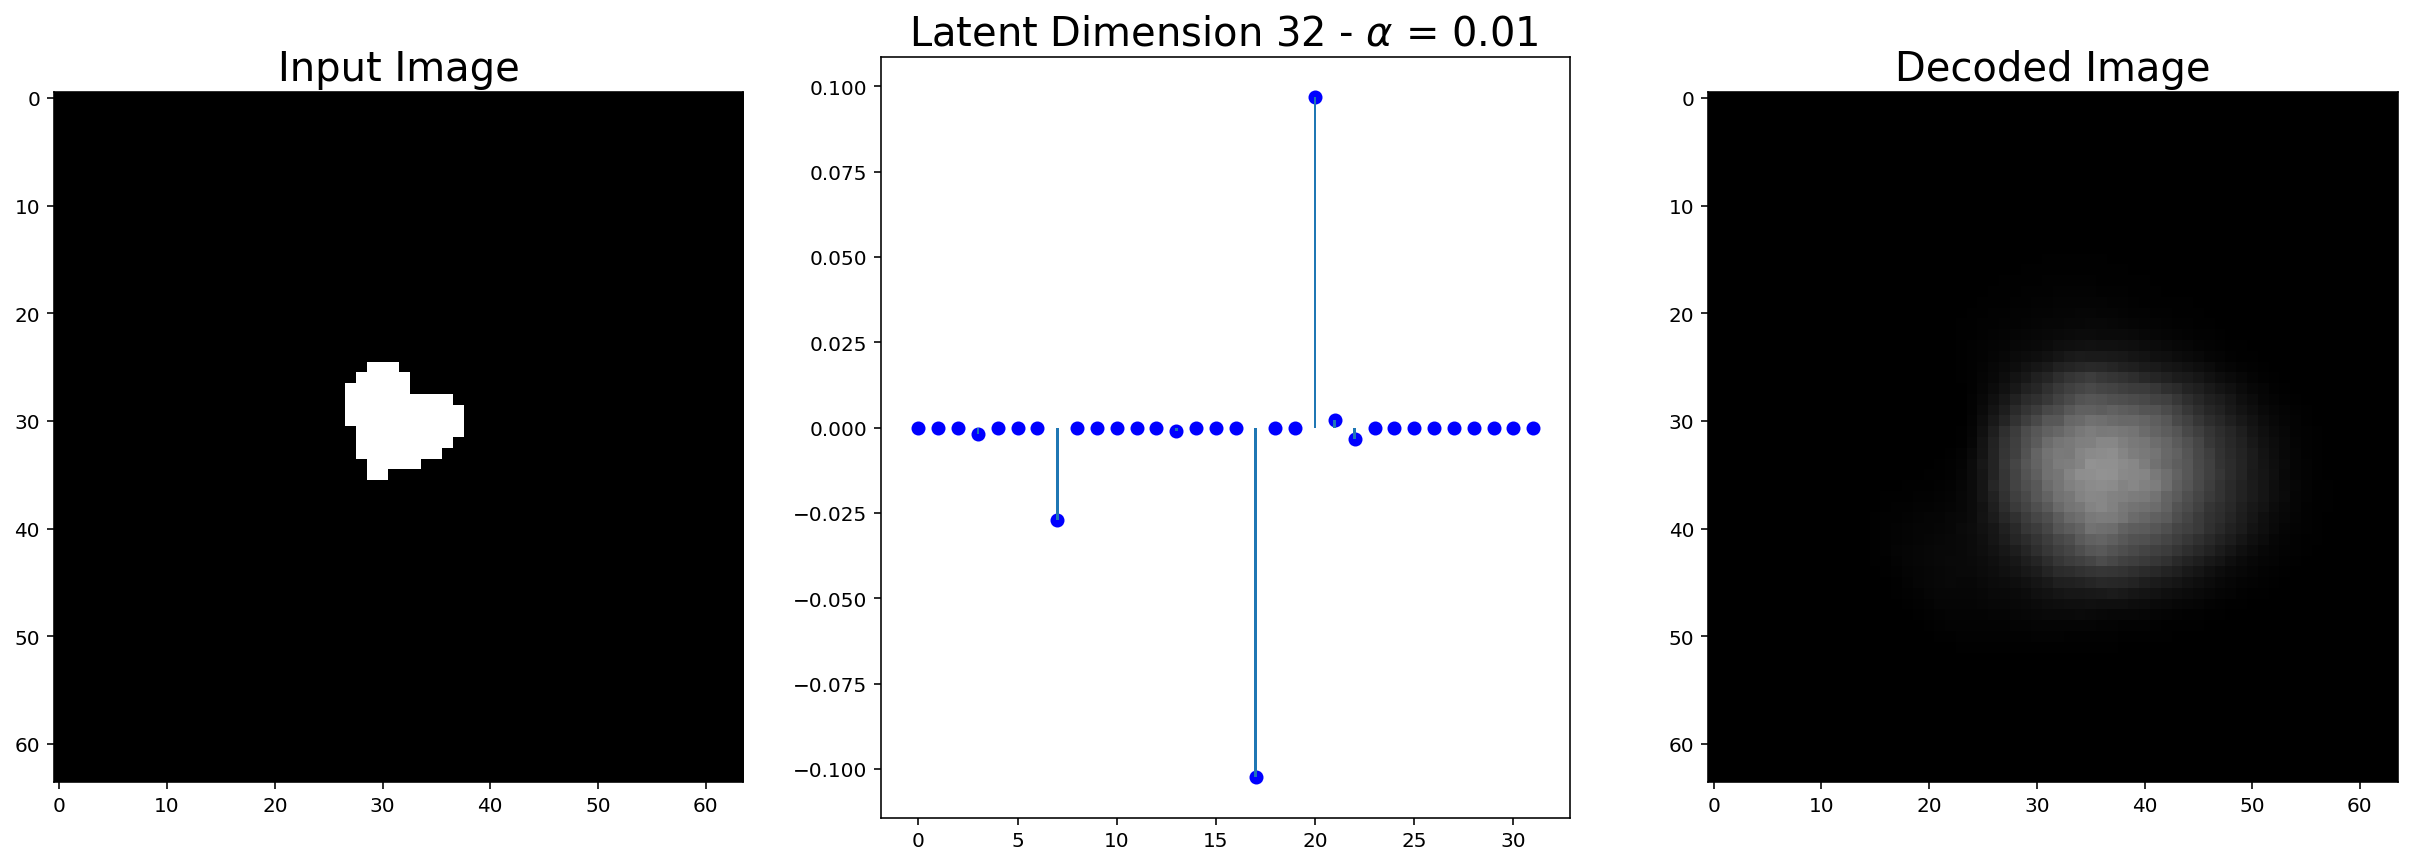

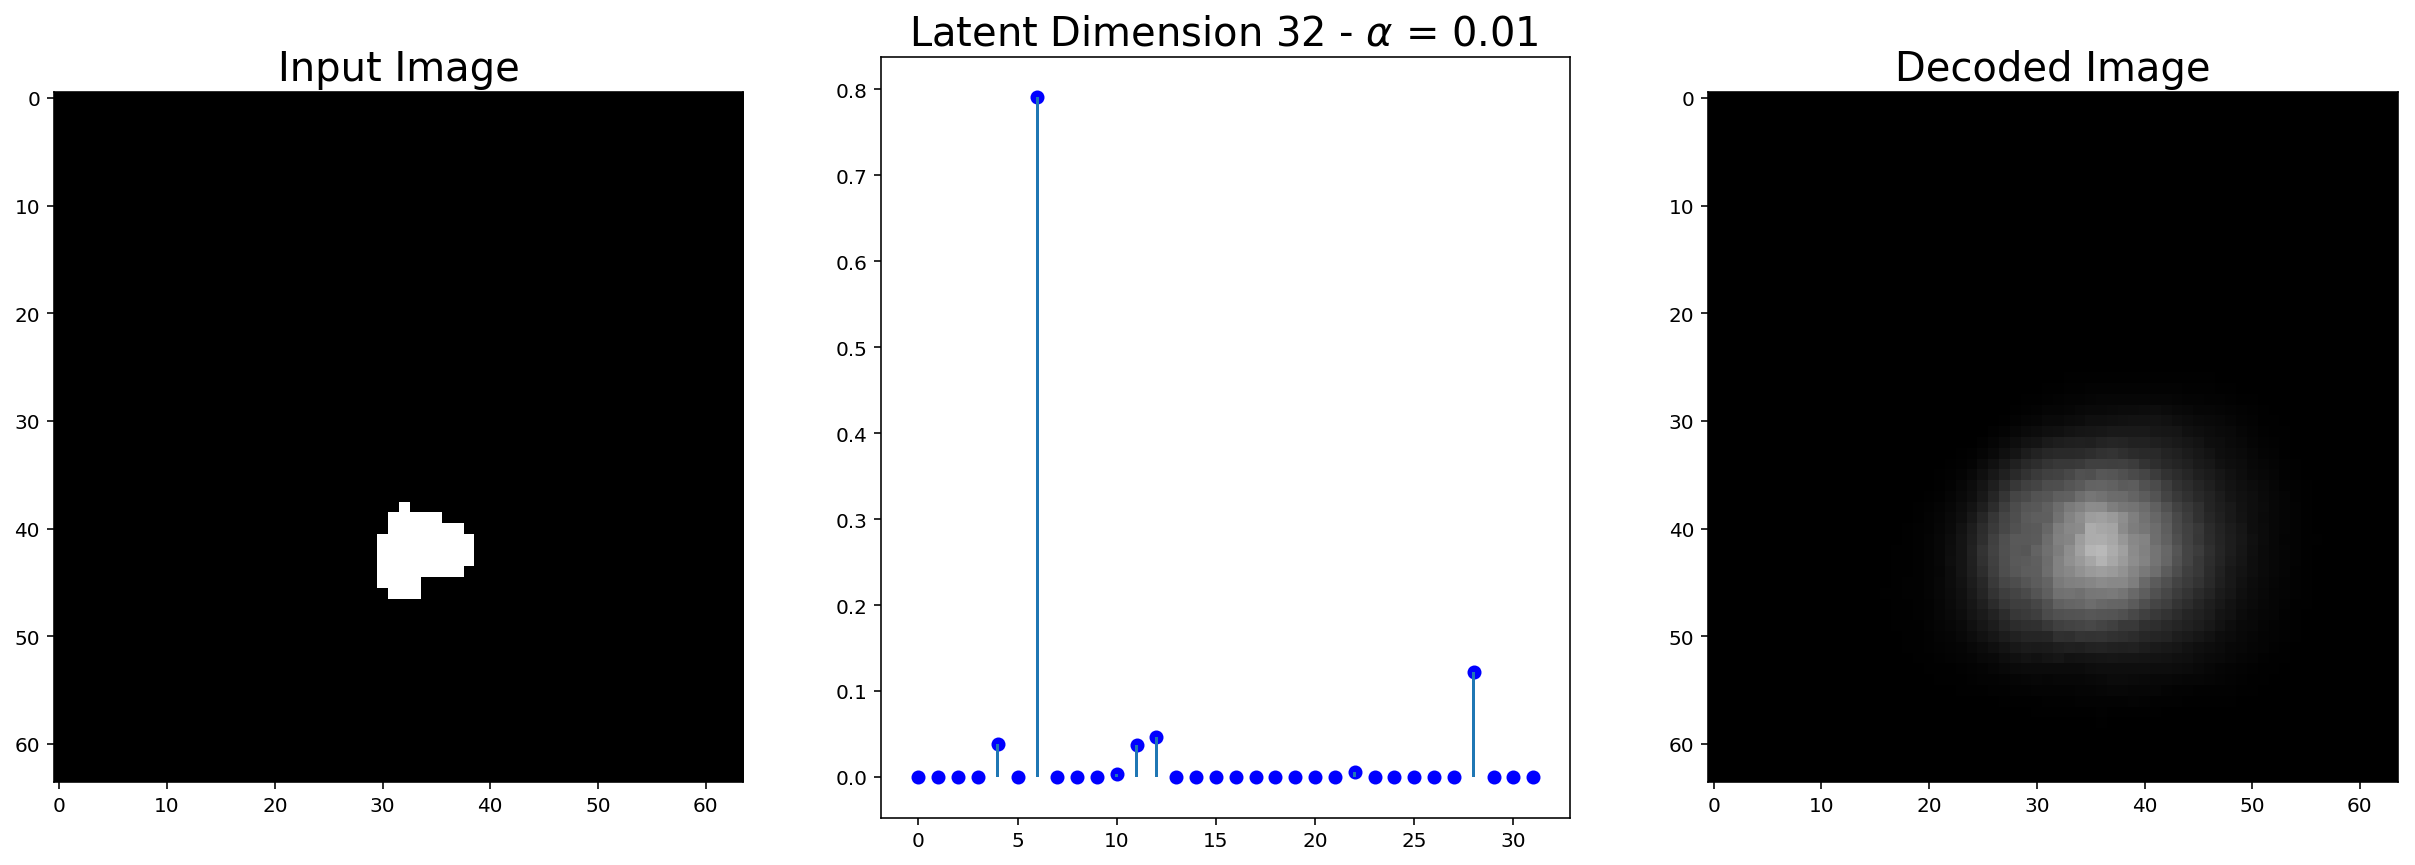

In [20]:
# TRAIN, 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 20 epochs
for i in range(5):
    plot_encoding(images_trn[i][None,:], vsc, latent_size, alpha)

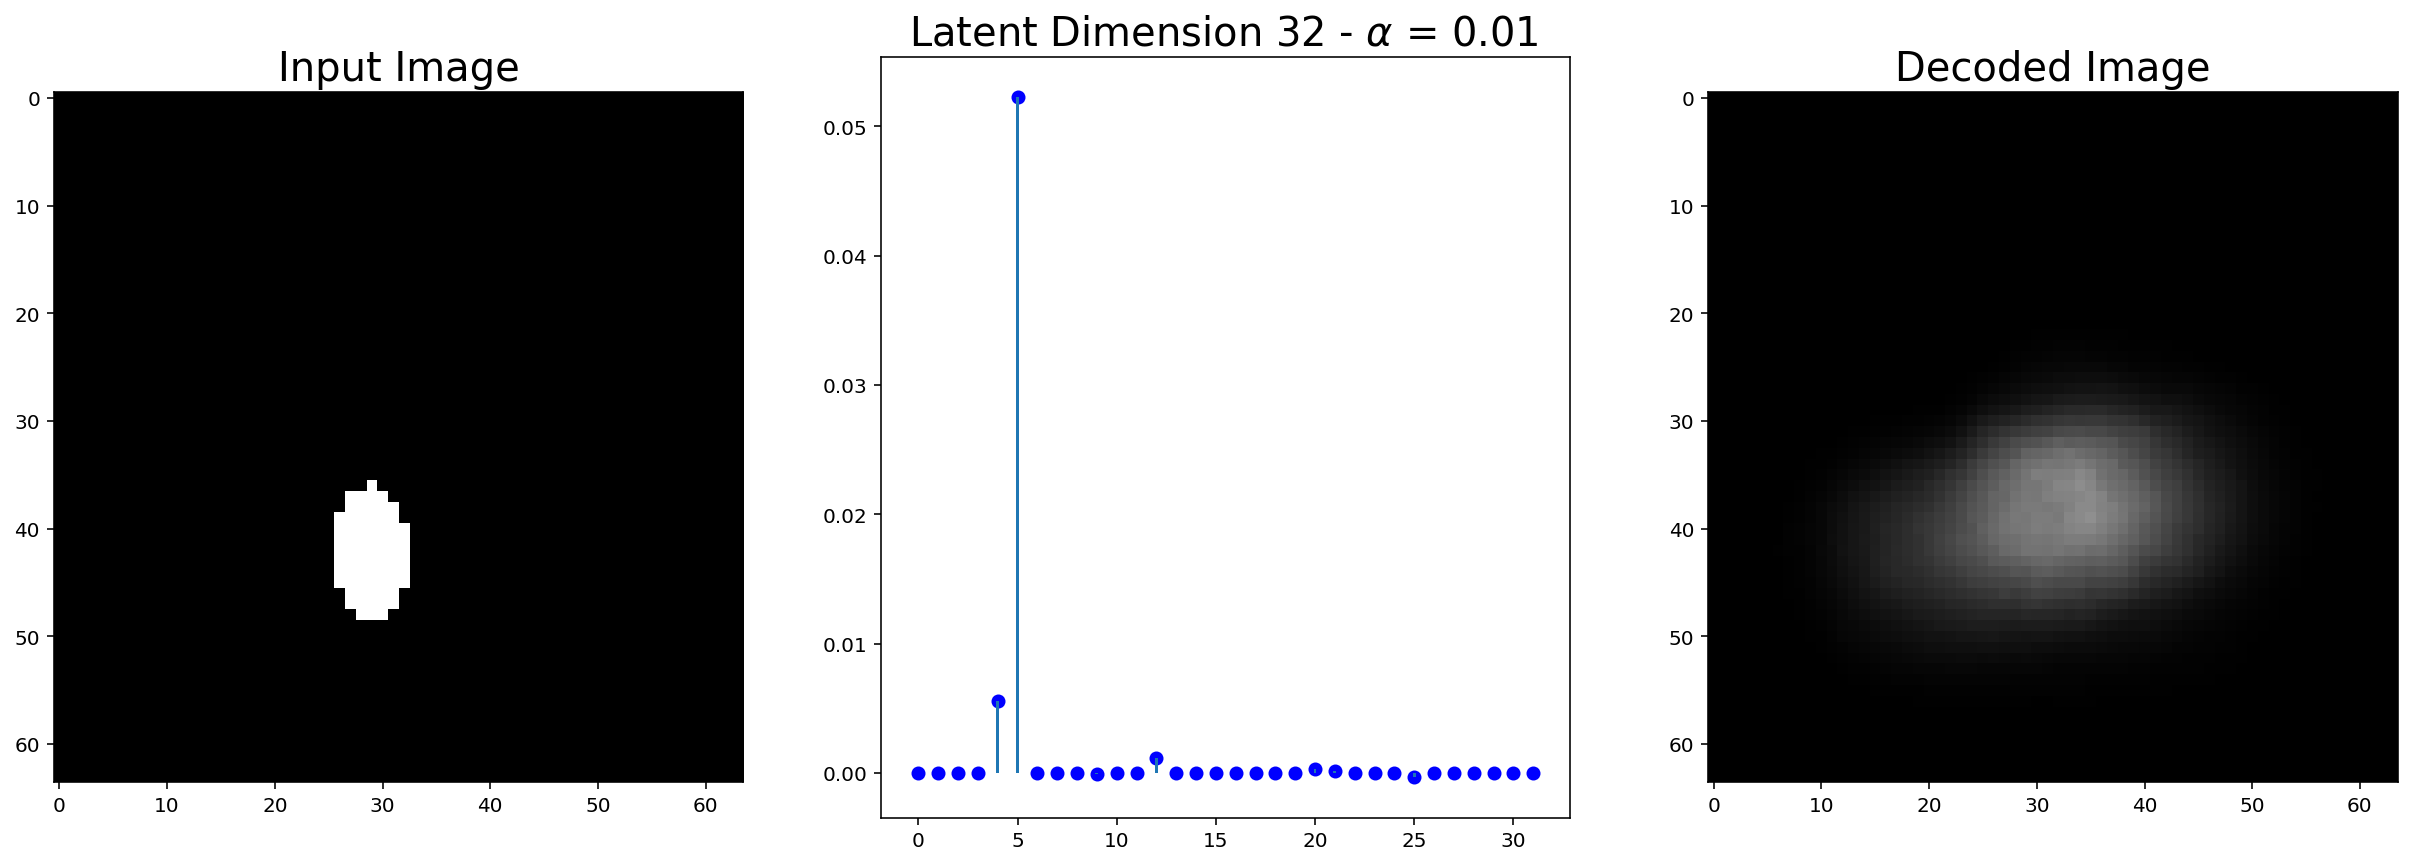

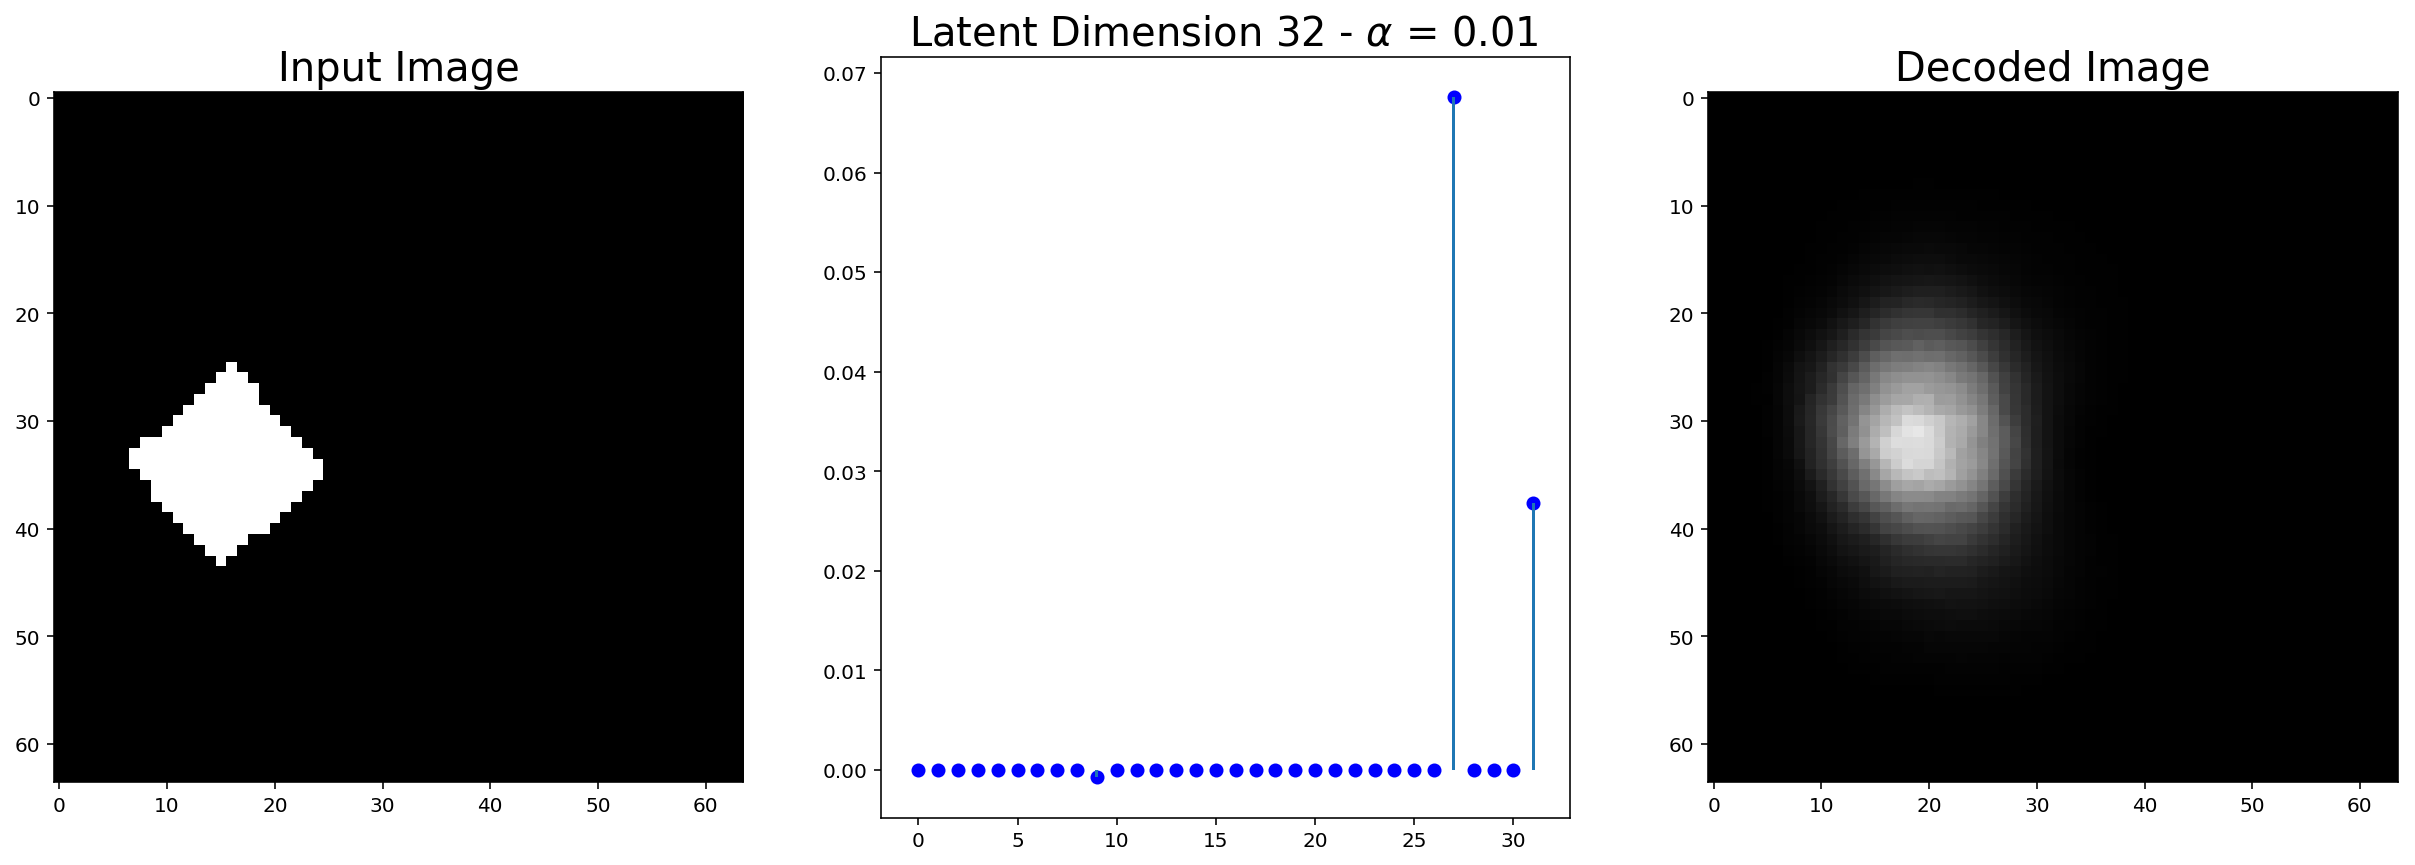

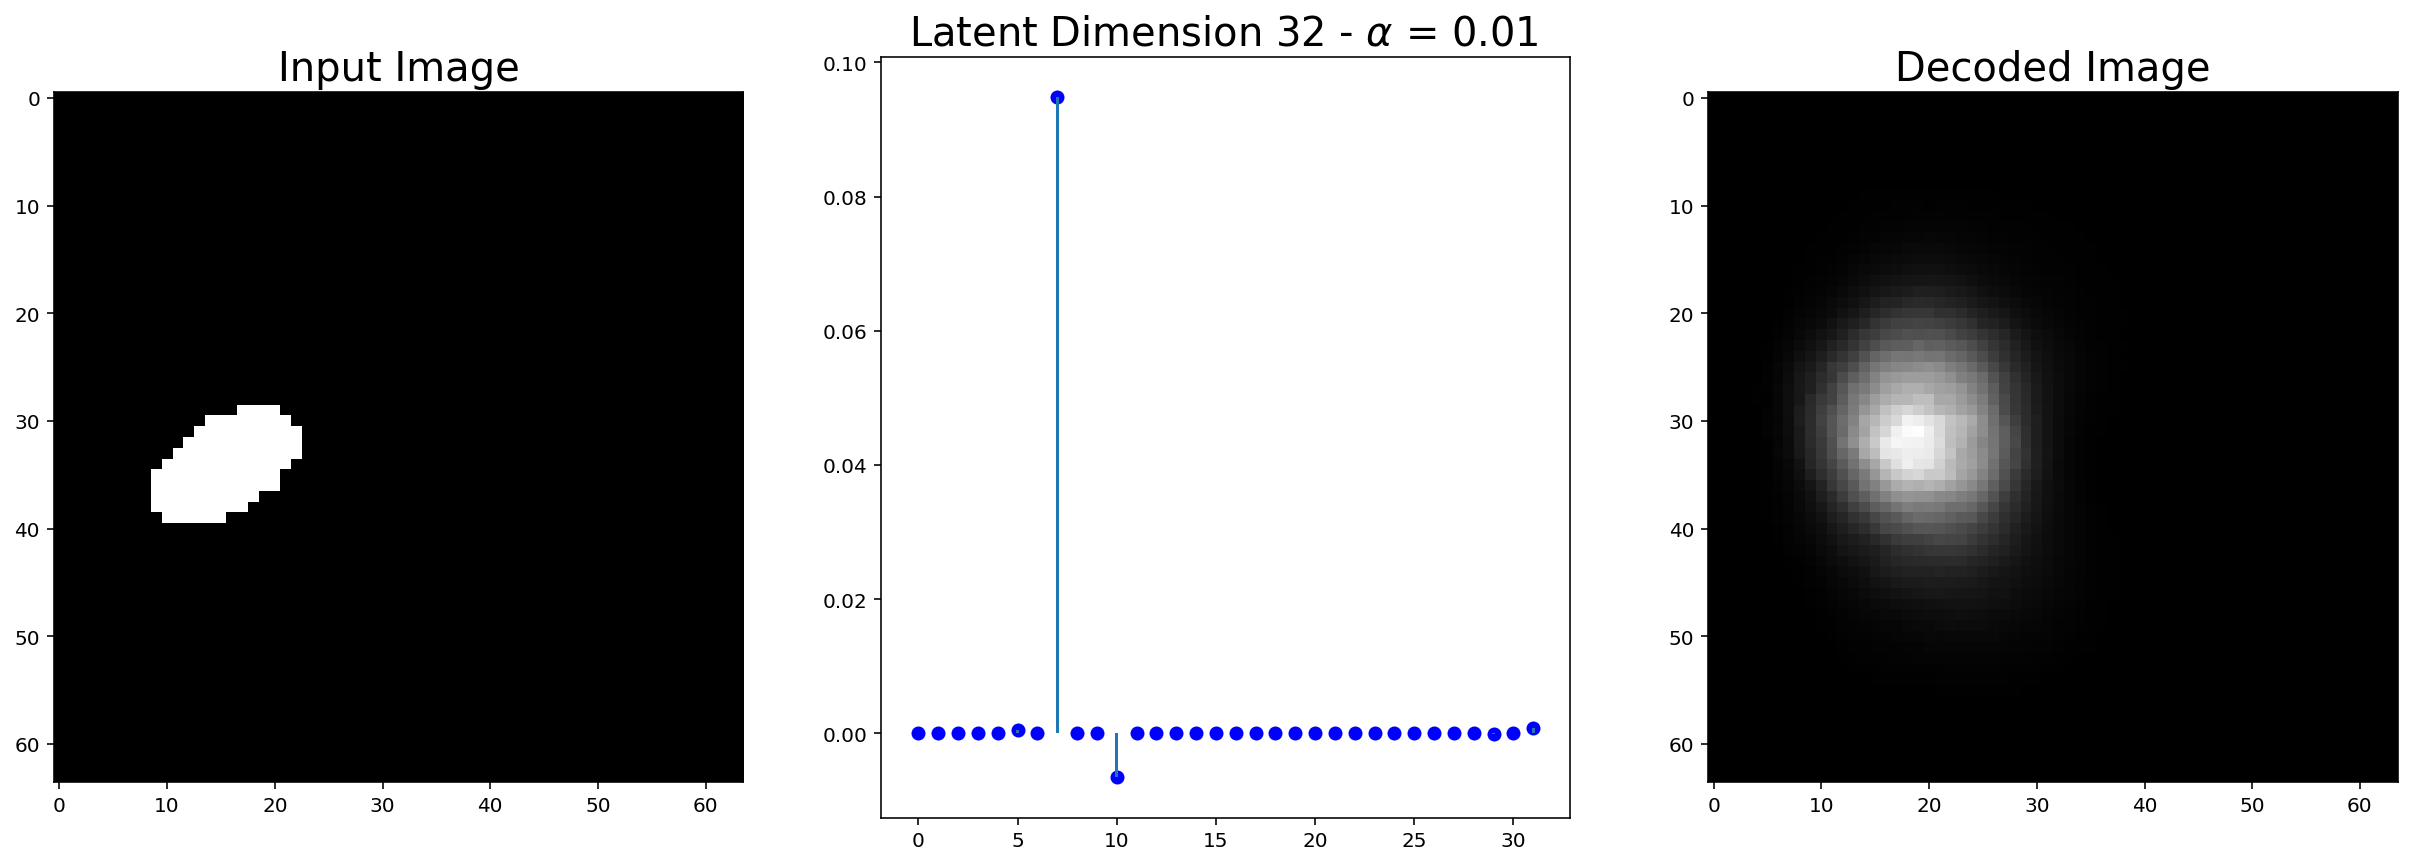

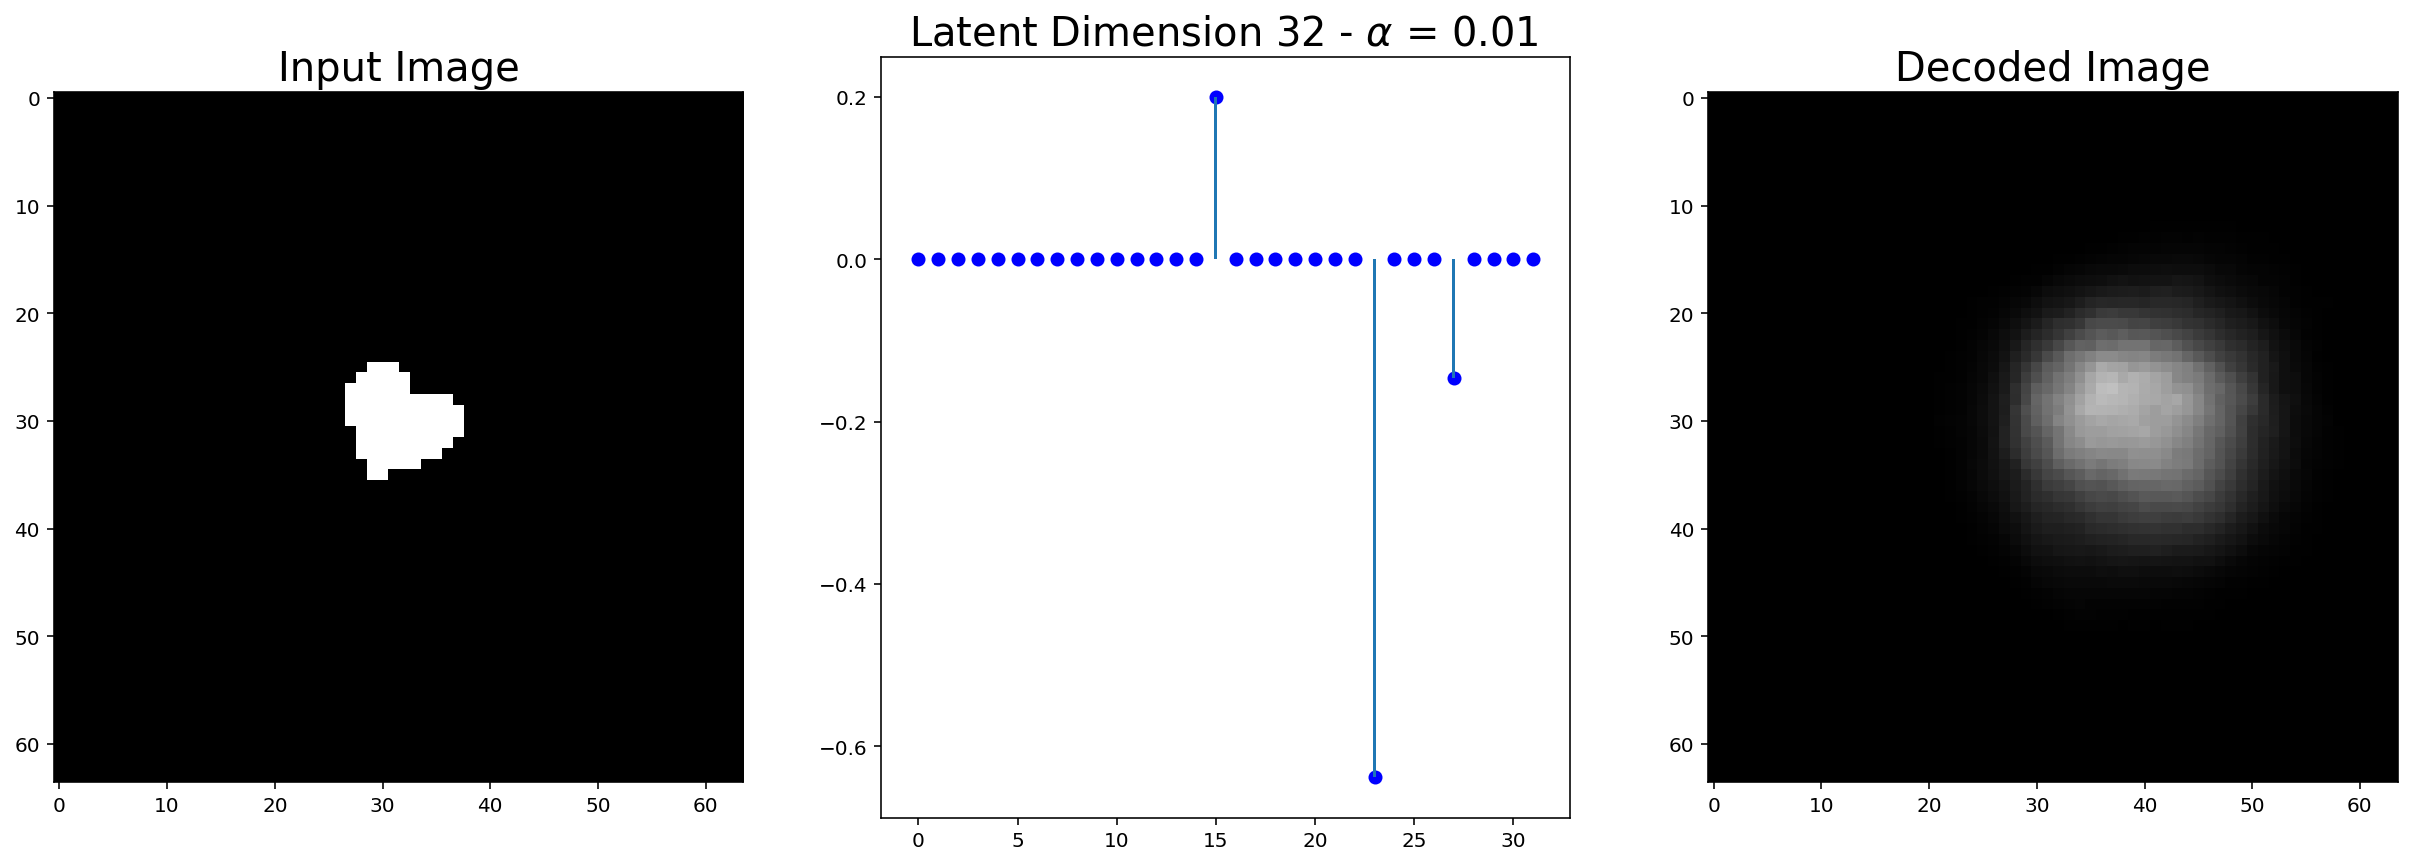

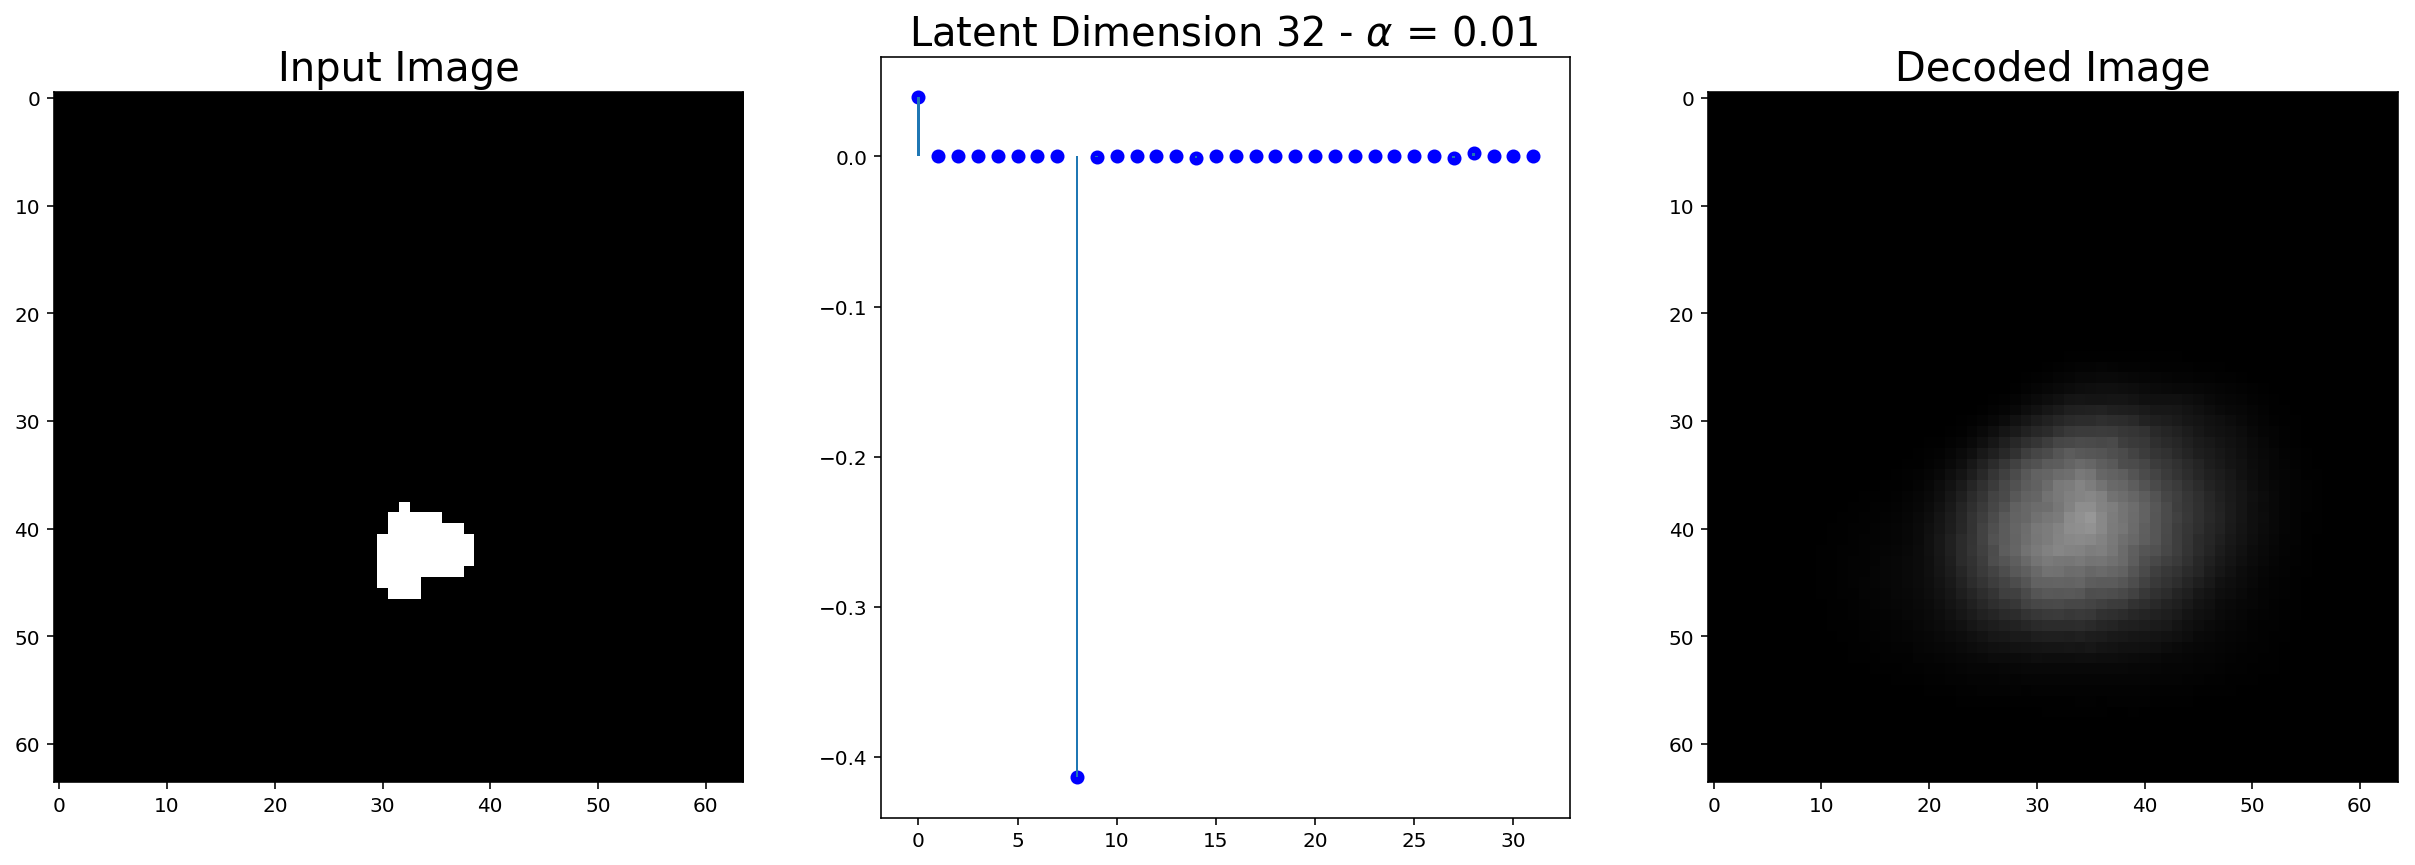

In [53]:
# TRAIN, 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 30 epochs
for i in range(5):
    plot_encoding(images_trn[i][None,:], vsc, latent_size, alpha)

## Traversal

In [70]:
import random

def plot_horizontal_traversal(image, vsc, latent_sz, alpha, length, 
                              delta, threshold=1e-5, plot_all=False, 
                              plot_list=None, width=1/4):
    flattened_image = vsc.normalize(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(flattened_image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    img = vsc.denormalize(vsc.model.decode(z))
    z_ = z.cpu().detach().numpy()[0]
    
#     plt.bar(np.arange(latent_sz), height=z_, width=width, align='center')
#     plt.scatter(np.arange(latent_sz), z_, color='blue')
#     plt.show()
    
    non_zero = [i for i in range(latent_sz) if np.abs(z_[i]) > threshold]
    print(non_zero)
    ind = random.choice(non_zero)
    print(ind, non_zero)
    
    if not plot_all:
        non_zero = [ind]
    if plot_list:
        non_zero = plot_list
    
    hor_traversal = []
    for ind in non_zero:
        images = []
        z1 = z.clone()
        for i in range(length):
            img = to_numpy(vsc.model.decode(z1), vsc)
            img = np.transpose(img, (1,2,0))
            img[:,0] = 1
            img[:,-1] = 1
            img[0,:] = 1
            img[-1,:] = 1
            images.append(img)
            z1[0, ind] = z1[0, ind] + delta if z[0,ind] < 0 else z1[0, ind] - delta

        hor_traversal.append(np.concatenate(images, axis=1))
    traversal = np.concatenate(hor_traversal, axis=0)
#     plt.figure(figsize=(15,15))
#     plt.axis('off')
#     plt.imshow(traversal)
#     plt.show()
    return traversal

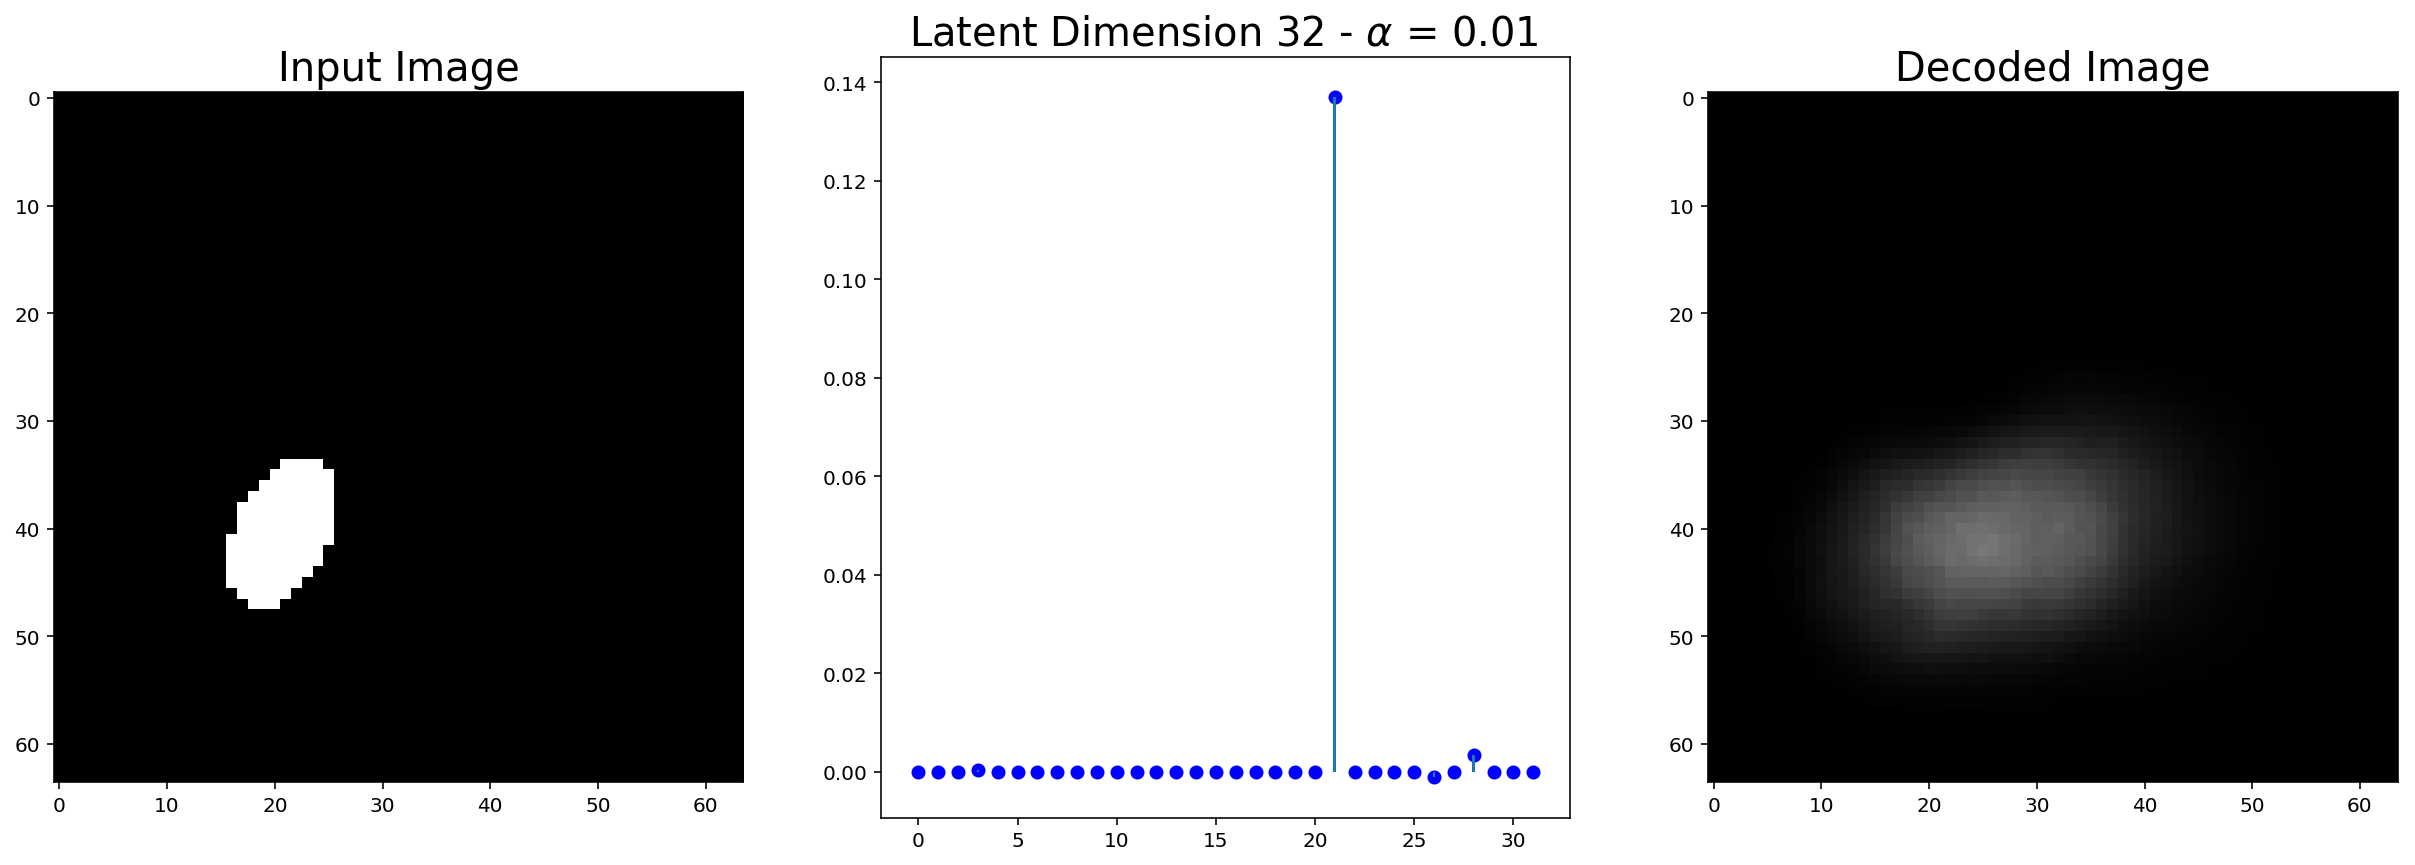

In [45]:
plot_encoding(images[2][None,:], vsc, latent_size, alpha)

In [47]:
hor = plot_horizontal_traversal(images[2][None,:], vsc, latent_size, 
                                alpha, length=8, delta=0.1, threshold=3e-2,
                                plot_all=False)

29 [4, 11, 20, 21, 29]


In [48]:
hor = plot_horizontal_traversal(images[0][None,:], vsc, latent_size, 
                                alpha, length=8, delta=0.1, threshold=3e-1,
                                plot_all=False, plot_list=[4, 11, 20, 21, 29])

29 [8, 29]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


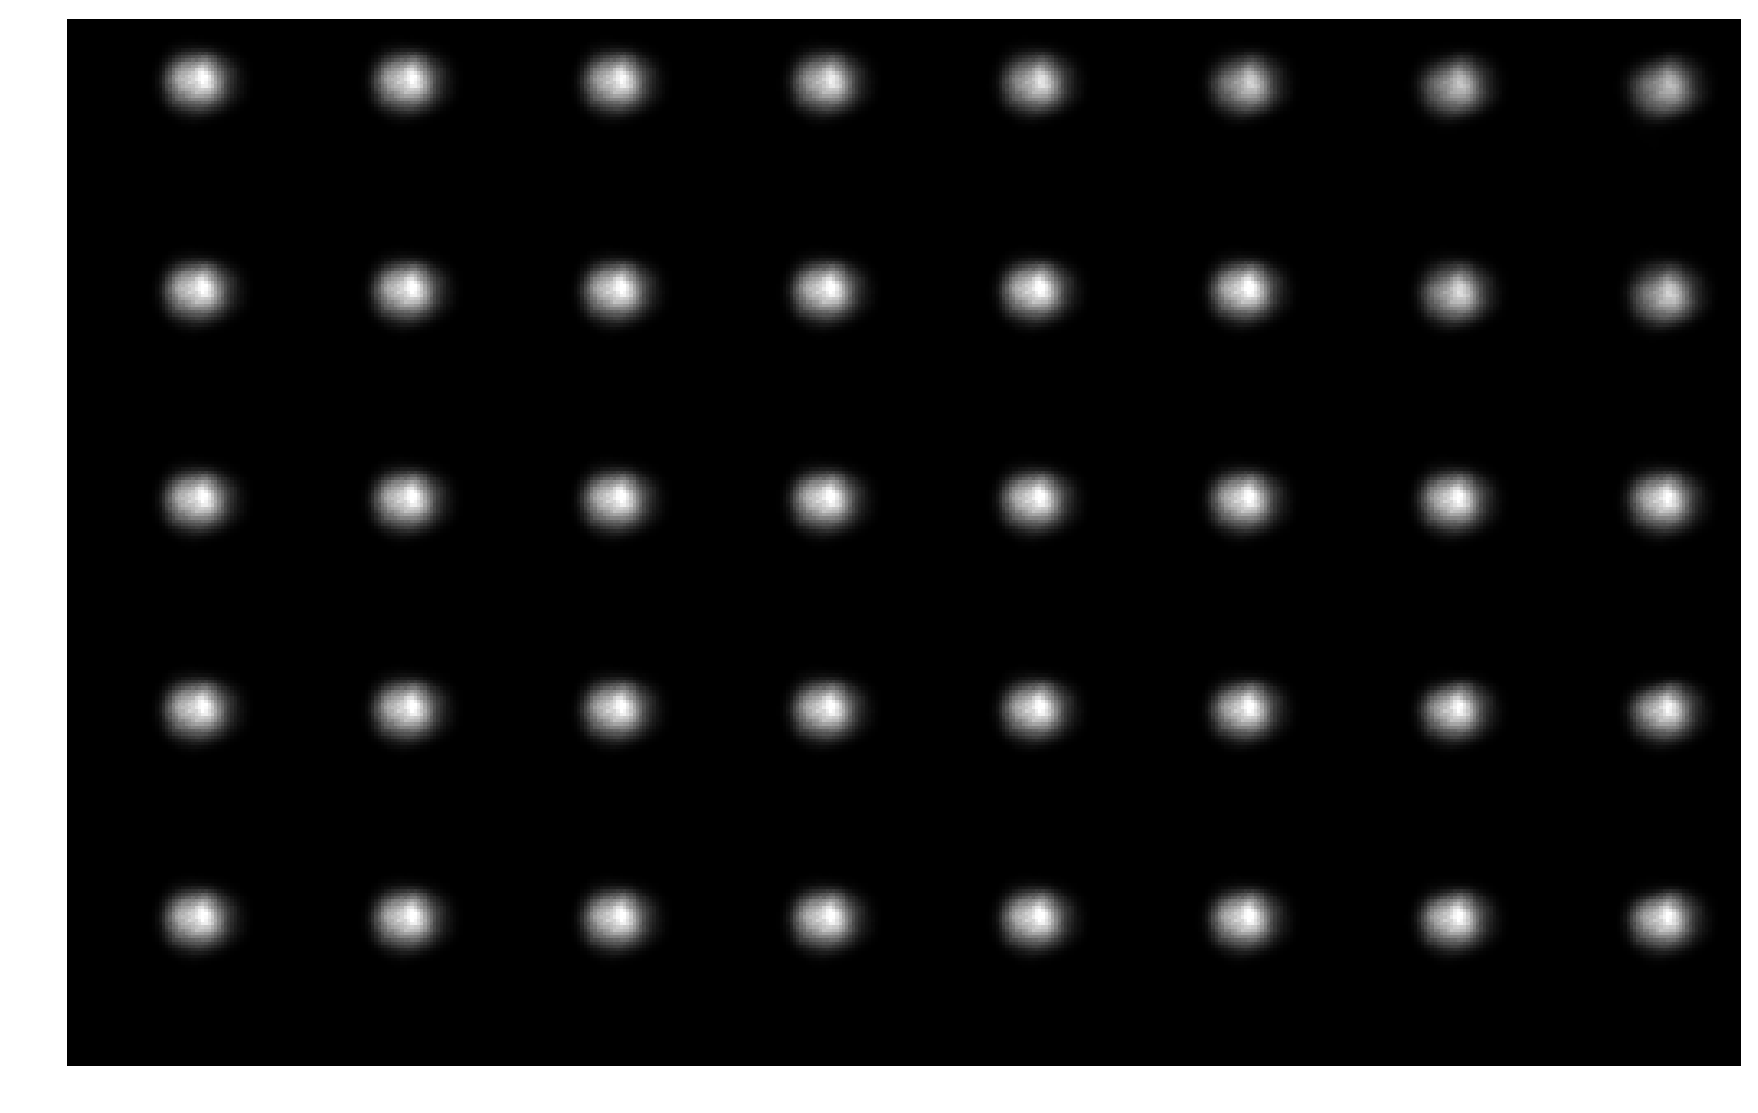

In [49]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(np.concatenate([hor], axis=0) * 255)
plt.show()

In [73]:
final = [plot_horizontal_traversal(images[idx][None,:], vsc, latent_size, 
                                alpha, length=8, delta=d, threshold=3e-6,
                                plot_all=False, plot_list=[dim]) \
         for idx, d, dim in [(3, -0.1, i) for i in range(30)]]

[2, 6, 10, 12, 14, 19, 22]
19 [2, 6, 10, 12, 14, 19, 22]
[0, 5, 10, 14, 17, 18, 28, 29, 31]
14 [0, 5, 10, 14, 17, 18, 28, 29, 31]
[5, 9, 26, 31]
26 [5, 9, 26, 31]
[2, 5, 7, 19, 20, 25]
7 [2, 5, 7, 19, 20, 25]
[1, 7, 10, 16, 18, 22, 26, 29]
29 [1, 7, 10, 16, 18, 22, 26, 29]
[5, 10, 16, 20, 22, 23]
20 [5, 10, 16, 20, 22, 23]
[6, 13, 19, 23, 24, 27, 30]
19 [6, 13, 19, 23, 24, 27, 30]
[2, 3, 6, 7, 9, 10, 12, 16, 17, 23, 24, 25, 28]
9 [2, 3, 6, 7, 9, 10, 12, 16, 17, 23, 24, 25, 28]
[0, 7, 8, 18, 30]
18 [0, 7, 8, 18, 30]
[1, 2, 15, 20, 25]
25 [1, 2, 15, 20, 25]
[3, 5, 13, 16, 17, 28]
16 [3, 5, 13, 16, 17, 28]
[0, 5, 8, 14, 16, 17, 19, 23, 25, 28]
17 [0, 5, 8, 14, 16, 17, 19, 23, 25, 28]
[4, 14, 23, 25, 31]
31 [4, 14, 23, 25, 31]
[8, 16, 29, 30]
8 [8, 16, 29, 30]
[2, 7, 15, 21, 30]
30 [2, 7, 15, 21, 30]
[9, 17, 22, 25, 31]
17 [9, 17, 22, 25, 31]
[4, 7, 10, 16, 19, 20, 23, 27]
23 [4, 7, 10, 16, 19, 20, 23, 27]
[2, 6]
6 [2, 6]
[5, 7, 11, 13, 23, 26]
26 [5, 7, 11, 13, 23, 26]
[2, 9, 11, 17, 23, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


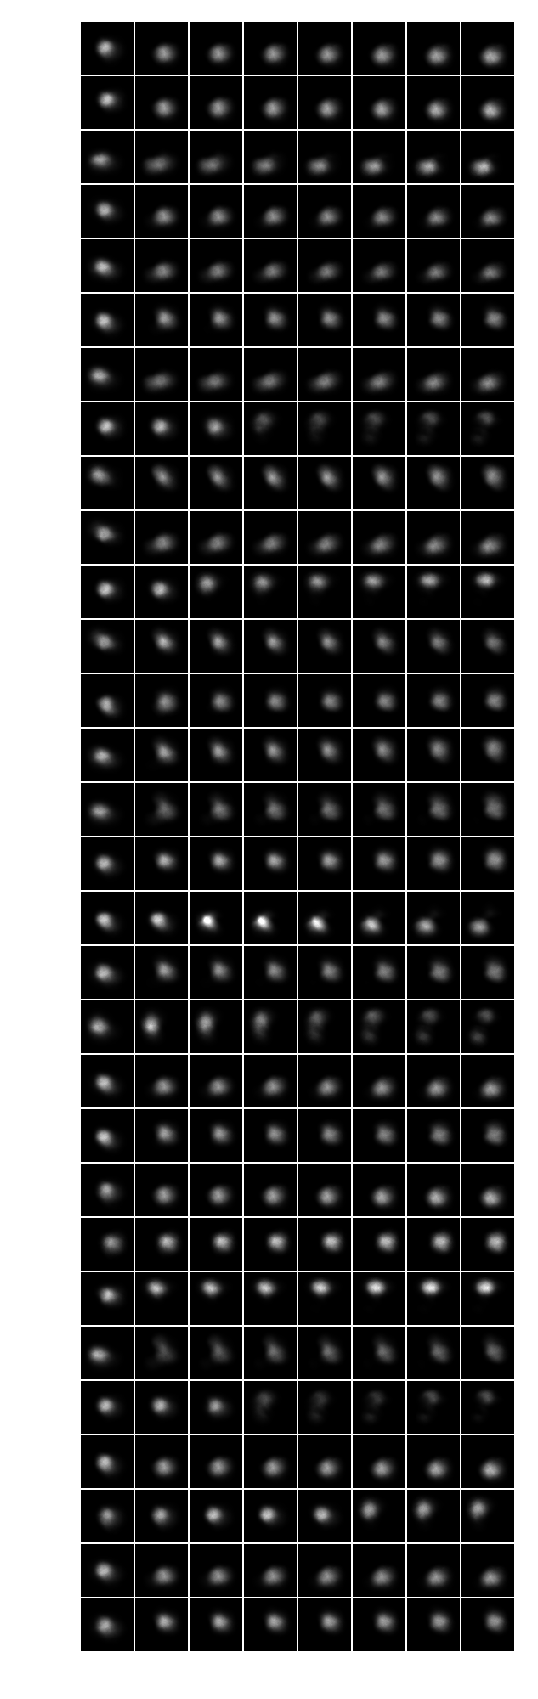

In [72]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(np.concatenate(final, axis=0) * 255)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


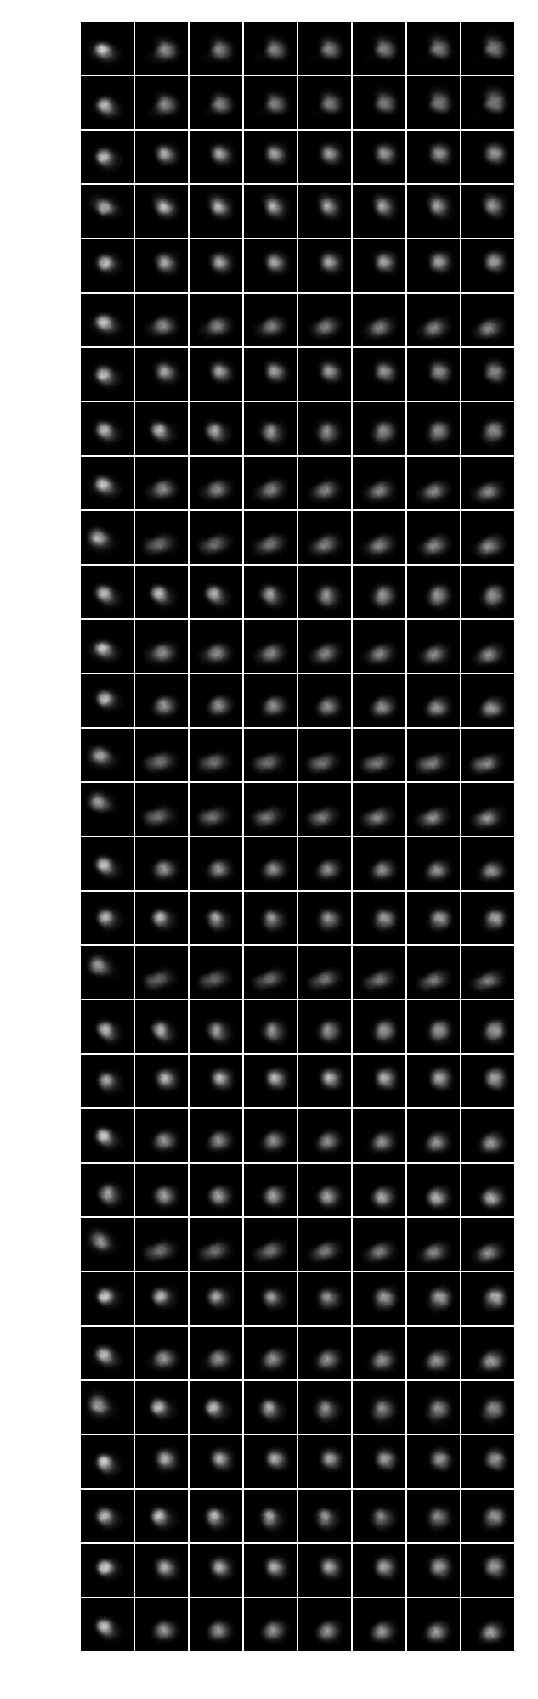

In [74]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(np.concatenate(final, axis=0) * 255)
plt.show()

## More tests

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


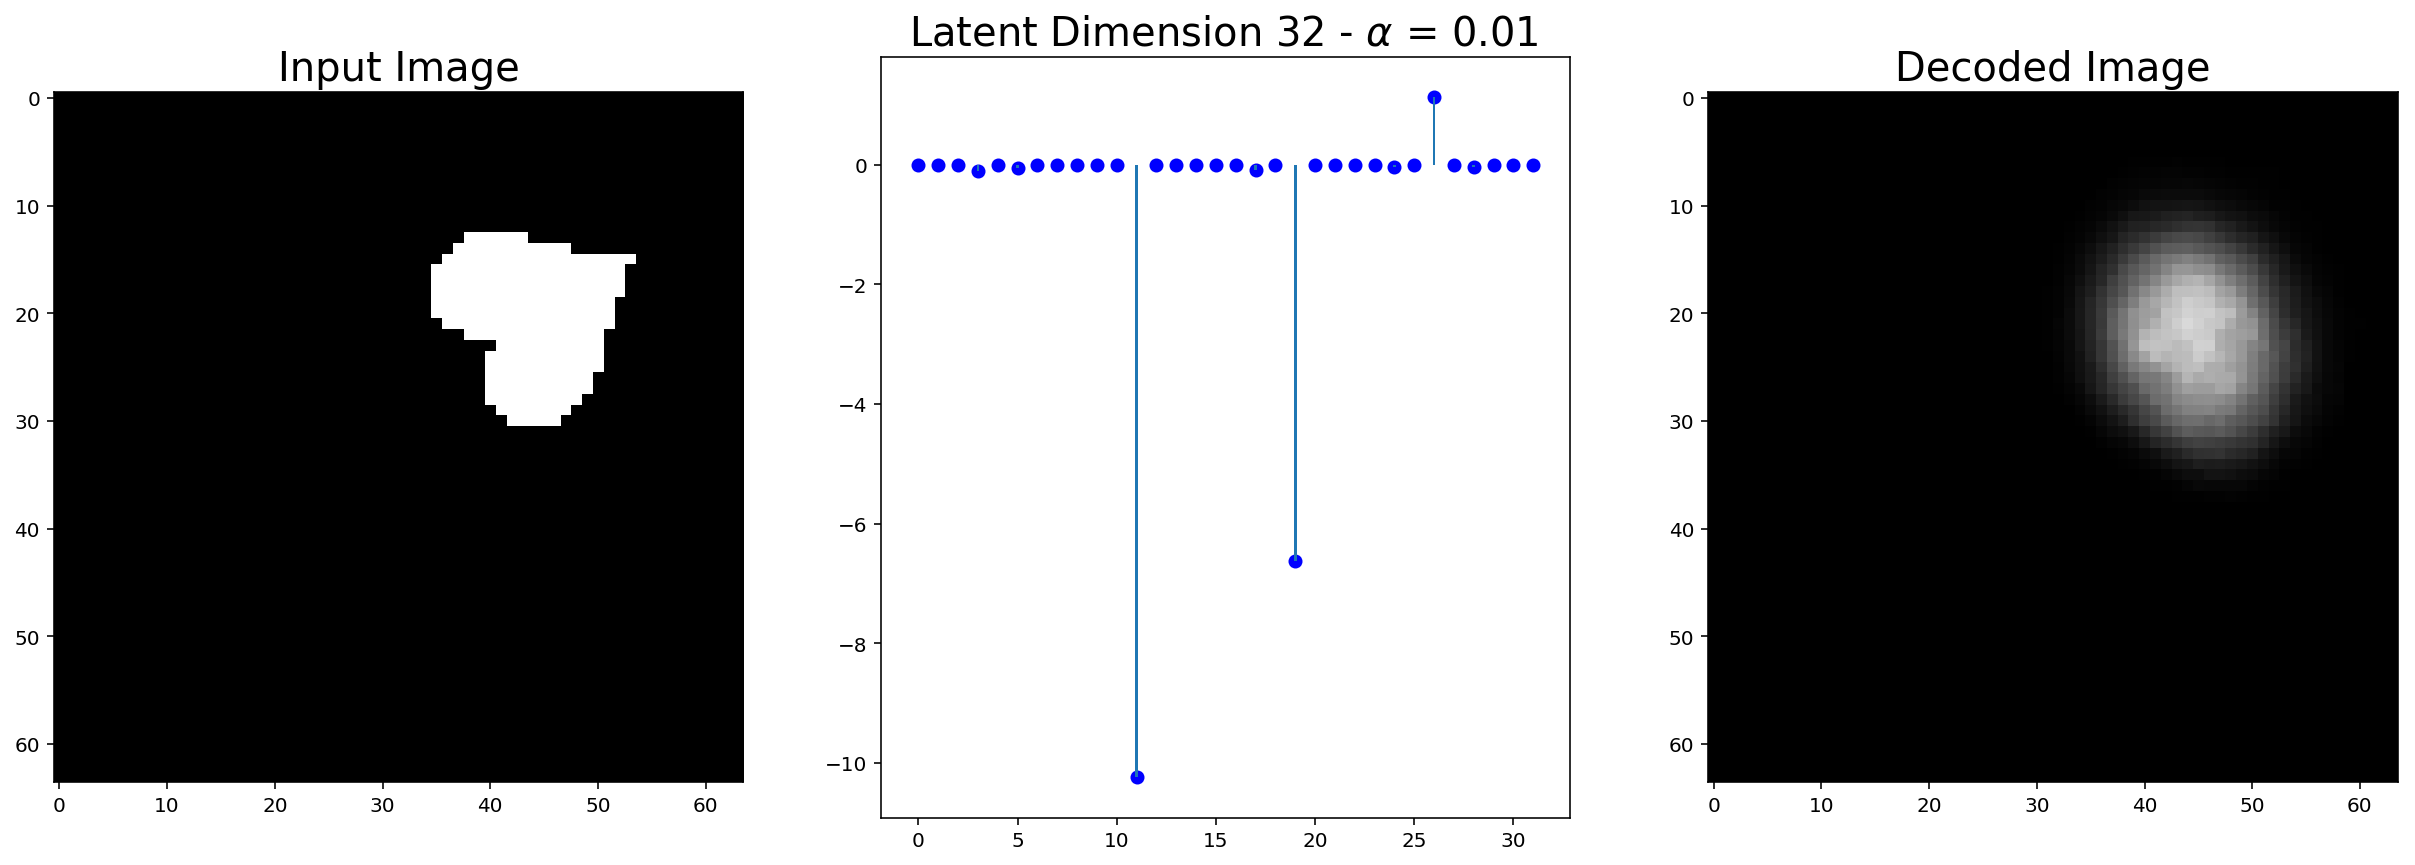

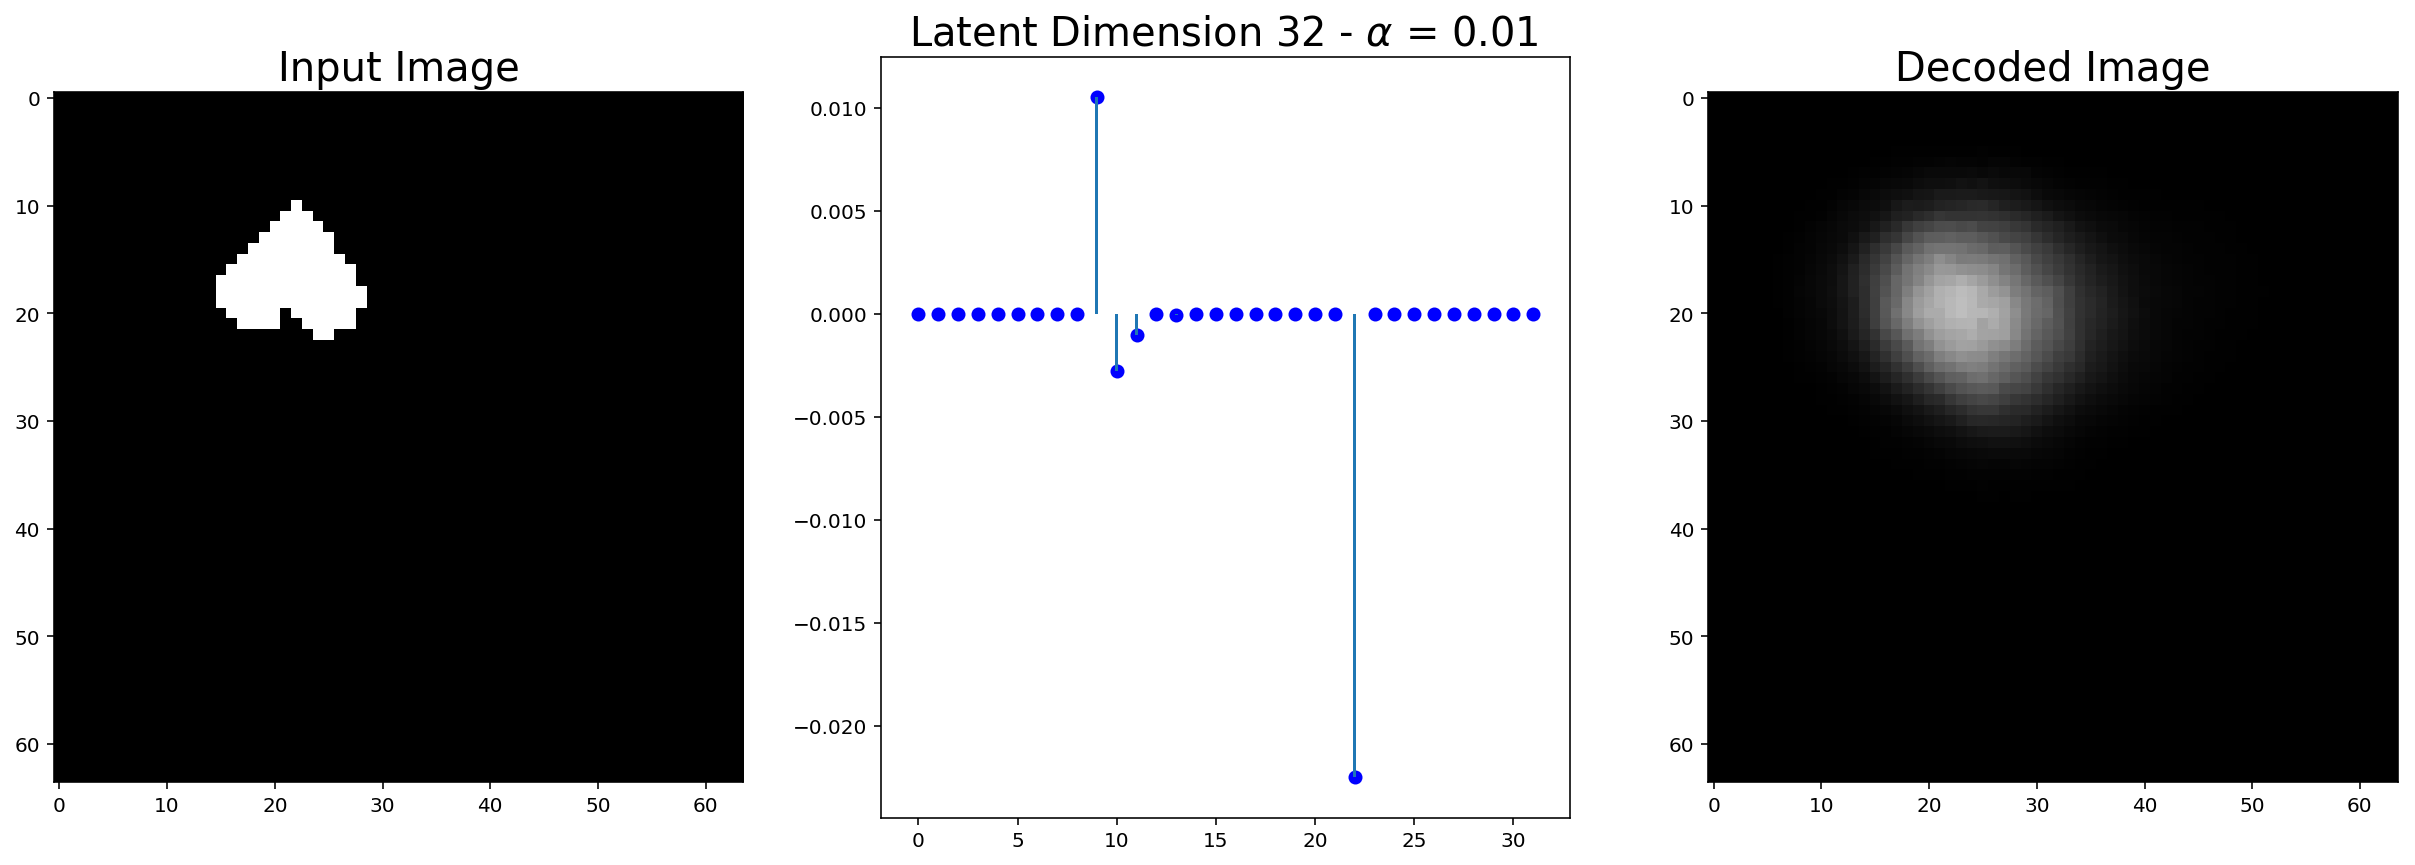

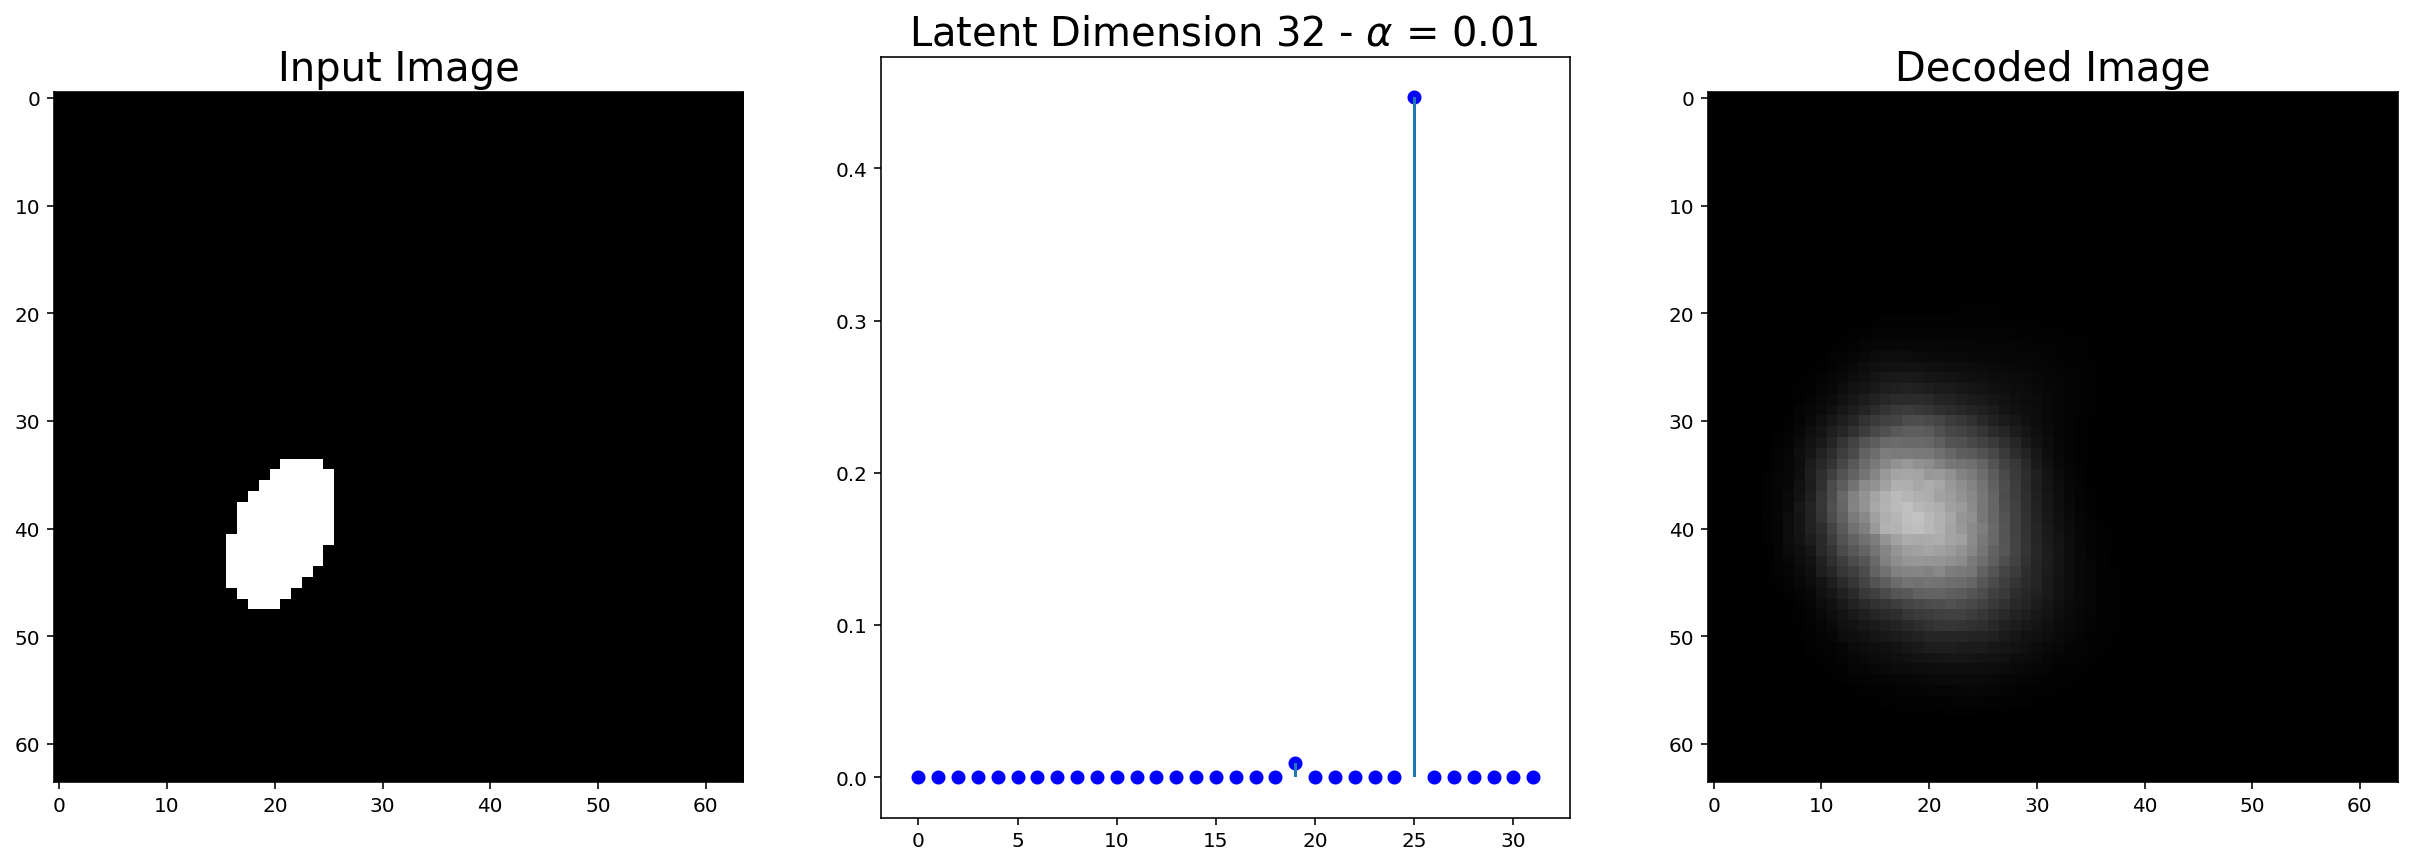

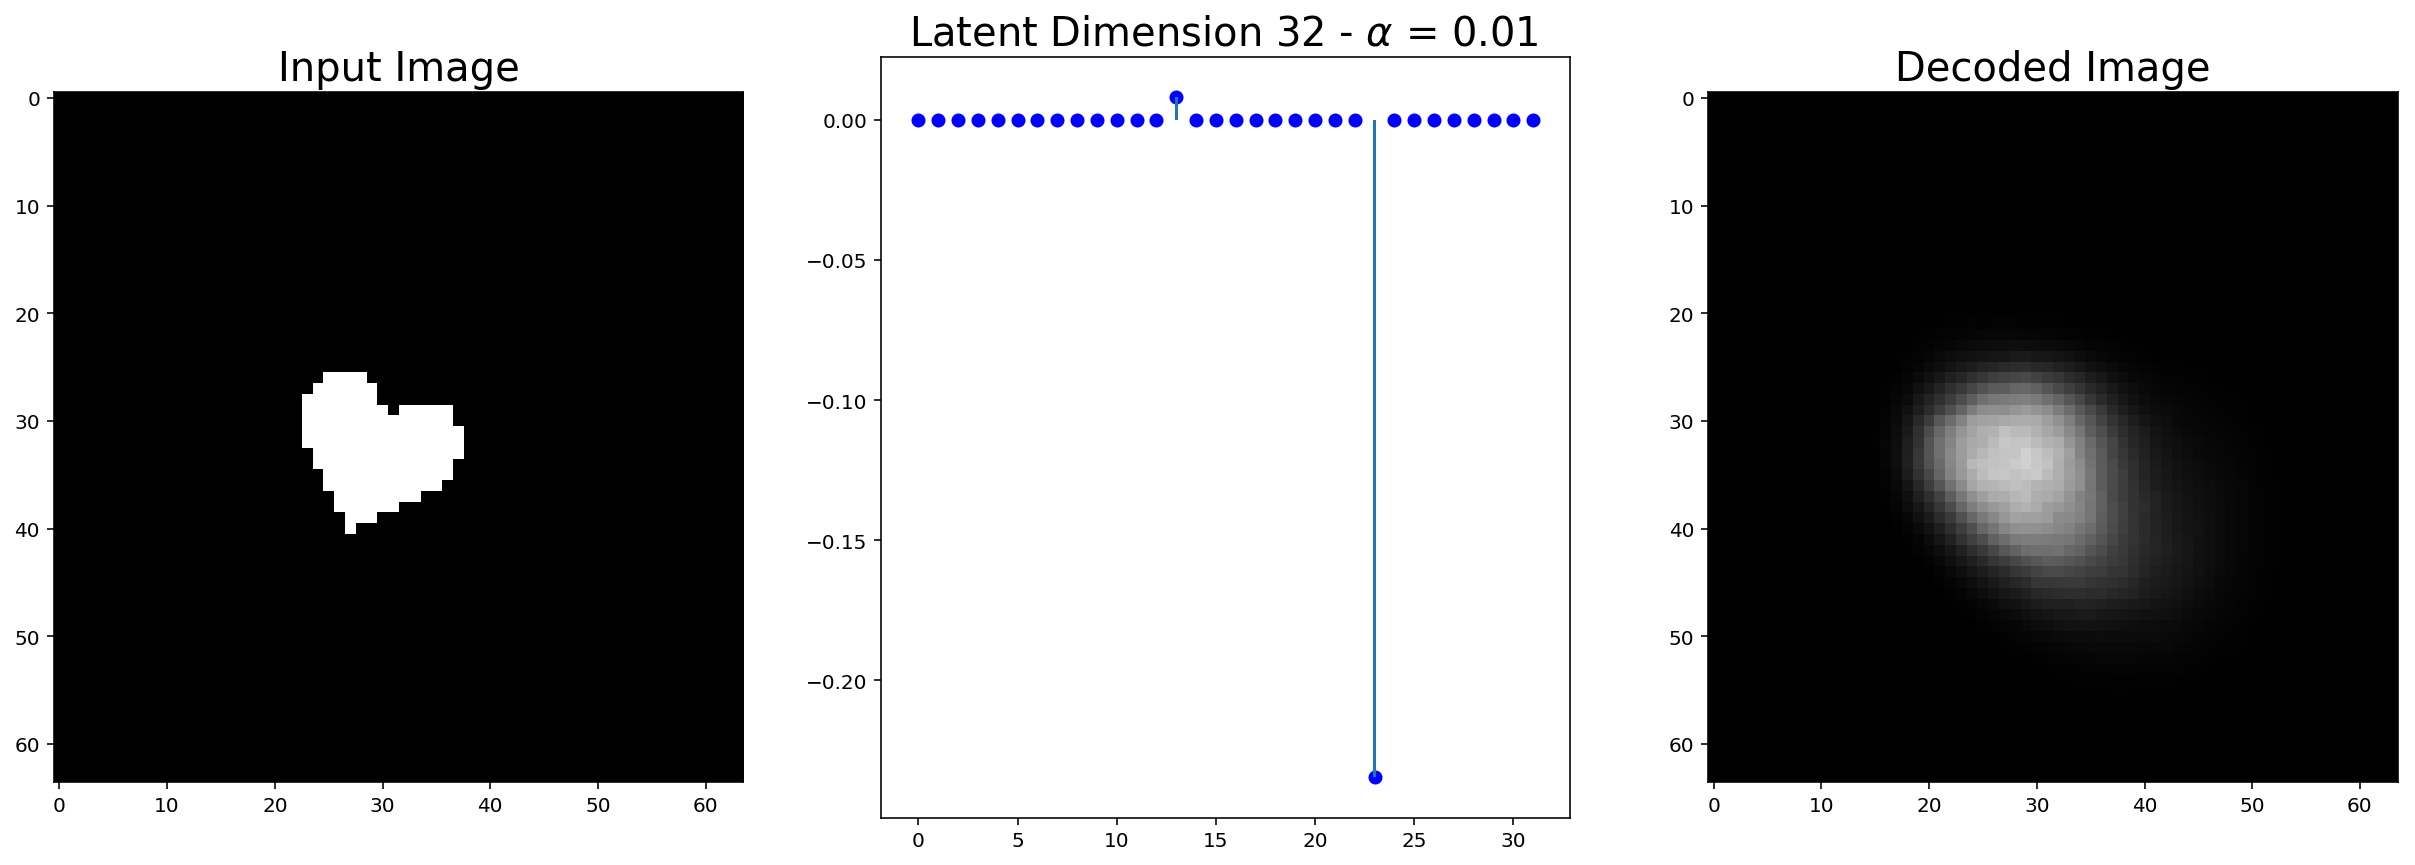

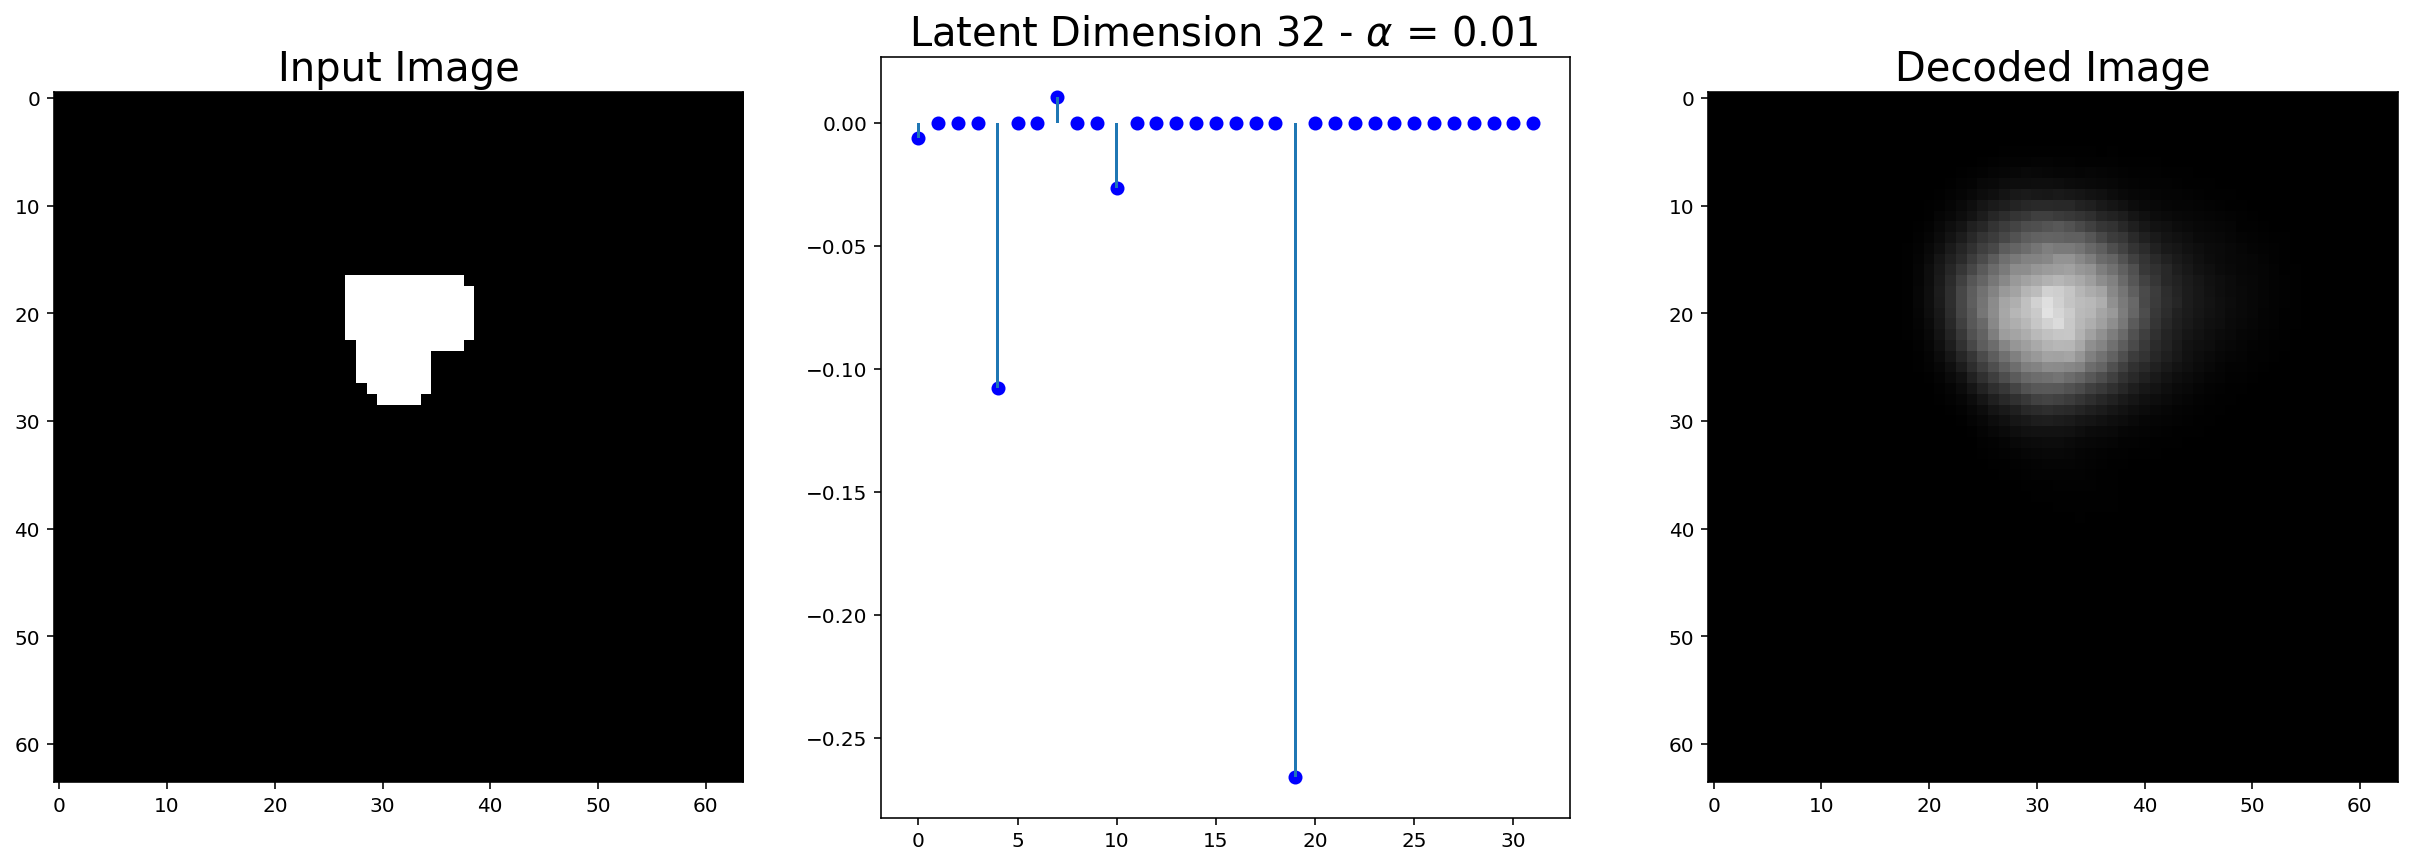

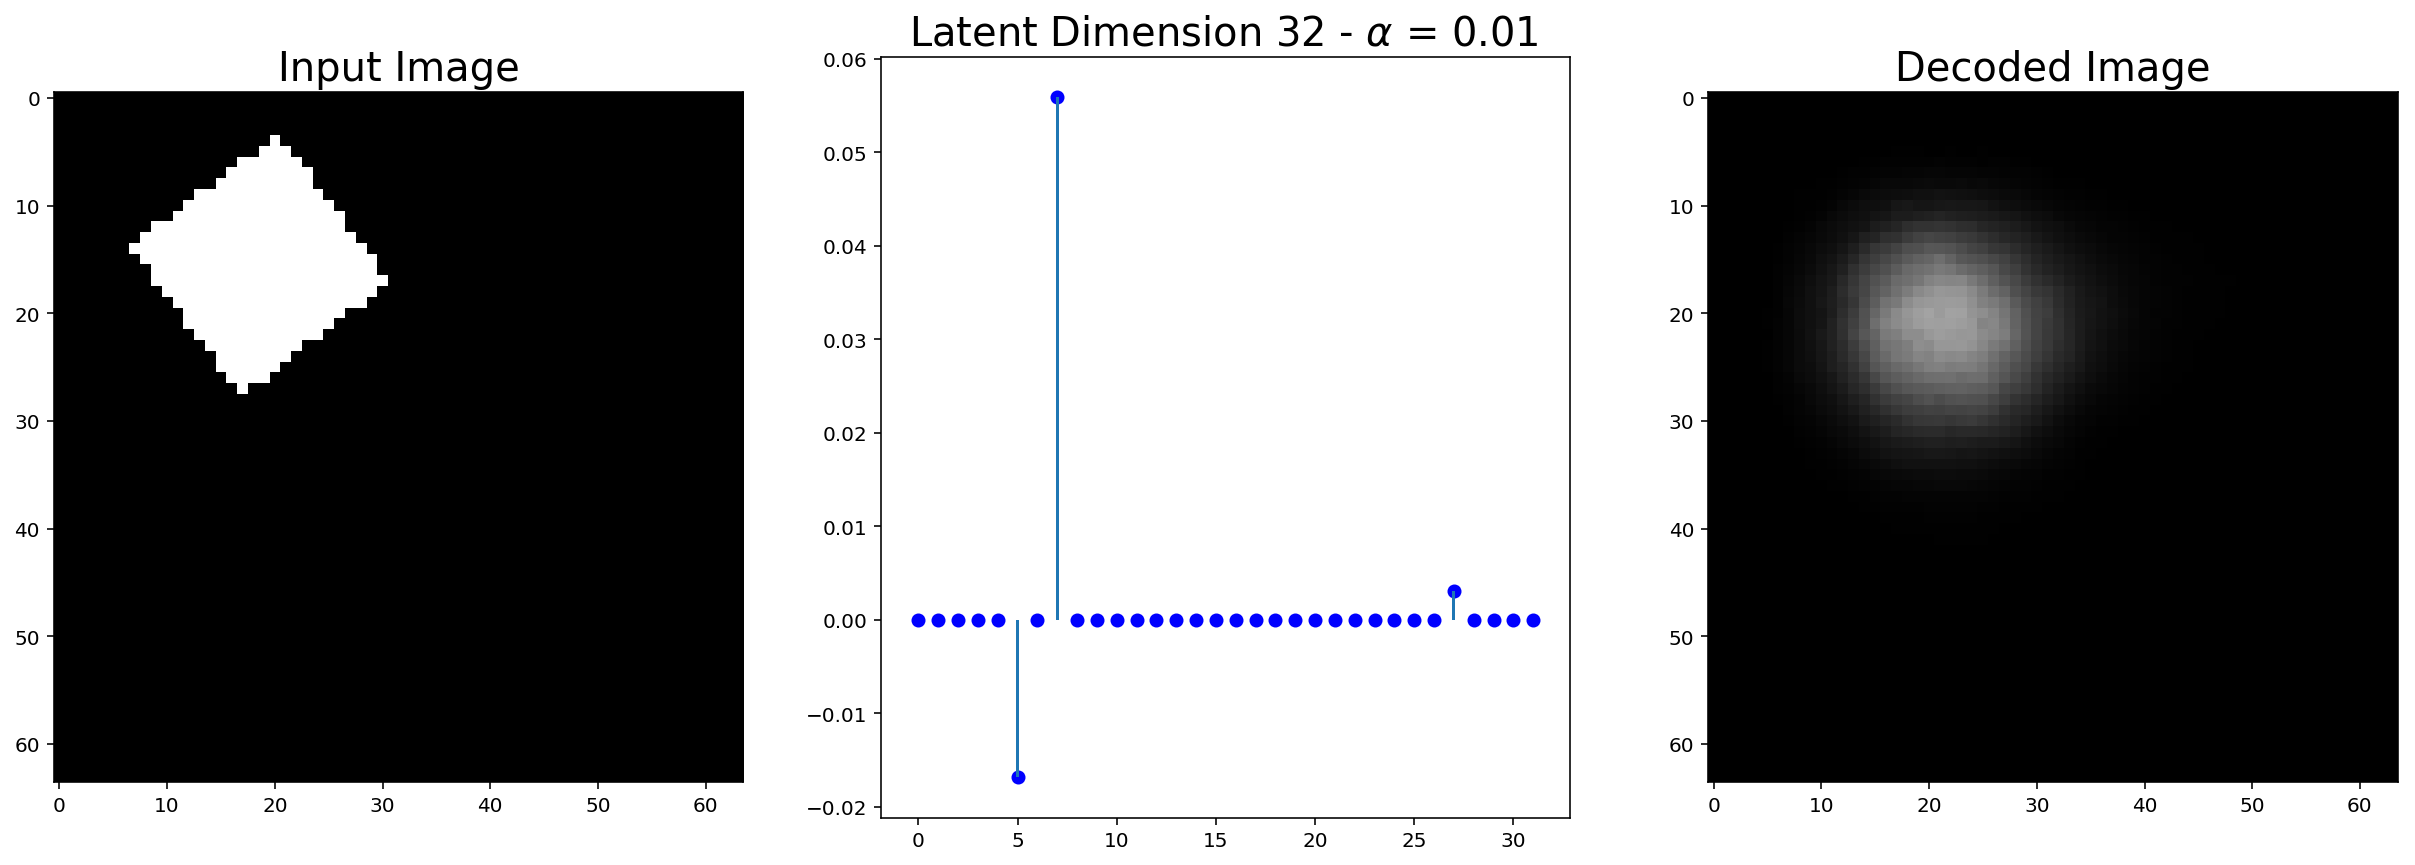

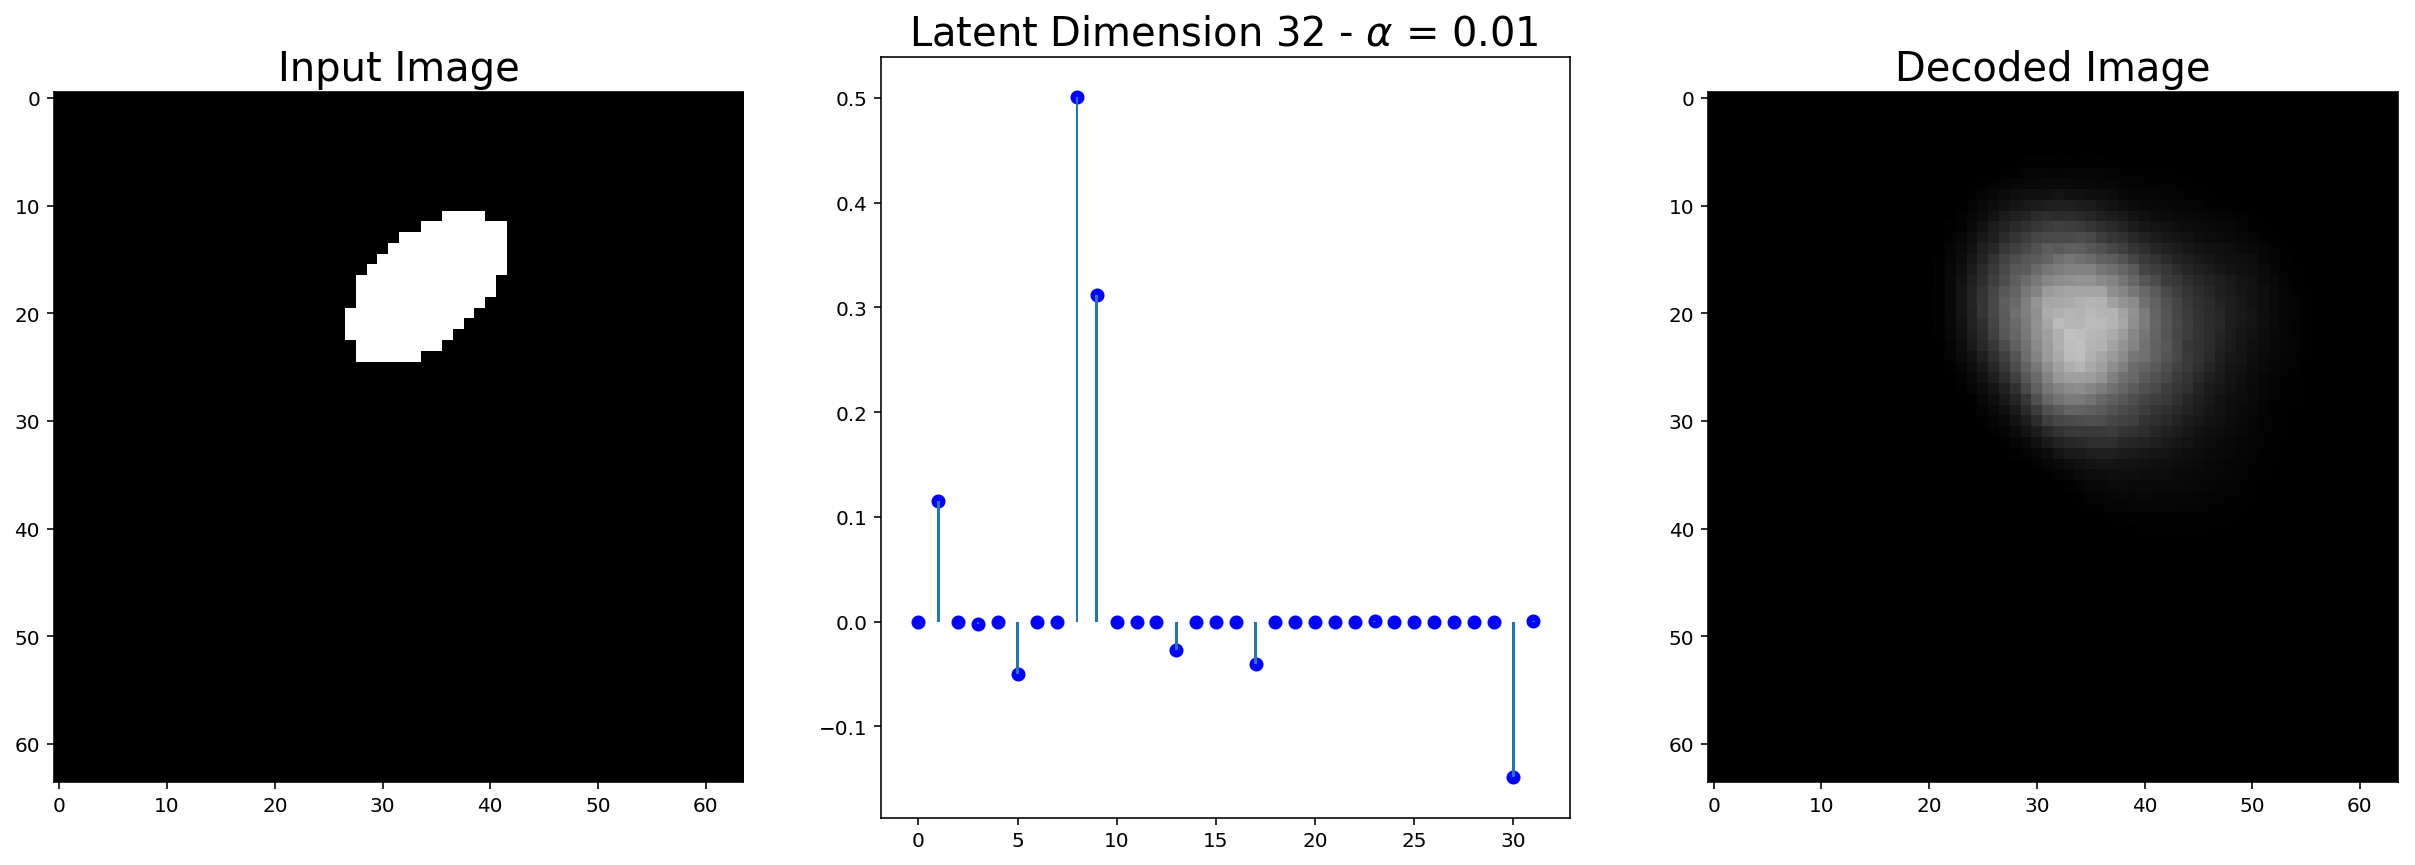

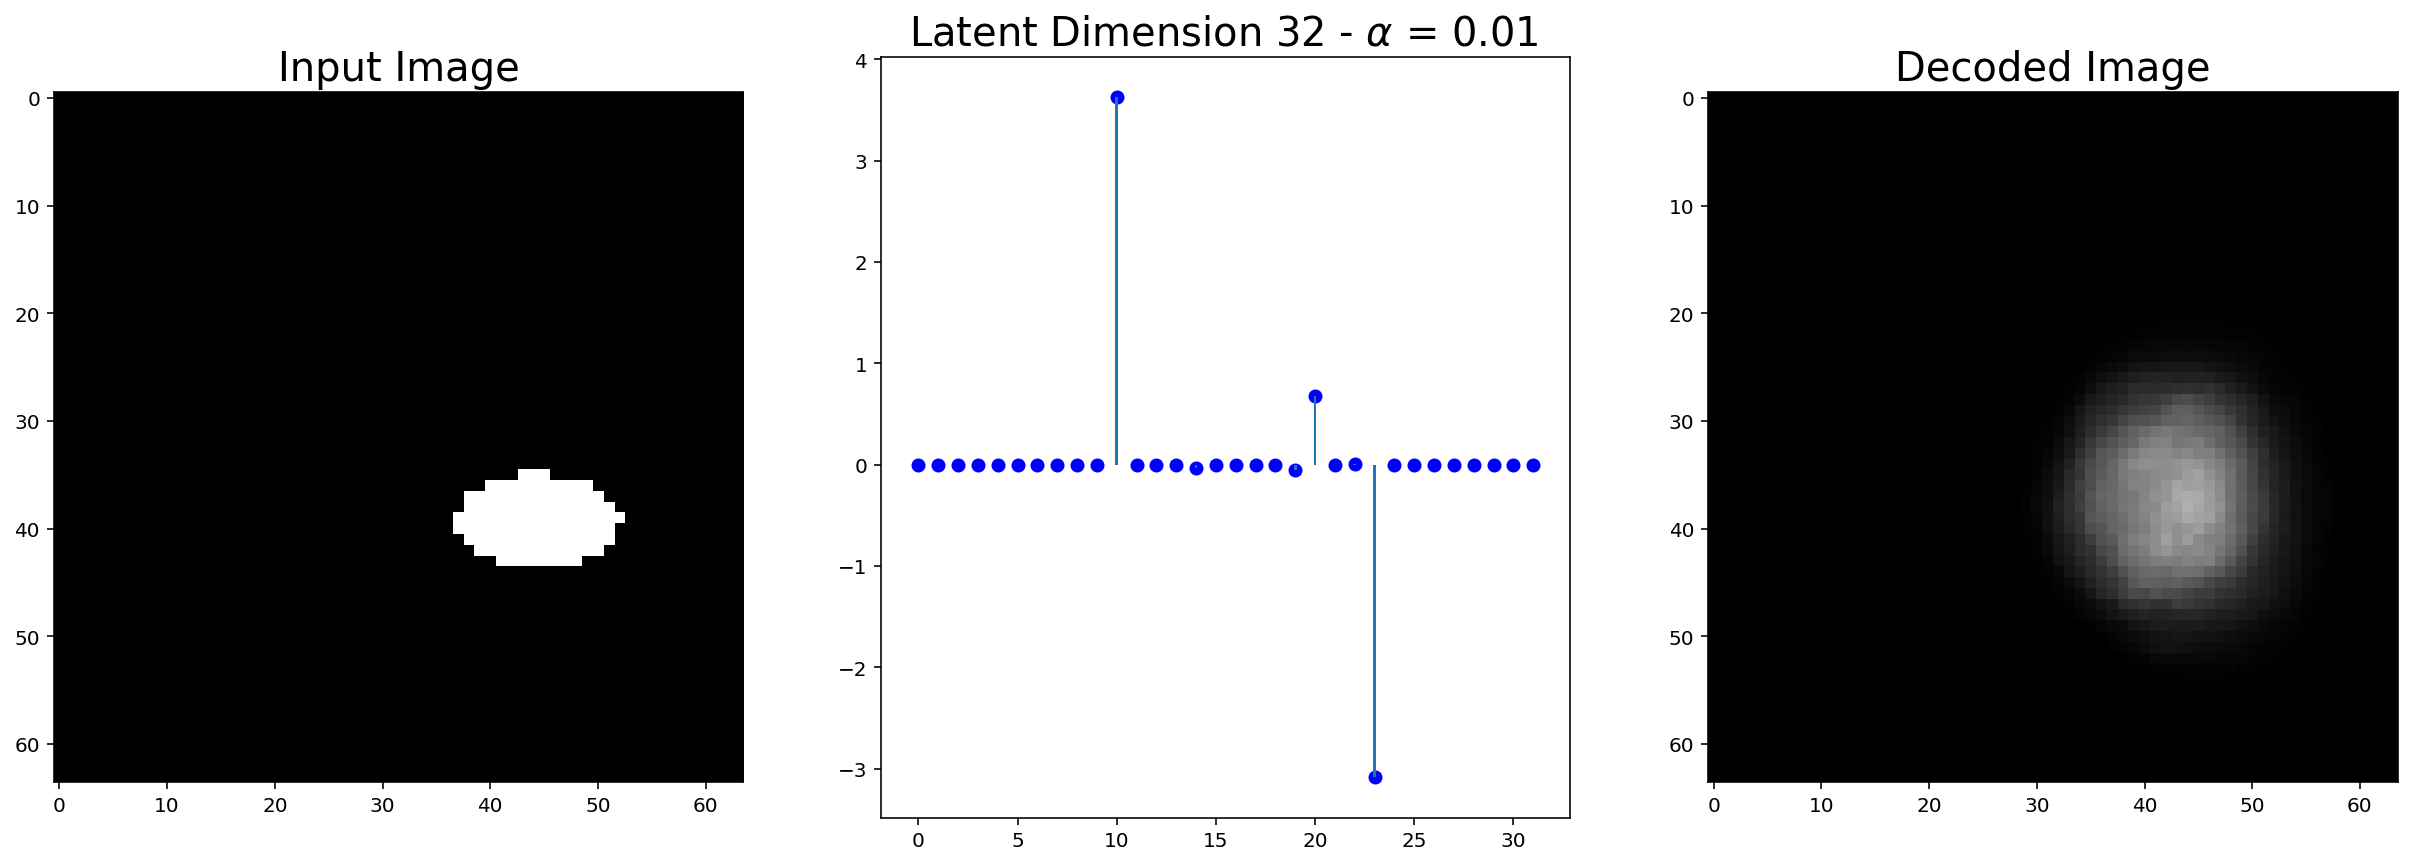

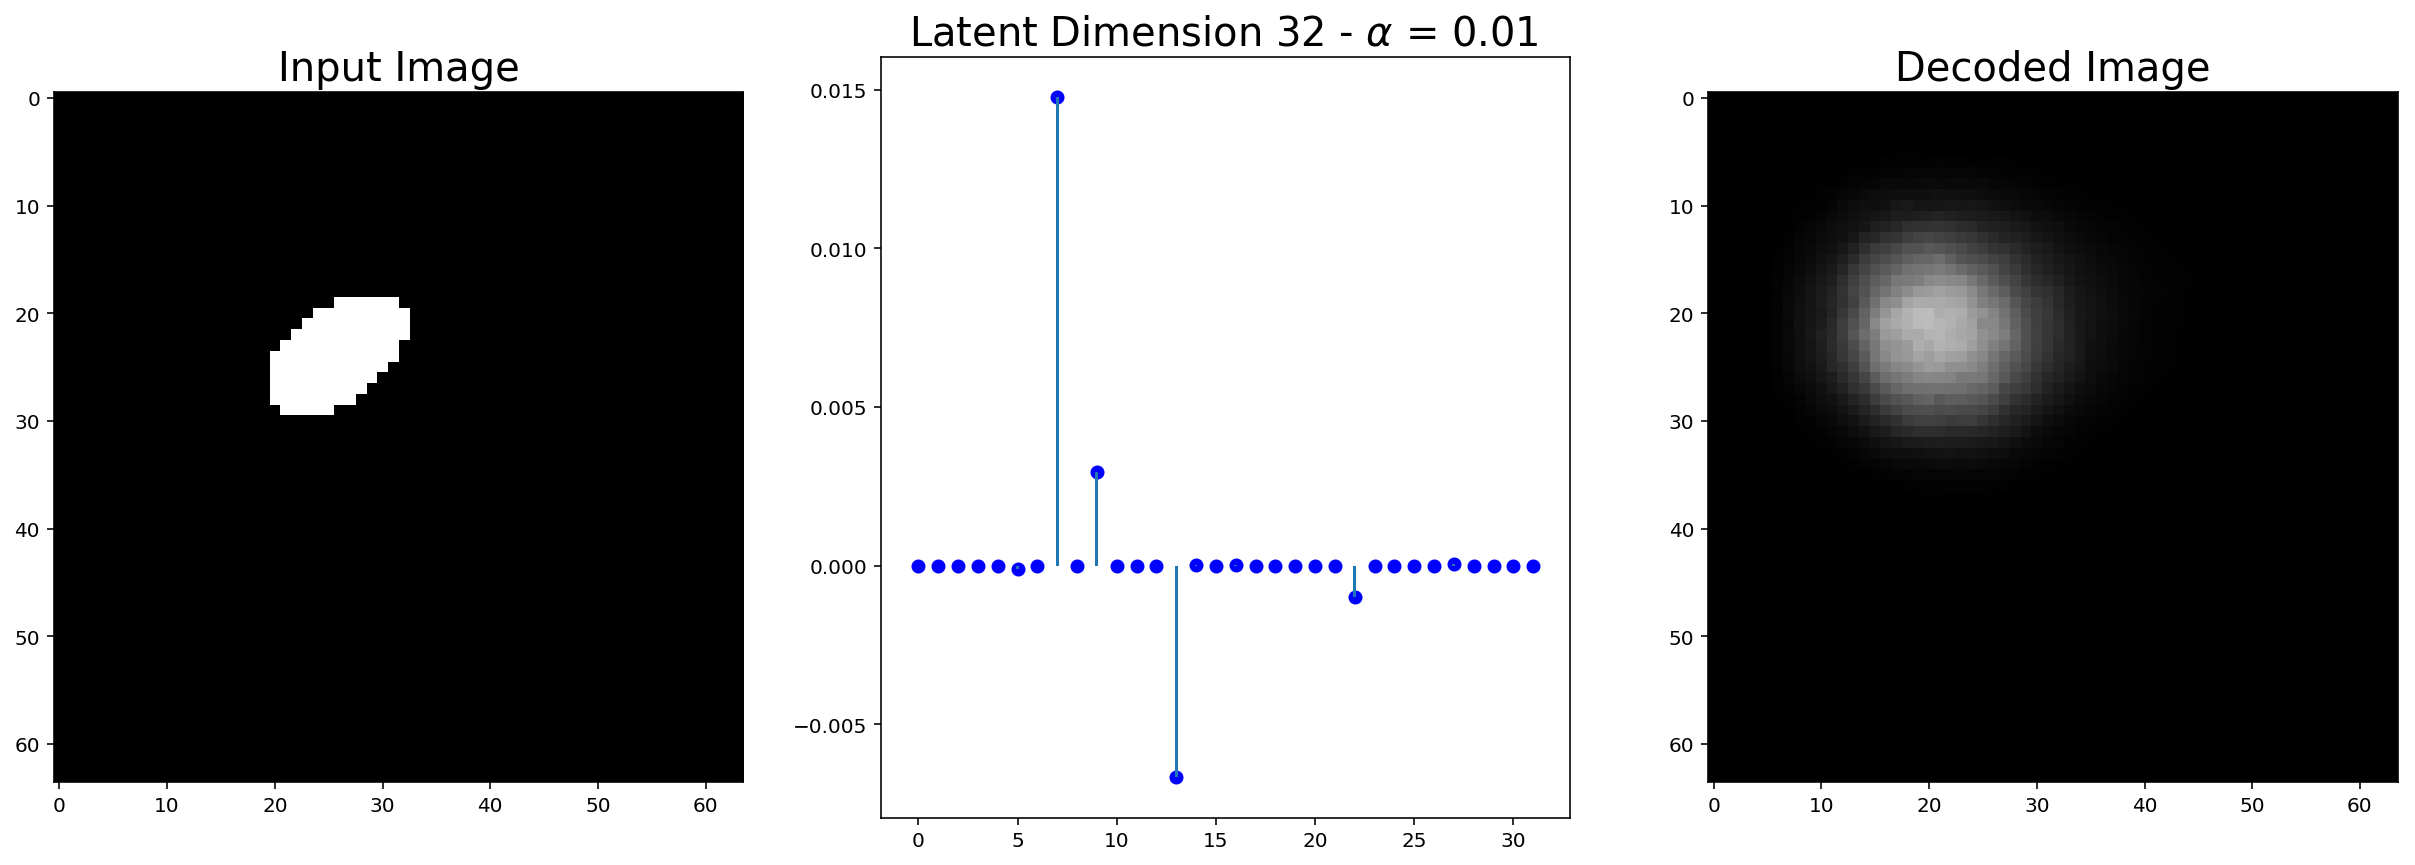

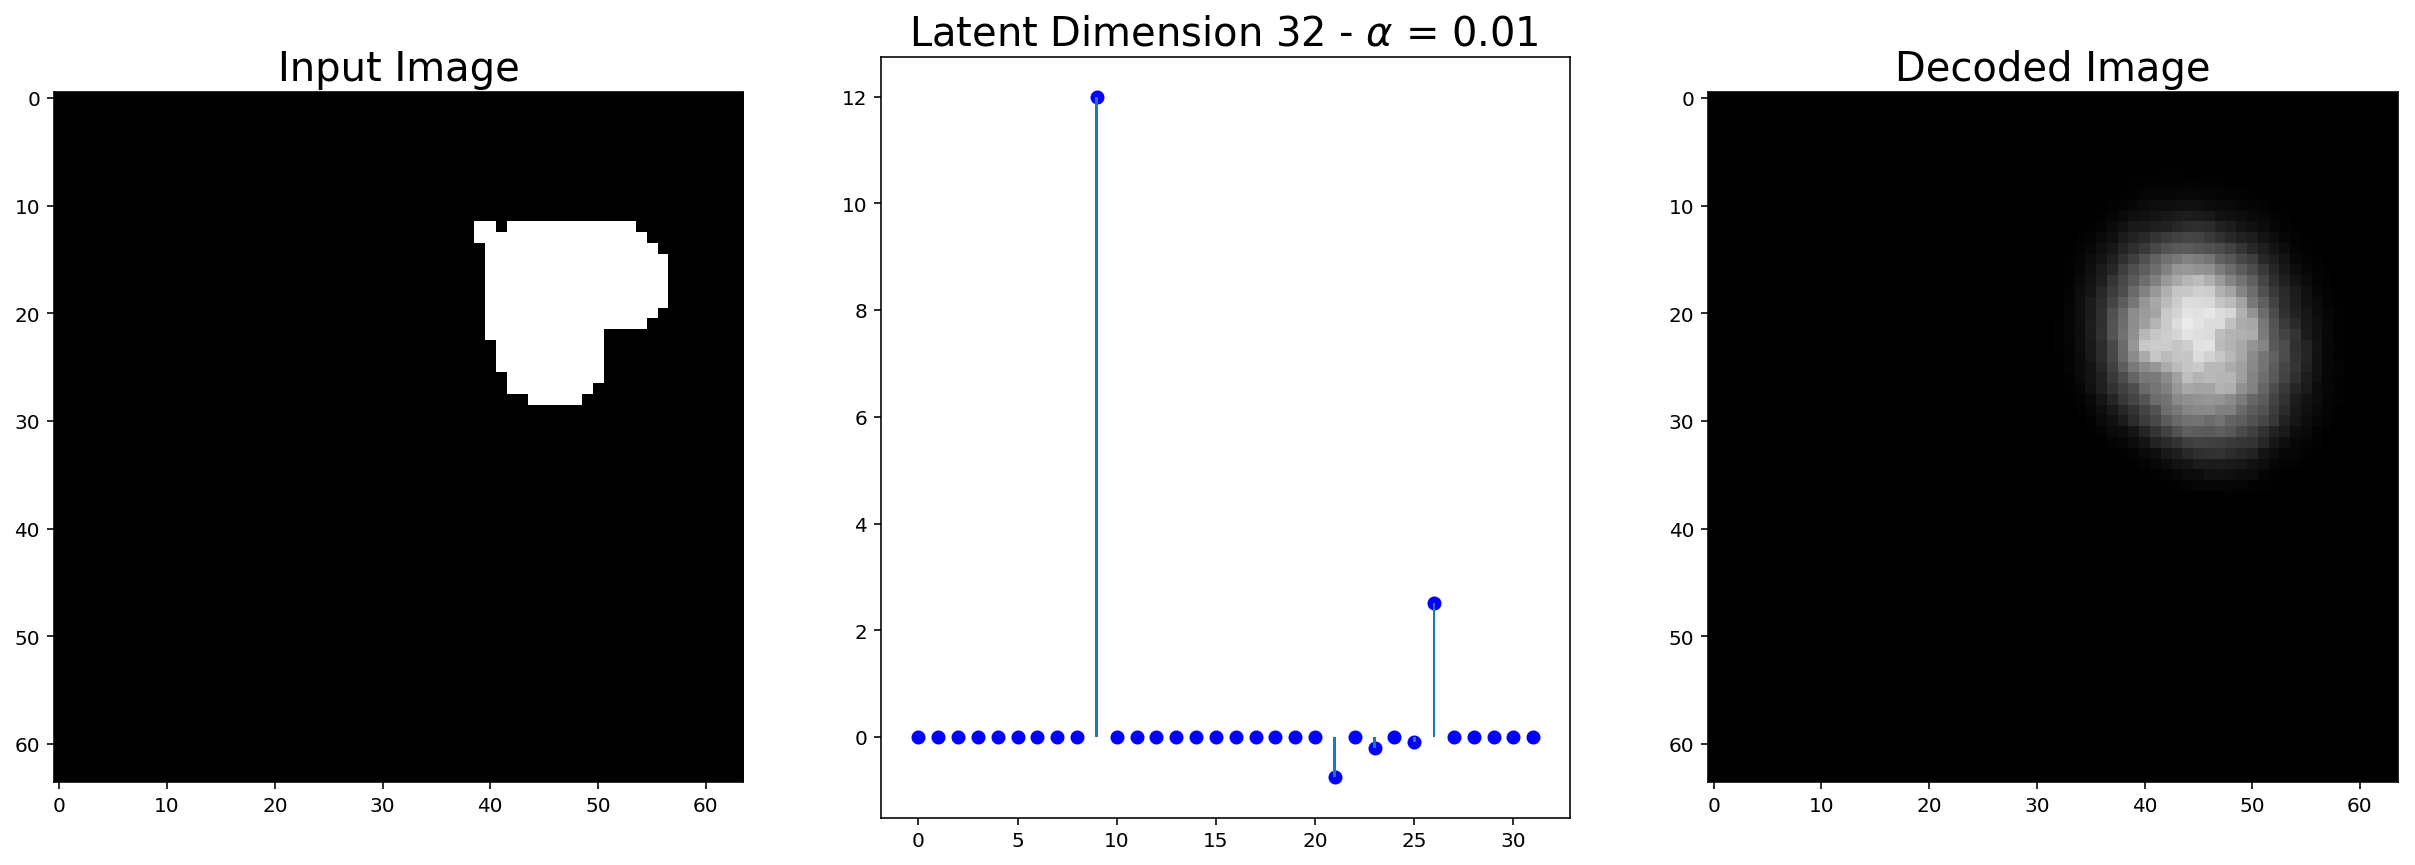

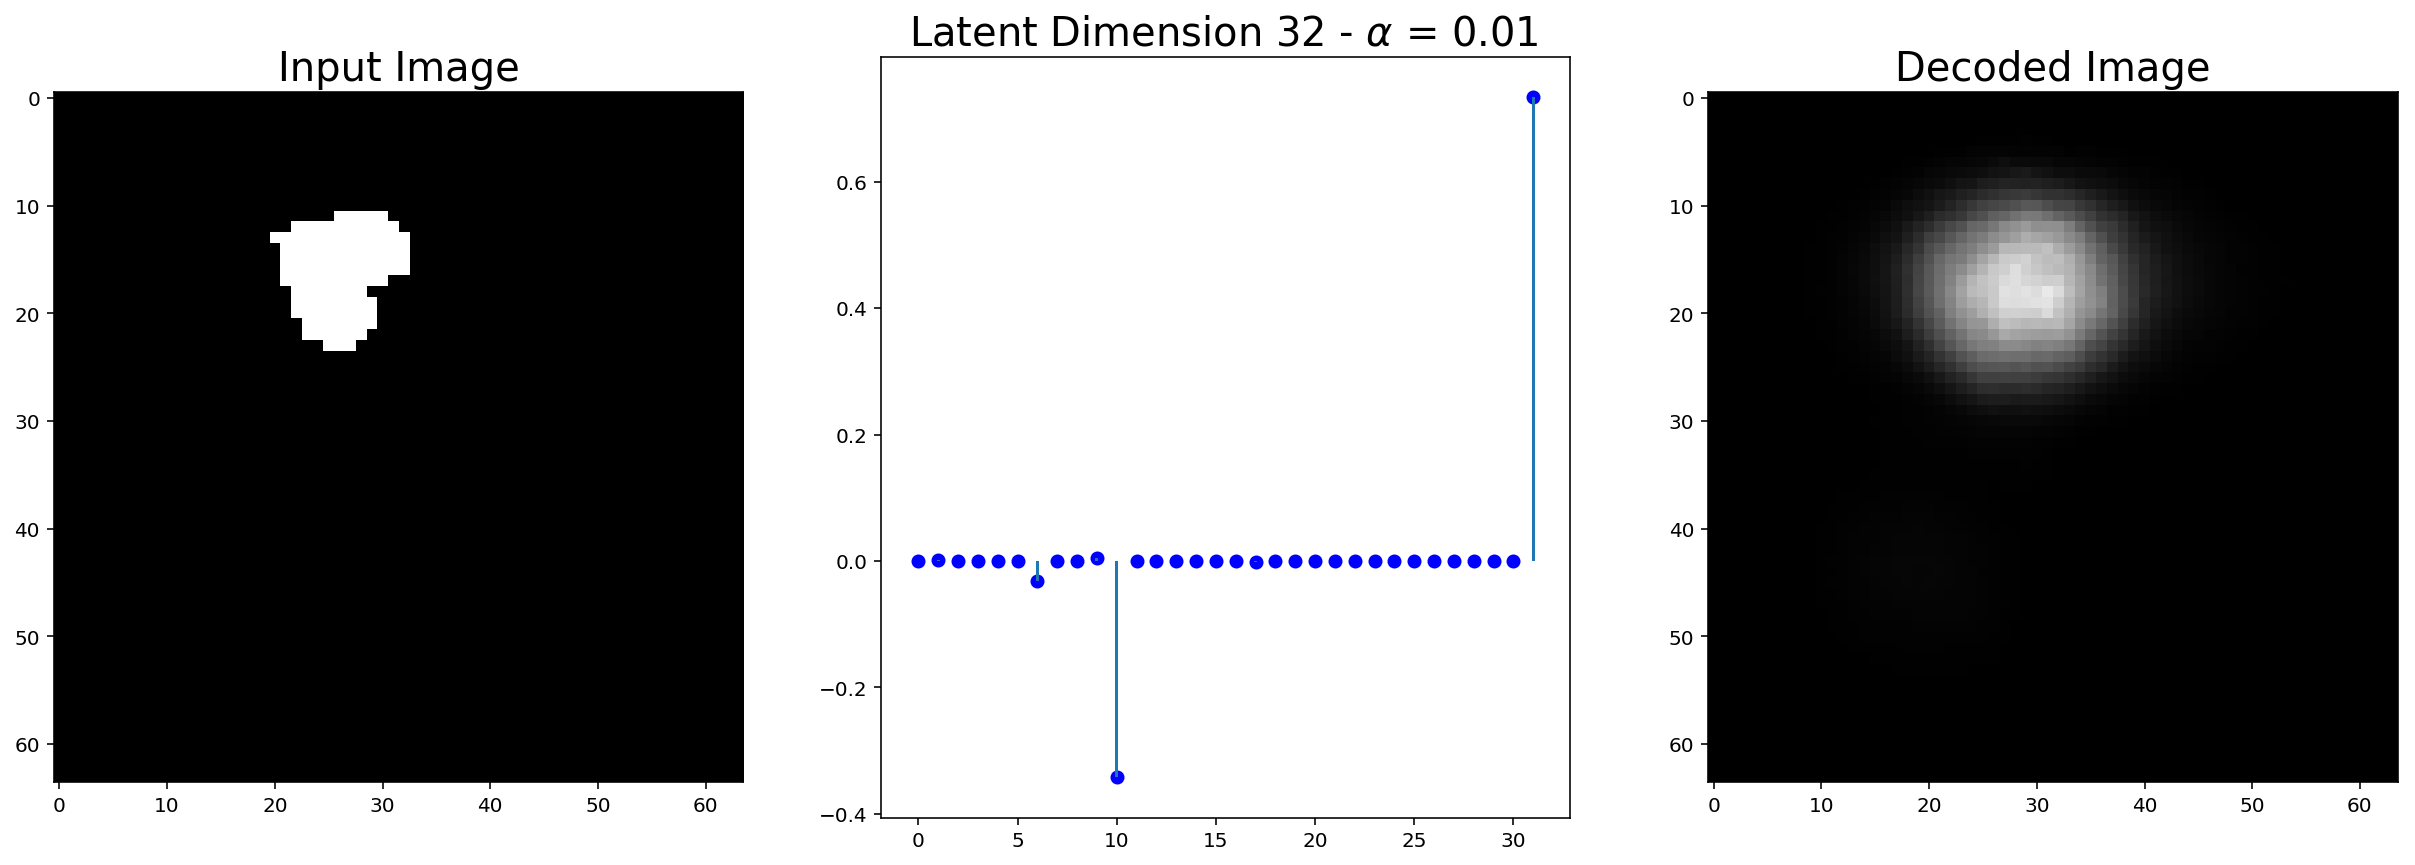

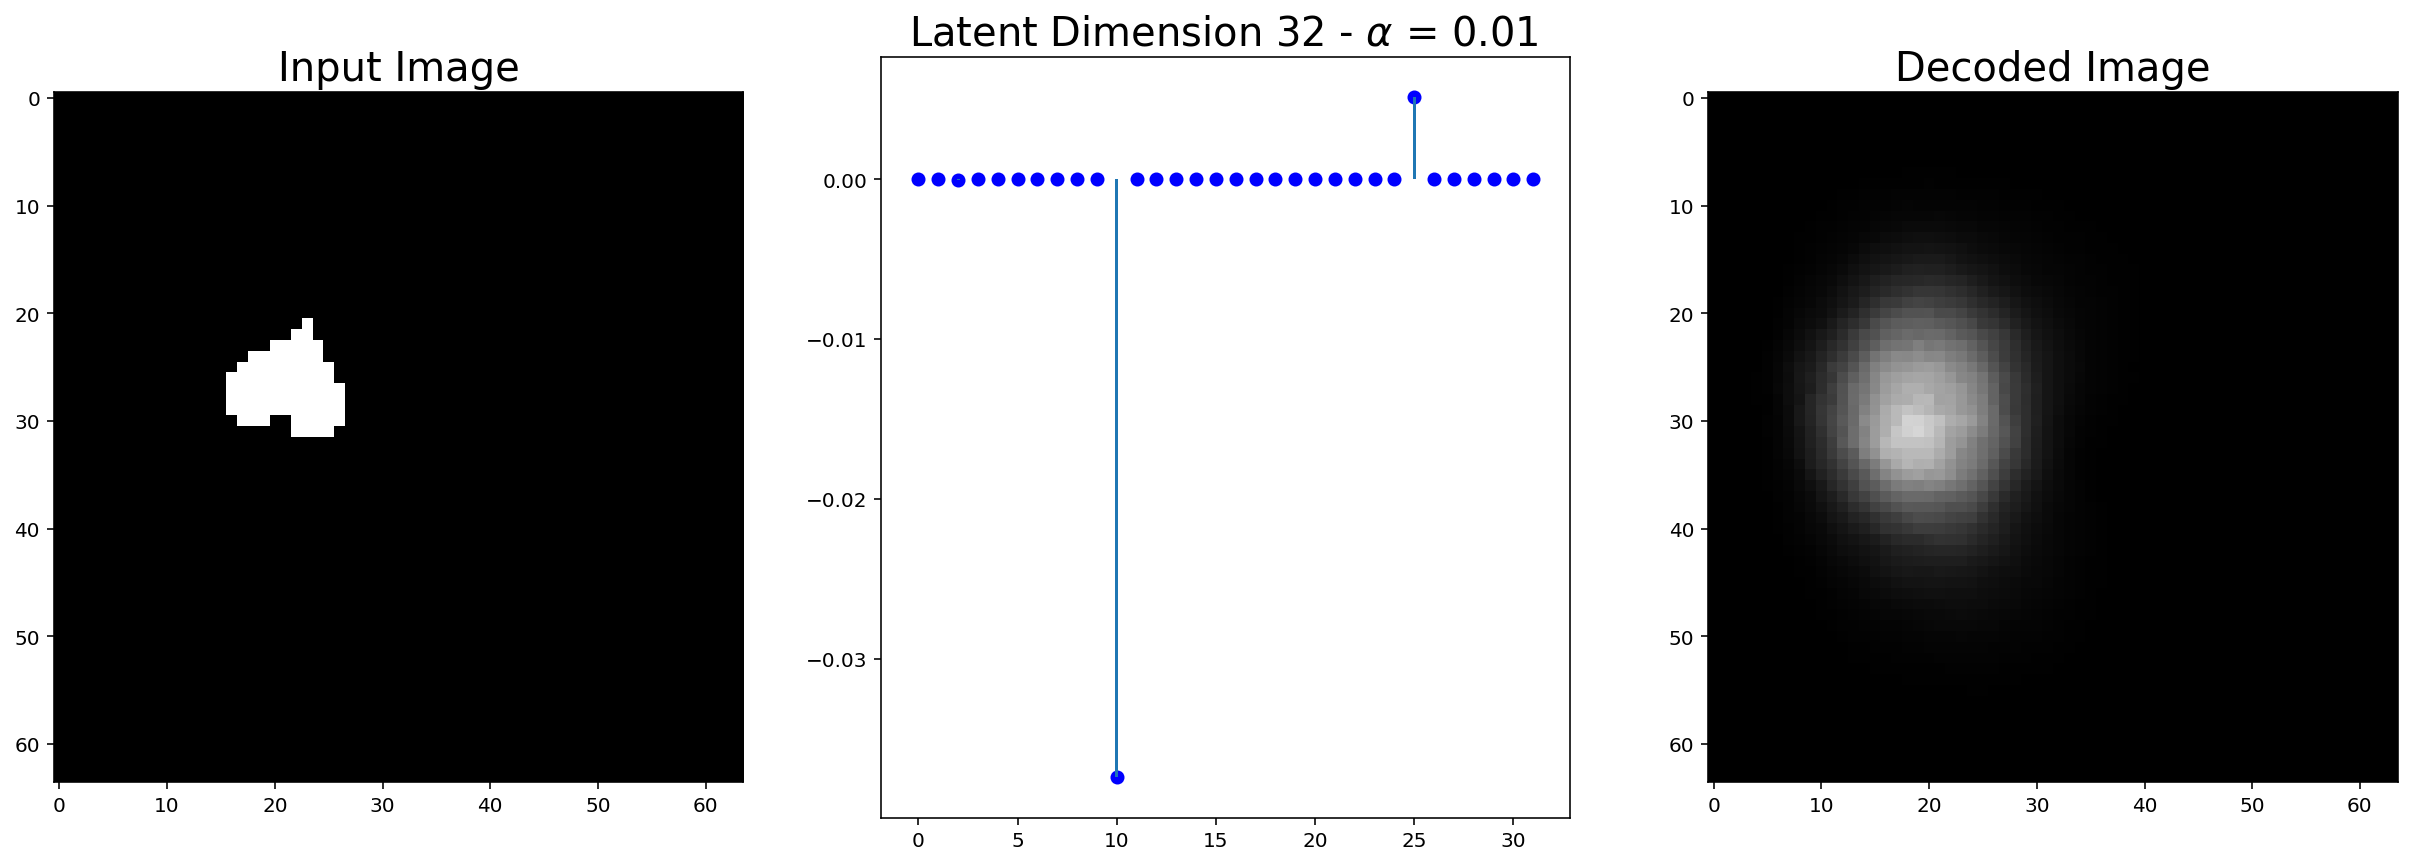

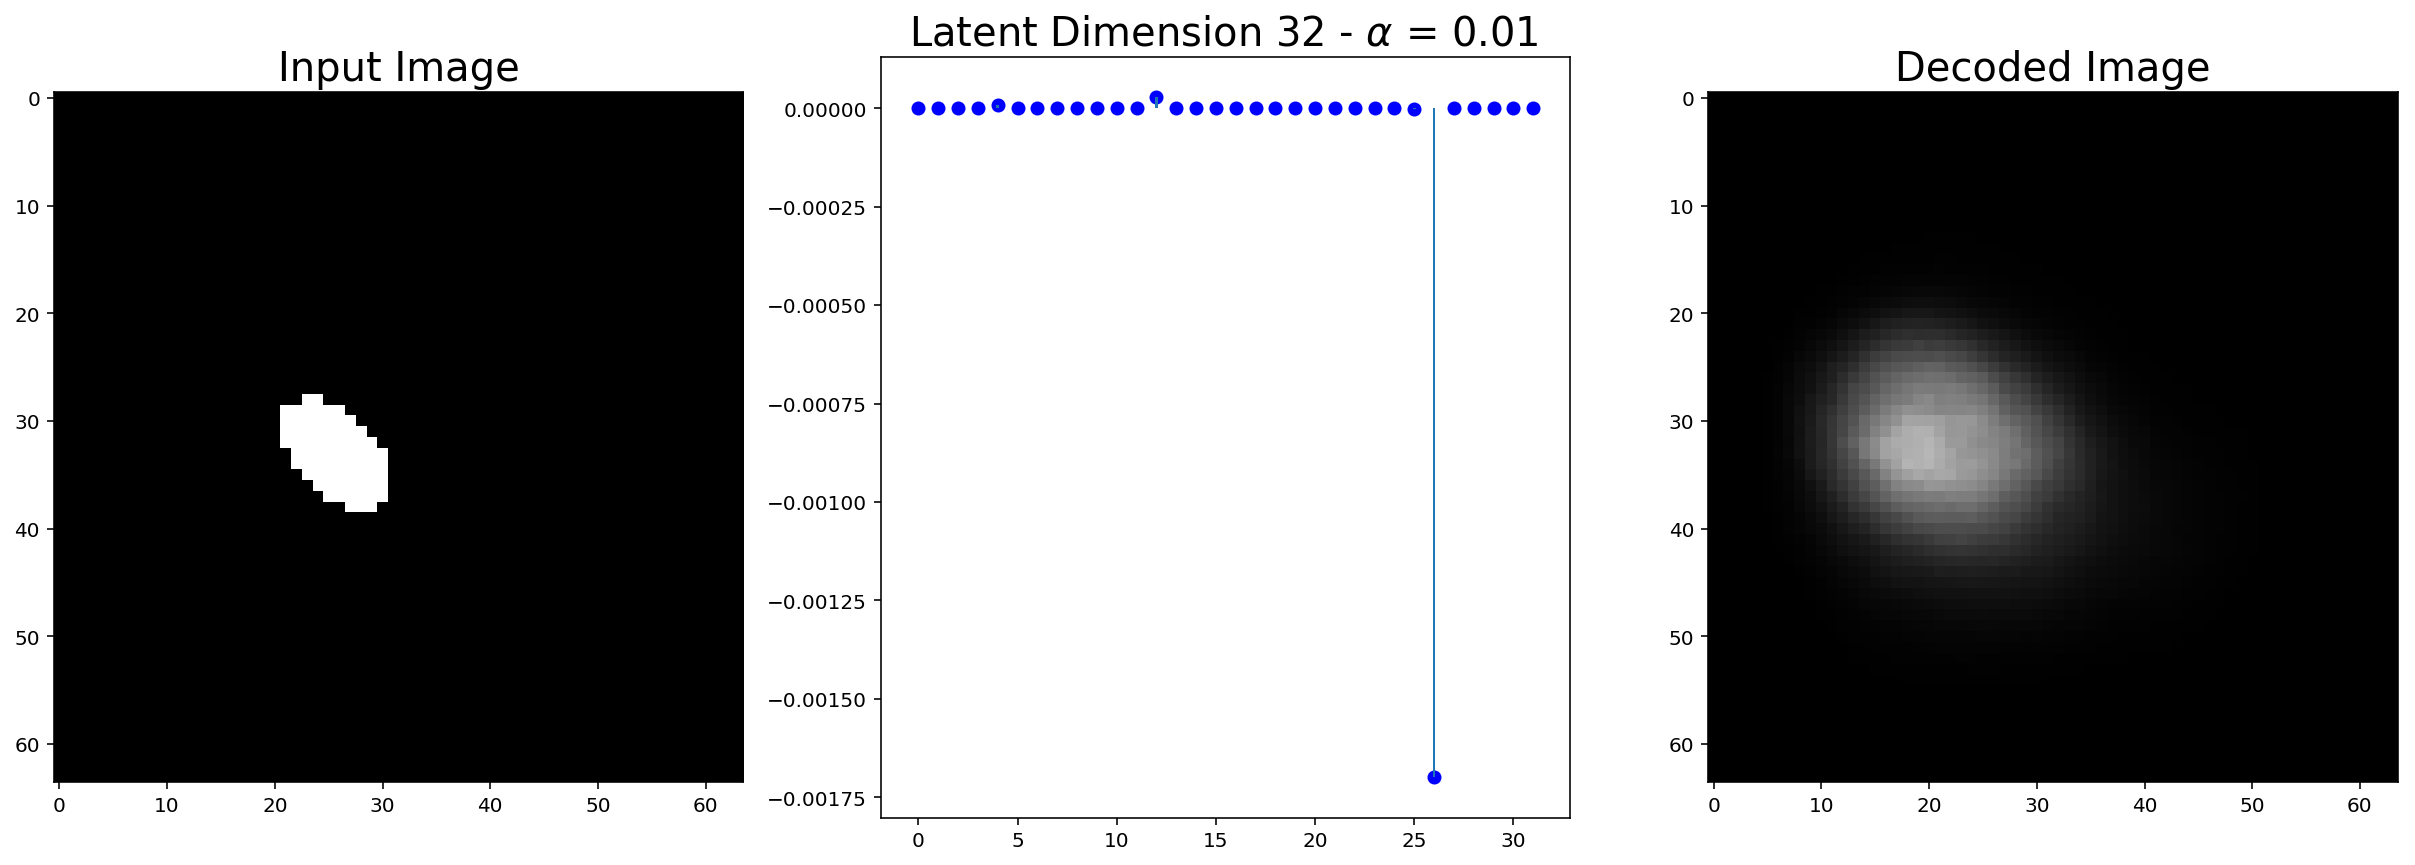

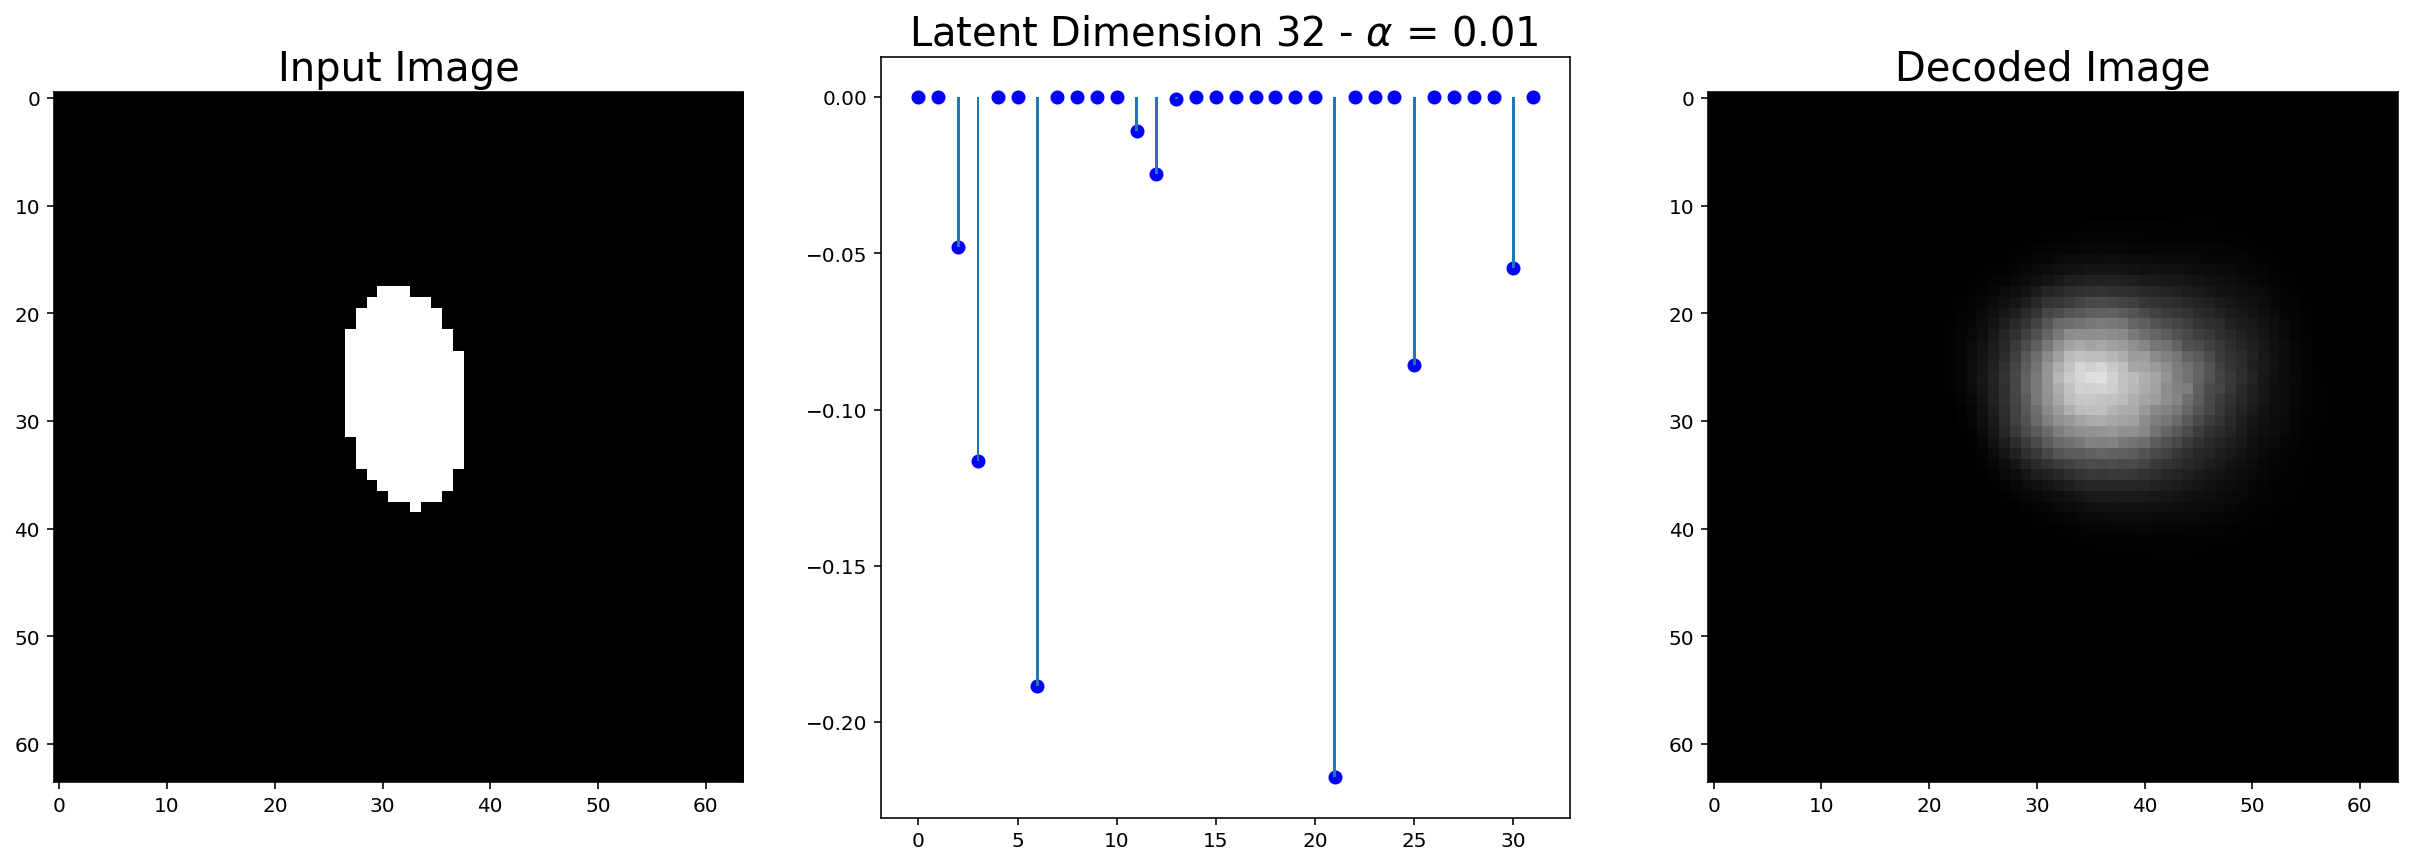

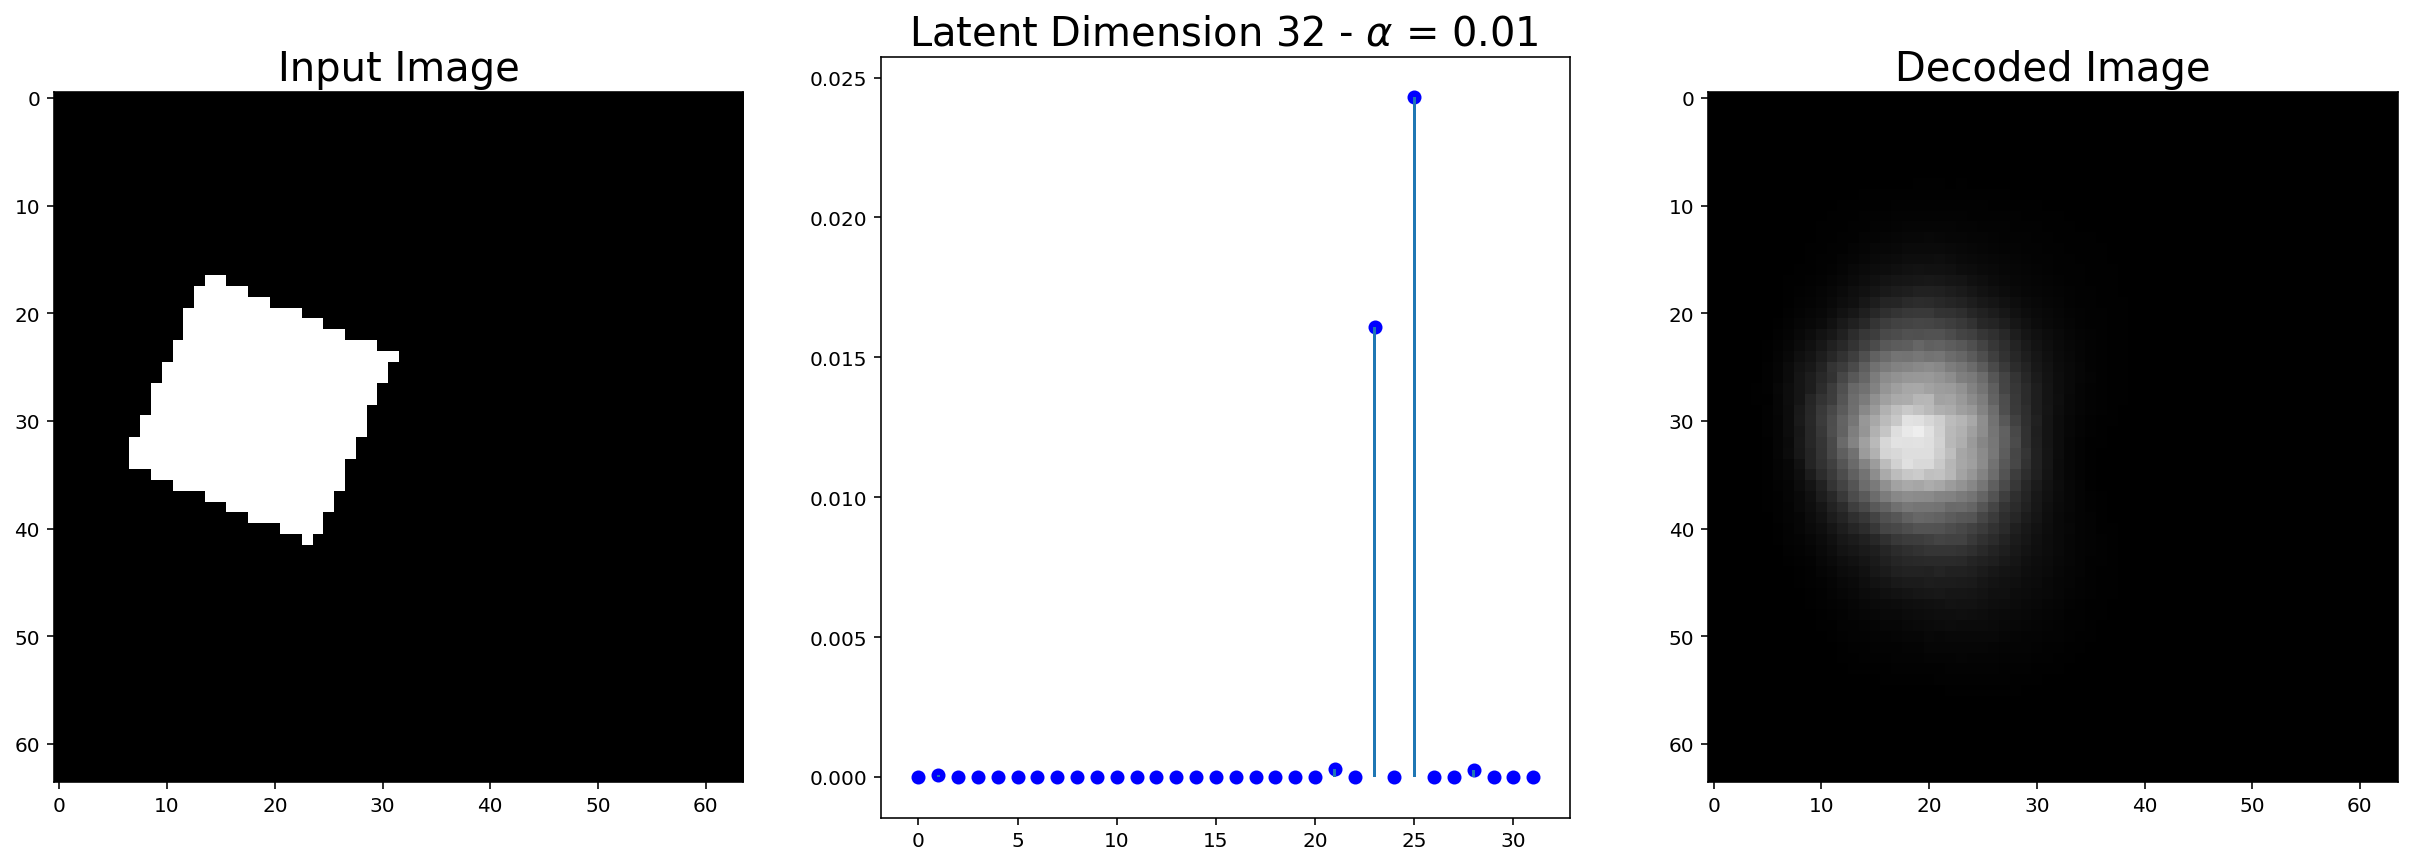

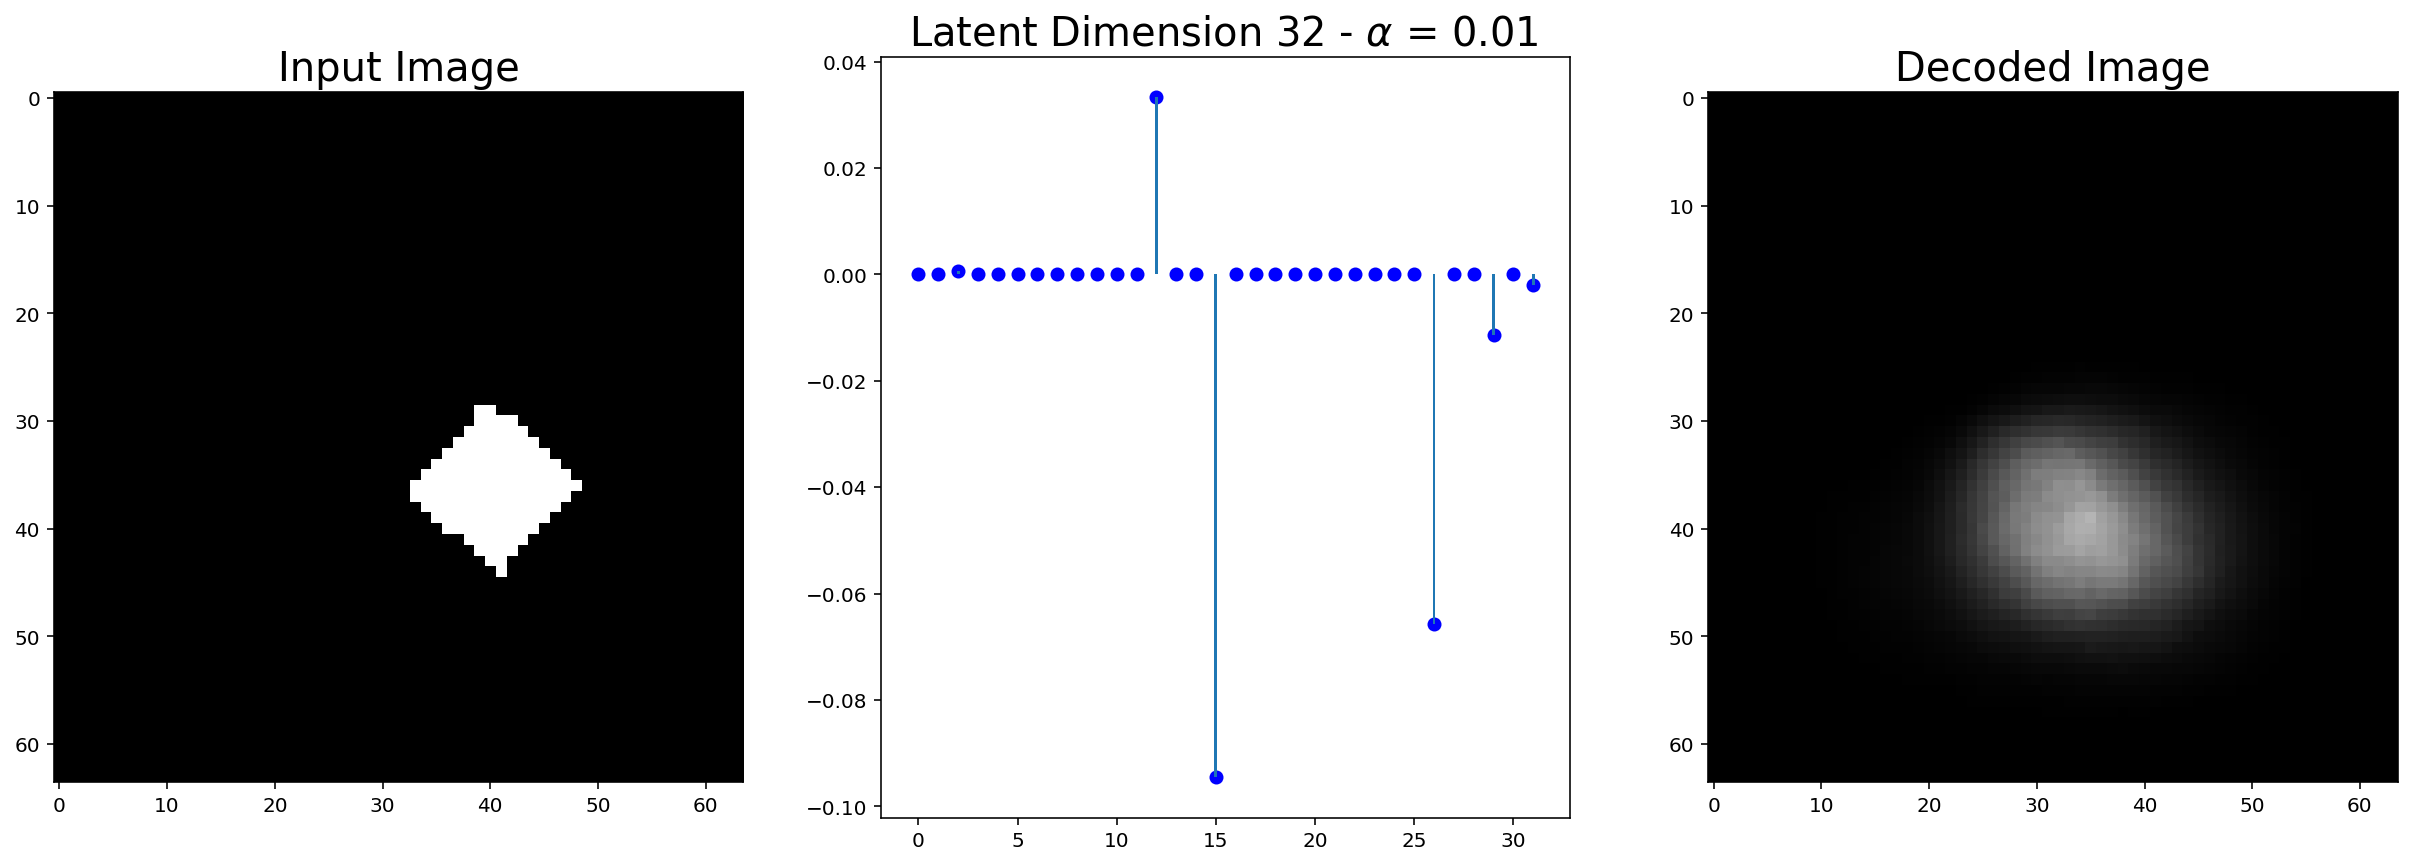

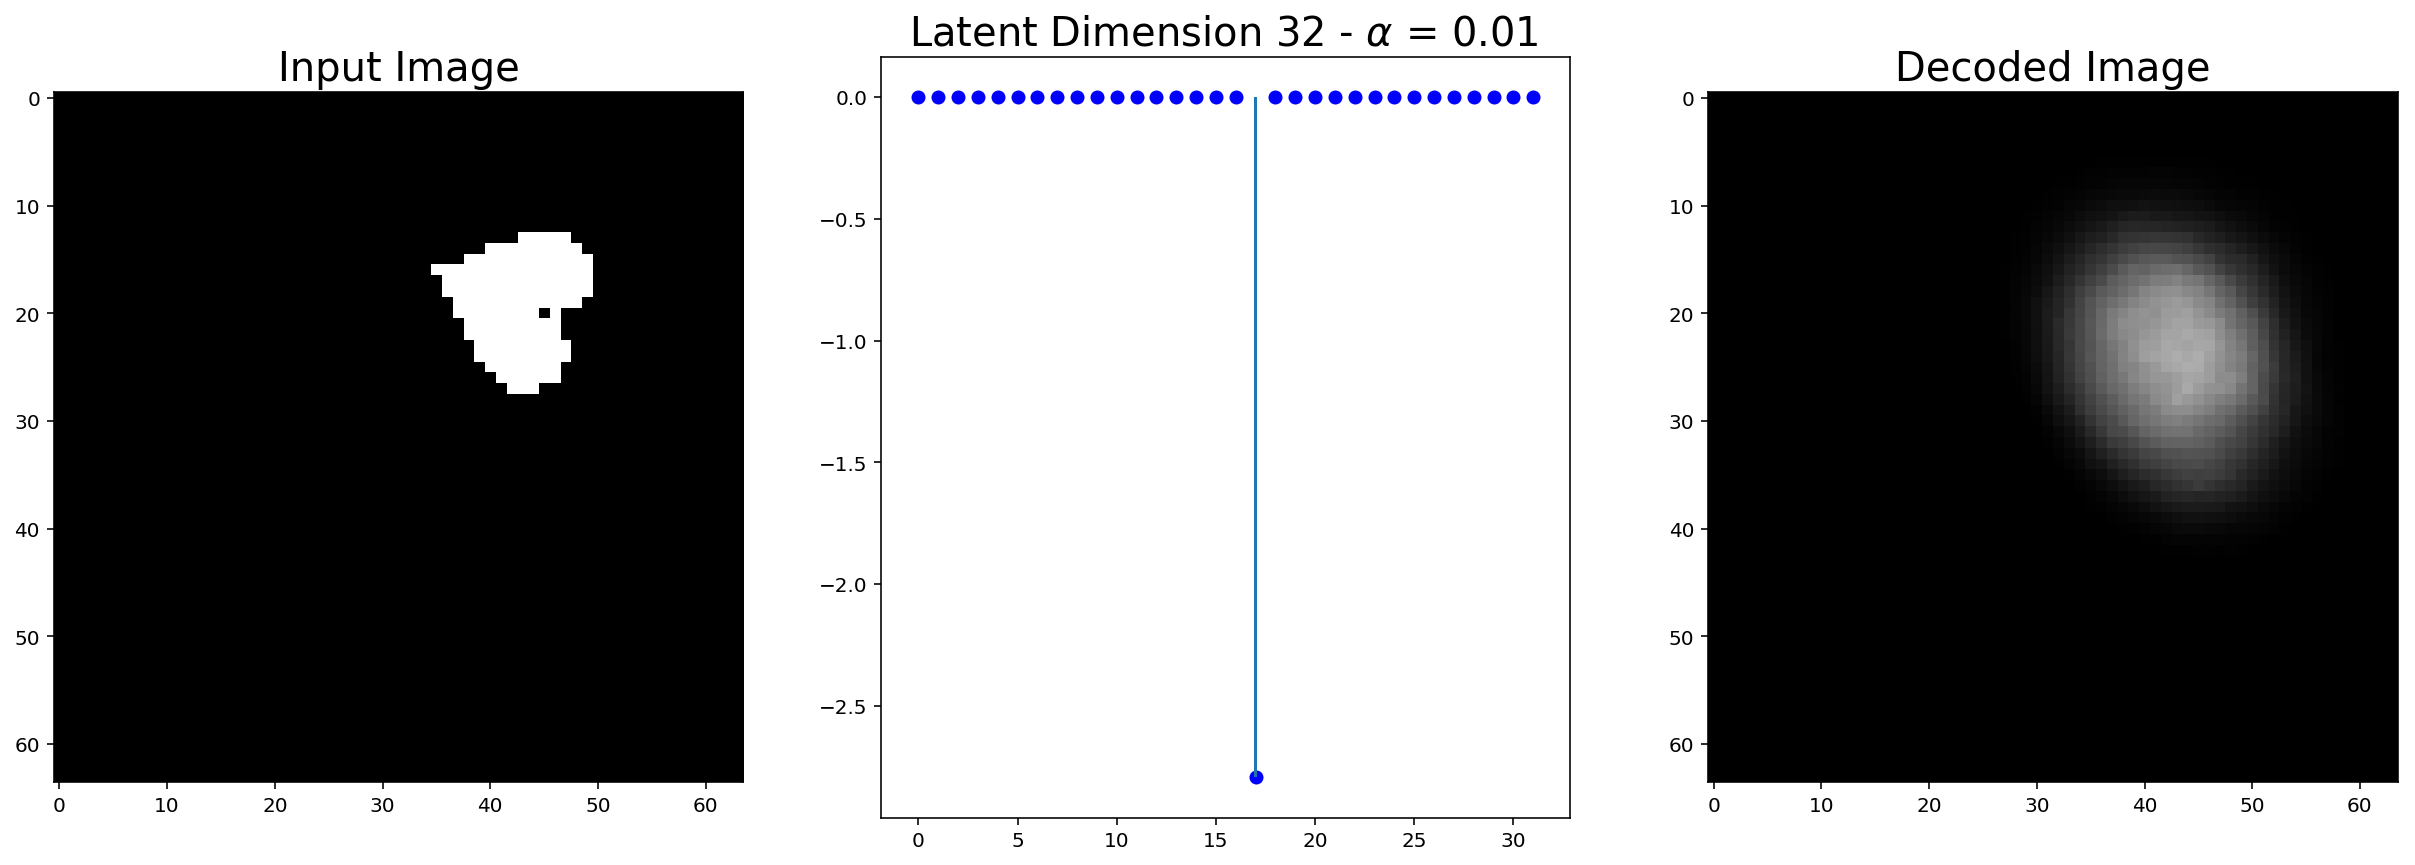

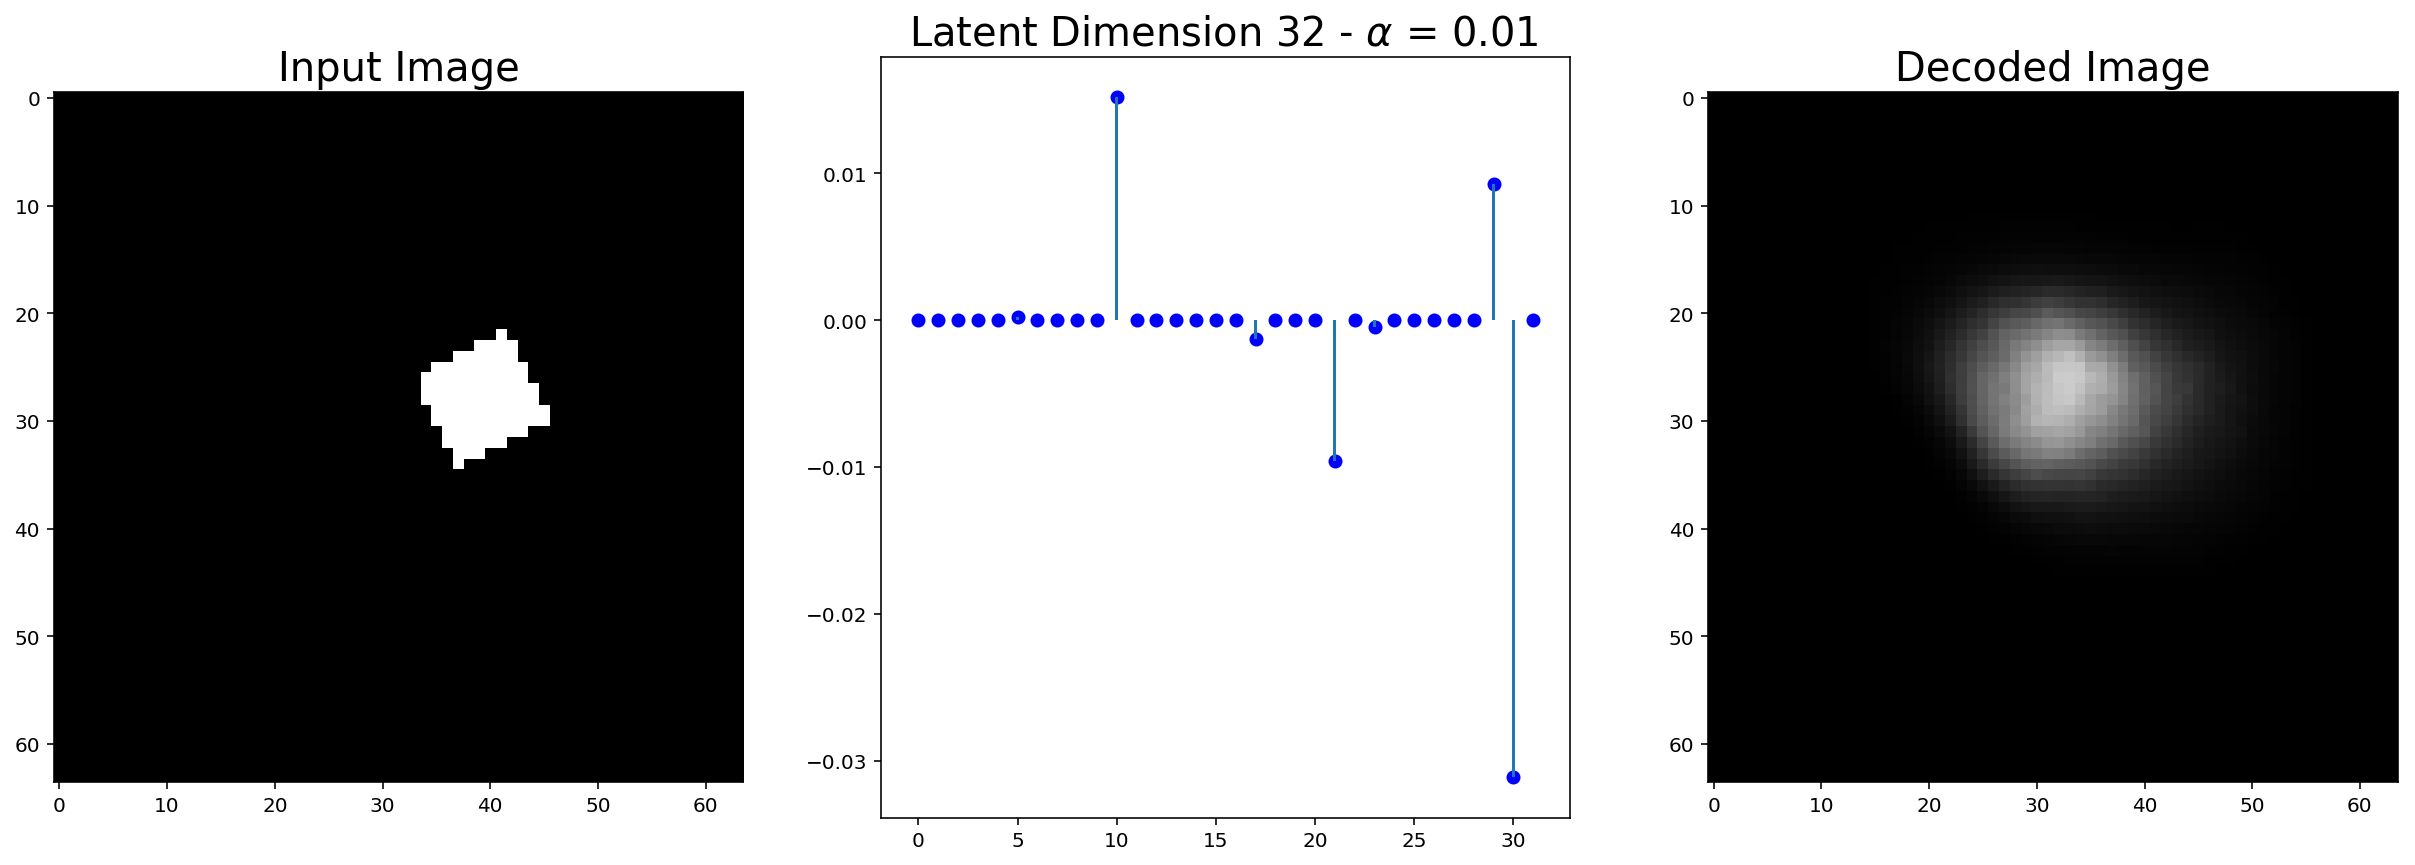

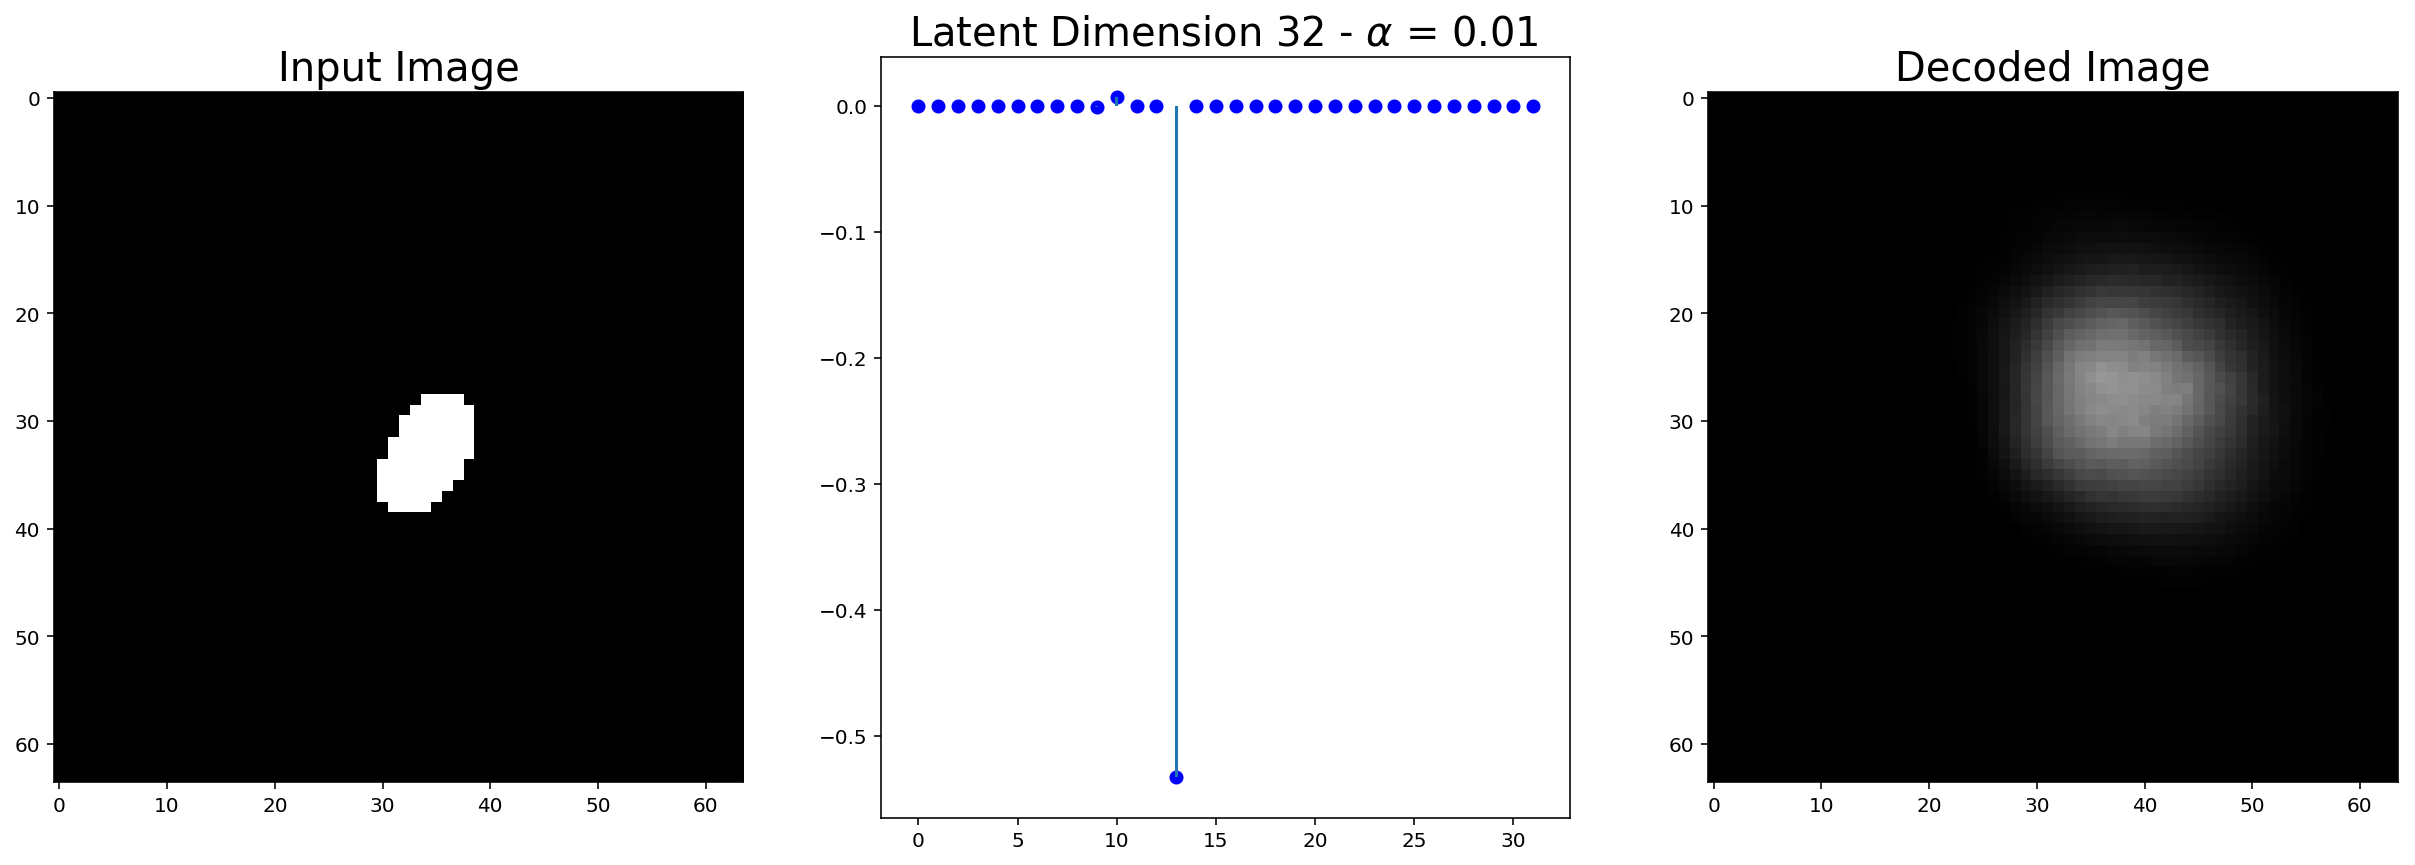

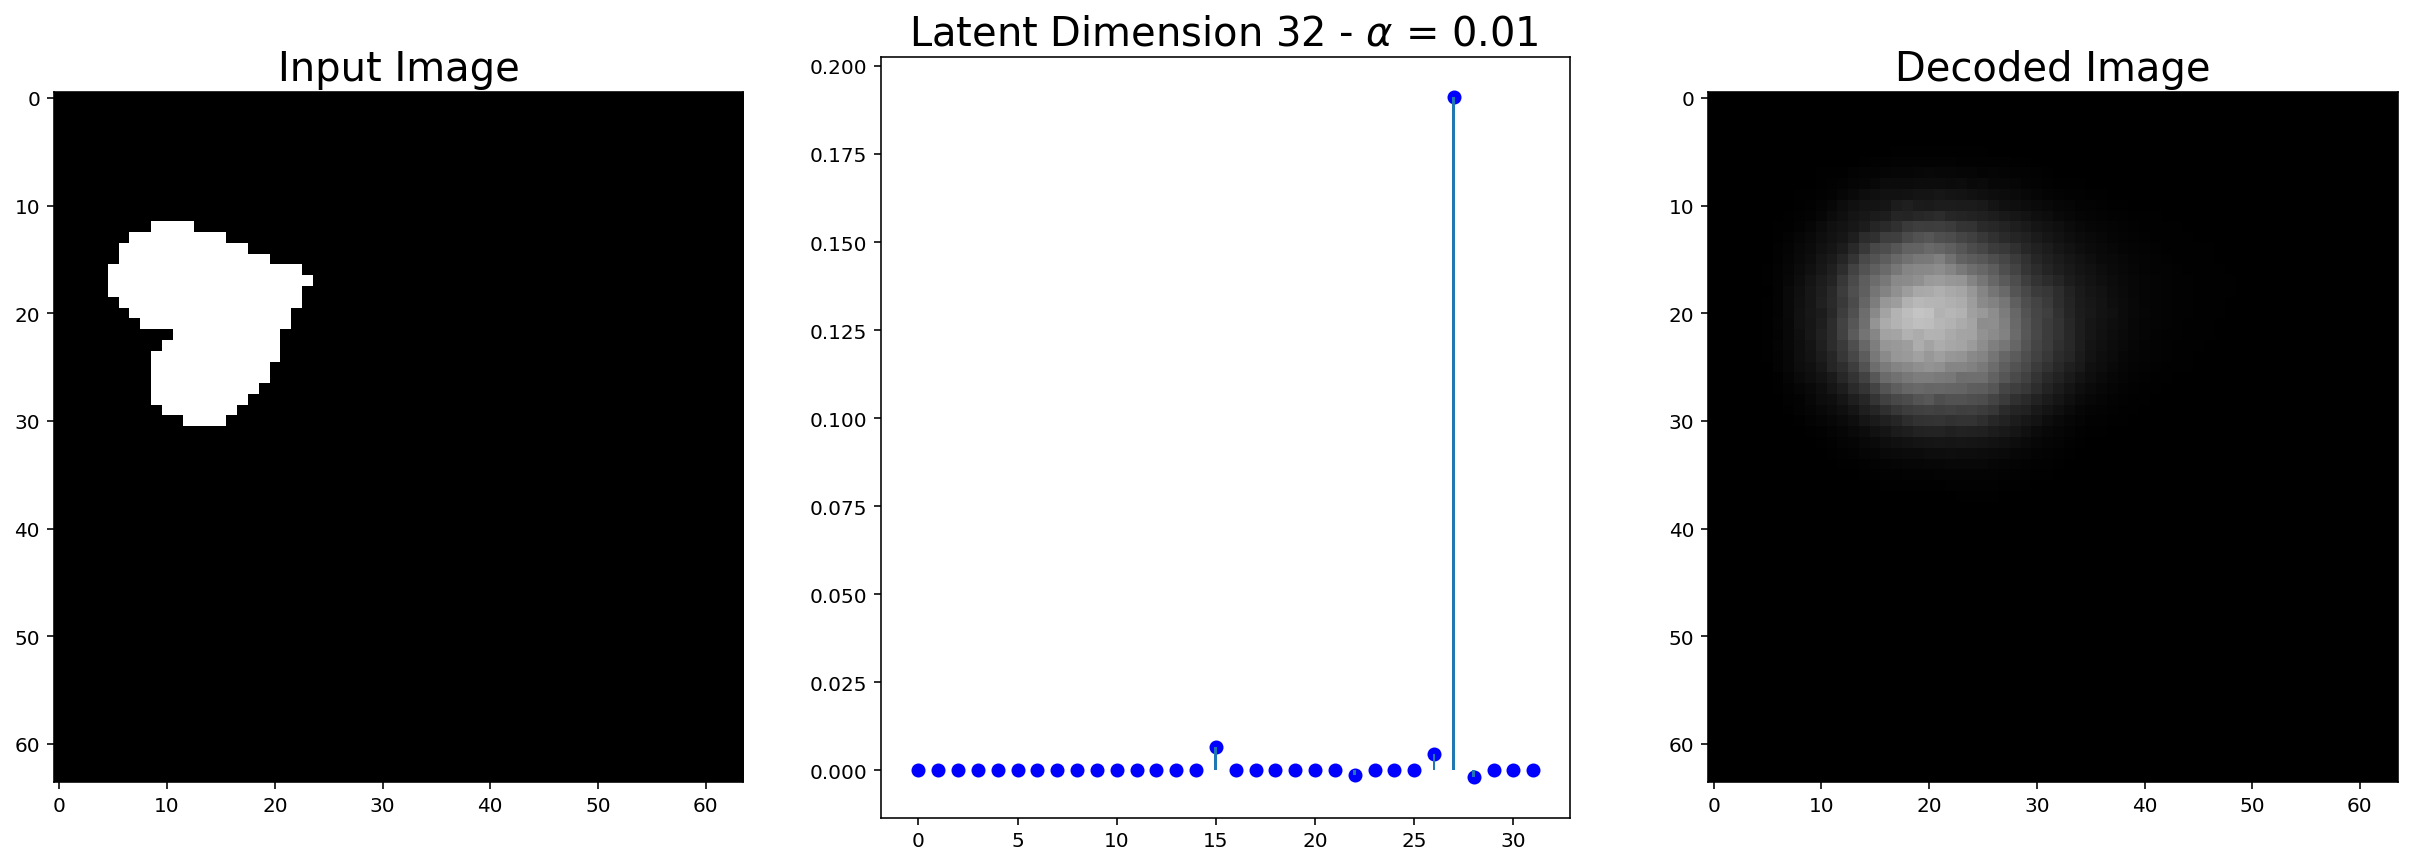

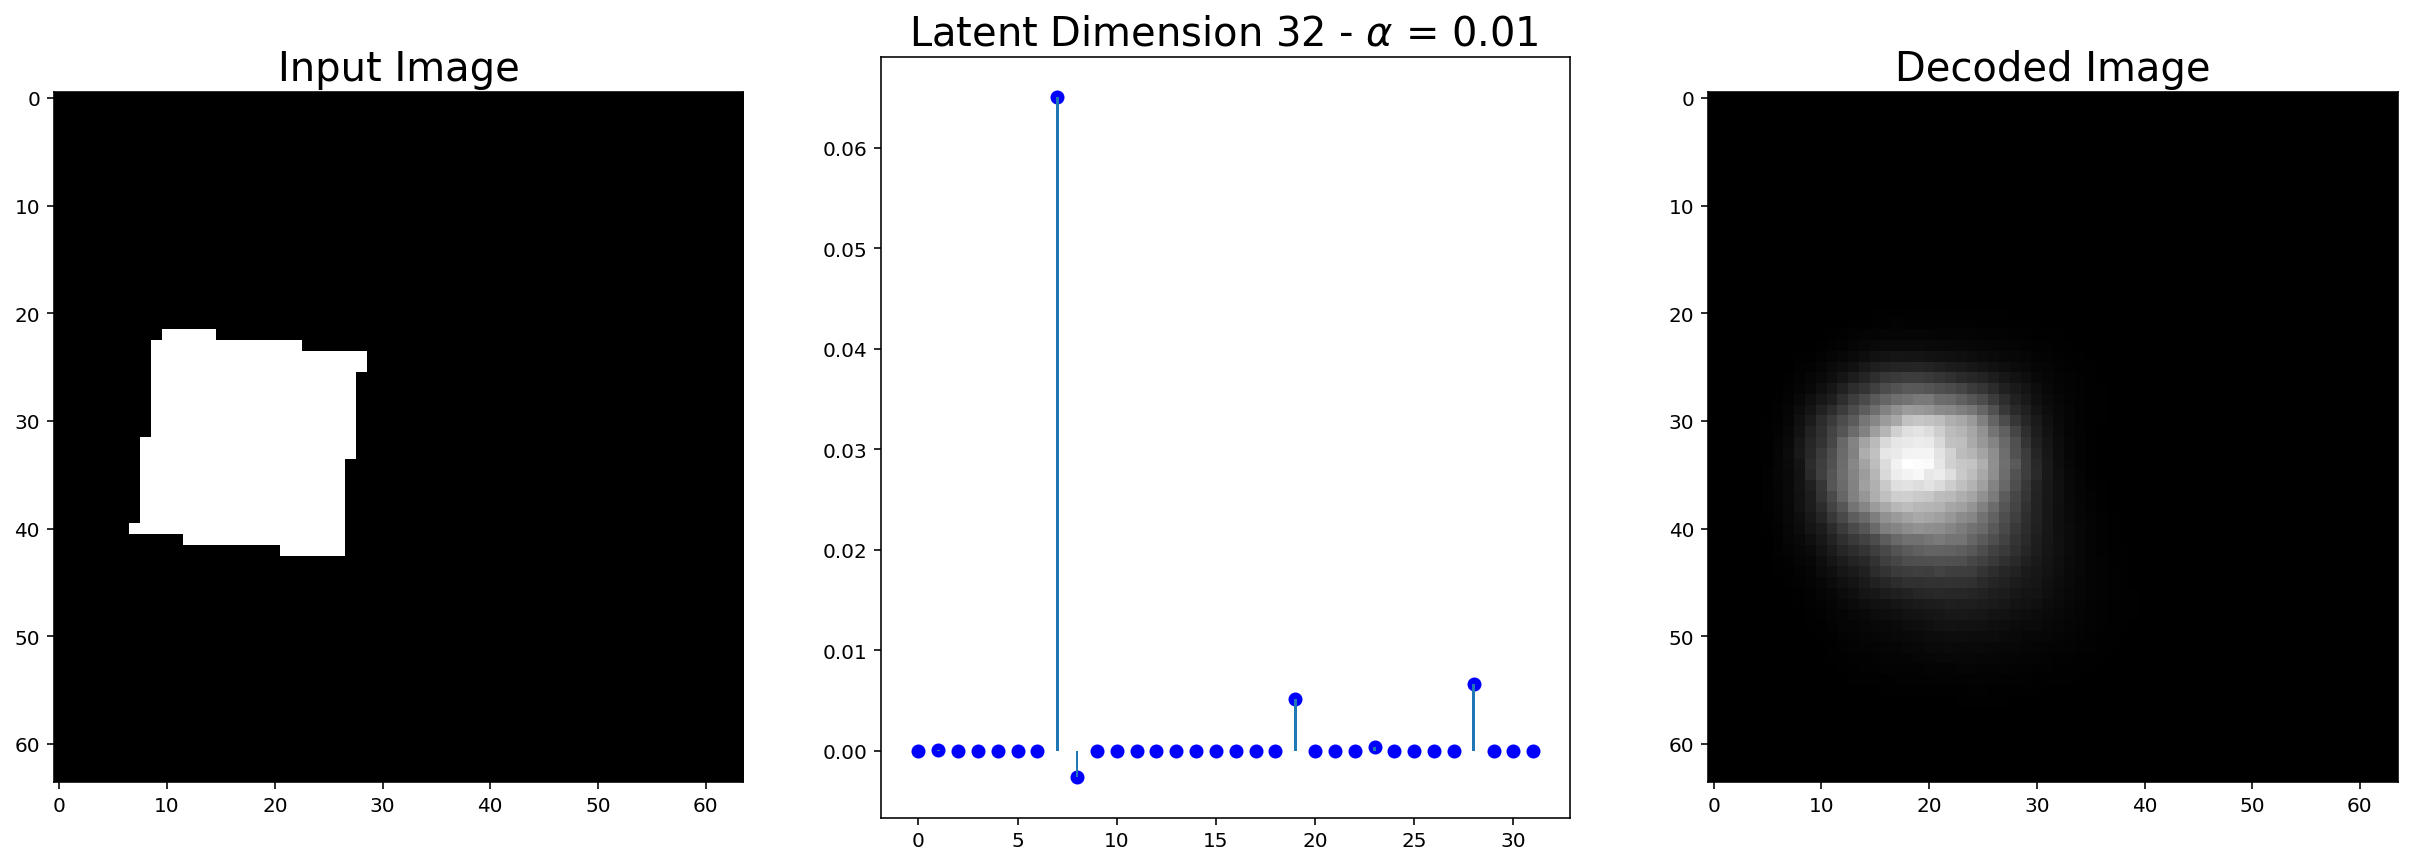

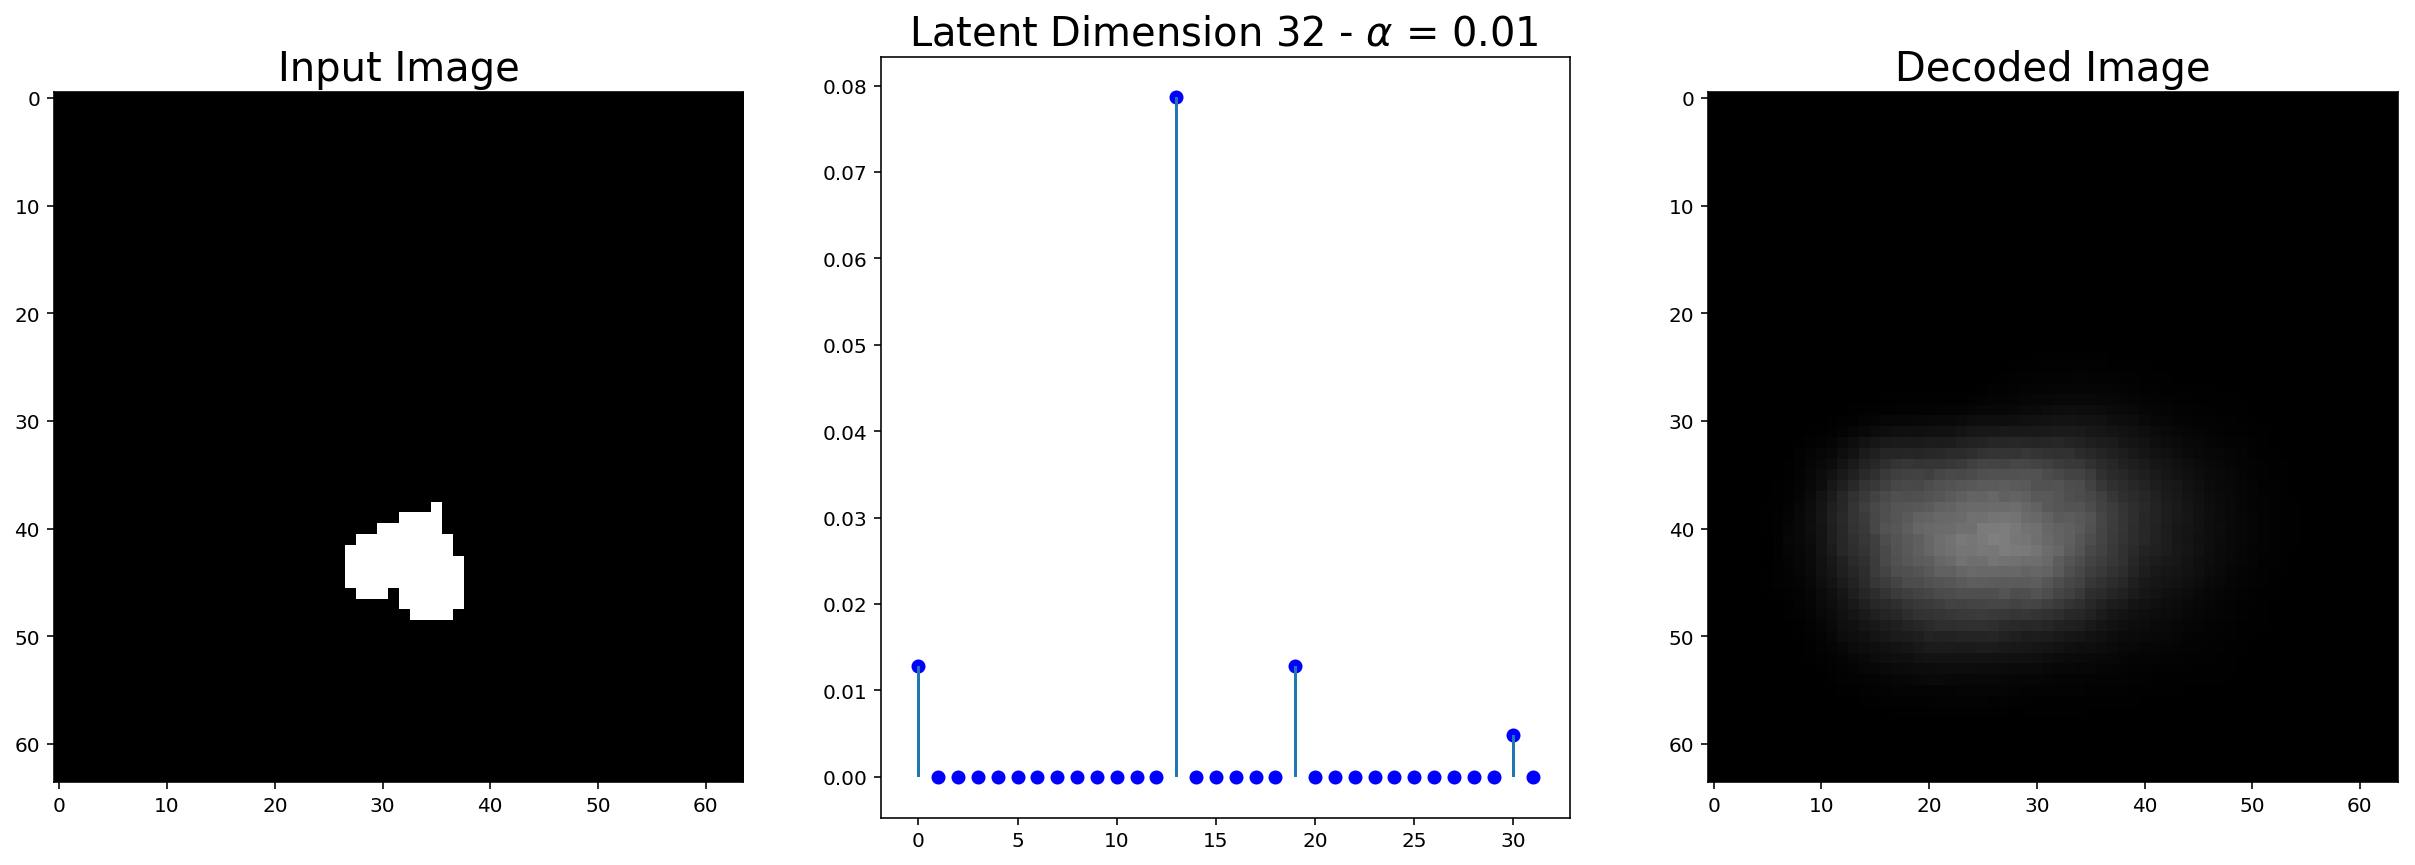

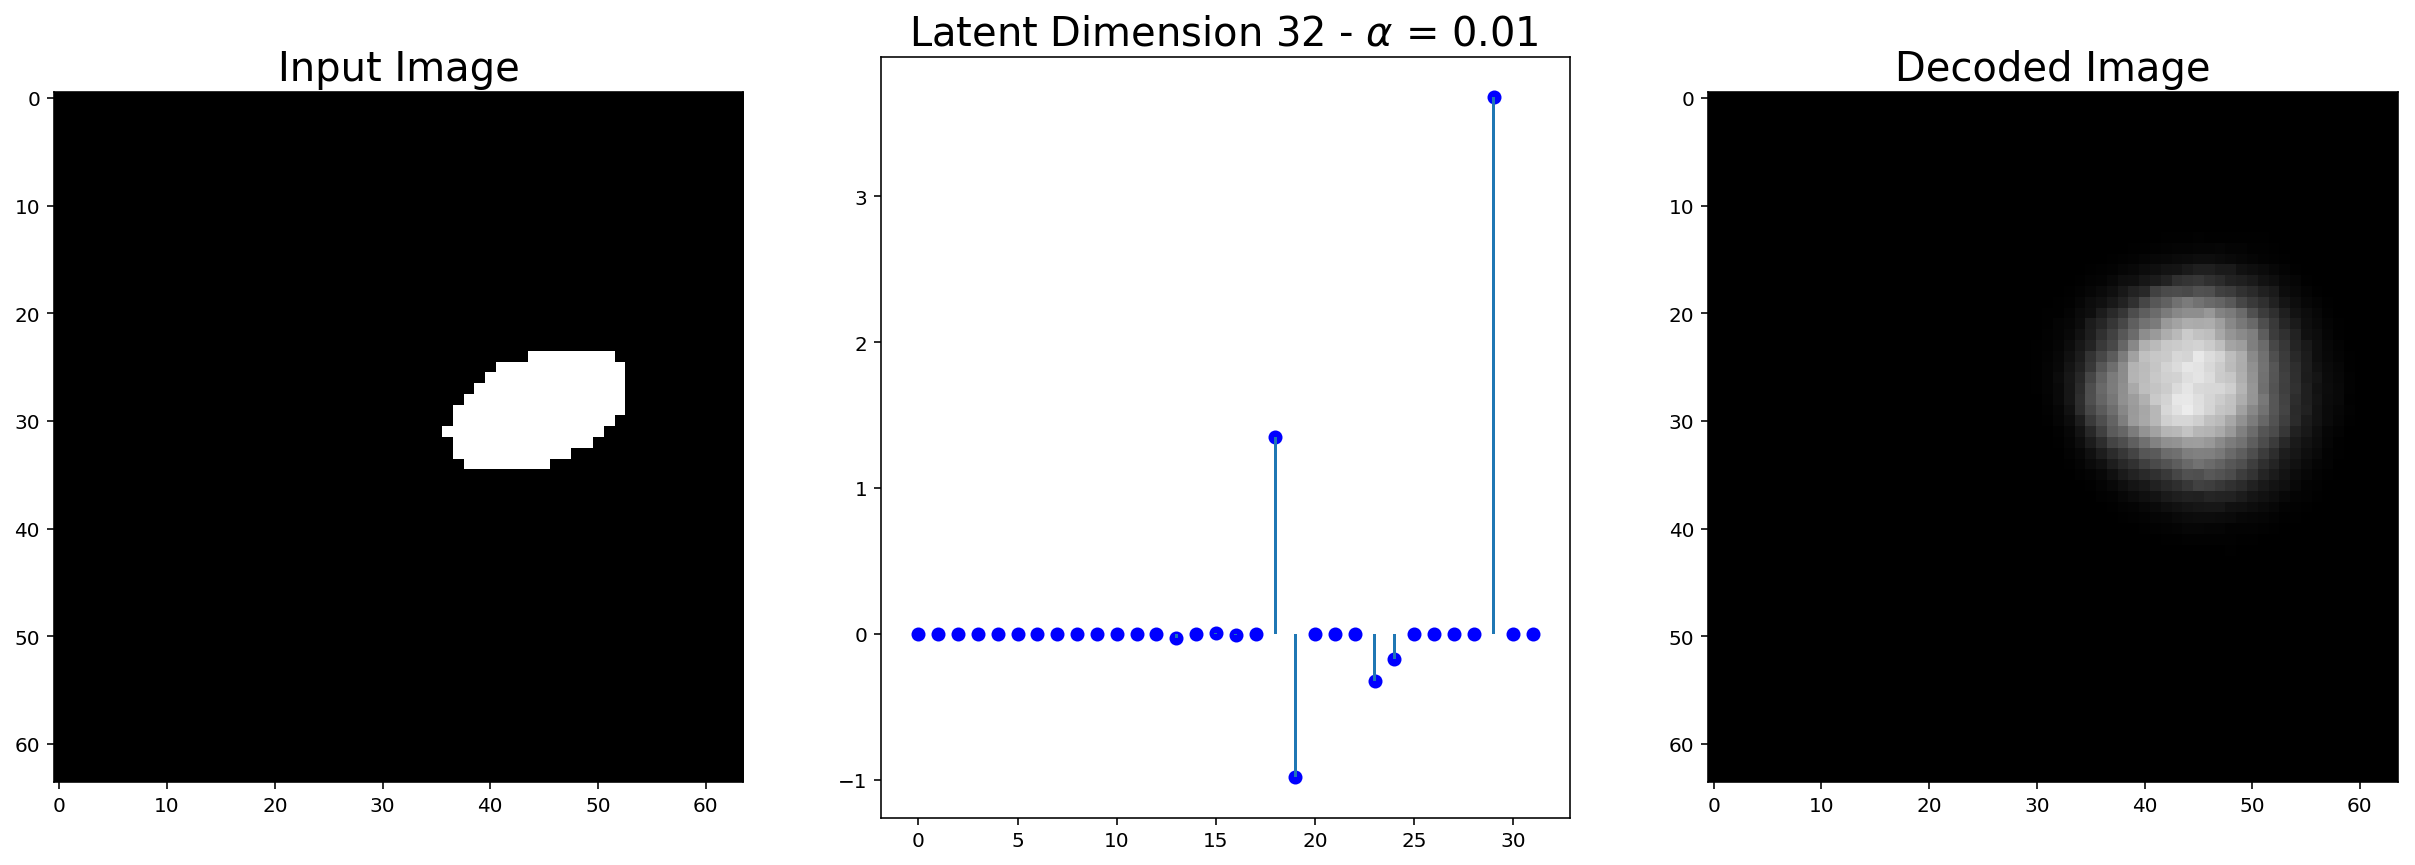

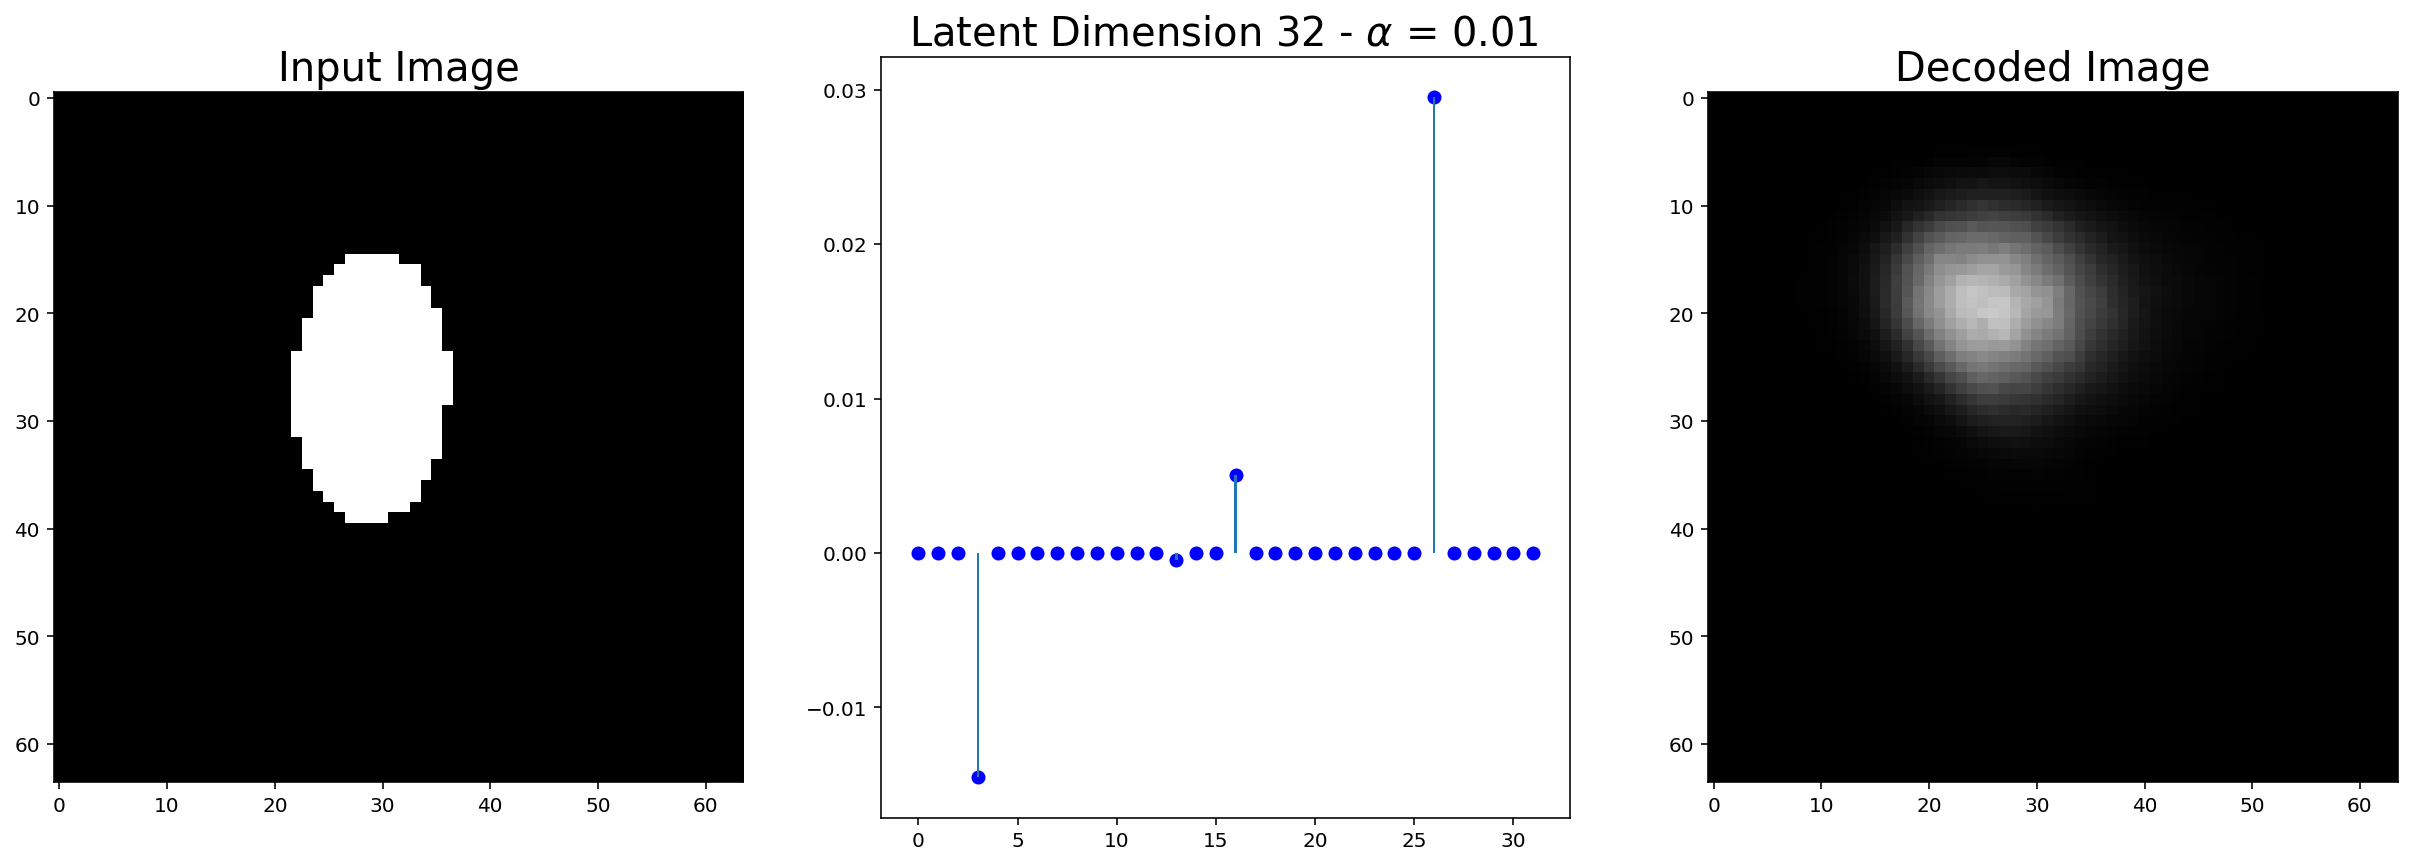

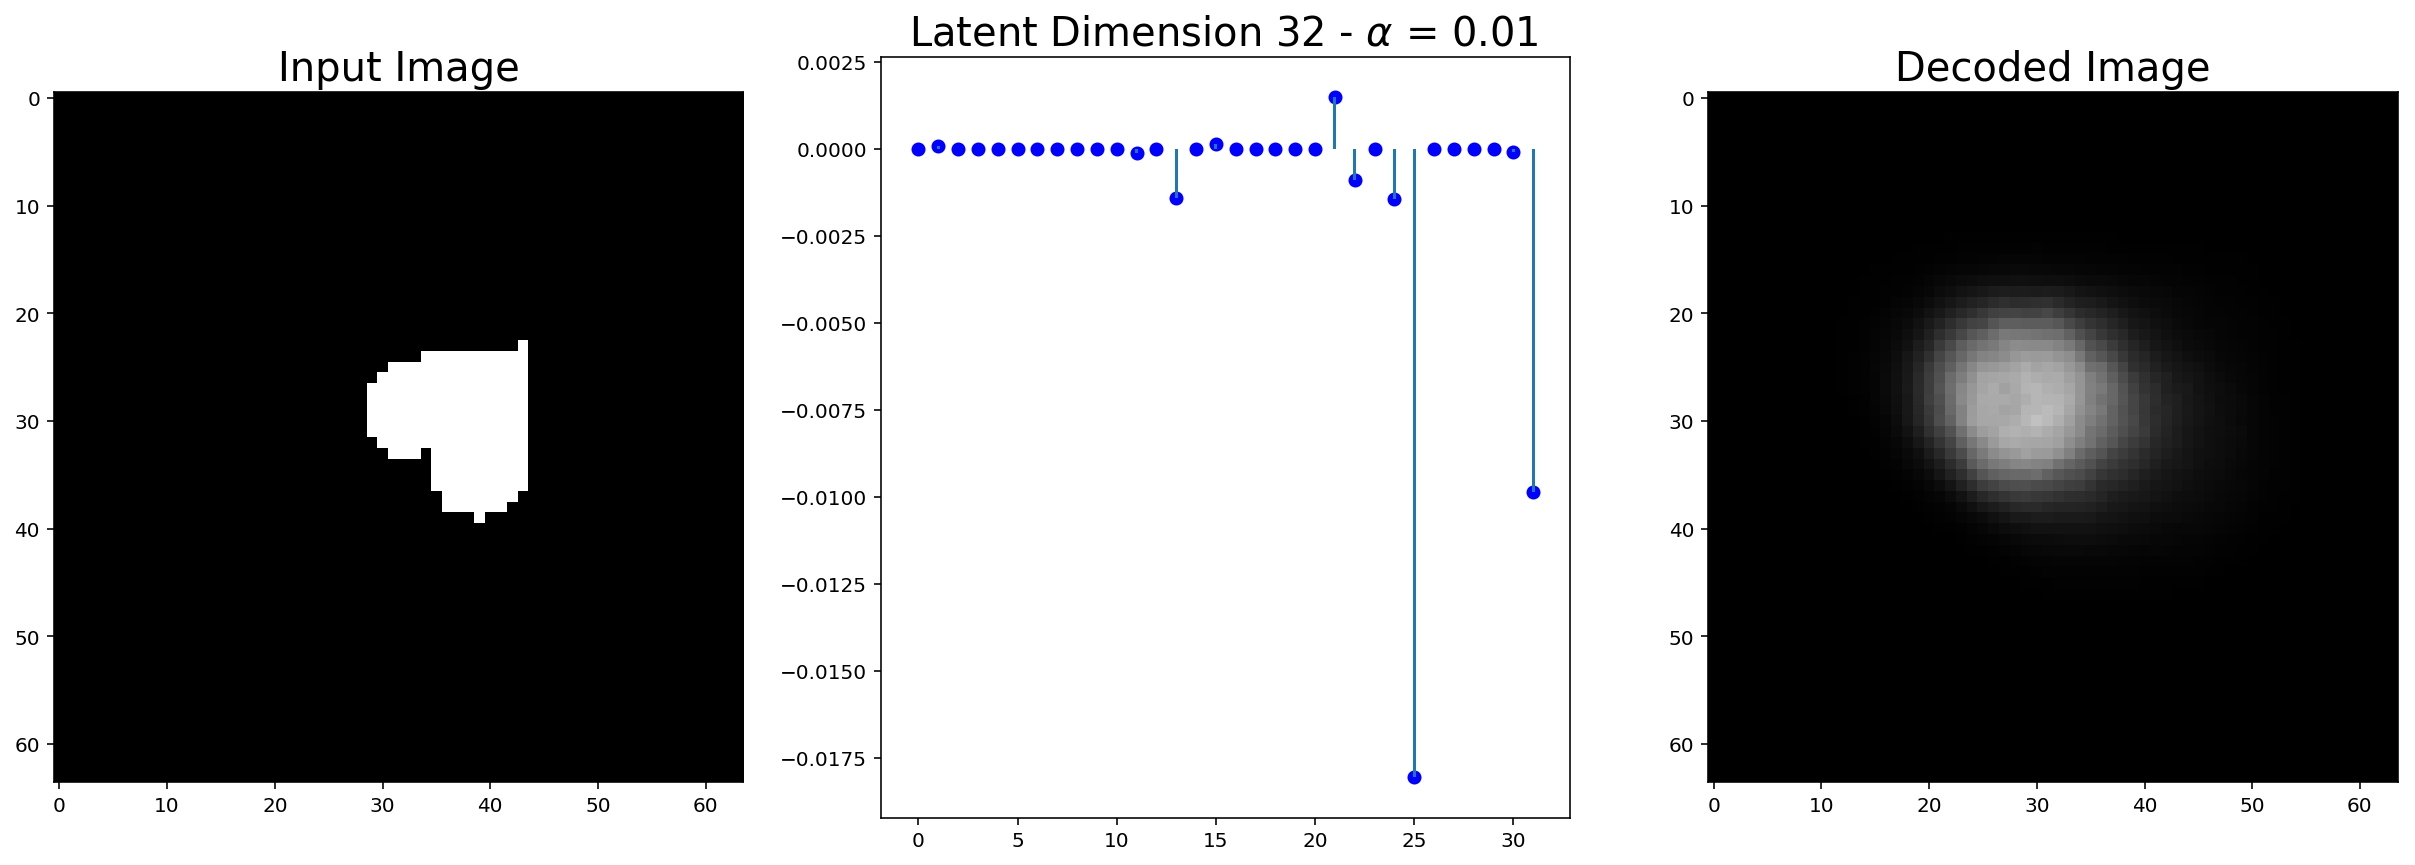

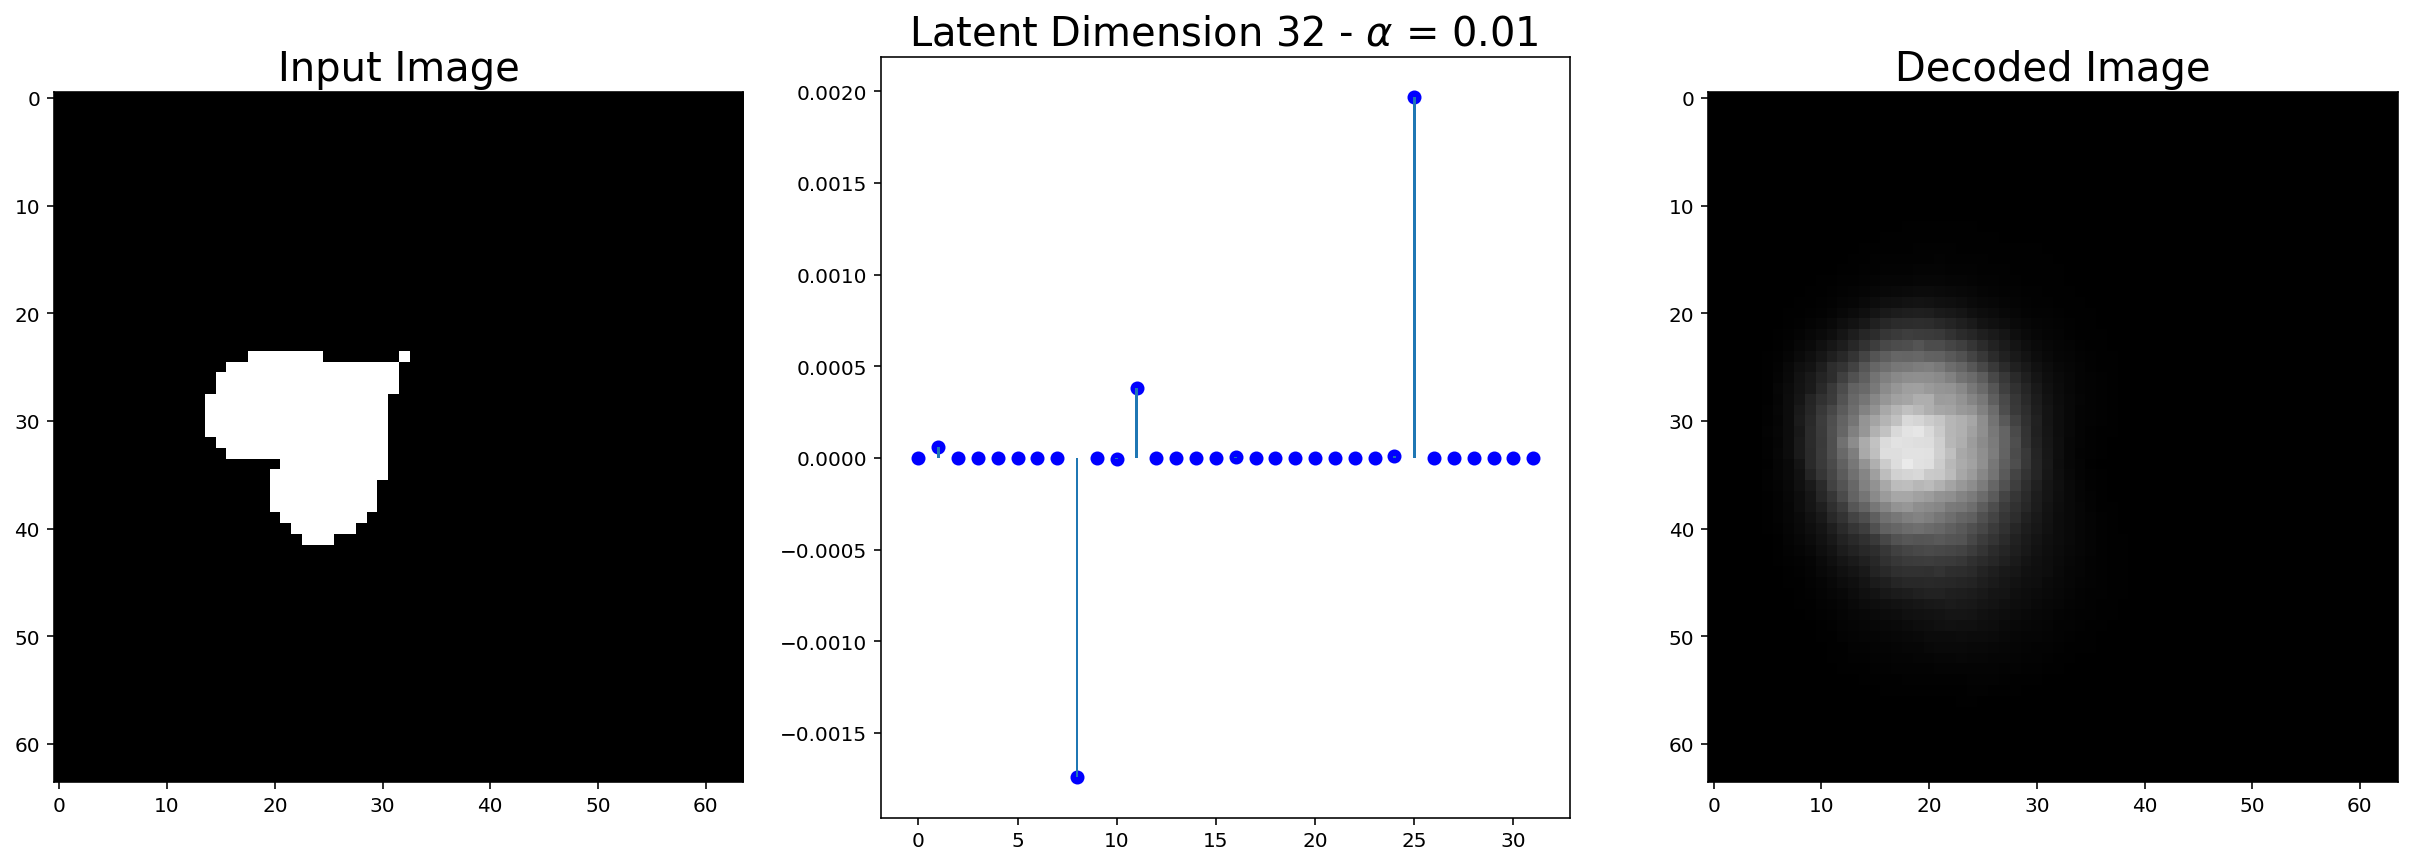

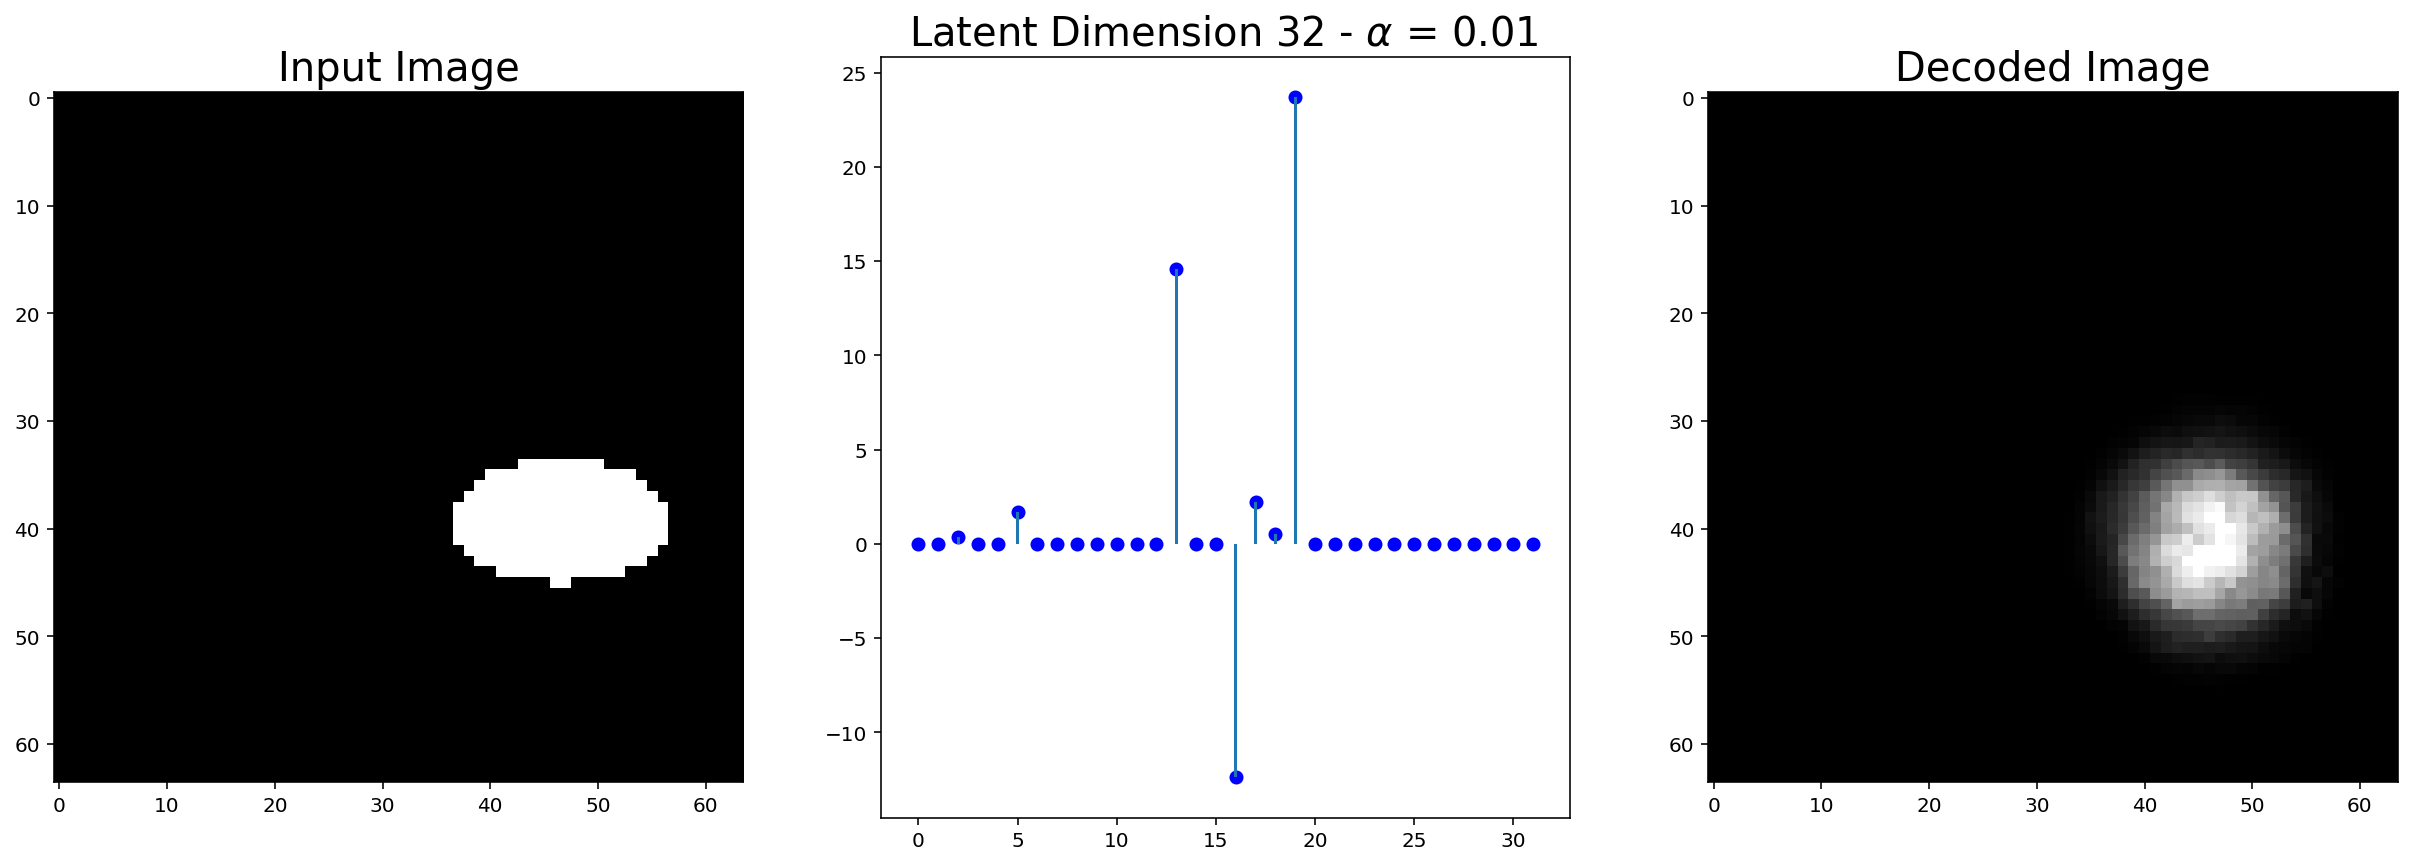

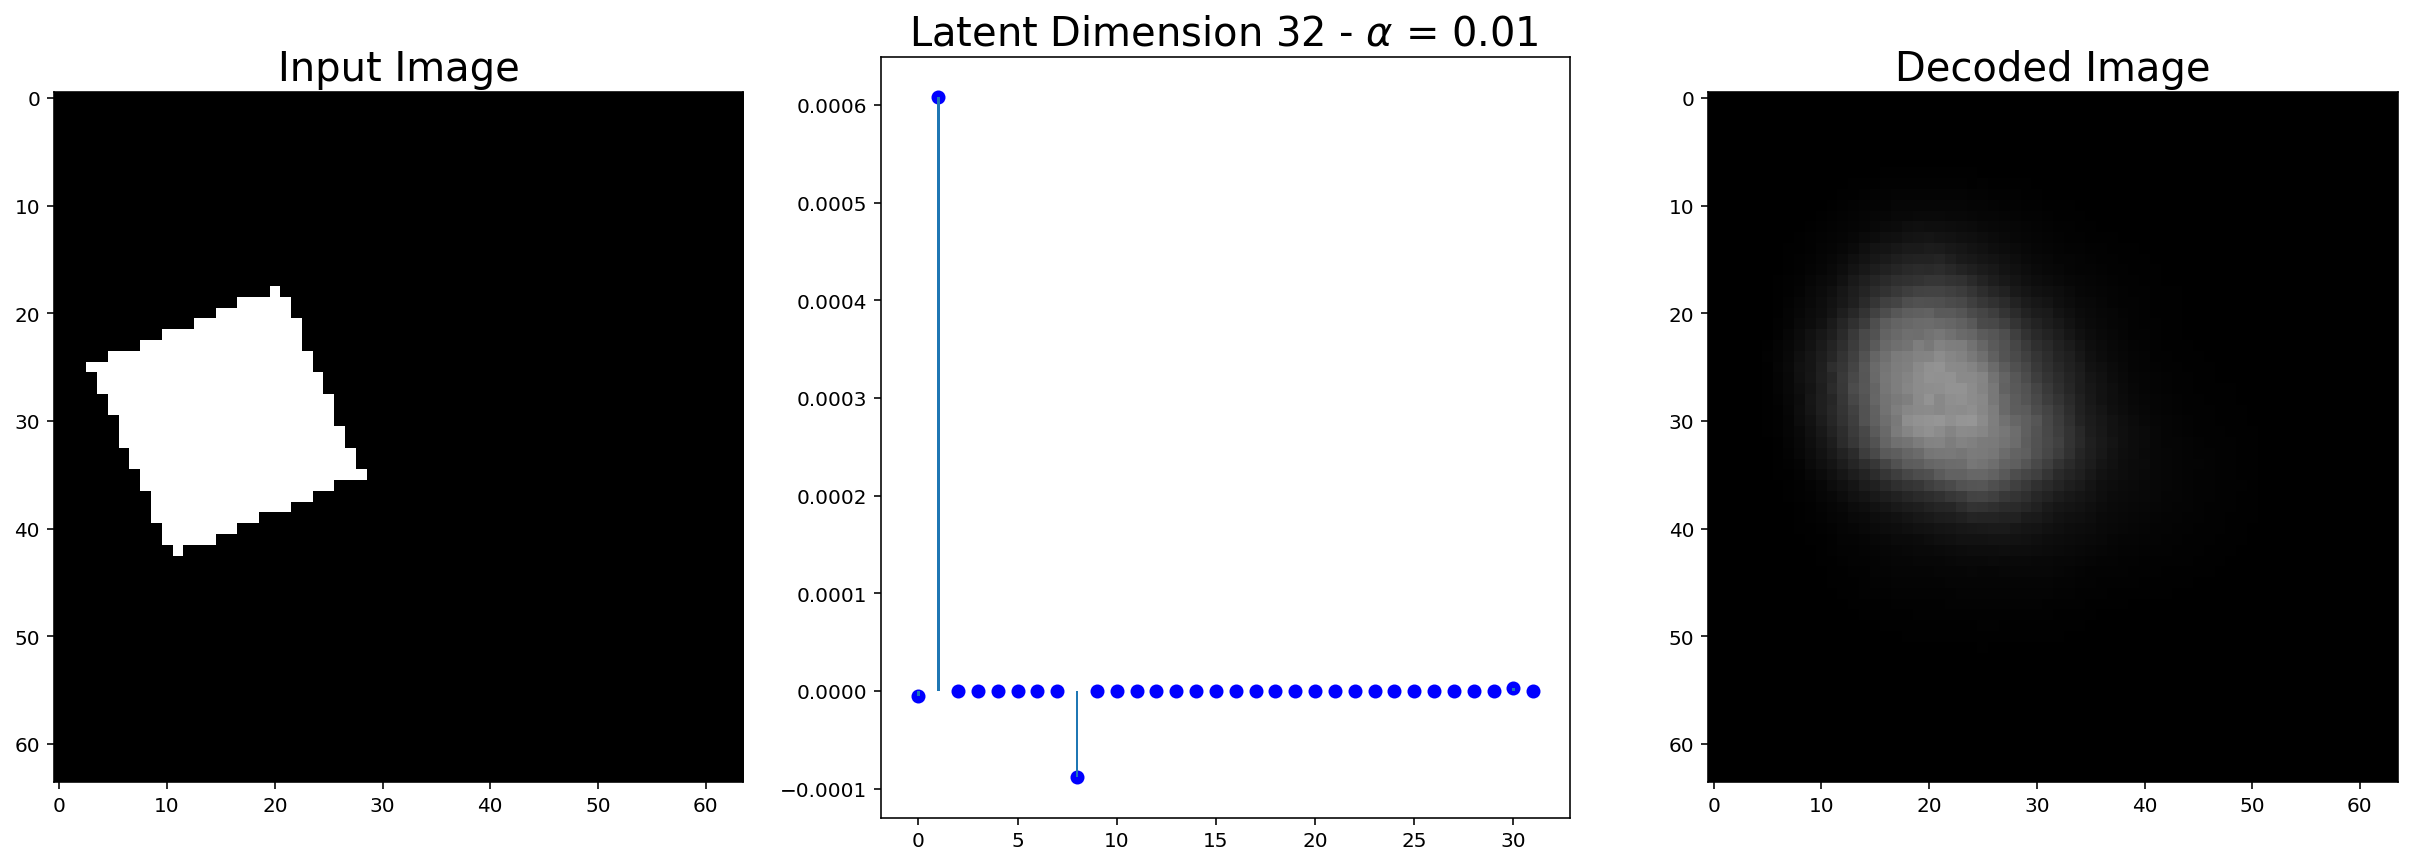

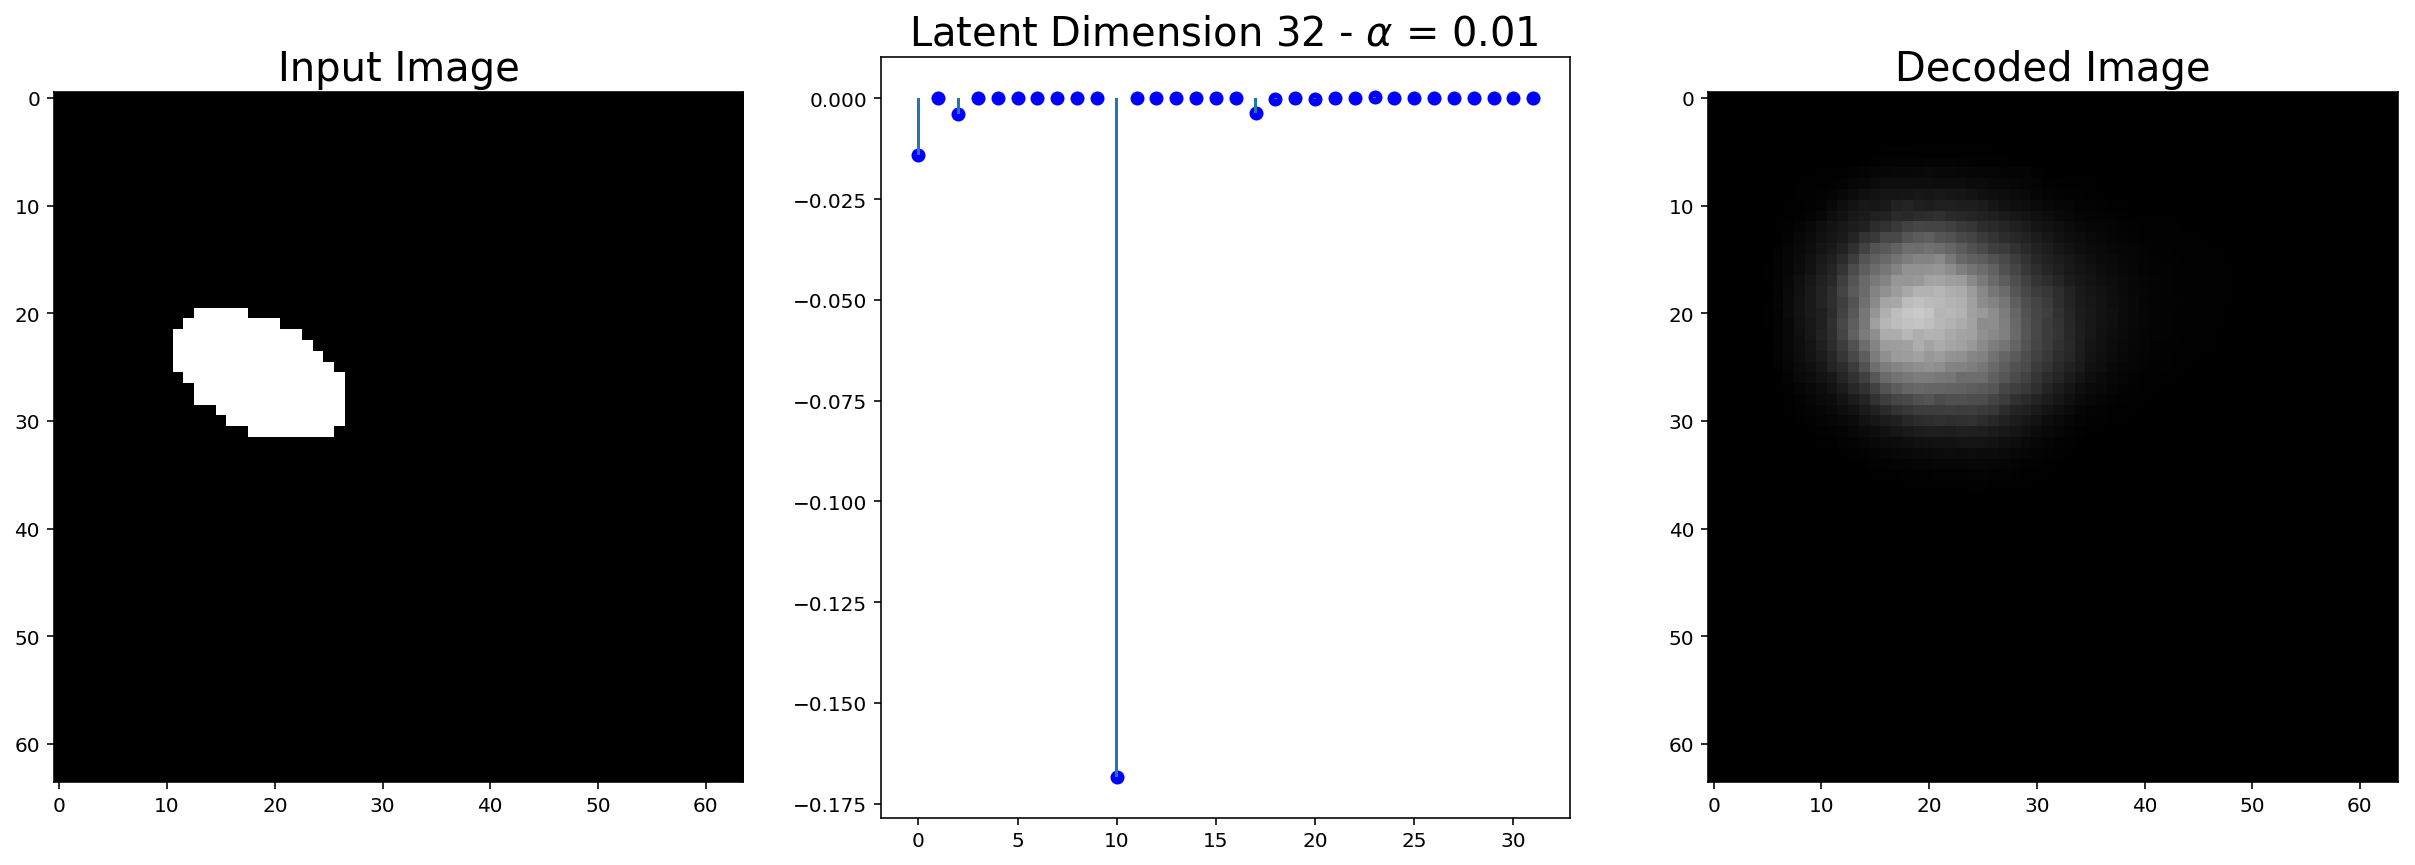

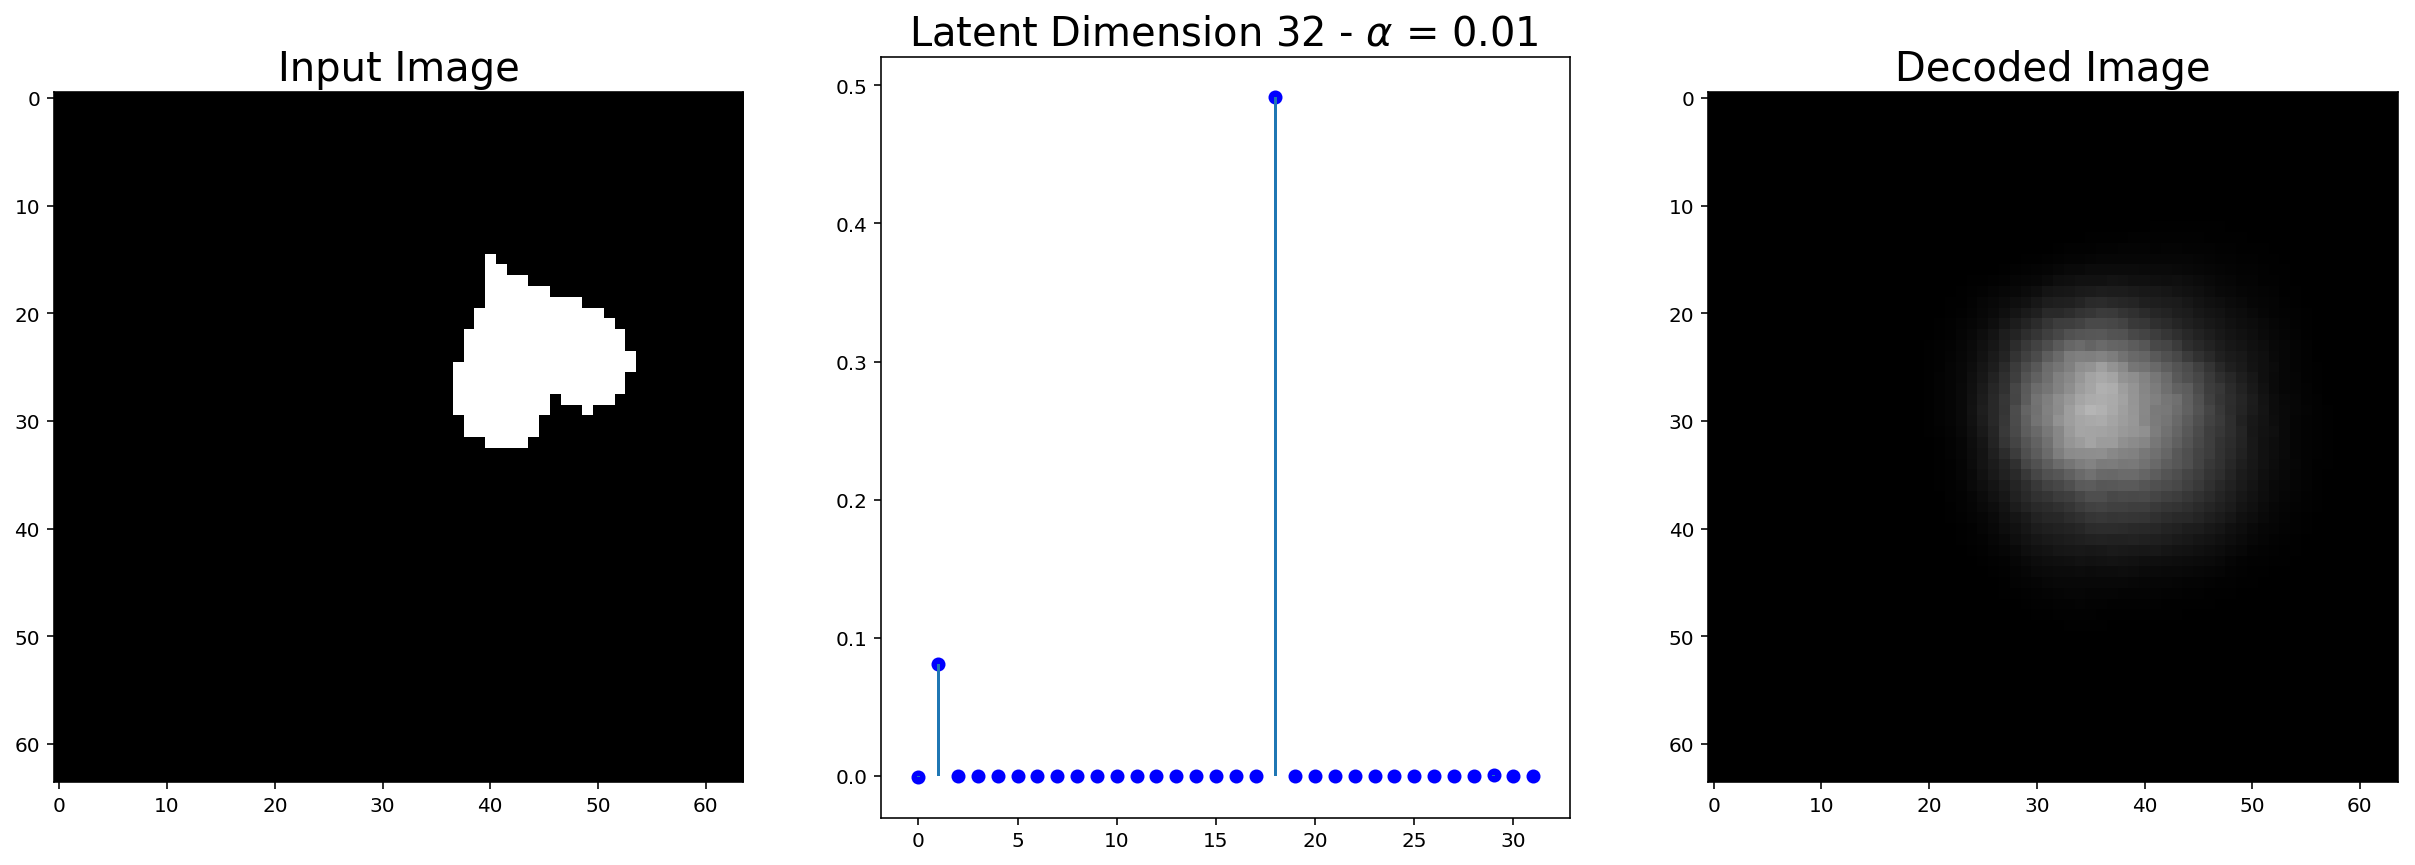

In [54]:
# 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 30 epochs
for i in range(30):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


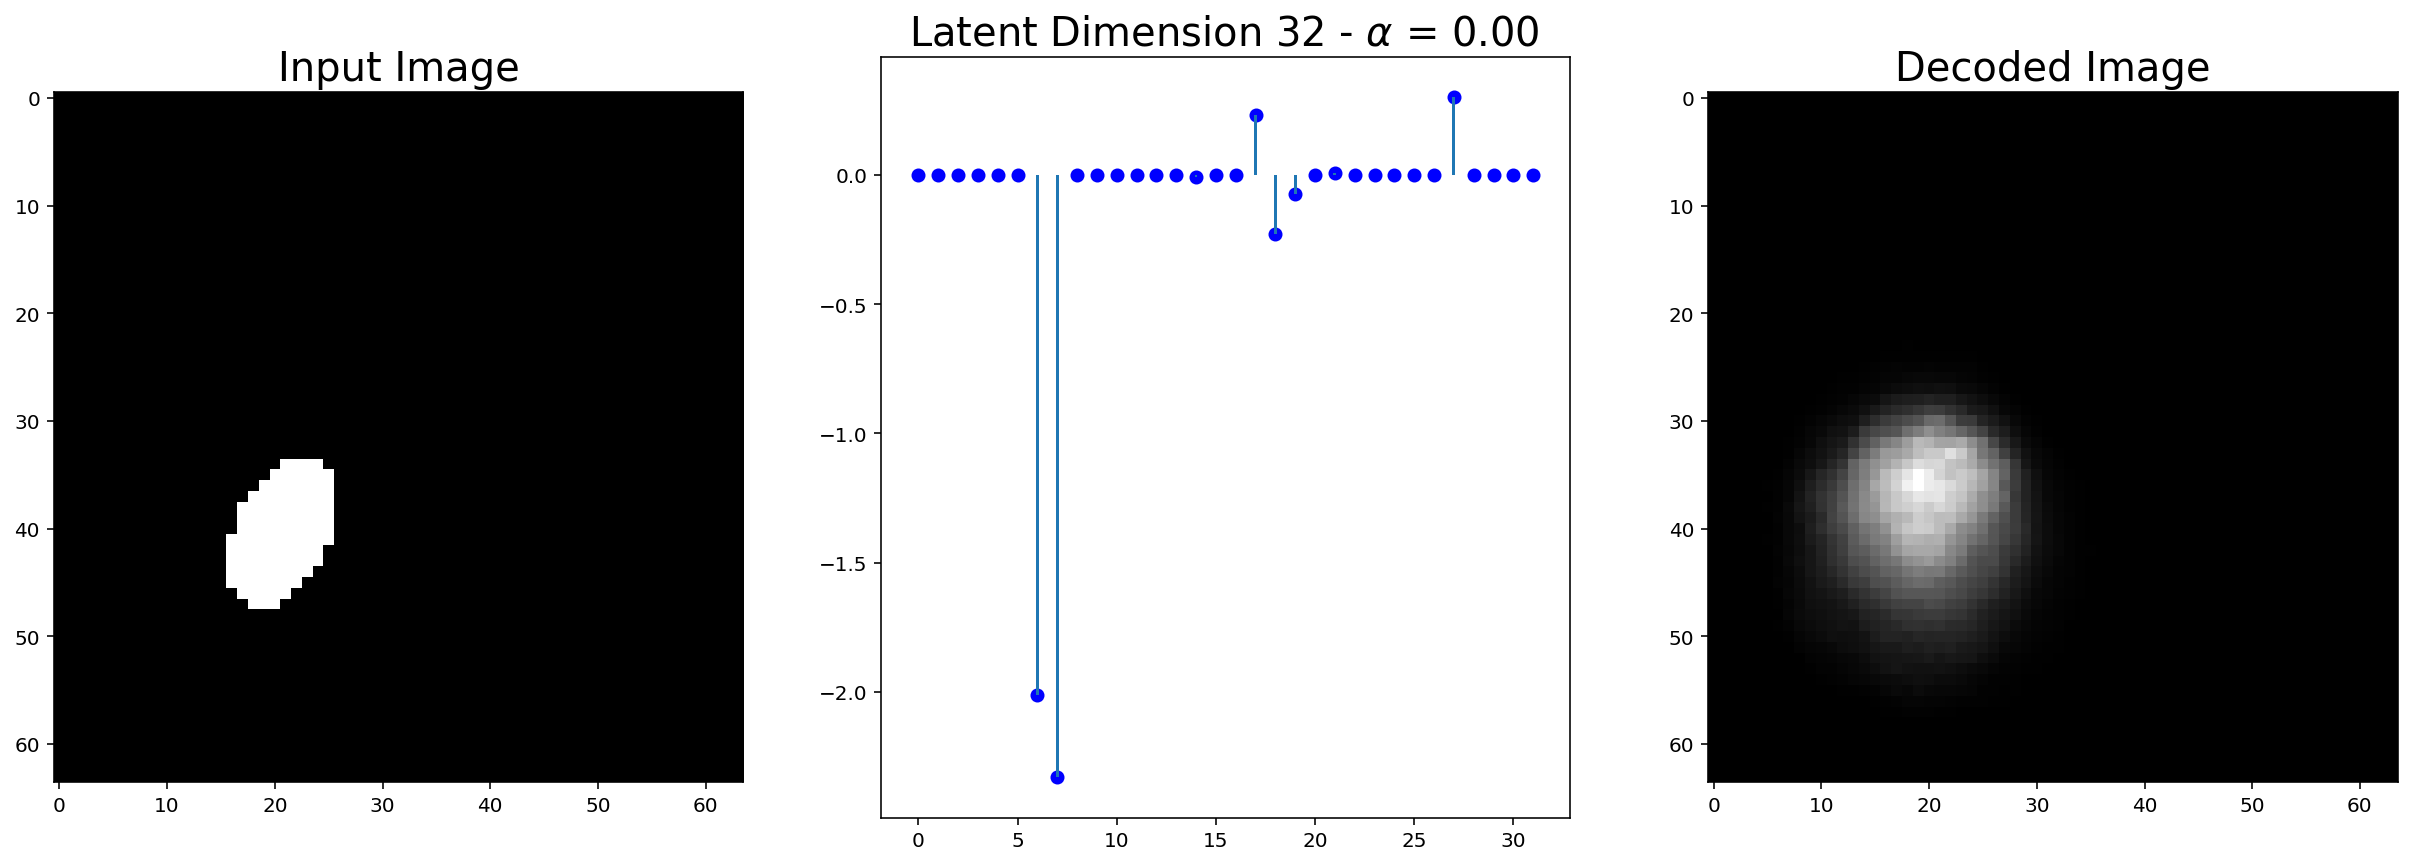

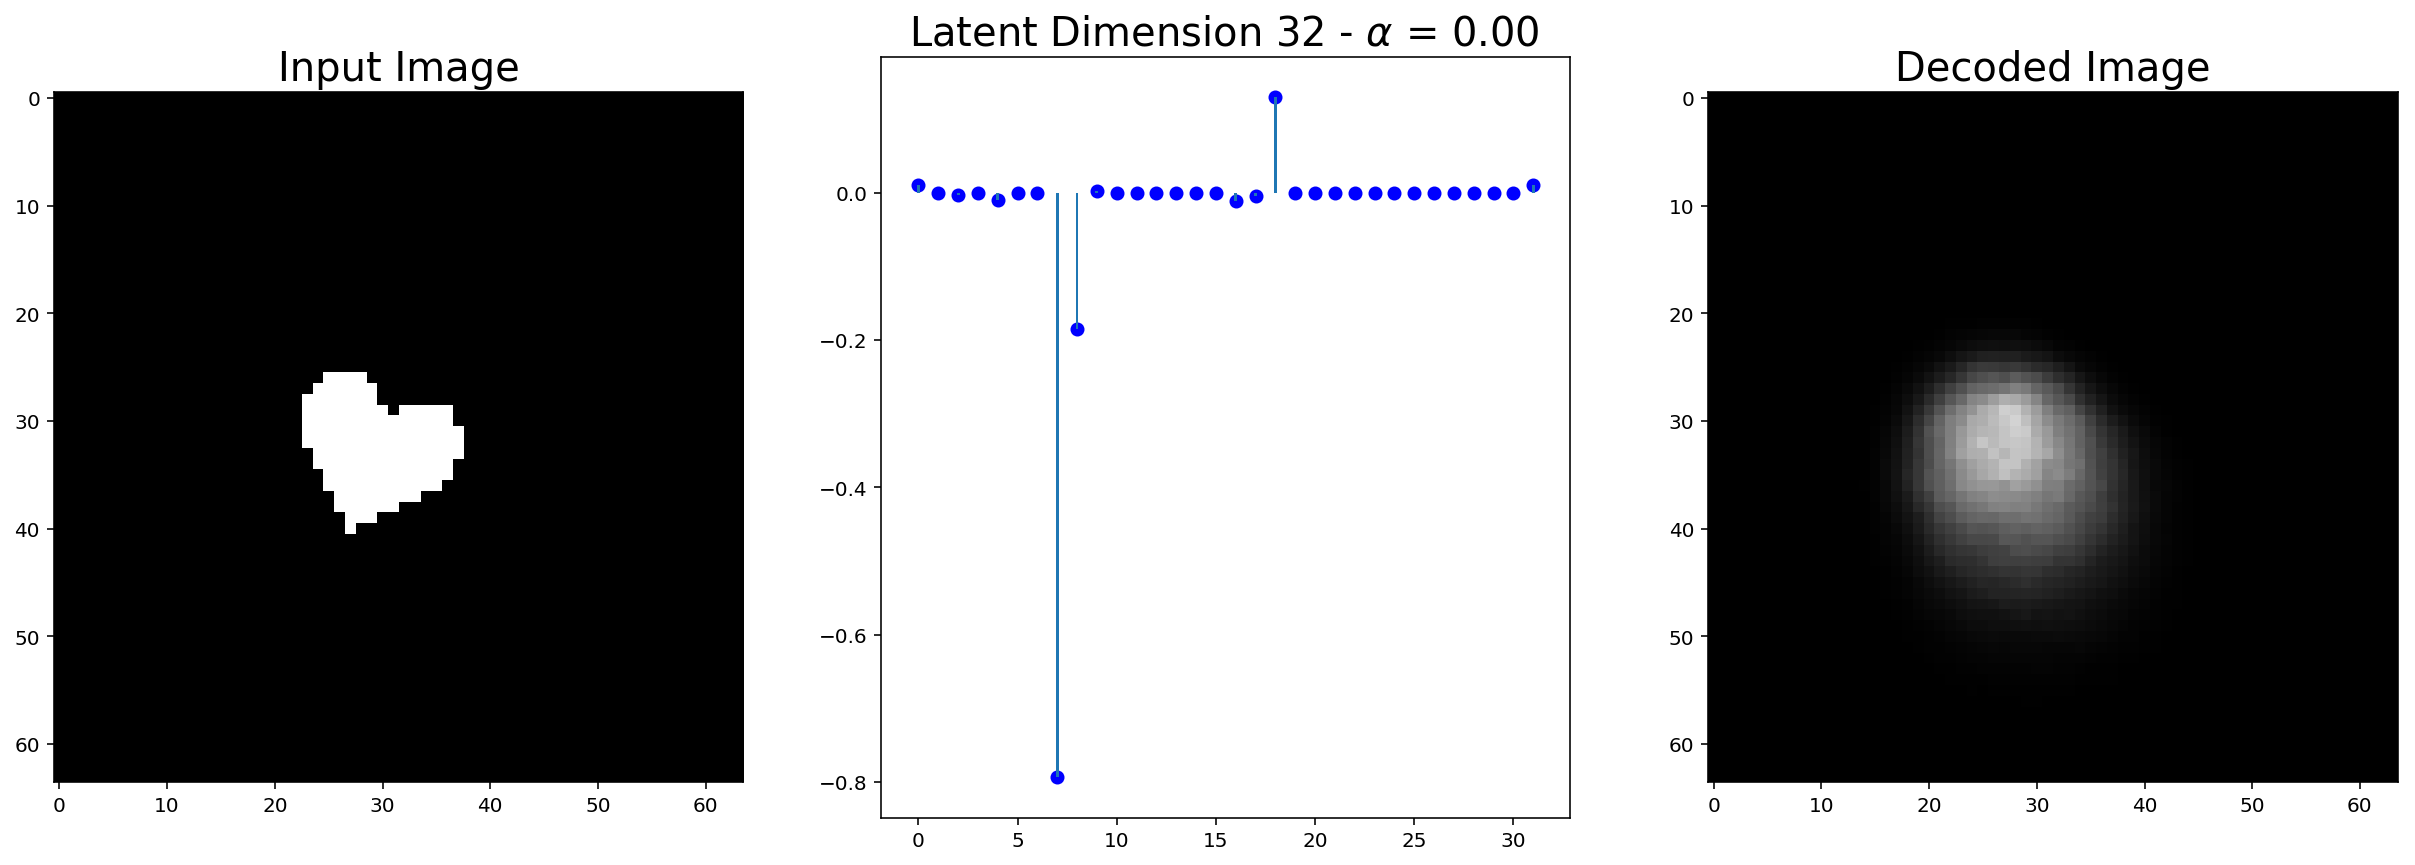

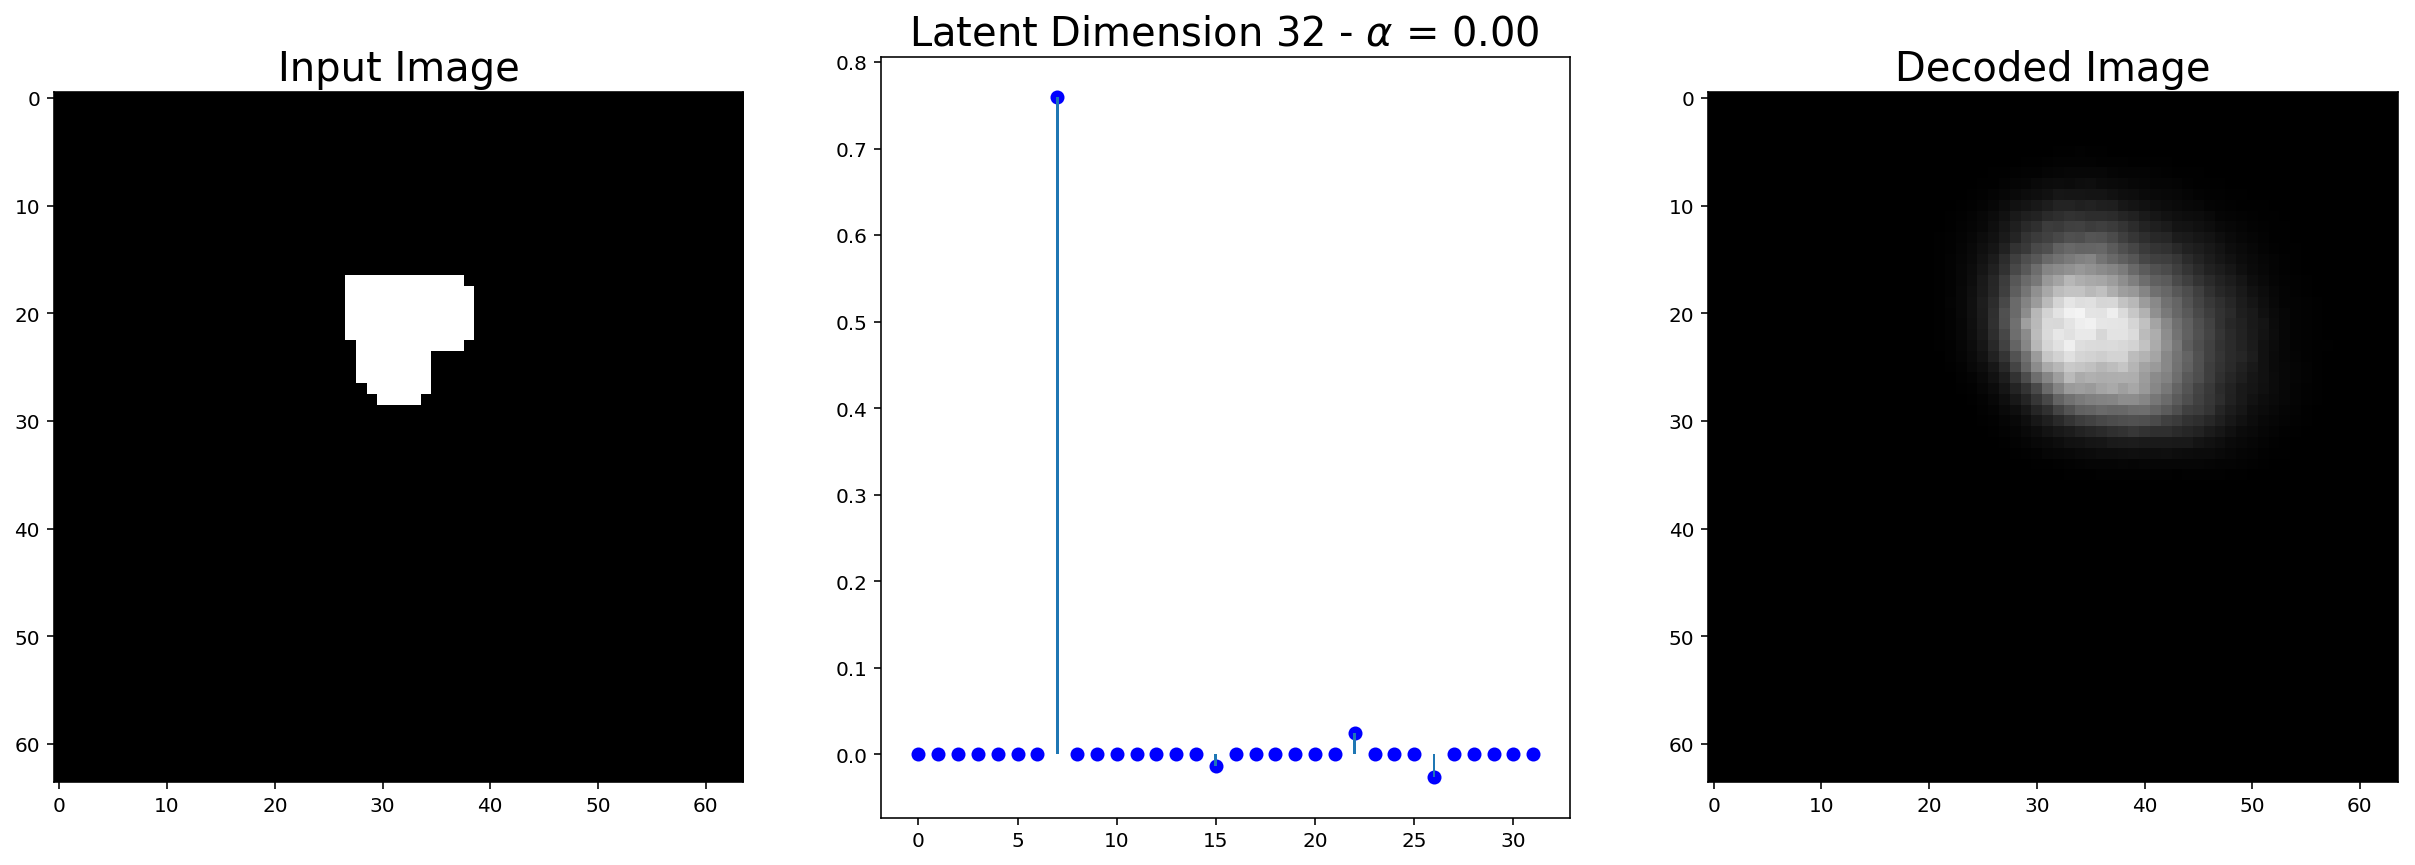

In [83]:
# 1200,1200 latent dimensions, alpha = 0.01, 32 hidden size, 30 epochs
for i in range(2,5):
    plot_encoding(images[i][None,:], vsc, latent_size, alpha)

In [95]:
final = [plot_horizontal_traversal(images[idx][None,:], vsc, latent_size, 
                                alpha, length=8, delta=d, threshold=3e-4,
                                plot_all=False, plot_list=[dim]) \
         for idx, d, dim in [(4, 0.3, i) for i in range(5)]]

[0, 7, 20]
7 [0, 7, 20]
[7, 10, 20]
7 [7, 10, 20]
[7, 29, 30]
30 [7, 29, 30]
[0, 4, 7, 13, 15, 27]
13 [0, 4, 7, 13, 15, 27]
[4, 7, 17, 25]
4 [4, 7, 17, 25]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


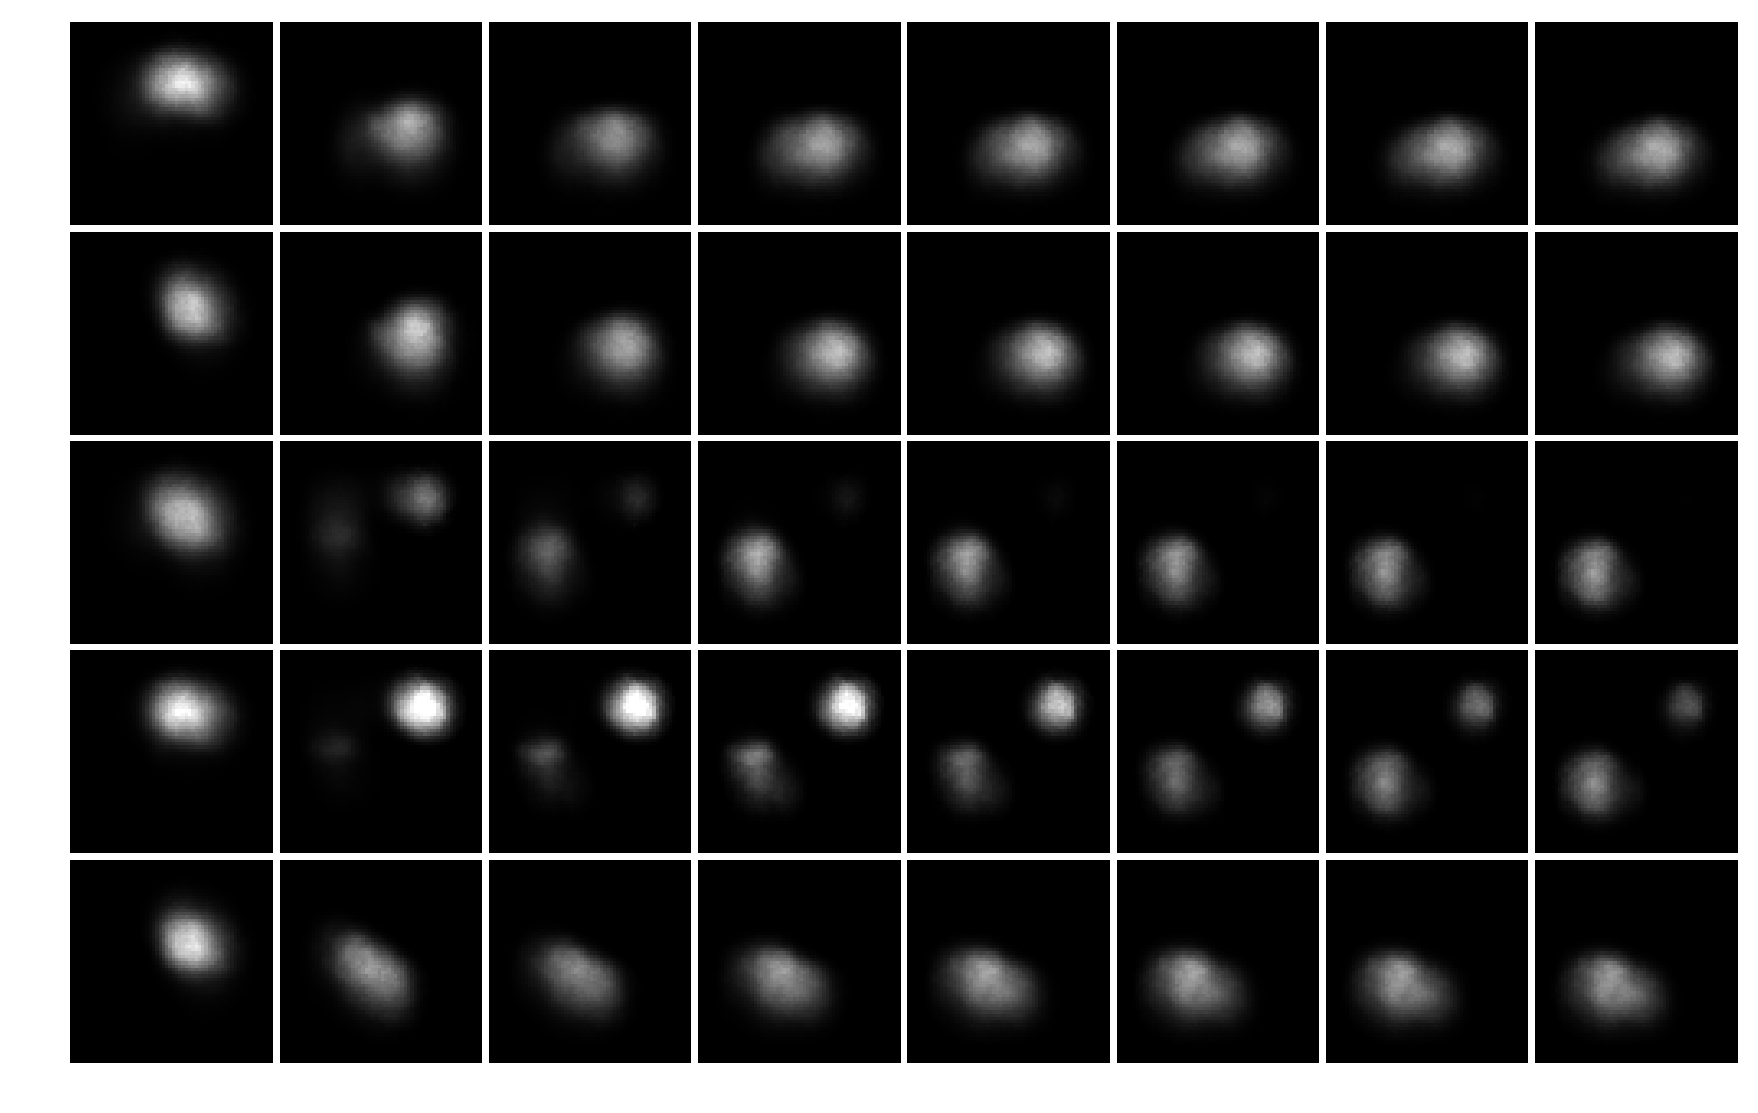

In [96]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(np.concatenate(final, axis=0) * 255)
plt.show()